In [48]:
import tensorflow as tf
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [56]:
df = pd.read_csv('./dataset.csv')

In [57]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sn1           30000 non-null  float64
 1   Sn2           30000 non-null  float64
 2   Sn3           30000 non-null  float64
 3   Sn4           30000 non-null  float64
 4   Sn5           30000 non-null  float64
 5   Sn6           30000 non-null  float64
 6   Sn7           30000 non-null  float64
 7   Sn8           30000 non-null  float64
 8   Sn9           30000 non-null  float64
 9   Sn10          30000 non-null  float64
 10  Tt            30000 non-null  float64
 11  dloc          30000 non-null  int64  
 12  ED            30000 non-null  int64  
 13  overload_loc  30000 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 3.2 MB


Sn1           Sn2           Sn3           Sn4           Sn5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.000120      0.000085      0.000230      0.000091     -0.000151   
std        0.000095      0.000035      0.000192      0.000033      0.000068   
min       -0.002055     -0.000615     -0.001761     -0.000549     -0.002005   
25%       -0.000172      0.000062      0.000168      0.000066     -0.000187   
50%       -0.000123      0.000085      0.000248      0.000092     -0.000149   
75%       -0.000089      0.000106      0.000358      0.000117     -0.000109   
max        0.000697      0.000309      0.000890      0.000280      0.000037   

                Sn6           Sn7           Sn8           Sn9          Sn10  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.000348      0.000143     -0.000044      0.000167      0.000409   
std        0.000152      0.000077      0.000067      0.000050      0.000109   
min       -0.000797     -0.001183     -0.001795     -0.000461      0.000217   
25%        0.000259      0.000108     -0.000066      0.000124      0.000295   
50%        0.000351      0.000147     -0.000046      0.000166      0.000408   
75%        0.000469      0.000199     -0.000031      0.000212      0.000520   
max        0.001071      0.000306      0.000398      0.000298      0.001048   

                 Tt          dloc            ED  overload_loc  
count  30000.000000  30000.000000  30000.000000   30000.00000  
mean      30.000000     49.500000      4.500000       0.02740  
std        7.071186     28.866551      2.872329       0.24749  
min       20.054781      0.000000      0.000000       0.00000  
25%       22.568552     24.750000      2.000000       0.00000  
50%       30.000000     49.500000      4.500000       0.00000  
75%       37.431448     74.250000      7.000000       0.00000  
max       39.945219     99.000000      9.000000       3.00000

In [58]:
df.head()

Sn1       Sn2       Sn3       Sn4       Sn5       Sn6       Sn7  \
0 -0.000069  0.000098  0.000146  0.000096 -0.000158  0.000307  0.000125   
1 -0.000082  0.000095  0.000216  0.000105 -0.000171  0.000349  0.000157   
2 -0.000093  0.000101  0.000239  0.000112 -0.000180  0.000377  0.000169   
3 -0.000197  0.000100  0.000402  0.000121 -0.000190  0.000518  0.000221   
4 -0.000204  0.000104  0.000418  0.000125 -0.000197  0.000537  0.000229   

        Sn8       Sn9      Sn10         Tt  dloc  ED  overload_loc  
0 -0.000023  0.000186  0.000440  32.079117     0   0             0  
1 -0.000040  0.000194  0.000470  34.067366     0   0             0  
2 -0.000045  0.000205  0.000497  35.877853     0   0             0  
3 -0.000077  0.000210  0.000521  37.431448     0   0             0  
4 -0.000080  0.000217  0.000539  38.660254     0   0             0

In [61]:
random_state = check_random_state(0)
permutation = random_state.permutation(df.shape[0])
df = df.iloc[permutation, :]
df.head()

Sn1       Sn2       Sn3       Sn4       Sn5       Sn6       Sn7  \
6244  -0.000171  0.000132  0.000299  0.000120 -0.000191  0.000481  0.000177   
14067 -0.000033  0.000067  0.000102  0.000076 -0.000128  0.000207  0.000101   
29396 -0.000115  0.000063  0.000247  0.000074 -0.000114  0.000314  0.000134   
16105 -0.000044  0.000057  0.000114  0.000065 -0.000109  0.000204  0.000094   
12124 -0.000185  0.000104  0.000383  0.000124 -0.000197  0.000509  0.000220   

            Sn8       Sn9      Sn10         Tt  dloc  ED  overload_loc  
6244  -0.000046  0.000227  0.000539  38.660254    20   8             0  
14067 -0.000021  0.000142  0.000346  25.932634    46   8             0  
29396 -0.000046  0.000128  0.000317  24.122147    97   9             0  
16105 -0.000023  0.000121  0.000295  22.568552    53   6             0  
12124 -0.000074  0.000218  0.000539  38.660254    40   4             0

In [143]:
x = df.iloc[:, list(range(11))].copy().values

# scaler = StandardScaler()
# x = scaler.fit_transform(x)

print(x)

y_dloc = df['dloc'].copy().values
y_ed = df['ED'].copy().values
y_overload = df['overload_loc'].copy().values

[[-1.70995656e-04  1.32145684e-04  2.99284313e-04 ...  2.27324479e-04
   5.39159046e-04  3.86602540e+01]
 [-3.34068778e-05  6.71531197e-05  1.02275801e-04 ...  1.42285721e-04
   3.46326156e-04  2.59326336e+01]
 [-1.14796262e-04  6.30289939e-05  2.47063097e-04 ...  1.28327578e-04
   3.17015495e-04  2.41221475e+01]
 ...
 [-1.13903875e-04  6.89659482e-05  2.42733574e-04 ...  1.40597144e-04
   3.45790739e-04  2.59326336e+01]
 [-1.01088315e-04  5.22716360e-05  2.05553723e-04 ...  1.10696037e-04
   2.75985361e-04  2.13397460e+01]
 [-1.87326199e-04  1.01362624e-04  3.97366737e-04 ...  2.02239422e-04
   4.96686301e-04  3.58778525e+01]]


In [144]:
TEST_SIZE = 3000
x_train_origin, x_test, y_train_origin, y_test = train_test_split(x, y_dloc, test_size=TEST_SIZE)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_origin, y_train_origin, test_size=TEST_SIZE)

print(x.shape)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(30000, 11)
(24000, 11)
(3000, 11)
(3000, 11)


In [126]:
LEARNING_RATE = 0.001
EPOCHS = 10000
BATCH_SIZE = 256

In [112]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)

        _val_f1 = f1_score(val_targ, val_predict, average='weighted')
        _val_recall = recall_score(val_targ, val_predict, average='weighted')
        _val_precision = precision_score(val_targ, val_predict, average='weighted')

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

In [127]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)

In [67]:
# if not os.path.exists('./checkpoints'):
#     os.makedirs('./checkpoints')
# # 按照 val_f1 保存模型
# ck_callback = tf.keras.callbacks.ModelCheckpoint('./checkpoints/weights.{epoch:02d}-{val_f1:.4f}.hdf5',
#                                                  monitor='val_f1', 
#                                                  mode='max', verbose=2,
#                                                  save_best_only=True,
#                                                  save_weights_only=True)
# tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', profile_batch=0)

In [128]:
# history = model_1.fit(x_train, y_train,
#           validation_data=(x_valid, x_valid),
#           batch_size=BATCH_SIZE,
#           epochs=EPOCHS,
#           callbacks=[Metrics(valid_data=(x_valid, y_valid)),
#                      ck_callback,
#                      tb_callback])

history = model_1.fit(x_train, y_train,
                      validation_data=(x_valid, y_valid),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=[Metrics(valid_data=(x_valid, y_valid))],
                      class_weight='auto')

Train on 24000 samples, validate on 3000 samples
Epoch 1/10000
24000/24000 [==============================] - 1s 37us/sample - loss: 0.3267 - accuracy: 0.9770 - val_loss: 0.1151 - val_accuracy: 0.9863
Epoch 2/10000
15616/24000 [==================>...........] - ETA: 0s - loss: 0.1012 - accuracy: 0.9862

E:\Anaconda3\envs\git_origin\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24000/24000 [==============================] - 0s 16us/sample - loss: 0.0972 - accuracy: 0.9860 - val_loss: 0.0769 - val_accuracy: 0.9863
Epoch 3/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0735 - accuracy: 0.9858 - val_loss: 0.0620 - val_accuracy: 0.9863
Epoch 4/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0621 - accuracy: 0.9853 - val_loss: 0.0537 - val_accuracy: 0.9853
Epoch 5/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0559 - accuracy: 0.9855 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 6/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0517 - accuracy: 0.9849 - val_loss: 0.0470 - val_accuracy: 0.9860
Epoch 7/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0486 - accuracy: 0.9858 - val_loss: 0.0466 - val_accuracy: 0.9860
Epoch 8/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0471 - accuracy:

Epoch 29/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0354 - accuracy: 0.9855 - val_loss: 0.0377 - val_accuracy: 0.9850
Epoch 30/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0350 - accuracy: 0.9855 - val_loss: 0.0371 - val_accuracy: 0.9847
Epoch 31/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0346 - accuracy: 0.9855 - val_loss: 0.0372 - val_accuracy: 0.9853
Epoch 32/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0344 - accuracy: 0.9852 - val_loss: 0.0369 - val_accuracy: 0.9850
Epoch 33/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0346 - accuracy: 0.9850 - val_loss: 0.0365 - val_accuracy: 0.9857
Epoch 34/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0341 - accuracy: 0.9852 - val_loss: 0.0375 - val_accuracy: 0.9860
Epoch 35/10000
24000/24000 [==============================] - 0s 15us/sample - los

Epoch 56/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0322 - accuracy: 0.9857 - val_loss: 0.0373 - val_accuracy: 0.9847
Epoch 57/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0321 - accuracy: 0.9856 - val_loss: 0.0375 - val_accuracy: 0.9847
Epoch 58/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0321 - accuracy: 0.9851 - val_loss: 0.0382 - val_accuracy: 0.9850
Epoch 59/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0330 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9847
Epoch 60/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0321 - accuracy: 0.9858 - val_loss: 0.0368 - val_accuracy: 0.9853
Epoch 61/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0327 - accuracy: 0.9852 - val_loss: 0.0371 - val_accuracy: 0.9837
Epoch 62/10000
24000/24000 [==============================] - 0s 15us/sample - los

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0311 - accuracy: 0.9860 - val_loss: 0.0376 - val_accuracy: 0.9857
Epoch 83/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0315 - accuracy: 0.9857 - val_loss: 0.0373 - val_accuracy: 0.9857
Epoch 84/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0310 - accuracy: 0.9858 - val_loss: 0.0368 - val_accuracy: 0.9857
Epoch 85/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0310 - accuracy: 0.9860 - val_loss: 0.0384 - val_accuracy: 0.9860
Epoch 86/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0310 - accuracy: 0.9858 - val_loss: 0.0381 - val_accuracy: 0.9860
Epoch 87/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0307 - accuracy: 0.9865 - val_loss: 0.0364 - val_accuracy: 0.9863
Epoch 88/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0310 - acc

Epoch 109/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0304 - accuracy: 0.9859 - val_loss: 0.0384 - val_accuracy: 0.9860
Epoch 110/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0307 - accuracy: 0.9855 - val_loss: 0.0383 - val_accuracy: 0.9860
Epoch 111/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0306 - accuracy: 0.9859 - val_loss: 0.0369 - val_accuracy: 0.9857
Epoch 112/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0304 - accuracy: 0.9865 - val_loss: 0.0366 - val_accuracy: 0.9853
Epoch 113/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0303 - accuracy: 0.9863 - val_loss: 0.0365 - val_accuracy: 0.9860
Epoch 114/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0304 - accuracy: 0.9861 - val_loss: 0.0370 - val_accuracy: 0.9853
Epoch 115/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 136/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0301 - accuracy: 0.9859 - val_loss: 0.0371 - val_accuracy: 0.9860
Epoch 137/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0297 - accuracy: 0.9861 - val_loss: 0.0394 - val_accuracy: 0.9860
Epoch 138/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0302 - accuracy: 0.9863 - val_loss: 0.0373 - val_accuracy: 0.9850
Epoch 139/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0300 - accuracy: 0.9863 - val_loss: 0.0374 - val_accuracy: 0.9850
Epoch 140/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0297 - accuracy: 0.9865 - val_loss: 0.0374 - val_accuracy: 0.9857
Epoch 141/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0300 - accuracy: 0.9866 - val_loss: 0.0376 - val_accuracy: 0.9853
Epoch 142/10000
24000/24000 [==============================] - 0s 15us/sampl

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0297 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9860
Epoch 163/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0295 - accuracy: 0.9866 - val_loss: 0.0368 - val_accuracy: 0.9850
Epoch 164/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0296 - accuracy: 0.9863 - val_loss: 0.0374 - val_accuracy: 0.9860
Epoch 165/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0296 - accuracy: 0.9862 - val_loss: 0.0370 - val_accuracy: 0.9863
Epoch 166/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0293 - accuracy: 0.9863 - val_loss: 0.0368 - val_accuracy: 0.9857
Epoch 167/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0300 - accuracy: 0.9864 - val_loss: 0.0371 - val_accuracy: 0.9857
Epoch 168/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0295

Epoch 189/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0292 - accuracy: 0.9865 - val_loss: 0.0372 - val_accuracy: 0.9860
Epoch 190/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0292 - accuracy: 0.9866 - val_loss: 0.0372 - val_accuracy: 0.9853
Epoch 191/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0297 - accuracy: 0.9859 - val_loss: 0.0396 - val_accuracy: 0.9857
Epoch 192/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0293 - accuracy: 0.9867 - val_loss: 0.0372 - val_accuracy: 0.9860
Epoch 193/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0291 - accuracy: 0.9868 - val_loss: 0.0385 - val_accuracy: 0.9850
Epoch 194/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0294 - accuracy: 0.9868 - val_loss: 0.0380 - val_accuracy: 0.9860
Epoch 195/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 216/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0288 - accuracy: 0.9868 - val_loss: 0.0372 - val_accuracy: 0.9857
Epoch 217/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0289 - accuracy: 0.9866 - val_loss: 0.0373 - val_accuracy: 0.9850
Epoch 218/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0291 - accuracy: 0.9862 - val_loss: 0.0375 - val_accuracy: 0.9860
Epoch 219/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0289 - accuracy: 0.9868 - val_loss: 0.0372 - val_accuracy: 0.9847
Epoch 220/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0288 - accuracy: 0.9865 - val_loss: 0.0378 - val_accuracy: 0.9863
Epoch 221/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0289 - accuracy: 0.9862 - val_loss: 0.0376 - val_accuracy: 0.9857
Epoch 222/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 243/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0288 - accuracy: 0.9866 - val_loss: 0.0386 - val_accuracy: 0.9860
Epoch 244/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0287 - accuracy: 0.9857 - val_loss: 0.0387 - val_accuracy: 0.9857
Epoch 245/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0284 - accuracy: 0.9866 - val_loss: 0.0395 - val_accuracy: 0.9857
Epoch 246/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0286 - accuracy: 0.9865 - val_loss: 0.0385 - val_accuracy: 0.9853
Epoch 247/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0287 - accuracy: 0.9863 - val_loss: 0.0383 - val_accuracy: 0.9850
Epoch 248/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0287 - accuracy: 0.9862 - val_loss: 0.0401 - val_accuracy: 0.9860
Epoch 249/10000
24000/24000 [==============================] - 1s 48us/sampl

Epoch 270/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0288 - accuracy: 0.9865 - val_loss: 0.0390 - val_accuracy: 0.9863
Epoch 271/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0287 - accuracy: 0.9864 - val_loss: 0.0397 - val_accuracy: 0.9850
Epoch 272/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0286 - accuracy: 0.9863 - val_loss: 0.0398 - val_accuracy: 0.9847
Epoch 273/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0285 - accuracy: 0.9865 - val_loss: 0.0383 - val_accuracy: 0.9860
Epoch 274/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0285 - accuracy: 0.9869 - val_loss: 0.0383 - val_accuracy: 0.9843
Epoch 275/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0283 - accuracy: 0.9864 - val_loss: 0.0382 - val_accuracy: 0.9853
Epoch 276/10000
24000/24000 [==============================] - 1s 48us/sampl

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0284 - accuracy: 0.9870 - val_loss: 0.0386 - val_accuracy: 0.9850
Epoch 297/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0283 - accuracy: 0.9866 - val_loss: 0.0388 - val_accuracy: 0.9857
Epoch 298/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0284 - accuracy: 0.9866 - val_loss: 0.0388 - val_accuracy: 0.9863
Epoch 299/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0282 - accuracy: 0.9868 - val_loss: 0.0380 - val_accuracy: 0.9853
Epoch 300/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0282 - accuracy: 0.9866 - val_loss: 0.0393 - val_accuracy: 0.9857
Epoch 301/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9867 - val_loss: 0.0382 - val_accuracy: 0.9857
Epoch 302/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0282

Epoch 323/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0282 - accuracy: 0.9869 - val_loss: 0.0389 - val_accuracy: 0.9860
Epoch 324/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0281 - accuracy: 0.9870 - val_loss: 0.0401 - val_accuracy: 0.9857
Epoch 325/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9867 - val_loss: 0.0392 - val_accuracy: 0.9857
Epoch 326/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0282 - accuracy: 0.9868 - val_loss: 0.0403 - val_accuracy: 0.9850
Epoch 327/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0283 - accuracy: 0.9866 - val_loss: 0.0400 - val_accuracy: 0.9847
Epoch 328/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9867 - val_loss: 0.0385 - val_accuracy: 0.9860
Epoch 329/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 350/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0284 - accuracy: 0.9867 - val_loss: 0.0403 - val_accuracy: 0.9847
Epoch 351/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9867 - val_loss: 0.0390 - val_accuracy: 0.9850
Epoch 352/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9869 - val_loss: 0.0399 - val_accuracy: 0.9840
Epoch 353/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0286 - accuracy: 0.9868 - val_loss: 0.0398 - val_accuracy: 0.9863
Epoch 354/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0277 - accuracy: 0.9869 - val_loss: 0.0414 - val_accuracy: 0.9850
Epoch 355/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0278 - accuracy: 0.9867 - val_loss: 0.0419 - val_accuracy: 0.9860
Epoch 356/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 377/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0280 - accuracy: 0.9865 - val_loss: 0.0406 - val_accuracy: 0.9860
Epoch 378/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0275 - accuracy: 0.9872 - val_loss: 0.0393 - val_accuracy: 0.9853
Epoch 379/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0275 - accuracy: 0.9872 - val_loss: 0.0393 - val_accuracy: 0.9850
Epoch 380/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0279 - accuracy: 0.9873 - val_loss: 0.0401 - val_accuracy: 0.9857
Epoch 381/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0278 - accuracy: 0.9869 - val_loss: 0.0406 - val_accuracy: 0.9847
Epoch 382/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0277 - accuracy: 0.9871 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 383/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 404/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0276 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9850
Epoch 405/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0277 - accuracy: 0.9866 - val_loss: 0.0396 - val_accuracy: 0.9857
Epoch 406/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0278 - accuracy: 0.9866 - val_loss: 0.0402 - val_accuracy: 0.9850
Epoch 407/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0275 - accuracy: 0.9875 - val_loss: 0.0404 - val_accuracy: 0.9863
Epoch 408/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0277 - accuracy: 0.9868 - val_loss: 0.0398 - val_accuracy: 0.9860
Epoch 409/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0276 - accuracy: 0.9870 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 410/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 431/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0274 - accuracy: 0.9871 - val_loss: 0.0406 - val_accuracy: 0.9847
Epoch 432/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0275 - accuracy: 0.9869 - val_loss: 0.0406 - val_accuracy: 0.9850
Epoch 433/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0278 - accuracy: 0.9868 - val_loss: 0.0413 - val_accuracy: 0.9857
Epoch 434/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0277 - accuracy: 0.9868 - val_loss: 0.0391 - val_accuracy: 0.9850
Epoch 435/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0270 - accuracy: 0.9875 - val_loss: 0.0398 - val_accuracy: 0.9847
Epoch 436/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0274 - accuracy: 0.9873 - val_loss: 0.0388 - val_accuracy: 0.9847
Epoch 437/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 458/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0268 - accuracy: 0.9869 - val_loss: 0.0405 - val_accuracy: 0.9840
Epoch 459/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0273 - accuracy: 0.9871 - val_loss: 0.0405 - val_accuracy: 0.9850
Epoch 460/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0275 - accuracy: 0.9870 - val_loss: 0.0406 - val_accuracy: 0.9853
Epoch 461/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0269 - accuracy: 0.9874 - val_loss: 0.0408 - val_accuracy: 0.9853
Epoch 462/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0274 - accuracy: 0.9868 - val_loss: 0.0402 - val_accuracy: 0.9853
Epoch 463/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0272 - accuracy: 0.9867 - val_loss: 0.0423 - val_accuracy: 0.9837
Epoch 464/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 485/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0270 - accuracy: 0.9875 - val_loss: 0.0400 - val_accuracy: 0.9843
Epoch 486/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0269 - accuracy: 0.9875 - val_loss: 0.0418 - val_accuracy: 0.9847
Epoch 487/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0270 - accuracy: 0.9869 - val_loss: 0.0403 - val_accuracy: 0.9847
Epoch 488/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0271 - accuracy: 0.9869 - val_loss: 0.0403 - val_accuracy: 0.9860
Epoch 489/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0268 - accuracy: 0.9871 - val_loss: 0.0431 - val_accuracy: 0.9843
Epoch 490/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0270 - accuracy: 0.9869 - val_loss: 0.0399 - val_accuracy: 0.9847
Epoch 491/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 512/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0269 - accuracy: 0.9874 - val_loss: 0.0409 - val_accuracy: 0.9847
Epoch 513/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0271 - accuracy: 0.9875 - val_loss: 0.0418 - val_accuracy: 0.9857
Epoch 514/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0272 - accuracy: 0.9874 - val_loss: 0.0401 - val_accuracy: 0.9860
Epoch 515/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0267 - accuracy: 0.9873 - val_loss: 0.0401 - val_accuracy: 0.9857
Epoch 516/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0271 - accuracy: 0.9870 - val_loss: 0.0402 - val_accuracy: 0.9833
Epoch 517/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0267 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 518/10000
24000/24000 [==============================] - 1s 49us/sampl

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0271 - accuracy: 0.9875 - val_loss: 0.0404 - val_accuracy: 0.9830
Epoch 539/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0271 - accuracy: 0.9870 - val_loss: 0.0412 - val_accuracy: 0.9823
Epoch 540/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0266 - accuracy: 0.9878 - val_loss: 0.0408 - val_accuracy: 0.9853
Epoch 541/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0267 - accuracy: 0.9871 - val_loss: 0.0437 - val_accuracy: 0.9847
Epoch 542/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0269 - accuracy: 0.9869 - val_loss: 0.0407 - val_accuracy: 0.9823
Epoch 543/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0265 - accuracy: 0.9878 - val_loss: 0.0411 - val_accuracy: 0.9843
Epoch 544/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0266

Epoch 565/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0267 - accuracy: 0.9881 - val_loss: 0.0412 - val_accuracy: 0.9863
Epoch 566/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0268 - accuracy: 0.9870 - val_loss: 0.0410 - val_accuracy: 0.9840
Epoch 567/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0264 - accuracy: 0.9873 - val_loss: 0.0427 - val_accuracy: 0.9857
Epoch 568/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0269 - accuracy: 0.9874 - val_loss: 0.0411 - val_accuracy: 0.9837
Epoch 569/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0269 - accuracy: 0.9872 - val_loss: 0.0414 - val_accuracy: 0.9830
Epoch 570/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0270 - accuracy: 0.9866 - val_loss: 0.0415 - val_accuracy: 0.9853
Epoch 571/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 592/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0264 - accuracy: 0.9877 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 593/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0266 - accuracy: 0.9880 - val_loss: 0.0417 - val_accuracy: 0.9857
Epoch 594/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0266 - accuracy: 0.9875 - val_loss: 0.0430 - val_accuracy: 0.9847
Epoch 595/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0263 - accuracy: 0.9880 - val_loss: 0.0419 - val_accuracy: 0.9840
Epoch 596/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0266 - accuracy: 0.9878 - val_loss: 0.0418 - val_accuracy: 0.9840
Epoch 597/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0263 - accuracy: 0.9875 - val_loss: 0.0415 - val_accuracy: 0.9843
Epoch 598/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 619/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0263 - accuracy: 0.9875 - val_loss: 0.0412 - val_accuracy: 0.9850
Epoch 620/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0267 - accuracy: 0.9877 - val_loss: 0.0419 - val_accuracy: 0.9850
Epoch 621/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0266 - accuracy: 0.9879 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 622/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0265 - accuracy: 0.9870 - val_loss: 0.0422 - val_accuracy: 0.9860
Epoch 623/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0260 - accuracy: 0.9875 - val_loss: 0.0407 - val_accuracy: 0.9830
Epoch 624/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0266 - accuracy: 0.9871 - val_loss: 0.0418 - val_accuracy: 0.9850
Epoch 625/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 646/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0265 - accuracy: 0.9872 - val_loss: 0.0432 - val_accuracy: 0.9850
Epoch 647/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0260 - accuracy: 0.9877 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 648/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9878 - val_loss: 0.0413 - val_accuracy: 0.9840
Epoch 649/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0266 - accuracy: 0.9874 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 650/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0264 - accuracy: 0.9876 - val_loss: 0.0424 - val_accuracy: 0.9843
Epoch 651/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9881 - val_loss: 0.0428 - val_accuracy: 0.9853
Epoch 652/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 673/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9879 - val_loss: 0.0423 - val_accuracy: 0.9837
Epoch 674/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9876 - val_loss: 0.0405 - val_accuracy: 0.9847
Epoch 675/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0261 - accuracy: 0.9875 - val_loss: 0.0422 - val_accuracy: 0.9843
Epoch 676/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9877 - val_loss: 0.0422 - val_accuracy: 0.9857
Epoch 677/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0260 - accuracy: 0.9874 - val_loss: 0.0415 - val_accuracy: 0.9847
Epoch 678/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9876 - val_loss: 0.0438 - val_accuracy: 0.9840
Epoch 679/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 700/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0257 - accuracy: 0.9878 - val_loss: 0.0425 - val_accuracy: 0.9837
Epoch 701/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0264 - accuracy: 0.9878 - val_loss: 0.0414 - val_accuracy: 0.9853
Epoch 702/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0259 - accuracy: 0.9877 - val_loss: 0.0429 - val_accuracy: 0.9853
Epoch 703/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9879 - val_loss: 0.0442 - val_accuracy: 0.9837
Epoch 704/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9879 - val_loss: 0.0432 - val_accuracy: 0.9850
Epoch 705/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0261 - accuracy: 0.9876 - val_loss: 0.0411 - val_accuracy: 0.9847
Epoch 706/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 727/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9879 - val_loss: 0.0418 - val_accuracy: 0.9837
Epoch 728/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0256 - accuracy: 0.9883 - val_loss: 0.0427 - val_accuracy: 0.9850
Epoch 729/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0259 - accuracy: 0.9879 - val_loss: 0.0417 - val_accuracy: 0.9850
Epoch 730/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0259 - accuracy: 0.9882 - val_loss: 0.0423 - val_accuracy: 0.9847
Epoch 731/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9874 - val_loss: 0.0441 - val_accuracy: 0.9830
Epoch 732/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0259 - accuracy: 0.9876 - val_loss: 0.0434 - val_accuracy: 0.9840
Epoch 733/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 754/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9875 - val_loss: 0.0428 - val_accuracy: 0.9843
Epoch 755/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255 - accuracy: 0.9885 - val_loss: 0.0426 - val_accuracy: 0.9847
Epoch 756/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0260 - accuracy: 0.9883 - val_loss: 0.0428 - val_accuracy: 0.9840
Epoch 757/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0256 - accuracy: 0.9875 - val_loss: 0.0444 - val_accuracy: 0.9840
Epoch 758/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9880 - val_loss: 0.0433 - val_accuracy: 0.9830
Epoch 759/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0256 - accuracy: 0.9878 - val_loss: 0.0439 - val_accuracy: 0.9837
Epoch 760/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 781/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0259 - accuracy: 0.9879 - val_loss: 0.0437 - val_accuracy: 0.9843
Epoch 782/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0255 - accuracy: 0.9876 - val_loss: 0.0434 - val_accuracy: 0.9843
Epoch 783/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0256 - accuracy: 0.9877 - val_loss: 0.0424 - val_accuracy: 0.9840
Epoch 784/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0260 - accuracy: 0.9877 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 785/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0256 - accuracy: 0.9881 - val_loss: 0.0454 - val_accuracy: 0.9840
Epoch 786/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0258 - accuracy: 0.9880 - val_loss: 0.0444 - val_accuracy: 0.9853
Epoch 787/10000
24000/24000 [==============================] - 1s 50us/sampl

Epoch 808/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0261 - accuracy: 0.9876 - val_loss: 0.0422 - val_accuracy: 0.9847
Epoch 809/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0259 - accuracy: 0.9879 - val_loss: 0.0437 - val_accuracy: 0.9850
Epoch 810/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0255 - accuracy: 0.9881 - val_loss: 0.0458 - val_accuracy: 0.9833
Epoch 811/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0257 - accuracy: 0.9878 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 812/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0254 - accuracy: 0.9880 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch 813/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0259 - accuracy: 0.9874 - val_loss: 0.0443 - val_accuracy: 0.9837
Epoch 814/10000
24000/24000 [==============================] - 1s 52us/sampl

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255 - accuracy: 0.9880 - val_loss: 0.0447 - val_accuracy: 0.9840
Epoch 835/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0256 - accuracy: 0.9879 - val_loss: 0.0427 - val_accuracy: 0.9833
Epoch 836/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255 - accuracy: 0.9881 - val_loss: 0.0434 - val_accuracy: 0.9837
Epoch 837/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0253 - accuracy: 0.9879 - val_loss: 0.0436 - val_accuracy: 0.9857
Epoch 838/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255 - accuracy: 0.9883 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 839/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255 - accuracy: 0.9879 - val_loss: 0.0442 - val_accuracy: 0.9843
Epoch 840/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0255

Epoch 861/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9885 - val_loss: 0.0446 - val_accuracy: 0.9847
Epoch 862/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0252 - accuracy: 0.9886 - val_loss: 0.0462 - val_accuracy: 0.9823
Epoch 863/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9880 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 864/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0257 - accuracy: 0.9879 - val_loss: 0.0459 - val_accuracy: 0.9837
Epoch 865/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0258 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9847
Epoch 866/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0248 - accuracy: 0.9883 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 867/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 888/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0256 - accuracy: 0.9876 - val_loss: 0.0449 - val_accuracy: 0.9843
Epoch 889/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9880 - val_loss: 0.0453 - val_accuracy: 0.9853
Epoch 890/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0249 - accuracy: 0.9878 - val_loss: 0.0462 - val_accuracy: 0.9860
Epoch 891/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9881 - val_loss: 0.0439 - val_accuracy: 0.9847
Epoch 892/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0249 - accuracy: 0.9877 - val_loss: 0.0446 - val_accuracy: 0.9840
Epoch 893/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0249 - accuracy: 0.9880 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 894/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 915/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0250 - accuracy: 0.9886 - val_loss: 0.0473 - val_accuracy: 0.9863
Epoch 916/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9833
Epoch 917/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9878 - val_loss: 0.0448 - val_accuracy: 0.9837
Epoch 918/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9881 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch 919/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9877 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 920/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9881 - val_loss: 0.0461 - val_accuracy: 0.9830
Epoch 921/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 942/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9879 - val_loss: 0.0435 - val_accuracy: 0.9843
Epoch 943/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9884 - val_loss: 0.0459 - val_accuracy: 0.9833
Epoch 944/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0246 - accuracy: 0.9883 - val_loss: 0.0460 - val_accuracy: 0.9827
Epoch 945/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0250 - accuracy: 0.9883 - val_loss: 0.0460 - val_accuracy: 0.9837
Epoch 946/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0248 - accuracy: 0.9882 - val_loss: 0.0454 - val_accuracy: 0.9837
Epoch 947/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0253 - accuracy: 0.9883 - val_loss: 0.0473 - val_accuracy: 0.9837
Epoch 948/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 969/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0254 - accuracy: 0.9875 - val_loss: 0.0460 - val_accuracy: 0.9853
Epoch 970/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0245 - accuracy: 0.9886 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 971/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0248 - accuracy: 0.9881 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 972/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9887 - val_loss: 0.0458 - val_accuracy: 0.9843
Epoch 973/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0249 - accuracy: 0.9878 - val_loss: 0.0462 - val_accuracy: 0.9843
Epoch 974/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0247 - accuracy: 0.9884 - val_loss: 0.0464 - val_accuracy: 0.9840
Epoch 975/10000
24000/24000 [==============================] - 0s 15us/sampl

Epoch 996/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0251 - accuracy: 0.9881 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 997/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0247 - accuracy: 0.9882 - val_loss: 0.0516 - val_accuracy: 0.9827
Epoch 998/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0247 - accuracy: 0.9883 - val_loss: 0.0458 - val_accuracy: 0.9843
Epoch 999/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0247 - accuracy: 0.9882 - val_loss: 0.0460 - val_accuracy: 0.9853
Epoch 1000/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0245 - accuracy: 0.9885 - val_loss: 0.0456 - val_accuracy: 0.9837
Epoch 1001/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0246 - accuracy: 0.9884 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 1002/10000
24000/24000 [==============================] - 0s 15us/sa

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0247 - accuracy: 0.9884 - val_loss: 0.0452 - val_accuracy: 0.9823
Epoch 1023/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0247 - accuracy: 0.9885 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 1024/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0247 - accuracy: 0.9885 - val_loss: 0.0466 - val_accuracy: 0.9843
Epoch 1025/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0245 - accuracy: 0.9887 - val_loss: 0.0471 - val_accuracy: 0.9840
Epoch 1026/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0247 - accuracy: 0.9878 - val_loss: 0.0453 - val_accuracy: 0.9853
Epoch 1027/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0253 - accuracy: 0.9880 - val_loss: 0.0448 - val_accuracy: 0.9843
Epoch 1028/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 48us/sample - loss: 0.0255 - accuracy: 0.9885 - val_loss: 0.0496 - val_accuracy: 0.9857
Epoch 1049/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0248 - accuracy: 0.9883 - val_loss: 0.0477 - val_accuracy: 0.9853
Epoch 1050/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0246 - accuracy: 0.9881 - val_loss: 0.0466 - val_accuracy: 0.9833
Epoch 1051/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0244 - accuracy: 0.9884 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 1052/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0246 - accuracy: 0.9888 - val_loss: 0.0448 - val_accuracy: 0.9830
Epoch 1053/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0245 - accuracy: 0.9883 - val_loss: 0.0465 - val_accuracy: 0.9837
Epoch 1054/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0247 - accuracy: 0.9885 - val_loss: 0.0464 - val_accuracy: 0.9847
Epoch 1075/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0243 - accuracy: 0.9884 - val_loss: 0.0459 - val_accuracy: 0.9823
Epoch 1076/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0245 - accuracy: 0.9885 - val_loss: 0.0457 - val_accuracy: 0.9843
Epoch 1077/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0250 - accuracy: 0.9883 - val_loss: 0.0463 - val_accuracy: 0.9847
Epoch 1078/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0245 - accuracy: 0.9883 - val_loss: 0.0457 - val_accuracy: 0.9833
Epoch 1079/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0243 - accuracy: 0.9880 - val_loss: 0.0462 - val_accuracy: 0.9833
Epoch 1080/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0248 - accuracy: 0.9885 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 1101/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0243 - accuracy: 0.9885 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 1102/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9885 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 1103/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0241 - accuracy: 0.9885 - val_loss: 0.0456 - val_accuracy: 0.9847
Epoch 1104/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0241 - accuracy: 0.9885 - val_loss: 0.0480 - val_accuracy: 0.9833
Epoch 1105/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0244 - accuracy: 0.9883 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 1106/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9887 - val_loss: 0.0472 - val_accuracy: 0.9837
Epoch 1127/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0244 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9830
Epoch 1128/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0238 - accuracy: 0.9897 - val_loss: 0.0488 - val_accuracy: 0.9833
Epoch 1129/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0243 - accuracy: 0.9884 - val_loss: 0.0483 - val_accuracy: 0.9833
Epoch 1130/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0241 - accuracy: 0.9885 - val_loss: 0.0470 - val_accuracy: 0.9847
Epoch 1131/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9886 - val_loss: 0.0467 - val_accuracy: 0.9837
Epoch 1132/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0241 - accuracy: 0.9892 - val_loss: 0.0476 - val_accuracy: 0.9853
Epoch 1153/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9891 - val_loss: 0.0472 - val_accuracy: 0.9843
Epoch 1154/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0241 - accuracy: 0.9887 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 1155/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0244 - accuracy: 0.9883 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 1156/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0244 - accuracy: 0.9885 - val_loss: 0.0462 - val_accuracy: 0.9833
Epoch 1157/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9892 - val_loss: 0.0471 - val_accuracy: 0.9850
Epoch 1158/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9889 - val_loss: 0.0503 - val_accuracy: 0.9830
Epoch 1179/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9883 - val_loss: 0.0469 - val_accuracy: 0.9830
Epoch 1180/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9885 - val_loss: 0.0476 - val_accuracy: 0.9830
Epoch 1181/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0235 - accuracy: 0.9885 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 1182/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0238 - accuracy: 0.9890 - val_loss: 0.0478 - val_accuracy: 0.9840
Epoch 1183/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9886 - val_loss: 0.0468 - val_accuracy: 0.9833
Epoch 1184/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9883 - val_loss: 0.0483 - val_accuracy: 0.9830
Epoch 1205/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9886 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 1206/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0243 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 1207/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0239 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9843
Epoch 1208/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9888 - val_loss: 0.0478 - val_accuracy: 0.9853
Epoch 1209/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9889 - val_loss: 0.0486 - val_accuracy: 0.9830
Epoch 1210/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0243 - accuracy: 0.9888 - val_loss: 0.0504 - val_accuracy: 0.9843
Epoch 1231/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0239 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 1232/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0239 - accuracy: 0.9890 - val_loss: 0.0494 - val_accuracy: 0.9837
Epoch 1233/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9888 - val_loss: 0.0500 - val_accuracy: 0.9833
Epoch 1234/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0238 - accuracy: 0.9886 - val_loss: 0.0487 - val_accuracy: 0.9847
Epoch 1235/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0235 - accuracy: 0.9885 - val_loss: 0.0506 - val_accuracy: 0.9833
Epoch 1236/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0239 - accuracy: 0.9886 - val_loss: 0.0493 - val_accuracy: 0.9830
Epoch 1257/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0240 - accuracy: 0.9889 - val_loss: 0.0486 - val_accuracy: 0.9827
Epoch 1258/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0236 - accuracy: 0.9890 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 1259/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0237 - accuracy: 0.9889 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 1260/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0236 - accuracy: 0.9888 - val_loss: 0.0493 - val_accuracy: 0.9843
Epoch 1261/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0240 - accuracy: 0.9887 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 1262/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0237 - accuracy: 0.9890 - val_loss: 0.0479 - val_accuracy: 0.9810
Epoch 1283/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0241 - accuracy: 0.9881 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 1284/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0239 - accuracy: 0.9890 - val_loss: 0.0475 - val_accuracy: 0.9837
Epoch 1285/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0235 - accuracy: 0.9890 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 1286/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0241 - accuracy: 0.9891 - val_loss: 0.0481 - val_accuracy: 0.9833
Epoch 1287/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0241 - accuracy: 0.9887 - val_loss: 0.0482 - val_accuracy: 0.9830
Epoch 1288/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9894 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 1309/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0235 - accuracy: 0.9890 - val_loss: 0.0486 - val_accuracy: 0.9847
Epoch 1310/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0235 - accuracy: 0.9890 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 1311/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0244 - accuracy: 0.9885 - val_loss: 0.0473 - val_accuracy: 0.9833
Epoch 1312/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0239 - accuracy: 0.9889 - val_loss: 0.0497 - val_accuracy: 0.9813
Epoch 1313/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9887 - val_loss: 0.0485 - val_accuracy: 0.9853
Epoch 1314/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9892 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 1335/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0238 - accuracy: 0.9885 - val_loss: 0.0494 - val_accuracy: 0.9833
Epoch 1336/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9894 - val_loss: 0.0491 - val_accuracy: 0.9847
Epoch 1337/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9890 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 1338/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9888 - val_loss: 0.0494 - val_accuracy: 0.9813
Epoch 1339/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0246 - accuracy: 0.9892 - val_loss: 0.0491 - val_accuracy: 0.9847
Epoch 1340/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0235 - accuracy: 0.9891 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 1361/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9892 - val_loss: 0.0481 - val_accuracy: 0.9853
Epoch 1362/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9891 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 1363/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0235 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy: 0.9830
Epoch 1364/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9896 - val_loss: 0.0487 - val_accuracy: 0.9840
Epoch 1365/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9891 - val_loss: 0.0484 - val_accuracy: 0.9840
Epoch 1366/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9887 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 1387/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9888 - val_loss: 0.0492 - val_accuracy: 0.9847
Epoch 1388/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9885 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 1389/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9892 - val_loss: 0.0504 - val_accuracy: 0.9830
Epoch 1390/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9889 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 1391/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0242 - accuracy: 0.9886 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 1392/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9890 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 1413/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9881 - val_loss: 0.0498 - val_accuracy: 0.9830
Epoch 1414/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0234 - accuracy: 0.9888 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 1415/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0234 - accuracy: 0.9887 - val_loss: 0.0500 - val_accuracy: 0.9833
Epoch 1416/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9890 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 1417/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0234 - accuracy: 0.9893 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 1418/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9893 - val_loss: 0.0505 - val_accuracy: 0.9833
Epoch 1439/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0234 - accuracy: 0.9894 - val_loss: 0.0508 - val_accuracy: 0.9823
Epoch 1440/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9894 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 1441/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9894 - val_loss: 0.0519 - val_accuracy: 0.9827
Epoch 1442/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9893 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 1443/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9897 - val_loss: 0.0506 - val_accuracy: 0.9853
Epoch 1444/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0237 - accuracy: 0.9892 - val_loss: 0.0516 - val_accuracy: 0.9830
Epoch 1465/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9893 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 1466/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0240 - accuracy: 0.9886 - val_loss: 0.0492 - val_accuracy: 0.9830
Epoch 1467/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0236 - accuracy: 0.9888 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 1468/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0230 - accuracy: 0.9898 - val_loss: 0.0526 - val_accuracy: 0.9857
Epoch 1469/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9893 - val_loss: 0.0512 - val_accuracy: 0.9837
Epoch 1470/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 52us/sample - loss: 0.0231 - accuracy: 0.9894 - val_loss: 0.0516 - val_accuracy: 0.9830
Epoch 1491/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0233 - accuracy: 0.9890 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 1492/10000
24000/24000 [==============================] - 1s 59us/sample - loss: 0.0231 - accuracy: 0.9893 - val_loss: 0.0504 - val_accuracy: 0.9830
Epoch 1493/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0231 - accuracy: 0.9895 - val_loss: 0.0506 - val_accuracy: 0.9833
Epoch 1494/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0229 - accuracy: 0.9889 - val_loss: 0.0517 - val_accuracy: 0.9840
Epoch 1495/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0230 - accuracy: 0.9895 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 1496/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0229 - accuracy: 0.9892 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 1517/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0237 - accuracy: 0.9889 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 1518/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0230 - accuracy: 0.9893 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 1519/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0235 - accuracy: 0.9890 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 1520/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0227 - accuracy: 0.9895 - val_loss: 0.0520 - val_accuracy: 0.9843
Epoch 1521/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0237 - accuracy: 0.9889 - val_loss: 0.0527 - val_accuracy: 0.9823
Epoch 1522/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 59us/sample - loss: 0.0235 - accuracy: 0.9891 - val_loss: 0.0525 - val_accuracy: 0.9843
Epoch 1543/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 0.0230 - accuracy: 0.9886 - val_loss: 0.0536 - val_accuracy: 0.9820
Epoch 1544/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0230 - accuracy: 0.9893 - val_loss: 0.0526 - val_accuracy: 0.9843
Epoch 1545/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0233 - accuracy: 0.9893 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 1546/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0230 - accuracy: 0.9896 - val_loss: 0.0524 - val_accuracy: 0.9820
Epoch 1547/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0230 - accuracy: 0.9899 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 1548/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9892 - val_loss: 0.0535 - val_accuracy: 0.9833
Epoch 1569/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0523 - val_accuracy: 0.9847
Epoch 1570/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9895 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 1571/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0238 - accuracy: 0.9887 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 1572/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0233 - accuracy: 0.9888 - val_loss: 0.0525 - val_accuracy: 0.9843
Epoch 1573/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9894 - val_loss: 0.0528 - val_accuracy: 0.9837
Epoch 1574/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9892 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 1595/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9900 - val_loss: 0.0536 - val_accuracy: 0.9837
Epoch 1596/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0230 - accuracy: 0.9891 - val_loss: 0.0549 - val_accuracy: 0.9840
Epoch 1597/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0234 - accuracy: 0.9891 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 1598/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9891 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 1599/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9896 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 1600/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9895 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 1621/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 1622/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0232 - accuracy: 0.9890 - val_loss: 0.0551 - val_accuracy: 0.9837
Epoch 1623/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9892 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 1624/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0541 - val_accuracy: 0.9843
Epoch 1625/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0535 - val_accuracy: 0.9833
Epoch 1626/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0232 - accuracy: 0.9898 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 1647/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9892 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 1648/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0230 - accuracy: 0.9894 - val_loss: 0.0536 - val_accuracy: 0.9833
Epoch 1649/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9893 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 1650/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9894 - val_loss: 0.0532 - val_accuracy: 0.9850
Epoch 1651/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9892 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 1652/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0226 - accuracy: 0.9895 - val_loss: 0.0506 - val_accuracy: 0.9840
Epoch 1673/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9891 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 1674/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0231 - accuracy: 0.9894 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 1675/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0529 - val_accuracy: 0.9827
Epoch 1676/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9896 - val_loss: 0.0548 - val_accuracy: 0.9850
Epoch 1677/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9892 - val_loss: 0.0526 - val_accuracy: 0.9850
Epoch 1678/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0222 - accuracy: 0.9893 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 1699/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0226 - accuracy: 0.9892 - val_loss: 0.0548 - val_accuracy: 0.9820
Epoch 1700/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9888 - val_loss: 0.0532 - val_accuracy: 0.9817
Epoch 1701/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9893 - val_loss: 0.0543 - val_accuracy: 0.9840
Epoch 1702/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9895 - val_loss: 0.0526 - val_accuracy: 0.9847
Epoch 1703/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9893 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 1704/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9890 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 1725/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0229 - accuracy: 0.9890 - val_loss: 0.0525 - val_accuracy: 0.9847
Epoch 1726/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9897 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 1727/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9894 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 1728/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9893 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 1729/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0226 - accuracy: 0.9895 - val_loss: 0.0536 - val_accuracy: 0.9820
Epoch 1730/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0225 - accuracy: 0.9897 - val_loss: 0.0549 - val_accuracy: 0.9847
Epoch 1751/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9893 - val_loss: 0.0530 - val_accuracy: 0.9837
Epoch 1752/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9892 - val_loss: 0.0545 - val_accuracy: 0.9820
Epoch 1753/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0228 - accuracy: 0.9895 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 1754/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0223 - accuracy: 0.9899 - val_loss: 0.0537 - val_accuracy: 0.9823
Epoch 1755/10000
24000/24000 [==============================] - 1s 32us/sample - loss: 0.0227 - accuracy: 0.9901 - val_loss: 0.0564 - val_accuracy: 0.9837
Epoch 1756/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0517 - val_accuracy: 0.9833
Epoch 1777/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0233 - accuracy: 0.9884 - val_loss: 0.0536 - val_accuracy: 0.9827
Epoch 1778/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0229 - accuracy: 0.9893 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 1779/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0226 - accuracy: 0.9896 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 1780/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0228 - accuracy: 0.9893 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 1781/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0223 - accuracy: 0.9893 - val_loss: 0.0522 - val_accuracy: 0.9850
Epoch 1782/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 52us/sample - loss: 0.0224 - accuracy: 0.9898 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 1803/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 1804/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0228 - accuracy: 0.9885 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 1805/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0232 - accuracy: 0.9889 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 1806/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0232 - accuracy: 0.9898 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 1807/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0227 - accuracy: 0.9894 - val_loss: 0.0528 - val_accuracy: 0.9843
Epoch 1808/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9898 - val_loss: 0.0554 - val_accuracy: 0.9840
Epoch 1829/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9900 - val_loss: 0.0549 - val_accuracy: 0.9810
Epoch 1830/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9893 - val_loss: 0.0533 - val_accuracy: 0.9830
Epoch 1831/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9892 - val_loss: 0.0548 - val_accuracy: 0.9813
Epoch 1832/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9894 - val_loss: 0.0524 - val_accuracy: 0.9823
Epoch 1833/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9896 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 1834/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0229 - accuracy: 0.9898 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 1855/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9891 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 1856/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9894 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 1857/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 1858/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0230 - accuracy: 0.9893 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 1859/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0223 - accuracy: 0.9896 - val_loss: 0.0540 - val_accuracy: 0.9830
Epoch 1860/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0224 - accuracy: 0.9891 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 1881/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0222 - accuracy: 0.9893 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 1882/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9896 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 1883/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0222 - accuracy: 0.9893 - val_loss: 0.0546 - val_accuracy: 0.9837
Epoch 1884/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9897 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 1885/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0228 - accuracy: 0.9892 - val_loss: 0.0533 - val_accuracy: 0.9810
Epoch 1886/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9892 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 1907/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0226 - accuracy: 0.9895 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 1908/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0224 - accuracy: 0.9901 - val_loss: 0.0546 - val_accuracy: 0.9823
Epoch 1909/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9898 - val_loss: 0.0509 - val_accuracy: 0.9830
Epoch 1910/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9896 - val_loss: 0.0529 - val_accuracy: 0.9837
Epoch 1911/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9897 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 1912/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0226 - accuracy: 0.9889 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 1933/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9897 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 1934/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9895 - val_loss: 0.0517 - val_accuracy: 0.9837
Epoch 1935/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9893 - val_loss: 0.0536 - val_accuracy: 0.9847
Epoch 1936/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0223 - accuracy: 0.9896 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 1937/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9895 - val_loss: 0.0529 - val_accuracy: 0.9837
Epoch 1938/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9897 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 1959/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9897 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 1960/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9895 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 1961/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0222 - accuracy: 0.9897 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 1962/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9898 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 1963/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0229 - accuracy: 0.9897 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 1964/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9899 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 1985/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0223 - accuracy: 0.9898 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 1986/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9899 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 1987/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 1988/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0223 - accuracy: 0.9901 - val_loss: 0.0543 - val_accuracy: 0.9827
Epoch 1989/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9897 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 1990/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9900 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 2011/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9896 - val_loss: 0.0571 - val_accuracy: 0.9847
Epoch 2012/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0537 - val_accuracy: 0.9847
Epoch 2013/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0227 - accuracy: 0.9893 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 2014/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9901 - val_loss: 0.0543 - val_accuracy: 0.9840
Epoch 2015/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9895 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 2016/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9896 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 2037/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0221 - accuracy: 0.9893 - val_loss: 0.0555 - val_accuracy: 0.9847
Epoch 2038/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0220 - accuracy: 0.9896 - val_loss: 0.0558 - val_accuracy: 0.9830
Epoch 2039/10000
24000/24000 [==============================] - 1s 33us/sample - loss: 0.0224 - accuracy: 0.9895 - val_loss: 0.0555 - val_accuracy: 0.9820
Epoch 2040/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0222 - accuracy: 0.9895 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 2041/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0218 - accuracy: 0.9898 - val_loss: 0.0553 - val_accuracy: 0.9823
Epoch 2042/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0217 - accuracy: 0.9900 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 2063/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0230 - accuracy: 0.9894 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 2064/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0221 - accuracy: 0.9895 - val_loss: 0.0555 - val_accuracy: 0.9843
Epoch 2065/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0224 - accuracy: 0.9896 - val_loss: 0.0571 - val_accuracy: 0.9843
Epoch 2066/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0221 - accuracy: 0.9898 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 2067/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0215 - accuracy: 0.9898 - val_loss: 0.0554 - val_accuracy: 0.9827
Epoch 2068/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 57us/sample - loss: 0.0220 - accuracy: 0.9895 - val_loss: 0.0536 - val_accuracy: 0.9843
Epoch 2089/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0223 - accuracy: 0.9899 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 2090/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0225 - accuracy: 0.9894 - val_loss: 0.0566 - val_accuracy: 0.9840
Epoch 2091/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0220 - accuracy: 0.9895 - val_loss: 0.0554 - val_accuracy: 0.9847
Epoch 2092/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0216 - accuracy: 0.9902 - val_loss: 0.0572 - val_accuracy: 0.9833
Epoch 2093/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0215 - accuracy: 0.9900 - val_loss: 0.0556 - val_accuracy: 0.9840
Epoch 2094/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0224 - accuracy: 0.9896 - val_loss: 0.0560 - val_accuracy: 0.9820
Epoch 2115/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 2116/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9900 - val_loss: 0.0579 - val_accuracy: 0.9843
Epoch 2117/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9899 - val_loss: 0.0550 - val_accuracy: 0.9850
Epoch 2118/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0566 - val_accuracy: 0.9830
Epoch 2119/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9897 - val_loss: 0.0555 - val_accuracy: 0.9827
Epoch 2120/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9896 - val_loss: 0.0581 - val_accuracy: 0.9837
Epoch 2141/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0223 - accuracy: 0.9897 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 2142/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9898 - val_loss: 0.0574 - val_accuracy: 0.9827
Epoch 2143/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9898 - val_loss: 0.0551 - val_accuracy: 0.9830
Epoch 2144/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9896 - val_loss: 0.0572 - val_accuracy: 0.9823
Epoch 2145/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9898 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 2146/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0218 - accuracy: 0.9902 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 2167/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9900 - val_loss: 0.0550 - val_accuracy: 0.9837
Epoch 2168/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9900 - val_loss: 0.0555 - val_accuracy: 0.9843
Epoch 2169/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0213 - accuracy: 0.9904 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 2170/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9901 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 2171/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9895 - val_loss: 0.0566 - val_accuracy: 0.9837
Epoch 2172/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9901 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 2193/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0561 - val_accuracy: 0.9837
Epoch 2194/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9898 - val_loss: 0.0569 - val_accuracy: 0.9837
Epoch 2195/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9900 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 2196/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9897 - val_loss: 0.0566 - val_accuracy: 0.9817
Epoch 2197/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9900 - val_loss: 0.0559 - val_accuracy: 0.9843
Epoch 2198/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9895 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 2219/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9896 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 2220/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9896 - val_loss: 0.0573 - val_accuracy: 0.9847
Epoch 2221/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0216 - accuracy: 0.9894 - val_loss: 0.0582 - val_accuracy: 0.9827
Epoch 2222/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0222 - accuracy: 0.9898 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 2223/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9898 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 2224/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0219 - accuracy: 0.9893 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 2245/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0537 - val_accuracy: 0.9823
Epoch 2246/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0223 - accuracy: 0.9895 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 2247/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9896 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 2248/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9899 - val_loss: 0.0563 - val_accuracy: 0.9837
Epoch 2249/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9898 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 2250/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9899 - val_loss: 0.0558 - val_accuracy: 0.9843
Epoch 2271/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9900 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 2272/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0215 - accuracy: 0.9899 - val_loss: 0.0544 - val_accuracy: 0.9837
Epoch 2273/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9900 - val_loss: 0.0560 - val_accuracy: 0.9830
Epoch 2274/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9905 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 2275/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9902 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 2276/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 54us/sample - loss: 0.0215 - accuracy: 0.9900 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 2297/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0215 - accuracy: 0.9897 - val_loss: 0.0561 - val_accuracy: 0.9837
Epoch 2298/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 2299/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0217 - accuracy: 0.9896 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 2300/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0583 - val_accuracy: 0.9840
Epoch 2301/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0222 - accuracy: 0.9893 - val_loss: 0.0552 - val_accuracy: 0.9837
Epoch 2302/10000
24000/24000 [==============================] - 2s 66us/sample - loss: 

Epoch 2322/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0212 - accuracy: 0.9905 - val_loss: 0.0564 - val_accuracy: 0.9853
Epoch 2323/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0219 - accuracy: 0.9895 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 2324/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0214 - accuracy: 0.9903 - val_loss: 0.0575 - val_accuracy: 0.9840
Epoch 2325/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0216 - accuracy: 0.9902 - val_loss: 0.0559 - val_accuracy: 0.9857
Epoch 2326/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0213 - accuracy: 0.9895 - val_loss: 0.0560 - val_accuracy: 0.9820
Epoch 2327/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0214 - accuracy: 0.9902 - val_loss: 0.0554 - val_accuracy: 0.9840
Epoch 2328/10000
24000/24000 [==============================] - 1s 51u

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0213 - accuracy: 0.9905 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 2349/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0214 - accuracy: 0.9903 - val_loss: 0.0584 - val_accuracy: 0.9847
Epoch 2350/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0211 - accuracy: 0.9907 - val_loss: 0.0586 - val_accuracy: 0.9843
Epoch 2351/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0218 - accuracy: 0.9897 - val_loss: 0.0564 - val_accuracy: 0.9830
Epoch 2352/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0214 - accuracy: 0.9897 - val_loss: 0.0585 - val_accuracy: 0.9830
Epoch 2353/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0218 - accuracy: 0.9902 - val_loss: 0.0567 - val_accuracy: 0.9833
Epoch 2354/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9898 - val_loss: 0.0581 - val_accuracy: 0.9837
Epoch 2375/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9902 - val_loss: 0.0624 - val_accuracy: 0.9830
Epoch 2376/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0219 - accuracy: 0.9895 - val_loss: 0.0592 - val_accuracy: 0.9843
Epoch 2377/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9903 - val_loss: 0.0577 - val_accuracy: 0.9837
Epoch 2378/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9903 - val_loss: 0.0590 - val_accuracy: 0.9830
Epoch 2379/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9905 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 2380/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9900 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 2401/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9899 - val_loss: 0.0580 - val_accuracy: 0.9823
Epoch 2402/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9900 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 2403/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0219 - accuracy: 0.9898 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 2404/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9898 - val_loss: 0.0585 - val_accuracy: 0.9827
Epoch 2405/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9900 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 2406/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9900 - val_loss: 0.0589 - val_accuracy: 0.9827
Epoch 2427/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9900 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoch 2428/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9910 - val_loss: 0.0573 - val_accuracy: 0.9843
Epoch 2429/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9902 - val_loss: 0.0580 - val_accuracy: 0.9830
Epoch 2430/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9902 - val_loss: 0.0593 - val_accuracy: 0.9843
Epoch 2431/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9903 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 2432/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0217 - accuracy: 0.9901 - val_loss: 0.0600 - val_accuracy: 0.9823
Epoch 2453/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9898 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 2454/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0218 - accuracy: 0.9902 - val_loss: 0.0578 - val_accuracy: 0.9843
Epoch 2455/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0220 - accuracy: 0.9892 - val_loss: 0.0576 - val_accuracy: 0.9847
Epoch 2456/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9902 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 2457/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9902 - val_loss: 0.0571 - val_accuracy: 0.9847
Epoch 2458/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0215 - accuracy: 0.9905 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 2479/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9900 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 2480/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9903 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 2481/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9902 - val_loss: 0.0604 - val_accuracy: 0.9843
Epoch 2482/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9904 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 2483/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9906 - val_loss: 0.0597 - val_accuracy: 0.9833
Epoch 2484/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0216 - accuracy: 0.9901 - val_loss: 0.0591 - val_accuracy: 0.9830
Epoch 2505/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0214 - accuracy: 0.9903 - val_loss: 0.0598 - val_accuracy: 0.9837
Epoch 2506/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0210 - accuracy: 0.9902 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 2507/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9904 - val_loss: 0.0609 - val_accuracy: 0.9847
Epoch 2508/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9902 - val_loss: 0.0604 - val_accuracy: 0.9833
Epoch 2509/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9897 - val_loss: 0.0602 - val_accuracy: 0.9843
Epoch 2510/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9895 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 2531/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0215 - accuracy: 0.9899 - val_loss: 0.0606 - val_accuracy: 0.9840
Epoch 2532/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9904 - val_loss: 0.0620 - val_accuracy: 0.9843
Epoch 2533/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0218 - accuracy: 0.9903 - val_loss: 0.0602 - val_accuracy: 0.9847
Epoch 2534/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0598 - val_accuracy: 0.9837
Epoch 2535/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9903 - val_loss: 0.0602 - val_accuracy: 0.9833
Epoch 2536/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0217 - accuracy: 0.9902 - val_loss: 0.0595 - val_accuracy: 0.9817
Epoch 2557/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0208 - accuracy: 0.9900 - val_loss: 0.0629 - val_accuracy: 0.9830
Epoch 2558/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0210 - accuracy: 0.9902 - val_loss: 0.0615 - val_accuracy: 0.9840
Epoch 2559/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0597 - val_accuracy: 0.9837
Epoch 2560/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0208 - accuracy: 0.9902 - val_loss: 0.0604 - val_accuracy: 0.9830
Epoch 2561/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0208 - accuracy: 0.9905 - val_loss: 0.0626 - val_accuracy: 0.9833
Epoch 2562/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0212 - accuracy: 0.9902 - val_loss: 0.0581 - val_accuracy: 0.9843
Epoch 2583/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0208 - accuracy: 0.9910 - val_loss: 0.0601 - val_accuracy: 0.9840
Epoch 2584/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0214 - accuracy: 0.9902 - val_loss: 0.0594 - val_accuracy: 0.9817
Epoch 2585/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0209 - accuracy: 0.9901 - val_loss: 0.0610 - val_accuracy: 0.9827
Epoch 2586/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0215 - accuracy: 0.9902 - val_loss: 0.0615 - val_accuracy: 0.9840
Epoch 2587/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0212 - accuracy: 0.9905 - val_loss: 0.0606 - val_accuracy: 0.9840
Epoch 2588/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0210 - accuracy: 0.9900 - val_loss: 0.0614 - val_accuracy: 0.9820
Epoch 2609/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9902 - val_loss: 0.0604 - val_accuracy: 0.9830
Epoch 2610/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9900 - val_loss: 0.0600 - val_accuracy: 0.9840
Epoch 2611/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9906 - val_loss: 0.0593 - val_accuracy: 0.9830
Epoch 2612/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9905 - val_loss: 0.0590 - val_accuracy: 0.9847
Epoch 2613/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9902 - val_loss: 0.0609 - val_accuracy: 0.9830
Epoch 2614/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0212 - accuracy: 0.9902 - val_loss: 0.0602 - val_accuracy: 0.9817
Epoch 2635/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0207 - accuracy: 0.9901 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 2636/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 2637/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9901 - val_loss: 0.0597 - val_accuracy: 0.9837
Epoch 2638/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9902 - val_loss: 0.0601 - val_accuracy: 0.9830
Epoch 2639/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9904 - val_loss: 0.0598 - val_accuracy: 0.9843
Epoch 2640/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0208 - accuracy: 0.9906 - val_loss: 0.0586 - val_accuracy: 0.9847
Epoch 2661/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9900 - val_loss: 0.0595 - val_accuracy: 0.9820
Epoch 2662/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9906 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 2663/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0208 - accuracy: 0.9909 - val_loss: 0.0620 - val_accuracy: 0.9847
Epoch 2664/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9903 - val_loss: 0.0600 - val_accuracy: 0.9827
Epoch 2665/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9906 - val_loss: 0.0621 - val_accuracy: 0.9847
Epoch 2666/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9902 - val_loss: 0.0620 - val_accuracy: 0.9843
Epoch 2687/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9903 - val_loss: 0.0621 - val_accuracy: 0.9820
Epoch 2688/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9896 - val_loss: 0.0614 - val_accuracy: 0.9847
Epoch 2689/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9908 - val_loss: 0.0616 - val_accuracy: 0.9843
Epoch 2690/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0208 - accuracy: 0.9907 - val_loss: 0.0614 - val_accuracy: 0.9840
Epoch 2691/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0214 - accuracy: 0.9902 - val_loss: 0.0614 - val_accuracy: 0.9820
Epoch 2692/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9909 - val_loss: 0.0608 - val_accuracy: 0.9833
Epoch 2713/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0212 - accuracy: 0.9904 - val_loss: 0.0605 - val_accuracy: 0.9830
Epoch 2714/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9903 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 2715/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9907 - val_loss: 0.0621 - val_accuracy: 0.9833
Epoch 2716/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0208 - accuracy: 0.9904 - val_loss: 0.0619 - val_accuracy: 0.9827
Epoch 2717/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0209 - accuracy: 0.9908 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 2718/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0217 - accuracy: 0.9900 - val_loss: 0.0614 - val_accuracy: 0.9833
Epoch 2739/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0213 - accuracy: 0.9901 - val_loss: 0.0611 - val_accuracy: 0.9823
Epoch 2740/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9910 - val_loss: 0.0629 - val_accuracy: 0.9830
Epoch 2741/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9901 - val_loss: 0.0635 - val_accuracy: 0.9843
Epoch 2742/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9905 - val_loss: 0.0615 - val_accuracy: 0.9837
Epoch 2743/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0208 - accuracy: 0.9904 - val_loss: 0.0614 - val_accuracy: 0.9840
Epoch 2744/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0615 - val_accuracy: 0.9840
Epoch 2765/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0636 - val_accuracy: 0.9823
Epoch 2766/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9905 - val_loss: 0.0621 - val_accuracy: 0.9840
Epoch 2767/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9908 - val_loss: 0.0622 - val_accuracy: 0.9827
Epoch 2768/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9898 - val_loss: 0.0628 - val_accuracy: 0.9843
Epoch 2769/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9900 - val_loss: 0.0600 - val_accuracy: 0.9843
Epoch 2770/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0205 - accuracy: 0.9903 - val_loss: 0.0644 - val_accuracy: 0.9830
Epoch 2791/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 2792/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0212 - accuracy: 0.9896 - val_loss: 0.0623 - val_accuracy: 0.9823
Epoch 2793/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0213 - accuracy: 0.9899 - val_loss: 0.0620 - val_accuracy: 0.9840
Epoch 2794/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0610 - val_accuracy: 0.9823
Epoch 2795/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0210 - accuracy: 0.9906 - val_loss: 0.0628 - val_accuracy: 0.9823
Epoch 2796/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0209 - accuracy: 0.9904 - val_loss: 0.0623 - val_accuracy: 0.9827
Epoch 2817/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0205 - accuracy: 0.9905 - val_loss: 0.0616 - val_accuracy: 0.9850
Epoch 2818/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0209 - accuracy: 0.9908 - val_loss: 0.0634 - val_accuracy: 0.9827
Epoch 2819/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0205 - accuracy: 0.9908 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 2820/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0206 - accuracy: 0.9903 - val_loss: 0.0620 - val_accuracy: 0.9843
Epoch 2821/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0204 - accuracy: 0.9907 - val_loss: 0.0620 - val_accuracy: 0.9833
Epoch 2822/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 55us/sample - loss: 0.0207 - accuracy: 0.9900 - val_loss: 0.0614 - val_accuracy: 0.9830
Epoch 2843/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0206 - accuracy: 0.9903 - val_loss: 0.0603 - val_accuracy: 0.9827
Epoch 2844/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0207 - accuracy: 0.9906 - val_loss: 0.0614 - val_accuracy: 0.9817
Epoch 2845/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0205 - accuracy: 0.9910 - val_loss: 0.0649 - val_accuracy: 0.9833
Epoch 2846/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0211 - accuracy: 0.9902 - val_loss: 0.0645 - val_accuracy: 0.9843
Epoch 2847/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0212 - accuracy: 0.9902 - val_loss: 0.0622 - val_accuracy: 0.9843
Epoch 2848/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0603 - val_accuracy: 0.9833
Epoch 2869/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0647 - val_accuracy: 0.9813
Epoch 2870/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0215 - accuracy: 0.9904 - val_loss: 0.0610 - val_accuracy: 0.9820
Epoch 2871/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9904 - val_loss: 0.0627 - val_accuracy: 0.9807
Epoch 2872/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0205 - accuracy: 0.9904 - val_loss: 0.0628 - val_accuracy: 0.9843
Epoch 2873/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9901 - val_loss: 0.0635 - val_accuracy: 0.9840
Epoch 2874/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9906 - val_loss: 0.0607 - val_accuracy: 0.9820
Epoch 2895/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9904 - val_loss: 0.0629 - val_accuracy: 0.9840
Epoch 2896/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9905 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 2897/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9914 - val_loss: 0.0637 - val_accuracy: 0.9830
Epoch 2898/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9900 - val_loss: 0.0633 - val_accuracy: 0.9820
Epoch 2899/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0201 - accuracy: 0.9910 - val_loss: 0.0629 - val_accuracy: 0.9837
Epoch 2900/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0209 - accuracy: 0.9907 - val_loss: 0.0657 - val_accuracy: 0.9830
Epoch 2921/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9904 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 2922/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9908 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 2923/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0209 - accuracy: 0.9911 - val_loss: 0.0661 - val_accuracy: 0.9830
Epoch 2924/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9907 - val_loss: 0.0644 - val_accuracy: 0.9843
Epoch 2925/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9906 - val_loss: 0.0624 - val_accuracy: 0.9833
Epoch 2926/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9910 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 2947/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9908 - val_loss: 0.0655 - val_accuracy: 0.9840
Epoch 2948/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0637 - val_accuracy: 0.9853
Epoch 2949/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9909 - val_loss: 0.0647 - val_accuracy: 0.9837
Epoch 2950/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9909 - val_loss: 0.0654 - val_accuracy: 0.9847
Epoch 2951/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9904 - val_loss: 0.0648 - val_accuracy: 0.9820
Epoch 2952/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0200 - accuracy: 0.9912 - val_loss: 0.0647 - val_accuracy: 0.9847
Epoch 2973/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9903 - val_loss: 0.0642 - val_accuracy: 0.9827
Epoch 2974/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9908 - val_loss: 0.0633 - val_accuracy: 0.9837
Epoch 2975/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9912 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 2976/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9908 - val_loss: 0.0634 - val_accuracy: 0.9833
Epoch 2977/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9904 - val_loss: 0.0624 - val_accuracy: 0.9837
Epoch 2978/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9903 - val_loss: 0.0614 - val_accuracy: 0.9830
Epoch 2999/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9909 - val_loss: 0.0617 - val_accuracy: 0.9840
Epoch 3000/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9903 - val_loss: 0.0616 - val_accuracy: 0.9840
Epoch 3001/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0626 - val_accuracy: 0.9847
Epoch 3002/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0623 - val_accuracy: 0.9843
Epoch 3003/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0201 - accuracy: 0.9902 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 3004/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9905 - val_loss: 0.0665 - val_accuracy: 0.9847
Epoch 3025/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0199 - accuracy: 0.9913 - val_loss: 0.0651 - val_accuracy: 0.9823
Epoch 3026/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9914 - val_loss: 0.0657 - val_accuracy: 0.9827
Epoch 3027/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9906 - val_loss: 0.0678 - val_accuracy: 0.9843
Epoch 3028/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9899 - val_loss: 0.0669 - val_accuracy: 0.9850
Epoch 3029/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9903 - val_loss: 0.0655 - val_accuracy: 0.9843
Epoch 3030/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0209 - accuracy: 0.9909 - val_loss: 0.0651 - val_accuracy: 0.9833
Epoch 3051/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0203 - accuracy: 0.9907 - val_loss: 0.0661 - val_accuracy: 0.9830
Epoch 3052/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0204 - accuracy: 0.9913 - val_loss: 0.0639 - val_accuracy: 0.9847
Epoch 3053/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0645 - val_accuracy: 0.9833
Epoch 3054/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0201 - accuracy: 0.9905 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 3055/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0205 - accuracy: 0.9912 - val_loss: 0.0646 - val_accuracy: 0.9817
Epoch 3056/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0203 - accuracy: 0.9904 - val_loss: 0.0665 - val_accuracy: 0.9843
Epoch 3077/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0203 - accuracy: 0.9902 - val_loss: 0.0667 - val_accuracy: 0.9843
Epoch 3078/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0207 - accuracy: 0.9905 - val_loss: 0.0680 - val_accuracy: 0.9850
Epoch 3079/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0202 - accuracy: 0.9907 - val_loss: 0.0654 - val_accuracy: 0.9837
Epoch 3080/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0203 - accuracy: 0.9911 - val_loss: 0.0664 - val_accuracy: 0.9833
Epoch 3081/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0206 - accuracy: 0.9909 - val_loss: 0.0673 - val_accuracy: 0.9830
Epoch 3082/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 

24000/24000 [==============================] - 1s 61us/sample - loss: 0.0208 - accuracy: 0.9901 - val_loss: 0.0649 - val_accuracy: 0.9830
Epoch 3103/10000
24000/24000 [==============================] - 2s 66us/sample - loss: 0.0206 - accuracy: 0.9902 - val_loss: 0.0666 - val_accuracy: 0.9837
Epoch 3104/10000
24000/24000 [==============================] - 2s 73us/sample - loss: 0.0203 - accuracy: 0.9911 - val_loss: 0.0663 - val_accuracy: 0.9840
Epoch 3105/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0207 - accuracy: 0.9904 - val_loss: 0.0667 - val_accuracy: 0.9830
Epoch 3106/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0205 - accuracy: 0.9910 - val_loss: 0.0656 - val_accuracy: 0.9830
Epoch 3107/10000
24000/24000 [==============================] - 2s 65us/sample - loss: 0.0200 - accuracy: 0.9912 - val_loss: 0.0667 - val_accuracy: 0.9840
Epoch 3108/10000
24000/24000 [==============================] - 2s 71us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0196 - accuracy: 0.9913 - val_loss: 0.0649 - val_accuracy: 0.9840
Epoch 3129/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0204 - accuracy: 0.9908 - val_loss: 0.0669 - val_accuracy: 0.9820
Epoch 3130/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0201 - accuracy: 0.9907 - val_loss: 0.0687 - val_accuracy: 0.9830
Epoch 3131/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0198 - accuracy: 0.9911 - val_loss: 0.0648 - val_accuracy: 0.9837
Epoch 3132/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0199 - accuracy: 0.9907 - val_loss: 0.0662 - val_accuracy: 0.9837
Epoch 3133/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0203 - accuracy: 0.9905 - val_loss: 0.0669 - val_accuracy: 0.9833
Epoch 3134/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0201 - accuracy: 0.9904 - val_loss: 0.0639 - val_accuracy: 0.9853
Epoch 3155/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0210 - accuracy: 0.9908 - val_loss: 0.0665 - val_accuracy: 0.9840
Epoch 3156/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0205 - accuracy: 0.9909 - val_loss: 0.0669 - val_accuracy: 0.9820
Epoch 3157/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0207 - accuracy: 0.9903 - val_loss: 0.0651 - val_accuracy: 0.9853
Epoch 3158/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9907 - val_loss: 0.0642 - val_accuracy: 0.9827
Epoch 3159/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0654 - val_accuracy: 0.9820
Epoch 3160/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9910 - val_loss: 0.0671 - val_accuracy: 0.9840
Epoch 3181/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9909 - val_loss: 0.0674 - val_accuracy: 0.9800
Epoch 3182/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0205 - accuracy: 0.9908 - val_loss: 0.0666 - val_accuracy: 0.9833
Epoch 3183/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0205 - accuracy: 0.9905 - val_loss: 0.0662 - val_accuracy: 0.9843
Epoch 3184/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0196 - accuracy: 0.9907 - val_loss: 0.0670 - val_accuracy: 0.9813
Epoch 3185/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9908 - val_loss: 0.0676 - val_accuracy: 0.9827
Epoch 3186/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0202 - accuracy: 0.9907 - val_loss: 0.0657 - val_accuracy: 0.9833
Epoch 3207/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0207 - accuracy: 0.9905 - val_loss: 0.0660 - val_accuracy: 0.9843
Epoch 3208/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0204 - accuracy: 0.9905 - val_loss: 0.0645 - val_accuracy: 0.9823
Epoch 3209/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9910 - val_loss: 0.0663 - val_accuracy: 0.9820
Epoch 3210/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0198 - accuracy: 0.9907 - val_loss: 0.0651 - val_accuracy: 0.9820
Epoch 3211/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0201 - accuracy: 0.9908 - val_loss: 0.0656 - val_accuracy: 0.9837
Epoch 3212/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9906 - val_loss: 0.0673 - val_accuracy: 0.9840
Epoch 3233/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9907 - val_loss: 0.0673 - val_accuracy: 0.9833
Epoch 3234/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9914 - val_loss: 0.0661 - val_accuracy: 0.9847
Epoch 3235/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.0673 - val_accuracy: 0.9823
Epoch 3236/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0205 - accuracy: 0.9908 - val_loss: 0.0670 - val_accuracy: 0.9820
Epoch 3237/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0204 - accuracy: 0.9902 - val_loss: 0.0684 - val_accuracy: 0.9837
Epoch 3238/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0200 - accuracy: 0.9908 - val_loss: 0.0687 - val_accuracy: 0.9823
Epoch 3259/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9913 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 3260/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0199 - accuracy: 0.9911 - val_loss: 0.0687 - val_accuracy: 0.9830
Epoch 3261/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9912 - val_loss: 0.0671 - val_accuracy: 0.9837
Epoch 3262/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0200 - accuracy: 0.9907 - val_loss: 0.0675 - val_accuracy: 0.9840
Epoch 3263/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9913 - val_loss: 0.0688 - val_accuracy: 0.9837
Epoch 3264/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0197 - accuracy: 0.9911 - val_loss: 0.0689 - val_accuracy: 0.9840
Epoch 3285/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0198 - accuracy: 0.9914 - val_loss: 0.0666 - val_accuracy: 0.9847
Epoch 3286/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0202 - accuracy: 0.9910 - val_loss: 0.0653 - val_accuracy: 0.9833
Epoch 3287/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.0670 - val_accuracy: 0.9823
Epoch 3288/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0197 - accuracy: 0.9907 - val_loss: 0.0655 - val_accuracy: 0.9840
Epoch 3289/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0201 - accuracy: 0.9904 - val_loss: 0.0680 - val_accuracy: 0.9827
Epoch 3290/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0215 - accuracy: 0.9907 - val_loss: 0.0688 - val_accuracy: 0.9837
Epoch 3311/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0201 - accuracy: 0.9907 - val_loss: 0.0658 - val_accuracy: 0.9837
Epoch 3312/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0193 - accuracy: 0.9914 - val_loss: 0.0683 - val_accuracy: 0.9837
Epoch 3313/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0198 - accuracy: 0.9908 - val_loss: 0.0658 - val_accuracy: 0.9820
Epoch 3314/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0202 - accuracy: 0.9902 - val_loss: 0.0711 - val_accuracy: 0.9850
Epoch 3315/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0197 - accuracy: 0.9910 - val_loss: 0.0683 - val_accuracy: 0.9837
Epoch 3316/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 2s 66us/sample - loss: 0.0203 - accuracy: 0.9905 - val_loss: 0.0691 - val_accuracy: 0.9813
Epoch 3337/10000
24000/24000 [==============================] - 2s 72us/sample - loss: 0.0198 - accuracy: 0.9912 - val_loss: 0.0702 - val_accuracy: 0.9827
Epoch 3338/10000
24000/24000 [==============================] - 2s 68us/sample - loss: 0.0202 - accuracy: 0.9907 - val_loss: 0.0691 - val_accuracy: 0.9833
Epoch 3339/10000
24000/24000 [==============================] - 2s 71us/sample - loss: 0.0195 - accuracy: 0.9909 - val_loss: 0.0676 - val_accuracy: 0.9830
Epoch 3340/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0200 - accuracy: 0.9911 - val_loss: 0.0689 - val_accuracy: 0.9850
Epoch 3341/10000
24000/24000 [==============================] - 2s 64us/sample - loss: 0.0198 - accuracy: 0.9913 - val_loss: 0.0691 - val_accuracy: 0.9823
Epoch 3342/10000
24000/24000 [==============================] - 2s 71us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0200 - accuracy: 0.9908 - val_loss: 0.0691 - val_accuracy: 0.9830
Epoch 3363/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0201 - accuracy: 0.9907 - val_loss: 0.0670 - val_accuracy: 0.9833
Epoch 3364/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0196 - accuracy: 0.9911 - val_loss: 0.0670 - val_accuracy: 0.9810
Epoch 3365/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0682 - val_accuracy: 0.9840
Epoch 3366/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0203 - accuracy: 0.9906 - val_loss: 0.0714 - val_accuracy: 0.9810
Epoch 3367/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0199 - accuracy: 0.9912 - val_loss: 0.0675 - val_accuracy: 0.9837
Epoch 3368/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9910 - val_loss: 0.0707 - val_accuracy: 0.9830
Epoch 3389/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0197 - accuracy: 0.9914 - val_loss: 0.0705 - val_accuracy: 0.9820
Epoch 3390/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9909 - val_loss: 0.0691 - val_accuracy: 0.9817
Epoch 3391/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0203 - accuracy: 0.9908 - val_loss: 0.0707 - val_accuracy: 0.9817
Epoch 3392/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9911 - val_loss: 0.0674 - val_accuracy: 0.9850
Epoch 3393/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9908 - val_loss: 0.0709 - val_accuracy: 0.9843
Epoch 3394/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 3415/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9910 - val_loss: 0.0696 - val_accuracy: 0.9853
Epoch 3416/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0701 - val_accuracy: 0.9827
Epoch 3417/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9916 - val_loss: 0.0712 - val_accuracy: 0.9837
Epoch 3418/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0729 - val_accuracy: 0.9830
Epoch 3419/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9911 - val_loss: 0.0704 - val_accuracy: 0.9847
Epoch 3420/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0202 - accuracy: 0.9905 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoch 3441/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9911 - val_loss: 0.0671 - val_accuracy: 0.9833
Epoch 3442/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9914 - val_loss: 0.0676 - val_accuracy: 0.9843
Epoch 3443/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0199 - accuracy: 0.9905 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 3444/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9915 - val_loss: 0.0677 - val_accuracy: 0.9810
Epoch 3445/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0201 - accuracy: 0.9908 - val_loss: 0.0696 - val_accuracy: 0.9827
Epoch 3446/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9916 - val_loss: 0.0724 - val_accuracy: 0.9837
Epoch 3467/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9917 - val_loss: 0.0674 - val_accuracy: 0.9833
Epoch 3468/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9903 - val_loss: 0.0691 - val_accuracy: 0.9843
Epoch 3469/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0201 - accuracy: 0.9909 - val_loss: 0.0720 - val_accuracy: 0.9817
Epoch 3470/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9913 - val_loss: 0.0702 - val_accuracy: 0.9837
Epoch 3471/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0208 - accuracy: 0.9908 - val_loss: 0.0692 - val_accuracy: 0.9843
Epoch 3472/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9912 - val_loss: 0.0680 - val_accuracy: 0.9823
Epoch 3493/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9911 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 3494/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9913 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 3495/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0706 - val_accuracy: 0.9833
Epoch 3496/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9914 - val_loss: 0.0715 - val_accuracy: 0.9853
Epoch 3497/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9910 - val_loss: 0.0697 - val_accuracy: 0.9833
Epoch 3498/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9909 - val_loss: 0.0664 - val_accuracy: 0.9813
Epoch 3519/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9914 - val_loss: 0.0683 - val_accuracy: 0.9837
Epoch 3520/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9915 - val_loss: 0.0712 - val_accuracy: 0.9840
Epoch 3521/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0687 - val_accuracy: 0.9817
Epoch 3522/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9910 - val_loss: 0.0692 - val_accuracy: 0.9847
Epoch 3523/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9908 - val_loss: 0.0695 - val_accuracy: 0.9837
Epoch 3524/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0197 - accuracy: 0.9911 - val_loss: 0.0666 - val_accuracy: 0.9833
Epoch 3545/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0194 - accuracy: 0.9914 - val_loss: 0.0692 - val_accuracy: 0.9850
Epoch 3546/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0189 - accuracy: 0.9914 - val_loss: 0.0672 - val_accuracy: 0.9843
Epoch 3547/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0194 - accuracy: 0.9909 - val_loss: 0.0682 - val_accuracy: 0.9820
Epoch 3548/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0198 - accuracy: 0.9908 - val_loss: 0.0708 - val_accuracy: 0.9820
Epoch 3549/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0192 - accuracy: 0.9911 - val_loss: 0.0690 - val_accuracy: 0.9823
Epoch 3550/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0195 - accuracy: 0.9915 - val_loss: 0.0700 - val_accuracy: 0.9837
Epoch 3571/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0197 - accuracy: 0.9905 - val_loss: 0.0700 - val_accuracy: 0.9837
Epoch 3572/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0201 - accuracy: 0.9911 - val_loss: 0.0700 - val_accuracy: 0.9837
Epoch 3573/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0199 - accuracy: 0.9908 - val_loss: 0.0695 - val_accuracy: 0.9827
Epoch 3574/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0196 - accuracy: 0.9912 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 3575/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0201 - accuracy: 0.9909 - val_loss: 0.0685 - val_accuracy: 0.9830
Epoch 3576/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0195 - accuracy: 0.9910 - val_loss: 0.0669 - val_accuracy: 0.9827
Epoch 3597/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0191 - accuracy: 0.9914 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 3598/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0194 - accuracy: 0.9916 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 3599/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0706 - val_accuracy: 0.9810
Epoch 3600/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0190 - accuracy: 0.9912 - val_loss: 0.0693 - val_accuracy: 0.9837
Epoch 3601/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.0696 - val_accuracy: 0.9833
Epoch 3602/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9915 - val_loss: 0.0666 - val_accuracy: 0.9830
Epoch 3623/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0201 - accuracy: 0.9912 - val_loss: 0.0669 - val_accuracy: 0.9810
Epoch 3624/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9914 - val_loss: 0.0655 - val_accuracy: 0.9830
Epoch 3625/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9912 - val_loss: 0.0685 - val_accuracy: 0.9843
Epoch 3626/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.0704 - val_accuracy: 0.9847
Epoch 3627/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9919 - val_loss: 0.0678 - val_accuracy: 0.9823
Epoch 3628/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0193 - accuracy: 0.9909 - val_loss: 0.0693 - val_accuracy: 0.9820
Epoch 3649/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9917 - val_loss: 0.0700 - val_accuracy: 0.9827
Epoch 3650/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0682 - val_accuracy: 0.9837
Epoch 3651/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9910 - val_loss: 0.0702 - val_accuracy: 0.9823
Epoch 3652/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0199 - accuracy: 0.9909 - val_loss: 0.0704 - val_accuracy: 0.9833
Epoch 3653/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9914 - val_loss: 0.0698 - val_accuracy: 0.9833
Epoch 3654/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0191 - accuracy: 0.9912 - val_loss: 0.0668 - val_accuracy: 0.9840
Epoch 3675/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9911 - val_loss: 0.0664 - val_accuracy: 0.9823
Epoch 3676/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9908 - val_loss: 0.0690 - val_accuracy: 0.9843
Epoch 3677/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0686 - val_accuracy: 0.9823
Epoch 3678/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0680 - val_accuracy: 0.9830
Epoch 3679/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9919 - val_loss: 0.0692 - val_accuracy: 0.9853
Epoch 3680/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0190 - accuracy: 0.9914 - val_loss: 0.0684 - val_accuracy: 0.9850
Epoch 3701/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9911 - val_loss: 0.0683 - val_accuracy: 0.9817
Epoch 3702/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9910 - val_loss: 0.0686 - val_accuracy: 0.9833
Epoch 3703/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.0687 - val_accuracy: 0.9827
Epoch 3704/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9912 - val_loss: 0.0710 - val_accuracy: 0.9847
Epoch 3705/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9914 - val_loss: 0.0656 - val_accuracy: 0.9833
Epoch 3706/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9909 - val_loss: 0.0682 - val_accuracy: 0.9850
Epoch 3727/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0200 - accuracy: 0.9909 - val_loss: 0.0665 - val_accuracy: 0.9830
Epoch 3728/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9915 - val_loss: 0.0689 - val_accuracy: 0.9850
Epoch 3729/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9912 - val_loss: 0.0695 - val_accuracy: 0.9810
Epoch 3730/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9910 - val_loss: 0.0693 - val_accuracy: 0.9827
Epoch 3731/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9913 - val_loss: 0.0687 - val_accuracy: 0.9843
Epoch 3732/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9912 - val_loss: 0.0674 - val_accuracy: 0.9810
Epoch 3753/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9912 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 3754/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0187 - accuracy: 0.9913 - val_loss: 0.0715 - val_accuracy: 0.9833
Epoch 3755/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9912 - val_loss: 0.0696 - val_accuracy: 0.9820
Epoch 3756/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9914 - val_loss: 0.0700 - val_accuracy: 0.9830
Epoch 3757/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0193 - accuracy: 0.9919 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 3758/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0188 - accuracy: 0.9918 - val_loss: 0.0697 - val_accuracy: 0.9823
Epoch 3779/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0194 - accuracy: 0.9913 - val_loss: 0.0697 - val_accuracy: 0.9840
Epoch 3780/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0193 - accuracy: 0.9908 - val_loss: 0.0687 - val_accuracy: 0.9827
Epoch 3781/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0199 - accuracy: 0.9908 - val_loss: 0.0700 - val_accuracy: 0.9823
Epoch 3782/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0189 - accuracy: 0.9911 - val_loss: 0.0705 - val_accuracy: 0.9823
Epoch 3783/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0679 - val_accuracy: 0.9830
Epoch 3784/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

Epoch 3804/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0195 - accuracy: 0.9916 - val_loss: 0.0685 - val_accuracy: 0.9830
Epoch 3805/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0714 - val_accuracy: 0.9843
Epoch 3806/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0678 - val_accuracy: 0.9833
Epoch 3807/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0201 - accuracy: 0.9908 - val_loss: 0.0682 - val_accuracy: 0.9840
Epoch 3808/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0705 - val_accuracy: 0.9807
Epoch 3809/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0195 - accuracy: 0.9911 - val_loss: 0.0665 - val_accuracy: 0.9827
Epoch 3810/10000
24000/24000 [==============================] - 1s 51u

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9914 - val_loss: 0.0672 - val_accuracy: 0.9820
Epoch 3831/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9913 - val_loss: 0.0674 - val_accuracy: 0.9837
Epoch 3832/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9914 - val_loss: 0.0683 - val_accuracy: 0.9837
Epoch 3833/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9916 - val_loss: 0.0668 - val_accuracy: 0.9830
Epoch 3834/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9921 - val_loss: 0.0682 - val_accuracy: 0.9843
Epoch 3835/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0189 - accuracy: 0.9915 - val_loss: 0.0687 - val_accuracy: 0.9843
Epoch 3836/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9915 - val_loss: 0.0717 - val_accuracy: 0.9823
Epoch 3857/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9909 - val_loss: 0.0680 - val_accuracy: 0.9827
Epoch 3858/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0678 - val_accuracy: 0.9860
Epoch 3859/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9912 - val_loss: 0.0680 - val_accuracy: 0.9830
Epoch 3860/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9915 - val_loss: 0.0713 - val_accuracy: 0.9837
Epoch 3861/10000
24000/24000 [==============================] - 1s 21us/sample - loss: 0.0192 - accuracy: 0.9910 - val_loss: 0.0712 - val_accuracy: 0.9830
Epoch 3862/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9915 - val_loss: 0.0699 - val_accuracy: 0.9813
Epoch 3883/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9916 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 3884/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9907 - val_loss: 0.0688 - val_accuracy: 0.9840
Epoch 3885/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9917 - val_loss: 0.0704 - val_accuracy: 0.9833
Epoch 3886/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 3887/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9909 - val_loss: 0.0705 - val_accuracy: 0.9847
Epoch 3888/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9912 - val_loss: 0.0709 - val_accuracy: 0.9830
Epoch 3909/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0197 - accuracy: 0.9911 - val_loss: 0.0683 - val_accuracy: 0.9817
Epoch 3910/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9919 - val_loss: 0.0707 - val_accuracy: 0.9827
Epoch 3911/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9915 - val_loss: 0.0673 - val_accuracy: 0.9847
Epoch 3912/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9918 - val_loss: 0.0674 - val_accuracy: 0.9837
Epoch 3913/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9913 - val_loss: 0.0671 - val_accuracy: 0.9833
Epoch 3914/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9914 - val_loss: 0.0691 - val_accuracy: 0.9830
Epoch 3935/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9912 - val_loss: 0.0687 - val_accuracy: 0.9847
Epoch 3936/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9916 - val_loss: 0.0718 - val_accuracy: 0.9830
Epoch 3937/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9906 - val_loss: 0.0677 - val_accuracy: 0.9833
Epoch 3938/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.0713 - val_accuracy: 0.9837
Epoch 3939/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9911 - val_loss: 0.0686 - val_accuracy: 0.9823
Epoch 3940/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0189 - accuracy: 0.9916 - val_loss: 0.0695 - val_accuracy: 0.9827
Epoch 3961/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0193 - accuracy: 0.9911 - val_loss: 0.0675 - val_accuracy: 0.9847
Epoch 3962/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0194 - accuracy: 0.9912 - val_loss: 0.0725 - val_accuracy: 0.9827
Epoch 3963/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0719 - val_accuracy: 0.9830
Epoch 3964/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0192 - accuracy: 0.9918 - val_loss: 0.0714 - val_accuracy: 0.9847
Epoch 3965/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0723 - val_accuracy: 0.9843
Epoch 3966/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 1s 54us/sample - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0700 - val_accuracy: 0.9840
Epoch 3987/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0192 - accuracy: 0.9915 - val_loss: 0.0691 - val_accuracy: 0.9810
Epoch 3988/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0671 - val_accuracy: 0.9820
Epoch 3989/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0187 - accuracy: 0.9915 - val_loss: 0.0689 - val_accuracy: 0.9840
Epoch 3990/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0184 - accuracy: 0.9914 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 3991/10000
24000/24000 [==============================] - 1s 22us/sample - loss: 0.0191 - accuracy: 0.9916 - val_loss: 0.0699 - val_accuracy: 0.9840
Epoch 3992/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.0694 - val_accuracy: 0.9810
Epoch 4013/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9914 - val_loss: 0.0691 - val_accuracy: 0.9813
Epoch 4014/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9917 - val_loss: 0.0698 - val_accuracy: 0.9807
Epoch 4015/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9914 - val_loss: 0.0677 - val_accuracy: 0.9837
Epoch 4016/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0196 - accuracy: 0.9919 - val_loss: 0.0720 - val_accuracy: 0.9817
Epoch 4017/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9911 - val_loss: 0.0705 - val_accuracy: 0.9823
Epoch 4018/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9916 - val_loss: 0.0685 - val_accuracy: 0.9817
Epoch 4039/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9912 - val_loss: 0.0672 - val_accuracy: 0.9843
Epoch 4040/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9915 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 4041/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9919 - val_loss: 0.0691 - val_accuracy: 0.9830
Epoch 4042/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9914 - val_loss: 0.0703 - val_accuracy: 0.9823
Epoch 4043/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9915 - val_loss: 0.0666 - val_accuracy: 0.9833
Epoch 4044/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.0703 - val_accuracy: 0.9807
Epoch 4065/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0188 - accuracy: 0.9918 - val_loss: 0.0692 - val_accuracy: 0.9830
Epoch 4066/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9919 - val_loss: 0.0698 - val_accuracy: 0.9850
Epoch 4067/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0728 - val_accuracy: 0.9830
Epoch 4068/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0189 - accuracy: 0.9915 - val_loss: 0.0711 - val_accuracy: 0.9833
Epoch 4069/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9915 - val_loss: 0.0684 - val_accuracy: 0.9813
Epoch 4070/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9917 - val_loss: 0.0687 - val_accuracy: 0.9847
Epoch 4091/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9915 - val_loss: 0.0716 - val_accuracy: 0.9840
Epoch 4092/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9913 - val_loss: 0.0703 - val_accuracy: 0.9830
Epoch 4093/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9916 - val_loss: 0.0703 - val_accuracy: 0.9823
Epoch 4094/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0198 - accuracy: 0.9915 - val_loss: 0.0673 - val_accuracy: 0.9817
Epoch 4095/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0653 - val_accuracy: 0.9837
Epoch 4096/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0189 - accuracy: 0.9914 - val_loss: 0.0664 - val_accuracy: 0.9840
Epoch 4117/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9912 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 4118/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9917 - val_loss: 0.0687 - val_accuracy: 0.9830
Epoch 4119/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0194 - accuracy: 0.9910 - val_loss: 0.0692 - val_accuracy: 0.9833
Epoch 4120/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.0669 - val_accuracy: 0.9827
Epoch 4121/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9915 - val_loss: 0.0702 - val_accuracy: 0.9820
Epoch 4122/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0189 - accuracy: 0.9916 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 4143/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0182 - accuracy: 0.9924 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 4144/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9912 - val_loss: 0.0687 - val_accuracy: 0.9840
Epoch 4145/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9918 - val_loss: 0.0666 - val_accuracy: 0.9817
Epoch 4146/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 4147/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9916 - val_loss: 0.0663 - val_accuracy: 0.9817
Epoch 4148/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9912 - val_loss: 0.0684 - val_accuracy: 0.9810
Epoch 4169/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9912 - val_loss: 0.0682 - val_accuracy: 0.9810
Epoch 4170/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9911 - val_loss: 0.0697 - val_accuracy: 0.9843
Epoch 4171/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9911 - val_loss: 0.0680 - val_accuracy: 0.9830
Epoch 4172/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9918 - val_loss: 0.0690 - val_accuracy: 0.9833
Epoch 4173/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0186 - accuracy: 0.9916 - val_loss: 0.0686 - val_accuracy: 0.9817
Epoch 4174/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 58us/sample - loss: 0.0182 - accuracy: 0.9921 - val_loss: 0.0680 - val_accuracy: 0.9833
Epoch 4195/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0185 - accuracy: 0.9924 - val_loss: 0.0685 - val_accuracy: 0.9833
Epoch 4196/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.0710 - val_accuracy: 0.9810
Epoch 4197/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0670 - val_accuracy: 0.9837
Epoch 4198/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0189 - accuracy: 0.9913 - val_loss: 0.0662 - val_accuracy: 0.9823
Epoch 4199/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0184 - accuracy: 0.9921 - val_loss: 0.0715 - val_accuracy: 0.9830
Epoch 4200/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0187 - accuracy: 0.9919 - val_loss: 0.0672 - val_accuracy: 0.9833
Epoch 4221/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0186 - accuracy: 0.9916 - val_loss: 0.0681 - val_accuracy: 0.9813
Epoch 4222/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0193 - accuracy: 0.9917 - val_loss: 0.0712 - val_accuracy: 0.9840
Epoch 4223/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0183 - accuracy: 0.9922 - val_loss: 0.0673 - val_accuracy: 0.9827
Epoch 4224/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0187 - accuracy: 0.9925 - val_loss: 0.0679 - val_accuracy: 0.9817
Epoch 4225/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0187 - accuracy: 0.9920 - val_loss: 0.0692 - val_accuracy: 0.9817
Epoch 4226/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0187 - accuracy: 0.9918 - val_loss: 0.0690 - val_accuracy: 0.9840
Epoch 4247/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0180 - accuracy: 0.9925 - val_loss: 0.0696 - val_accuracy: 0.9827
Epoch 4248/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0183 - accuracy: 0.9920 - val_loss: 0.0674 - val_accuracy: 0.9833
Epoch 4249/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0182 - accuracy: 0.9914 - val_loss: 0.0692 - val_accuracy: 0.9837
Epoch 4250/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0696 - val_accuracy: 0.9823
Epoch 4251/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0184 - accuracy: 0.9915 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 4252/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9915 - val_loss: 0.0681 - val_accuracy: 0.9833
Epoch 4273/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0191 - accuracy: 0.9916 - val_loss: 0.0700 - val_accuracy: 0.9830
Epoch 4274/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0692 - val_accuracy: 0.9820
Epoch 4275/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9918 - val_loss: 0.0677 - val_accuracy: 0.9830
Epoch 4276/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9911 - val_loss: 0.0714 - val_accuracy: 0.9817
Epoch 4277/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0193 - accuracy: 0.9912 - val_loss: 0.0697 - val_accuracy: 0.9820
Epoch 4278/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0190 - accuracy: 0.9916 - val_loss: 0.0711 - val_accuracy: 0.9820
Epoch 4299/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9913 - val_loss: 0.0701 - val_accuracy: 0.9823
Epoch 4300/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0186 - accuracy: 0.9917 - val_loss: 0.0694 - val_accuracy: 0.9813
Epoch 4301/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9919 - val_loss: 0.0686 - val_accuracy: 0.9827
Epoch 4302/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9919 - val_loss: 0.0681 - val_accuracy: 0.9803
Epoch 4303/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0686 - val_accuracy: 0.9840
Epoch 4304/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0186 - accuracy: 0.9917 - val_loss: 0.0695 - val_accuracy: 0.9837
Epoch 4325/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9912 - val_loss: 0.0689 - val_accuracy: 0.9817
Epoch 4326/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9914 - val_loss: 0.0690 - val_accuracy: 0.9837
Epoch 4327/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0185 - accuracy: 0.9920 - val_loss: 0.0703 - val_accuracy: 0.9820
Epoch 4328/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9917 - val_loss: 0.0679 - val_accuracy: 0.9840
Epoch 4329/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9916 - val_loss: 0.0718 - val_accuracy: 0.9827
Epoch 4330/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0673 - val_accuracy: 0.9837
Epoch 4351/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0192 - accuracy: 0.9914 - val_loss: 0.0663 - val_accuracy: 0.9830
Epoch 4352/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9912 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 4353/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0711 - val_accuracy: 0.9840
Epoch 4354/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0193 - accuracy: 0.9921 - val_loss: 0.0680 - val_accuracy: 0.9840
Epoch 4355/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0182 - accuracy: 0.9922 - val_loss: 0.0701 - val_accuracy: 0.9813
Epoch 4356/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0659 - val_accuracy: 0.9817
Epoch 4377/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0184 - accuracy: 0.9923 - val_loss: 0.0696 - val_accuracy: 0.9823
Epoch 4378/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 4379/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0187 - accuracy: 0.9914 - val_loss: 0.0725 - val_accuracy: 0.9830
Epoch 4380/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0191 - accuracy: 0.9916 - val_loss: 0.0680 - val_accuracy: 0.9843
Epoch 4381/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0183 - accuracy: 0.9914 - val_loss: 0.0713 - val_accuracy: 0.9840
Epoch 4382/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0176 - accuracy: 0.9920 - val_loss: 0.0705 - val_accuracy: 0.9813
Epoch 4403/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0184 - accuracy: 0.9919 - val_loss: 0.0718 - val_accuracy: 0.9820
Epoch 4404/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0188 - accuracy: 0.9916 - val_loss: 0.0683 - val_accuracy: 0.9817
Epoch 4405/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0189 - accuracy: 0.9914 - val_loss: 0.0728 - val_accuracy: 0.9853
Epoch 4406/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0713 - val_accuracy: 0.9830
Epoch 4407/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0190 - accuracy: 0.9923 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 4408/10000
24000/24000 [==============================] - 1s 24us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0690 - val_accuracy: 0.9823
Epoch 4429/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9918 - val_loss: 0.0701 - val_accuracy: 0.9833
Epoch 4430/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9920 - val_loss: 0.0689 - val_accuracy: 0.9850
Epoch 4431/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9916 - val_loss: 0.0683 - val_accuracy: 0.9840
Epoch 4432/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0677 - val_accuracy: 0.9820
Epoch 4433/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9916 - val_loss: 0.0706 - val_accuracy: 0.9840
Epoch 4434/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.0693 - val_accuracy: 0.9823
Epoch 4455/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9922 - val_loss: 0.0712 - val_accuracy: 0.9830
Epoch 4456/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0682 - val_accuracy: 0.9837
Epoch 4457/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9921 - val_loss: 0.0680 - val_accuracy: 0.9843
Epoch 4458/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0195 - accuracy: 0.9907 - val_loss: 0.0662 - val_accuracy: 0.9837
Epoch 4459/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0704 - val_accuracy: 0.9820
Epoch 4460/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 4481/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9924 - val_loss: 0.0683 - val_accuracy: 0.9830
Epoch 4482/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9922 - val_loss: 0.0706 - val_accuracy: 0.9827
Epoch 4483/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0711 - val_accuracy: 0.9830
Epoch 4484/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9917 - val_loss: 0.0735 - val_accuracy: 0.9823
Epoch 4485/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0695 - val_accuracy: 0.9817
Epoch 4486/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0182 - accuracy: 0.9924 - val_loss: 0.0677 - val_accuracy: 0.9820
Epoch 4507/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9922 - val_loss: 0.0710 - val_accuracy: 0.9850
Epoch 4508/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9915 - val_loss: 0.0703 - val_accuracy: 0.9823
Epoch 4509/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9919 - val_loss: 0.0710 - val_accuracy: 0.9840
Epoch 4510/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9925 - val_loss: 0.0692 - val_accuracy: 0.9817
Epoch 4511/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0190 - accuracy: 0.9921 - val_loss: 0.0688 - val_accuracy: 0.9823
Epoch 4512/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0692 - val_accuracy: 0.9817
Epoch 4533/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0705 - val_accuracy: 0.9793
Epoch 4534/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.0688 - val_accuracy: 0.9827
Epoch 4535/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9921 - val_loss: 0.0688 - val_accuracy: 0.9817
Epoch 4536/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9923 - val_loss: 0.0678 - val_accuracy: 0.9833
Epoch 4537/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0183 - accuracy: 0.9917 - val_loss: 0.0708 - val_accuracy: 0.9840
Epoch 4538/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0181 - accuracy: 0.9924 - val_loss: 0.0700 - val_accuracy: 0.9817
Epoch 4559/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.0697 - val_accuracy: 0.9823
Epoch 4560/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0190 - accuracy: 0.9915 - val_loss: 0.0725 - val_accuracy: 0.9827
Epoch 4561/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.0705 - val_accuracy: 0.9830
Epoch 4562/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9913 - val_loss: 0.0707 - val_accuracy: 0.9820
Epoch 4563/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 4564/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0181 - accuracy: 0.9919 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 4585/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0190 - accuracy: 0.9915 - val_loss: 0.0708 - val_accuracy: 0.9830
Epoch 4586/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0181 - accuracy: 0.9922 - val_loss: 0.0715 - val_accuracy: 0.9827
Epoch 4587/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0185 - accuracy: 0.9915 - val_loss: 0.0699 - val_accuracy: 0.9823
Epoch 4588/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0185 - accuracy: 0.9912 - val_loss: 0.0705 - val_accuracy: 0.9813
Epoch 4589/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0195 - accuracy: 0.9912 - val_loss: 0.0679 - val_accuracy: 0.9830
Epoch 4590/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0180 - accuracy: 0.9919 - val_loss: 0.0696 - val_accuracy: 0.9803
Epoch 4611/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0181 - accuracy: 0.9918 - val_loss: 0.0718 - val_accuracy: 0.9827
Epoch 4612/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0183 - accuracy: 0.9920 - val_loss: 0.0682 - val_accuracy: 0.9823
Epoch 4613/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0182 - accuracy: 0.9915 - val_loss: 0.0668 - val_accuracy: 0.9840
Epoch 4614/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0181 - accuracy: 0.9915 - val_loss: 0.0687 - val_accuracy: 0.9817
Epoch 4615/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0186 - accuracy: 0.9915 - val_loss: 0.0695 - val_accuracy: 0.9820
Epoch 4616/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

24000/24000 [==============================] - 1s 43us/sample - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.0737 - val_accuracy: 0.9830
Epoch 4637/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9915 - val_loss: 0.0699 - val_accuracy: 0.9837
Epoch 4638/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9917 - val_loss: 0.0733 - val_accuracy: 0.9813
Epoch 4639/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9925 - val_loss: 0.0714 - val_accuracy: 0.9820
Epoch 4640/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9930 - val_loss: 0.0719 - val_accuracy: 0.9840
Epoch 4641/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9917 - val_loss: 0.0714 - val_accuracy: 0.9827
Epoch 4642/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9918 - val_loss: 0.0692 - val_accuracy: 0.9843
Epoch 4663/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0699 - val_accuracy: 0.9813
Epoch 4664/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9923 - val_loss: 0.0702 - val_accuracy: 0.9817
Epoch 4665/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0181 - accuracy: 0.9922 - val_loss: 0.0696 - val_accuracy: 0.9827
Epoch 4666/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9924 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 4667/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9920 - val_loss: 0.0691 - val_accuracy: 0.9840
Epoch 4668/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9916 - val_loss: 0.0700 - val_accuracy: 0.9817
Epoch 4689/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.0682 - val_accuracy: 0.9827
Epoch 4690/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9918 - val_loss: 0.0679 - val_accuracy: 0.9837
Epoch 4691/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.0699 - val_accuracy: 0.9813
Epoch 4692/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9918 - val_loss: 0.0713 - val_accuracy: 0.9807
Epoch 4693/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.0689 - val_accuracy: 0.9827
Epoch 4694/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0176 - accuracy: 0.9921 - val_loss: 0.0687 - val_accuracy: 0.9830
Epoch 4715/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9922 - val_loss: 0.0695 - val_accuracy: 0.9813
Epoch 4716/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0690 - val_accuracy: 0.9833
Epoch 4717/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.0686 - val_accuracy: 0.9840
Epoch 4718/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9920 - val_loss: 0.0722 - val_accuracy: 0.9823
Epoch 4719/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0711 - val_accuracy: 0.9817
Epoch 4720/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9930 - val_loss: 0.0695 - val_accuracy: 0.9840
Epoch 4741/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9915 - val_loss: 0.0708 - val_accuracy: 0.9837
Epoch 4742/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0189 - accuracy: 0.9915 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 4743/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0182 - accuracy: 0.9918 - val_loss: 0.0728 - val_accuracy: 0.9820
Epoch 4744/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0702 - val_accuracy: 0.9833
Epoch 4745/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9920 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 4746/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0182 - accuracy: 0.9923 - val_loss: 0.0699 - val_accuracy: 0.9830
Epoch 4767/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0711 - val_accuracy: 0.9810
Epoch 4768/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9921 - val_loss: 0.0735 - val_accuracy: 0.9823
Epoch 4769/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9916 - val_loss: 0.0733 - val_accuracy: 0.9817
Epoch 4770/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9922 - val_loss: 0.0717 - val_accuracy: 0.9813
Epoch 4771/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0185 - accuracy: 0.9918 - val_loss: 0.0686 - val_accuracy: 0.9837
Epoch 4772/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9920 - val_loss: 0.0701 - val_accuracy: 0.9817
Epoch 4793/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9926 - val_loss: 0.0681 - val_accuracy: 0.9840
Epoch 4794/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9920 - val_loss: 0.0702 - val_accuracy: 0.9813
Epoch 4795/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9918 - val_loss: 0.0719 - val_accuracy: 0.9813
Epoch 4796/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0720 - val_accuracy: 0.9833
Epoch 4797/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9916 - val_loss: 0.0729 - val_accuracy: 0.9820
Epoch 4798/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0185 - accuracy: 0.9913 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 4819/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0180 - accuracy: 0.9919 - val_loss: 0.0692 - val_accuracy: 0.9837
Epoch 4820/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0177 - accuracy: 0.9922 - val_loss: 0.0675 - val_accuracy: 0.9827
Epoch 4821/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0181 - accuracy: 0.9921 - val_loss: 0.0668 - val_accuracy: 0.9827
Epoch 4822/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0181 - accuracy: 0.9918 - val_loss: 0.0685 - val_accuracy: 0.9833
Epoch 4823/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 4824/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 57us/sample - loss: 0.0186 - accuracy: 0.9914 - val_loss: 0.0679 - val_accuracy: 0.9820
Epoch 4845/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0180 - accuracy: 0.9922 - val_loss: 0.0709 - val_accuracy: 0.9840
Epoch 4846/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0179 - accuracy: 0.9918 - val_loss: 0.0728 - val_accuracy: 0.9817
Epoch 4847/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0173 - accuracy: 0.9925 - val_loss: 0.0732 - val_accuracy: 0.9803
Epoch 4848/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0709 - val_accuracy: 0.9833
Epoch 4849/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0178 - accuracy: 0.9924 - val_loss: 0.0691 - val_accuracy: 0.9813
Epoch 4850/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9923 - val_loss: 0.0695 - val_accuracy: 0.9830
Epoch 4871/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9920 - val_loss: 0.0662 - val_accuracy: 0.9820
Epoch 4872/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9925 - val_loss: 0.0725 - val_accuracy: 0.9833
Epoch 4873/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9919 - val_loss: 0.0709 - val_accuracy: 0.9830
Epoch 4874/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0184 - accuracy: 0.9919 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 4875/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9925 - val_loss: 0.0704 - val_accuracy: 0.9813
Epoch 4876/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9920 - val_loss: 0.0699 - val_accuracy: 0.9843
Epoch 4897/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.0704 - val_accuracy: 0.9820
Epoch 4898/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9921 - val_loss: 0.0690 - val_accuracy: 0.9833
Epoch 4899/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9924 - val_loss: 0.0689 - val_accuracy: 0.9817
Epoch 4900/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9920 - val_loss: 0.0730 - val_accuracy: 0.9837
Epoch 4901/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9920 - val_loss: 0.0738 - val_accuracy: 0.9820
Epoch 4902/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9919 - val_loss: 0.0720 - val_accuracy: 0.9823
Epoch 4923/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9924 - val_loss: 0.0733 - val_accuracy: 0.9843
Epoch 4924/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9914 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 4925/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0188 - accuracy: 0.9915 - val_loss: 0.0701 - val_accuracy: 0.9823
Epoch 4926/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9922 - val_loss: 0.0717 - val_accuracy: 0.9807
Epoch 4927/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0186 - accuracy: 0.9916 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 4928/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9920 - val_loss: 0.0718 - val_accuracy: 0.9837
Epoch 4949/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9922 - val_loss: 0.0745 - val_accuracy: 0.9823
Epoch 4950/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0182 - accuracy: 0.9918 - val_loss: 0.0708 - val_accuracy: 0.9817
Epoch 4951/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9920 - val_loss: 0.0701 - val_accuracy: 0.9830
Epoch 4952/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9926 - val_loss: 0.0727 - val_accuracy: 0.9830
Epoch 4953/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9920 - val_loss: 0.0730 - val_accuracy: 0.9810
Epoch 4954/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0183 - accuracy: 0.9918 - val_loss: 0.0691 - val_accuracy: 0.9837
Epoch 4975/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9922 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 4976/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0182 - accuracy: 0.9919 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 4977/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9924 - val_loss: 0.0706 - val_accuracy: 0.9810
Epoch 4978/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9914 - val_loss: 0.0696 - val_accuracy: 0.9820
Epoch 4979/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0701 - val_accuracy: 0.9820
Epoch 4980/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9924 - val_loss: 0.0716 - val_accuracy: 0.9810
Epoch 5001/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9920 - val_loss: 0.0686 - val_accuracy: 0.9843
Epoch 5002/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9922 - val_loss: 0.0705 - val_accuracy: 0.9833
Epoch 5003/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9925 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 5004/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0182 - accuracy: 0.9916 - val_loss: 0.0680 - val_accuracy: 0.9830
Epoch 5005/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.0702 - val_accuracy: 0.9837
Epoch 5006/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0185 - accuracy: 0.9918 - val_loss: 0.0731 - val_accuracy: 0.9843
Epoch 5027/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0186 - accuracy: 0.9920 - val_loss: 0.0704 - val_accuracy: 0.9817
Epoch 5028/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0182 - accuracy: 0.9920 - val_loss: 0.0709 - val_accuracy: 0.9800
Epoch 5029/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0198 - accuracy: 0.9912 - val_loss: 0.0682 - val_accuracy: 0.9827
Epoch 5030/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0180 - accuracy: 0.9924 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 5031/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0178 - accuracy: 0.9918 - val_loss: 0.0698 - val_accuracy: 0.9830
Epoch 5032/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 54us/sample - loss: 0.0173 - accuracy: 0.9922 - val_loss: 0.0691 - val_accuracy: 0.9827
Epoch 5053/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0179 - accuracy: 0.9919 - val_loss: 0.0697 - val_accuracy: 0.9813
Epoch 5054/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0176 - accuracy: 0.9922 - val_loss: 0.0688 - val_accuracy: 0.9823
Epoch 5055/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0725 - val_accuracy: 0.9813
Epoch 5056/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0185 - accuracy: 0.9918 - val_loss: 0.0708 - val_accuracy: 0.9833
Epoch 5057/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.0709 - val_accuracy: 0.9823
Epoch 5058/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 1s 52us/sample - loss: 0.0178 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9813
Epoch 5079/10000
24000/24000 [==============================] - 1s 34us/sample - loss: 0.0181 - accuracy: 0.9921 - val_loss: 0.0677 - val_accuracy: 0.9833
Epoch 5080/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.0667 - val_accuracy: 0.9840
Epoch 5081/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9921 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 5082/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9915 - val_loss: 0.0701 - val_accuracy: 0.9830
Epoch 5083/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9918 - val_loss: 0.0692 - val_accuracy: 0.9817
Epoch 5084/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9926 - val_loss: 0.0644 - val_accuracy: 0.9810
Epoch 5105/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 5106/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9923 - val_loss: 0.0719 - val_accuracy: 0.9823
Epoch 5107/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0193 - accuracy: 0.9918 - val_loss: 0.0686 - val_accuracy: 0.9837
Epoch 5108/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9926 - val_loss: 0.0709 - val_accuracy: 0.9820
Epoch 5109/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0189 - accuracy: 0.9917 - val_loss: 0.0679 - val_accuracy: 0.9837
Epoch 5110/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9928 - val_loss: 0.0684 - val_accuracy: 0.9817
Epoch 5131/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9918 - val_loss: 0.0662 - val_accuracy: 0.9810
Epoch 5132/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0180 - accuracy: 0.9923 - val_loss: 0.0668 - val_accuracy: 0.9813
Epoch 5133/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0662 - val_accuracy: 0.9830
Epoch 5134/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9922 - val_loss: 0.0677 - val_accuracy: 0.9823
Epoch 5135/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9927 - val_loss: 0.0682 - val_accuracy: 0.9843
Epoch 5136/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9926 - val_loss: 0.0716 - val_accuracy: 0.9843
Epoch 5157/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9917 - val_loss: 0.0692 - val_accuracy: 0.9837
Epoch 5158/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9922 - val_loss: 0.0709 - val_accuracy: 0.9830
Epoch 5159/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0713 - val_accuracy: 0.9820
Epoch 5160/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9920 - val_loss: 0.0659 - val_accuracy: 0.9823
Epoch 5161/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9922 - val_loss: 0.0708 - val_accuracy: 0.9813
Epoch 5162/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9923 - val_loss: 0.0698 - val_accuracy: 0.9820
Epoch 5183/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9921 - val_loss: 0.0678 - val_accuracy: 0.9833
Epoch 5184/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9920 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 5185/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9926 - val_loss: 0.0687 - val_accuracy: 0.9813
Epoch 5186/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0678 - val_accuracy: 0.9813
Epoch 5187/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.0702 - val_accuracy: 0.9823
Epoch 5188/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0173 - accuracy: 0.9927 - val_loss: 0.0710 - val_accuracy: 0.9837
Epoch 5209/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9922 - val_loss: 0.0708 - val_accuracy: 0.9830
Epoch 5210/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0694 - val_accuracy: 0.9840
Epoch 5211/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9919 - val_loss: 0.0688 - val_accuracy: 0.9830
Epoch 5212/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0185 - accuracy: 0.9911 - val_loss: 0.0703 - val_accuracy: 0.9847
Epoch 5213/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9923 - val_loss: 0.0699 - val_accuracy: 0.9823
Epoch 5214/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0171 - accuracy: 0.9921 - val_loss: 0.0729 - val_accuracy: 0.9803
Epoch 5235/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9923 - val_loss: 0.0663 - val_accuracy: 0.9830
Epoch 5236/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0180 - accuracy: 0.9924 - val_loss: 0.0660 - val_accuracy: 0.9830
Epoch 5237/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9922 - val_loss: 0.0659 - val_accuracy: 0.9833
Epoch 5238/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0179 - accuracy: 0.9918 - val_loss: 0.0676 - val_accuracy: 0.9837
Epoch 5239/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0182 - accuracy: 0.9920 - val_loss: 0.0672 - val_accuracy: 0.9820
Epoch 5240/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0174 - accuracy: 0.9921 - val_loss: 0.0668 - val_accuracy: 0.9837
Epoch 5261/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0174 - accuracy: 0.9926 - val_loss: 0.0671 - val_accuracy: 0.9820
Epoch 5262/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 5263/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0177 - accuracy: 0.9917 - val_loss: 0.0670 - val_accuracy: 0.9850
Epoch 5264/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0184 - accuracy: 0.9923 - val_loss: 0.0648 - val_accuracy: 0.9827
Epoch 5265/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0674 - val_accuracy: 0.9830
Epoch 5266/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0179 - accuracy: 0.9920 - val_loss: 0.0685 - val_accuracy: 0.9807
Epoch 5287/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0694 - val_accuracy: 0.9807
Epoch 5288/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0173 - accuracy: 0.9924 - val_loss: 0.0667 - val_accuracy: 0.9820
Epoch 5289/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0176 - accuracy: 0.9925 - val_loss: 0.0651 - val_accuracy: 0.9827
Epoch 5290/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0174 - accuracy: 0.9925 - val_loss: 0.0650 - val_accuracy: 0.9830
Epoch 5291/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0185 - accuracy: 0.9920 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 5292/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9925 - val_loss: 0.0718 - val_accuracy: 0.9820
Epoch 5313/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9922 - val_loss: 0.0713 - val_accuracy: 0.9823
Epoch 5314/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9923 - val_loss: 0.0660 - val_accuracy: 0.9840
Epoch 5315/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 5316/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9918 - val_loss: 0.0679 - val_accuracy: 0.9847
Epoch 5317/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9920 - val_loss: 0.0671 - val_accuracy: 0.9813
Epoch 5318/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9924 - val_loss: 0.0696 - val_accuracy: 0.9847
Epoch 5339/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0183 - accuracy: 0.9923 - val_loss: 0.0713 - val_accuracy: 0.9823
Epoch 5340/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9923 - val_loss: 0.0675 - val_accuracy: 0.9847
Epoch 5341/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0665 - val_accuracy: 0.9830
Epoch 5342/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9921 - val_loss: 0.0654 - val_accuracy: 0.9820
Epoch 5343/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9927 - val_loss: 0.0649 - val_accuracy: 0.9823
Epoch 5344/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0175 - accuracy: 0.9922 - val_loss: 0.0674 - val_accuracy: 0.9840
Epoch 5365/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 5366/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9921 - val_loss: 0.0671 - val_accuracy: 0.9840
Epoch 5367/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9923 - val_loss: 0.0681 - val_accuracy: 0.9833
Epoch 5368/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9924 - val_loss: 0.0716 - val_accuracy: 0.9840
Epoch 5369/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0182 - accuracy: 0.9926 - val_loss: 0.0672 - val_accuracy: 0.9823
Epoch 5370/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0175 - accuracy: 0.9927 - val_loss: 0.0678 - val_accuracy: 0.9830
Epoch 5391/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0666 - val_accuracy: 0.9837
Epoch 5392/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9935 - val_loss: 0.0682 - val_accuracy: 0.9820
Epoch 5393/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0678 - val_accuracy: 0.9830
Epoch 5394/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0662 - val_accuracy: 0.9827
Epoch 5395/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0169 - accuracy: 0.9927 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 5396/10000
24000/24000 [==============================] - 1s 21us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9932 - val_loss: 0.0666 - val_accuracy: 0.9830
Epoch 5417/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0181 - accuracy: 0.9923 - val_loss: 0.0689 - val_accuracy: 0.9847
Epoch 5418/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 5419/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0661 - val_accuracy: 0.9823
Epoch 5420/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0176 - accuracy: 0.9922 - val_loss: 0.0694 - val_accuracy: 0.9837
Epoch 5421/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0171 - accuracy: 0.9924 - val_loss: 0.0653 - val_accuracy: 0.9830
Epoch 5422/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9917 - val_loss: 0.0654 - val_accuracy: 0.9823
Epoch 5443/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0665 - val_accuracy: 0.9827
Epoch 5444/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0176 - accuracy: 0.9924 - val_loss: 0.0667 - val_accuracy: 0.9827
Epoch 5445/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9926 - val_loss: 0.0646 - val_accuracy: 0.9820
Epoch 5446/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0691 - val_accuracy: 0.9850
Epoch 5447/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9921 - val_loss: 0.0659 - val_accuracy: 0.9810
Epoch 5448/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0685 - val_accuracy: 0.9833
Epoch 5469/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9928 - val_loss: 0.0678 - val_accuracy: 0.9837
Epoch 5470/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9919 - val_loss: 0.0691 - val_accuracy: 0.9797
Epoch 5471/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0178 - accuracy: 0.9920 - val_loss: 0.0663 - val_accuracy: 0.9823
Epoch 5472/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9923 - val_loss: 0.0670 - val_accuracy: 0.9827
Epoch 5473/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0683 - val_accuracy: 0.9830
Epoch 5474/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0171 - accuracy: 0.9926 - val_loss: 0.0689 - val_accuracy: 0.9823
Epoch 5495/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0166 - accuracy: 0.9923 - val_loss: 0.0677 - val_accuracy: 0.9833
Epoch 5496/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0173 - accuracy: 0.9923 - val_loss: 0.0663 - val_accuracy: 0.9833
Epoch 5497/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0660 - val_accuracy: 0.9830
Epoch 5498/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0176 - accuracy: 0.9924 - val_loss: 0.0702 - val_accuracy: 0.9830
Epoch 5499/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0174 - accuracy: 0.9918 - val_loss: 0.0688 - val_accuracy: 0.9840
Epoch 5500/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0668 - val_accuracy: 0.9810
Epoch 5521/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0677 - val_accuracy: 0.9830
Epoch 5522/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0178 - accuracy: 0.9921 - val_loss: 0.0671 - val_accuracy: 0.9813
Epoch 5523/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0176 - accuracy: 0.9925 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 5524/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0706 - val_accuracy: 0.9807
Epoch 5525/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0177 - accuracy: 0.9915 - val_loss: 0.0725 - val_accuracy: 0.9827
Epoch 5526/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0166 - accuracy: 0.9924 - val_loss: 0.0675 - val_accuracy: 0.9830
Epoch 5547/10000
24000/24000 [==============================] - 1s 34us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0692 - val_accuracy: 0.9830
Epoch 5548/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0177 - accuracy: 0.9925 - val_loss: 0.0657 - val_accuracy: 0.9810
Epoch 5549/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0172 - accuracy: 0.9920 - val_loss: 0.0646 - val_accuracy: 0.9823
Epoch 5550/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9920 - val_loss: 0.0654 - val_accuracy: 0.9843
Epoch 5551/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0174 - accuracy: 0.9924 - val_loss: 0.0655 - val_accuracy: 0.9833
Epoch 5552/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9923 - val_loss: 0.0667 - val_accuracy: 0.9830
Epoch 5573/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9923 - val_loss: 0.0713 - val_accuracy: 0.9820
Epoch 5574/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9919 - val_loss: 0.0668 - val_accuracy: 0.9840
Epoch 5575/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9923 - val_loss: 0.0654 - val_accuracy: 0.9837
Epoch 5576/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9924 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 5577/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0174 - accuracy: 0.9927 - val_loss: 0.0667 - val_accuracy: 0.9820
Epoch 5578/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0172 - accuracy: 0.9928 - val_loss: 0.0685 - val_accuracy: 0.9827
Epoch 5599/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9923 - val_loss: 0.0667 - val_accuracy: 0.9840
Epoch 5600/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0690 - val_accuracy: 0.9830
Epoch 5601/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9926 - val_loss: 0.0678 - val_accuracy: 0.9833
Epoch 5602/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9922 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 5603/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0690 - val_accuracy: 0.9810
Epoch 5604/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0176 - accuracy: 0.9919 - val_loss: 0.0711 - val_accuracy: 0.9847
Epoch 5625/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 5626/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0696 - val_accuracy: 0.9833
Epoch 5627/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0684 - val_accuracy: 0.9817
Epoch 5628/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9925 - val_loss: 0.0701 - val_accuracy: 0.9807
Epoch 5629/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0685 - val_accuracy: 0.9820
Epoch 5630/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9922 - val_loss: 0.0713 - val_accuracy: 0.9837
Epoch 5651/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9924 - val_loss: 0.0663 - val_accuracy: 0.9817
Epoch 5652/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9920 - val_loss: 0.0717 - val_accuracy: 0.9840
Epoch 5653/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9925 - val_loss: 0.0689 - val_accuracy: 0.9830
Epoch 5654/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0179 - accuracy: 0.9920 - val_loss: 0.0652 - val_accuracy: 0.9830
Epoch 5655/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9920 - val_loss: 0.0676 - val_accuracy: 0.9847
Epoch 5656/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0165 - accuracy: 0.9930 - val_loss: 0.0679 - val_accuracy: 0.9823
Epoch 5677/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0672 - val_accuracy: 0.9840
Epoch 5678/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0682 - val_accuracy: 0.9823
Epoch 5679/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0720 - val_accuracy: 0.9830
Epoch 5680/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9928 - val_loss: 0.0687 - val_accuracy: 0.9827
Epoch 5681/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9919 - val_loss: 0.0670 - val_accuracy: 0.9813
Epoch 5682/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0178 - accuracy: 0.9923 - val_loss: 0.0699 - val_accuracy: 0.9830
Epoch 5703/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0174 - accuracy: 0.9926 - val_loss: 0.0691 - val_accuracy: 0.9833
Epoch 5704/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0174 - accuracy: 0.9924 - val_loss: 0.0664 - val_accuracy: 0.9830
Epoch 5705/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0169 - accuracy: 0.9931 - val_loss: 0.0687 - val_accuracy: 0.9837
Epoch 5706/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0177 - accuracy: 0.9921 - val_loss: 0.0710 - val_accuracy: 0.9847
Epoch 5707/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoch 5708/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0171 - accuracy: 0.9924 - val_loss: 0.0673 - val_accuracy: 0.9833
Epoch 5729/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0694 - val_accuracy: 0.9833
Epoch 5730/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 5731/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0170 - accuracy: 0.9921 - val_loss: 0.0662 - val_accuracy: 0.9837
Epoch 5732/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0174 - accuracy: 0.9928 - val_loss: 0.0662 - val_accuracy: 0.9830
Epoch 5733/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0666 - val_accuracy: 0.9827
Epoch 5734/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0177 - accuracy: 0.9927 - val_loss: 0.0704 - val_accuracy: 0.9810
Epoch 5755/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9924 - val_loss: 0.0695 - val_accuracy: 0.9827
Epoch 5756/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9920 - val_loss: 0.0669 - val_accuracy: 0.9827
Epoch 5757/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9927 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 5758/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0651 - val_accuracy: 0.9823
Epoch 5759/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9923 - val_loss: 0.0692 - val_accuracy: 0.9840
Epoch 5760/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9926 - val_loss: 0.0663 - val_accuracy: 0.9837
Epoch 5781/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0174 - accuracy: 0.9927 - val_loss: 0.0675 - val_accuracy: 0.9840
Epoch 5782/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0676 - val_accuracy: 0.9820
Epoch 5783/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9929 - val_loss: 0.0667 - val_accuracy: 0.9847
Epoch 5784/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0167 - accuracy: 0.9926 - val_loss: 0.0698 - val_accuracy: 0.9840
Epoch 5785/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0671 - val_accuracy: 0.9850
Epoch 5786/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9925 - val_loss: 0.0676 - val_accuracy: 0.9843
Epoch 5807/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0162 - accuracy: 0.9935 - val_loss: 0.0642 - val_accuracy: 0.9827
Epoch 5808/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.0650 - val_accuracy: 0.9833
Epoch 5809/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9923 - val_loss: 0.0674 - val_accuracy: 0.9830
Epoch 5810/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0672 - val_accuracy: 0.9850
Epoch 5811/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9928 - val_loss: 0.0703 - val_accuracy: 0.9833
Epoch 5812/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0659 - val_accuracy: 0.9833
Epoch 5833/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9929 - val_loss: 0.0694 - val_accuracy: 0.9837
Epoch 5834/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0671 - val_accuracy: 0.9843
Epoch 5835/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0721 - val_accuracy: 0.9843
Epoch 5836/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0184 - accuracy: 0.9923 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 5837/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9926 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 5838/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0190 - accuracy: 0.9916 - val_loss: 0.0702 - val_accuracy: 0.9833
Epoch 5859/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0173 - accuracy: 0.9924 - val_loss: 0.0685 - val_accuracy: 0.9813
Epoch 5860/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0169 - accuracy: 0.9923 - val_loss: 0.0663 - val_accuracy: 0.9823
Epoch 5861/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0736 - val_accuracy: 0.9833
Epoch 5862/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0173 - accuracy: 0.9919 - val_loss: 0.0645 - val_accuracy: 0.9837
Epoch 5863/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0176 - accuracy: 0.9924 - val_loss: 0.0644 - val_accuracy: 0.9840
Epoch 5864/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0173 - accuracy: 0.9922 - val_loss: 0.0654 - val_accuracy: 0.9857
Epoch 5885/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0669 - val_accuracy: 0.9830
Epoch 5886/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0172 - accuracy: 0.9923 - val_loss: 0.0650 - val_accuracy: 0.9847
Epoch 5887/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0175 - accuracy: 0.9929 - val_loss: 0.0646 - val_accuracy: 0.9820
Epoch 5888/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0685 - val_accuracy: 0.9843
Epoch 5889/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9927 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 5890/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0166 - accuracy: 0.9925 - val_loss: 0.0671 - val_accuracy: 0.9823
Epoch 5911/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9927 - val_loss: 0.0644 - val_accuracy: 0.9840
Epoch 5912/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0174 - accuracy: 0.9929 - val_loss: 0.0653 - val_accuracy: 0.9827
Epoch 5913/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9928 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 5914/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0171 - accuracy: 0.9926 - val_loss: 0.0641 - val_accuracy: 0.9843
Epoch 5915/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0637 - val_accuracy: 0.9833
Epoch 5916/10000
24000/24000 [==============================] - 1s 27us/sample - loss: 

24000/24000 [==============================] - 1s 56us/sample - loss: 0.0174 - accuracy: 0.9929 - val_loss: 0.0674 - val_accuracy: 0.9833
Epoch 5937/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0172 - accuracy: 0.9920 - val_loss: 0.0669 - val_accuracy: 0.9837
Epoch 5938/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0172 - accuracy: 0.9924 - val_loss: 0.0686 - val_accuracy: 0.9837
Epoch 5939/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0166 - accuracy: 0.9922 - val_loss: 0.0660 - val_accuracy: 0.9837
Epoch 5940/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0675 - val_accuracy: 0.9837
Epoch 5941/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0170 - accuracy: 0.9922 - val_loss: 0.0665 - val_accuracy: 0.9833
Epoch 5942/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 

24000/24000 [==============================] - 2s 68us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0643 - val_accuracy: 0.9843
Epoch 5963/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0173 - accuracy: 0.9922 - val_loss: 0.0690 - val_accuracy: 0.9827
Epoch 5964/10000
24000/24000 [==============================] - 2s 64us/sample - loss: 0.0167 - accuracy: 0.9931 - val_loss: 0.0668 - val_accuracy: 0.9827
Epoch 5965/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0171 - accuracy: 0.9921 - val_loss: 0.0679 - val_accuracy: 0.9820
Epoch 5966/10000
24000/24000 [==============================] - 2s 65us/sample - loss: 0.0168 - accuracy: 0.9922 - val_loss: 0.0680 - val_accuracy: 0.9833
Epoch 5967/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0673 - val_accuracy: 0.9843
Epoch 5968/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0169 - accuracy: 0.9921 - val_loss: 0.0646 - val_accuracy: 0.9840
Epoch 5989/10000
24000/24000 [==============================] - 1s 21us/sample - loss: 0.0165 - accuracy: 0.9924 - val_loss: 0.0637 - val_accuracy: 0.9843
Epoch 5990/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0166 - accuracy: 0.9922 - val_loss: 0.0653 - val_accuracy: 0.9827
Epoch 5991/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 5992/10000
24000/24000 [==============================] - 1s 21us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 5993/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0172 - accuracy: 0.9923 - val_loss: 0.0652 - val_accuracy: 0.9833
Epoch 5994/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 

24000/24000 [==============================] - 2s 63us/sample - loss: 0.0175 - accuracy: 0.9920 - val_loss: 0.0707 - val_accuracy: 0.9840
Epoch 6015/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0172 - accuracy: 0.9929 - val_loss: 0.0671 - val_accuracy: 0.9830
Epoch 6016/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0162 - accuracy: 0.9927 - val_loss: 0.0648 - val_accuracy: 0.9830
Epoch 6017/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0665 - val_accuracy: 0.9850
Epoch 6018/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0651 - val_accuracy: 0.9833
Epoch 6019/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0667 - val_accuracy: 0.9820
Epoch 6020/10000
24000/24000 [==============================] - 2s 66us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0660 - val_accuracy: 0.9833
Epoch 6041/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0174 - accuracy: 0.9920 - val_loss: 0.0690 - val_accuracy: 0.9837
Epoch 6042/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0167 - accuracy: 0.9924 - val_loss: 0.0633 - val_accuracy: 0.9833
Epoch 6043/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0171 - accuracy: 0.9922 - val_loss: 0.0652 - val_accuracy: 0.9830
Epoch 6044/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0654 - val_accuracy: 0.9837
Epoch 6045/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0174 - accuracy: 0.9924 - val_loss: 0.0663 - val_accuracy: 0.9827
Epoch 6046/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 

24000/24000 [==============================] - 1s 61us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0662 - val_accuracy: 0.9837
Epoch 6067/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0655 - val_accuracy: 0.9840
Epoch 6068/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0169 - accuracy: 0.9925 - val_loss: 0.0696 - val_accuracy: 0.9840
Epoch 6069/10000
24000/24000 [==============================] - 2s 66us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0642 - val_accuracy: 0.9827
Epoch 6070/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0163 - accuracy: 0.9933 - val_loss: 0.0629 - val_accuracy: 0.9837
Epoch 6071/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0654 - val_accuracy: 0.9837
Epoch 6072/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 

24000/24000 [==============================] - 1s 60us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0703 - val_accuracy: 0.9833
Epoch 6093/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0174 - accuracy: 0.9926 - val_loss: 0.0672 - val_accuracy: 0.9830
Epoch 6094/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0167 - accuracy: 0.9930 - val_loss: 0.0702 - val_accuracy: 0.9823
Epoch 6095/10000
24000/24000 [==============================] - 1s 30us/sample - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0667 - val_accuracy: 0.9817
Epoch 6096/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0177 - accuracy: 0.9920 - val_loss: 0.0656 - val_accuracy: 0.9830
Epoch 6097/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0676 - val_accuracy: 0.9827
Epoch 6098/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0702 - val_accuracy: 0.9840
Epoch 6119/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0645 - val_accuracy: 0.9817
Epoch 6120/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0163 - accuracy: 0.9925 - val_loss: 0.0659 - val_accuracy: 0.9853
Epoch 6121/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0165 - accuracy: 0.9924 - val_loss: 0.0658 - val_accuracy: 0.9813
Epoch 6122/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0175 - accuracy: 0.9924 - val_loss: 0.0636 - val_accuracy: 0.9820
Epoch 6123/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0167 - accuracy: 0.9931 - val_loss: 0.0677 - val_accuracy: 0.9843
Epoch 6124/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 

24000/24000 [==============================] - 0s 19us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 6145/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0174 - accuracy: 0.9925 - val_loss: 0.0664 - val_accuracy: 0.9813
Epoch 6146/10000
24000/24000 [==============================] - 1s 47us/sample - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.0708 - val_accuracy: 0.9833
Epoch 6147/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0189 - accuracy: 0.9920 - val_loss: 0.0660 - val_accuracy: 0.9820
Epoch 6148/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 0.0167 - accuracy: 0.9925 - val_loss: 0.0656 - val_accuracy: 0.9820
Epoch 6149/10000
24000/24000 [==============================] - 1s 61us/sample - loss: 0.0170 - accuracy: 0.9922 - val_loss: 0.0677 - val_accuracy: 0.9853
Epoch 6150/10000
24000/24000 [==============================] - 1s 59us/sample - loss: 

24000/24000 [==============================] - 1s 61us/sample - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 6171/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 6172/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0172 - accuracy: 0.9924 - val_loss: 0.0686 - val_accuracy: 0.9823
Epoch 6173/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0166 - accuracy: 0.9922 - val_loss: 0.0680 - val_accuracy: 0.9800
Epoch 6174/10000
24000/24000 [==============================] - 2s 73us/sample - loss: 0.0179 - accuracy: 0.9917 - val_loss: 0.0685 - val_accuracy: 0.9813
Epoch 6175/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0679 - val_accuracy: 0.9817
Epoch 6176/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0665 - val_accuracy: 0.9833
Epoch 6197/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0682 - val_accuracy: 0.9830
Epoch 6198/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0173 - accuracy: 0.9921 - val_loss: 0.0649 - val_accuracy: 0.9823
Epoch 6199/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0166 - accuracy: 0.9932 - val_loss: 0.0693 - val_accuracy: 0.9847
Epoch 6200/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0167 - accuracy: 0.9928 - val_loss: 0.0675 - val_accuracy: 0.9830
Epoch 6201/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0173 - accuracy: 0.9918 - val_loss: 0.0668 - val_accuracy: 0.9847
Epoch 6202/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 

24000/24000 [==============================] - 2s 63us/sample - loss: 0.0162 - accuracy: 0.9931 - val_loss: 0.0692 - val_accuracy: 0.9823
Epoch 6223/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0179 - accuracy: 0.9923 - val_loss: 0.0678 - val_accuracy: 0.9847
Epoch 6224/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0170 - accuracy: 0.9924 - val_loss: 0.0692 - val_accuracy: 0.9843
Epoch 6225/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0655 - val_accuracy: 0.9833
Epoch 6226/10000
24000/24000 [==============================] - 2s 69us/sample - loss: 0.0169 - accuracy: 0.9930 - val_loss: 0.0704 - val_accuracy: 0.9850
Epoch 6227/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0163 - accuracy: 0.9926 - val_loss: 0.0672 - val_accuracy: 0.9817
Epoch 6228/10000
24000/24000 [==============================] - 2s 71us/sample - loss: 

24000/24000 [==============================] - 0s 21us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0683 - val_accuracy: 0.9823
Epoch 6249/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0691 - val_accuracy: 0.9803
Epoch 6250/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0167 - accuracy: 0.9928 - val_loss: 0.0688 - val_accuracy: 0.9843
Epoch 6251/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0166 - accuracy: 0.9926 - val_loss: 0.0691 - val_accuracy: 0.9853
Epoch 6252/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0677 - val_accuracy: 0.9820
Epoch 6253/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0714 - val_accuracy: 0.9830
Epoch 6254/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 

24000/24000 [==============================] - 1s 62us/sample - loss: 0.0169 - accuracy: 0.9924 - val_loss: 0.0667 - val_accuracy: 0.9810
Epoch 6275/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0634 - val_accuracy: 0.9830
Epoch 6276/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 0.0164 - accuracy: 0.9925 - val_loss: 0.0693 - val_accuracy: 0.9847
Epoch 6277/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0168 - accuracy: 0.9930 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 6278/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0634 - val_accuracy: 0.9837
Epoch 6279/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0170 - accuracy: 0.9922 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 6280/10000
24000/24000 [==============================] - 1s 62us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0160 - accuracy: 0.9925 - val_loss: 0.0680 - val_accuracy: 0.9827
Epoch 6301/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.0671 - val_accuracy: 0.9843
Epoch 6302/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 6303/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0652 - val_accuracy: 0.9807
Epoch 6304/10000
24000/24000 [==============================] - 1s 23us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0697 - val_accuracy: 0.9827
Epoch 6305/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0676 - val_accuracy: 0.9830
Epoch 6306/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0164 - accuracy: 0.9925 - val_loss: 0.0695 - val_accuracy: 0.9810
Epoch 6327/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0165 - accuracy: 0.9928 - val_loss: 0.0672 - val_accuracy: 0.9820
Epoch 6328/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9925 - val_loss: 0.0704 - val_accuracy: 0.9833
Epoch 6329/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0708 - val_accuracy: 0.9843
Epoch 6330/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0681 - val_accuracy: 0.9830
Epoch 6331/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0709 - val_accuracy: 0.9827
Epoch 6332/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 

24000/24000 [==============================] - 1s 56us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0717 - val_accuracy: 0.9833
Epoch 6353/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0171 - accuracy: 0.9921 - val_loss: 0.0673 - val_accuracy: 0.9830
Epoch 6354/10000
24000/24000 [==============================] - 1s 59us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0664 - val_accuracy: 0.9810
Epoch 6355/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0694 - val_accuracy: 0.9837
Epoch 6356/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0673 - val_accuracy: 0.9817
Epoch 6357/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0158 - accuracy: 0.9931 - val_loss: 0.0696 - val_accuracy: 0.9830
Epoch 6358/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0176 - accuracy: 0.9922 - val_loss: 0.0694 - val_accuracy: 0.9840
Epoch 6379/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9926 - val_loss: 0.0685 - val_accuracy: 0.9837
Epoch 6380/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0683 - val_accuracy: 0.9827
Epoch 6381/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0712 - val_accuracy: 0.9837
Epoch 6382/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0164 - accuracy: 0.9934 - val_loss: 0.0676 - val_accuracy: 0.9847
Epoch 6383/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0691 - val_accuracy: 0.9823
Epoch 6384/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 6405/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0679 - val_accuracy: 0.9827
Epoch 6406/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0702 - val_accuracy: 0.9827
Epoch 6407/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9928 - val_loss: 0.0726 - val_accuracy: 0.9833
Epoch 6408/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0174 - accuracy: 0.9919 - val_loss: 0.0688 - val_accuracy: 0.9857
Epoch 6409/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0704 - val_accuracy: 0.9843
Epoch 6410/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0757 - val_accuracy: 0.9820
Epoch 6431/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0176 - accuracy: 0.9926 - val_loss: 0.0754 - val_accuracy: 0.9840
Epoch 6432/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0171 - accuracy: 0.9930 - val_loss: 0.0704 - val_accuracy: 0.9817
Epoch 6433/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0686 - val_accuracy: 0.9833
Epoch 6434/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0159 - accuracy: 0.9926 - val_loss: 0.0697 - val_accuracy: 0.9830
Epoch 6435/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0717 - val_accuracy: 0.9847
Epoch 6436/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 2s 85us/sample - loss: 0.0166 - accuracy: 0.9924 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 6457/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0661 - val_accuracy: 0.9850
Epoch 6458/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0165 - accuracy: 0.9925 - val_loss: 0.0677 - val_accuracy: 0.9840
Epoch 6459/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0160 - accuracy: 0.9933 - val_loss: 0.0633 - val_accuracy: 0.9817
Epoch 6460/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0168 - accuracy: 0.9932 - val_loss: 0.0667 - val_accuracy: 0.9827
Epoch 6461/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0665 - val_accuracy: 0.9843
Epoch 6462/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9928 - val_loss: 0.0690 - val_accuracy: 0.9827
Epoch 6483/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9931 - val_loss: 0.0699 - val_accuracy: 0.9820
Epoch 6484/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9923 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 6485/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0664 - val_accuracy: 0.9837
Epoch 6486/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.0677 - val_accuracy: 0.9837
Epoch 6487/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9922 - val_loss: 0.0692 - val_accuracy: 0.9847
Epoch 6488/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.0664 - val_accuracy: 0.9820
Epoch 6509/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9922 - val_loss: 0.0686 - val_accuracy: 0.9817
Epoch 6510/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0653 - val_accuracy: 0.9830
Epoch 6511/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0167 - accuracy: 0.9926 - val_loss: 0.0687 - val_accuracy: 0.9847
Epoch 6512/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9926 - val_loss: 0.0726 - val_accuracy: 0.9840
Epoch 6513/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0160 - accuracy: 0.9926 - val_loss: 0.0659 - val_accuracy: 0.9833
Epoch 6514/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0680 - val_accuracy: 0.9853
Epoch 6535/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9927 - val_loss: 0.0698 - val_accuracy: 0.9817
Epoch 6536/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9927 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 6537/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9935 - val_loss: 0.0690 - val_accuracy: 0.9827
Epoch 6538/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9929 - val_loss: 0.0694 - val_accuracy: 0.9847
Epoch 6539/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0172 - accuracy: 0.9930 - val_loss: 0.0670 - val_accuracy: 0.9837
Epoch 6540/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0704 - val_accuracy: 0.9840
Epoch 6561/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0678 - val_accuracy: 0.9827
Epoch 6562/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9934 - val_loss: 0.0654 - val_accuracy: 0.9833
Epoch 6563/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9926 - val_loss: 0.0668 - val_accuracy: 0.9837
Epoch 6564/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0703 - val_accuracy: 0.9837
Epoch 6565/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9931 - val_loss: 0.0660 - val_accuracy: 0.9830
Epoch 6566/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0167 - accuracy: 0.9922 - val_loss: 0.0685 - val_accuracy: 0.9813
Epoch 6587/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9931 - val_loss: 0.0672 - val_accuracy: 0.9837
Epoch 6588/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 6589/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0184 - accuracy: 0.9923 - val_loss: 0.0654 - val_accuracy: 0.9827
Epoch 6590/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9930 - val_loss: 0.0671 - val_accuracy: 0.9857
Epoch 6591/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9931 - val_loss: 0.0646 - val_accuracy: 0.9823
Epoch 6592/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0162 - accuracy: 0.9931 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoch 6613/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0166 - accuracy: 0.9927 - val_loss: 0.0657 - val_accuracy: 0.9830
Epoch 6614/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9927 - val_loss: 0.0698 - val_accuracy: 0.9827
Epoch 6615/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9924 - val_loss: 0.0669 - val_accuracy: 0.9837
Epoch 6616/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0689 - val_accuracy: 0.9827
Epoch 6617/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0674 - val_accuracy: 0.9850
Epoch 6618/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0683 - val_accuracy: 0.9843
Epoch 6639/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0697 - val_accuracy: 0.9833
Epoch 6640/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0685 - val_accuracy: 0.9827
Epoch 6641/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0166 - accuracy: 0.9932 - val_loss: 0.0650 - val_accuracy: 0.9813
Epoch 6642/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0165 - accuracy: 0.9925 - val_loss: 0.0653 - val_accuracy: 0.9830
Epoch 6643/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0172 - accuracy: 0.9928 - val_loss: 0.0719 - val_accuracy: 0.9823
Epoch 6644/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0161 - accuracy: 0.9928 - val_loss: 0.0697 - val_accuracy: 0.9837
Epoch 6665/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0691 - val_accuracy: 0.9830
Epoch 6666/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9925 - val_loss: 0.0714 - val_accuracy: 0.9820
Epoch 6667/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0720 - val_accuracy: 0.9840
Epoch 6668/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9924 - val_loss: 0.0722 - val_accuracy: 0.9827
Epoch 6669/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0167 - accuracy: 0.9929 - val_loss: 0.0678 - val_accuracy: 0.9820
Epoch 6670/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0156 - accuracy: 0.9935 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 6691/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0160 - accuracy: 0.9927 - val_loss: 0.0704 - val_accuracy: 0.9833
Epoch 6692/10000
24000/24000 [==============================] - 1s 28us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0694 - val_accuracy: 0.9833
Epoch 6693/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0697 - val_accuracy: 0.9847
Epoch 6694/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0168 - accuracy: 0.9930 - val_loss: 0.0696 - val_accuracy: 0.9833
Epoch 6695/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0720 - val_accuracy: 0.9850
Epoch 6696/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0681 - val_accuracy: 0.9850
Epoch 6717/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9927 - val_loss: 0.0689 - val_accuracy: 0.9827
Epoch 6718/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0697 - val_accuracy: 0.9837
Epoch 6719/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0673 - val_accuracy: 0.9833
Epoch 6720/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0652 - val_accuracy: 0.9837
Epoch 6721/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9925 - val_loss: 0.0677 - val_accuracy: 0.9843
Epoch 6722/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 6743/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0669 - val_accuracy: 0.9807
Epoch 6744/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9922 - val_loss: 0.0687 - val_accuracy: 0.9820
Epoch 6745/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9933 - val_loss: 0.0705 - val_accuracy: 0.9827
Epoch 6746/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0706 - val_accuracy: 0.9817
Epoch 6747/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0166 - accuracy: 0.9928 - val_loss: 0.0709 - val_accuracy: 0.9833
Epoch 6748/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0730 - val_accuracy: 0.9817
Epoch 6769/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.0722 - val_accuracy: 0.9820
Epoch 6770/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9933 - val_loss: 0.0727 - val_accuracy: 0.9840
Epoch 6771/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9929 - val_loss: 0.0728 - val_accuracy: 0.9847
Epoch 6772/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0171 - accuracy: 0.9926 - val_loss: 0.0725 - val_accuracy: 0.9830
Epoch 6773/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9930 - val_loss: 0.0732 - val_accuracy: 0.9830
Epoch 6774/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9926 - val_loss: 0.0718 - val_accuracy: 0.9833
Epoch 6795/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9925 - val_loss: 0.0735 - val_accuracy: 0.9843
Epoch 6796/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0160 - accuracy: 0.9933 - val_loss: 0.0715 - val_accuracy: 0.9847
Epoch 6797/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9924 - val_loss: 0.0711 - val_accuracy: 0.9823
Epoch 6798/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9932 - val_loss: 0.0717 - val_accuracy: 0.9833
Epoch 6799/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0727 - val_accuracy: 0.9817
Epoch 6800/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0722 - val_accuracy: 0.9820
Epoch 6821/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9929 - val_loss: 0.0733 - val_accuracy: 0.9847
Epoch 6822/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0706 - val_accuracy: 0.9823
Epoch 6823/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0176 - accuracy: 0.9926 - val_loss: 0.0699 - val_accuracy: 0.9833
Epoch 6824/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0720 - val_accuracy: 0.9827
Epoch 6825/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0721 - val_accuracy: 0.9817
Epoch 6826/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0159 - accuracy: 0.9928 - val_loss: 0.0676 - val_accuracy: 0.9853
Epoch 6847/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.0724 - val_accuracy: 0.9823
Epoch 6848/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0693 - val_accuracy: 0.9827
Epoch 6849/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.0742 - val_accuracy: 0.9833
Epoch 6850/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0167 - accuracy: 0.9930 - val_loss: 0.0727 - val_accuracy: 0.9833
Epoch 6851/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9930 - val_loss: 0.0723 - val_accuracy: 0.9827
Epoch 6852/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0683 - val_accuracy: 0.9837
Epoch 6873/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0163 - accuracy: 0.9931 - val_loss: 0.0654 - val_accuracy: 0.9817
Epoch 6874/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0157 - accuracy: 0.9928 - val_loss: 0.0686 - val_accuracy: 0.9833
Epoch 6875/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0719 - val_accuracy: 0.9810
Epoch 6876/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0676 - val_accuracy: 0.9850
Epoch 6877/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0160 - accuracy: 0.9932 - val_loss: 0.0694 - val_accuracy: 0.9820
Epoch 6878/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9927 - val_loss: 0.0696 - val_accuracy: 0.9843
Epoch 6899/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0159 - accuracy: 0.9937 - val_loss: 0.0721 - val_accuracy: 0.9830
Epoch 6900/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0722 - val_accuracy: 0.9843
Epoch 6901/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9929 - val_loss: 0.0708 - val_accuracy: 0.9850
Epoch 6902/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9932 - val_loss: 0.0722 - val_accuracy: 0.9837
Epoch 6903/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0172 - accuracy: 0.9926 - val_loss: 0.0722 - val_accuracy: 0.9817
Epoch 6904/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0718 - val_accuracy: 0.9813
Epoch 6925/10000
24000/24000 [==============================] - 1s 28us/sample - loss: 0.0158 - accuracy: 0.9937 - val_loss: 0.0705 - val_accuracy: 0.9820
Epoch 6926/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0157 - accuracy: 0.9927 - val_loss: 0.0725 - val_accuracy: 0.9813
Epoch 6927/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0718 - val_accuracy: 0.9833
Epoch 6928/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0725 - val_accuracy: 0.9847
Epoch 6929/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9925 - val_loss: 0.0718 - val_accuracy: 0.9843
Epoch 6930/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9931 - val_loss: 0.0723 - val_accuracy: 0.9820
Epoch 6951/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0705 - val_accuracy: 0.9823
Epoch 6952/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0697 - val_accuracy: 0.9827
Epoch 6953/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0722 - val_accuracy: 0.9833
Epoch 6954/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9925 - val_loss: 0.0661 - val_accuracy: 0.9820
Epoch 6955/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9935 - val_loss: 0.0721 - val_accuracy: 0.9830
Epoch 6956/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0712 - val_accuracy: 0.9830
Epoch 6977/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9928 - val_loss: 0.0702 - val_accuracy: 0.9827
Epoch 6978/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9930 - val_loss: 0.0727 - val_accuracy: 0.9810
Epoch 6979/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0162 - accuracy: 0.9925 - val_loss: 0.0690 - val_accuracy: 0.9830
Epoch 6980/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0158 - accuracy: 0.9926 - val_loss: 0.0669 - val_accuracy: 0.9837
Epoch 6981/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0718 - val_accuracy: 0.9830
Epoch 6982/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9931 - val_loss: 0.0726 - val_accuracy: 0.9827
Epoch 7003/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0167 - accuracy: 0.9925 - val_loss: 0.0753 - val_accuracy: 0.9833
Epoch 7004/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0710 - val_accuracy: 0.9830
Epoch 7005/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9926 - val_loss: 0.0727 - val_accuracy: 0.9823
Epoch 7006/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0689 - val_accuracy: 0.9830
Epoch 7007/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0723 - val_accuracy: 0.9830
Epoch 7008/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0720 - val_accuracy: 0.9837
Epoch 7029/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0672 - val_accuracy: 0.9833
Epoch 7030/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9926 - val_loss: 0.0737 - val_accuracy: 0.9823
Epoch 7031/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9923 - val_loss: 0.0776 - val_accuracy: 0.9830
Epoch 7032/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9929 - val_loss: 0.0685 - val_accuracy: 0.9827
Epoch 7033/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0715 - val_accuracy: 0.9807
Epoch 7034/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0709 - val_accuracy: 0.9840
Epoch 7055/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0712 - val_accuracy: 0.9817
Epoch 7056/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0683 - val_accuracy: 0.9813
Epoch 7057/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0741 - val_accuracy: 0.9833
Epoch 7058/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0695 - val_accuracy: 0.9823
Epoch 7059/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0693 - val_accuracy: 0.9830
Epoch 7060/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0158 - accuracy: 0.9927 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 7081/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0167 - accuracy: 0.9928 - val_loss: 0.0713 - val_accuracy: 0.9830
Epoch 7082/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0721 - val_accuracy: 0.9847
Epoch 7083/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0726 - val_accuracy: 0.9833
Epoch 7084/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0164 - accuracy: 0.9930 - val_loss: 0.0689 - val_accuracy: 0.9830
Epoch 7085/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0679 - val_accuracy: 0.9833
Epoch 7086/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0162 - accuracy: 0.9927 - val_loss: 0.0713 - val_accuracy: 0.9830
Epoch 7107/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9929 - val_loss: 0.0713 - val_accuracy: 0.9820
Epoch 7108/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0166 - accuracy: 0.9926 - val_loss: 0.0732 - val_accuracy: 0.9843
Epoch 7109/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0715 - val_accuracy: 0.9830
Epoch 7110/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9927 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 7111/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9927 - val_loss: 0.0709 - val_accuracy: 0.9830
Epoch 7112/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9927 - val_loss: 0.0709 - val_accuracy: 0.9827
Epoch 7133/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0690 - val_accuracy: 0.9830
Epoch 7134/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.0733 - val_accuracy: 0.9837
Epoch 7135/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0153 - accuracy: 0.9933 - val_loss: 0.0742 - val_accuracy: 0.9827
Epoch 7136/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0159 - accuracy: 0.9933 - val_loss: 0.0712 - val_accuracy: 0.9817
Epoch 7137/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0689 - val_accuracy: 0.9827
Epoch 7138/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0157 - accuracy: 0.9933 - val_loss: 0.0738 - val_accuracy: 0.9847
Epoch 7159/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0757 - val_accuracy: 0.9827
Epoch 7160/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0786 - val_accuracy: 0.9837
Epoch 7161/10000
24000/24000 [==============================] - 1s 35us/sample - loss: 0.0159 - accuracy: 0.9927 - val_loss: 0.0724 - val_accuracy: 0.9817
Epoch 7162/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0160 - accuracy: 0.9932 - val_loss: 0.0742 - val_accuracy: 0.9837
Epoch 7163/10000
24000/24000 [==============================] - 1s 21us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0727 - val_accuracy: 0.9817
Epoch 7164/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9927 - val_loss: 0.0740 - val_accuracy: 0.9820
Epoch 7185/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0192 - accuracy: 0.9918 - val_loss: 0.0759 - val_accuracy: 0.9853
Epoch 7186/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0709 - val_accuracy: 0.9823
Epoch 7187/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0170 - accuracy: 0.9930 - val_loss: 0.0697 - val_accuracy: 0.9833
Epoch 7188/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0721 - val_accuracy: 0.9843
Epoch 7189/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0165 - accuracy: 0.9926 - val_loss: 0.0789 - val_accuracy: 0.9837
Epoch 7190/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9933 - val_loss: 0.0740 - val_accuracy: 0.9823
Epoch 7211/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0759 - val_accuracy: 0.9817
Epoch 7212/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0160 - accuracy: 0.9927 - val_loss: 0.0801 - val_accuracy: 0.9827
Epoch 7213/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0757 - val_accuracy: 0.9840
Epoch 7214/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0162 - accuracy: 0.9932 - val_loss: 0.0766 - val_accuracy: 0.9833
Epoch 7215/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.0767 - val_accuracy: 0.9817
Epoch 7216/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9935 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 7237/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9923 - val_loss: 0.0725 - val_accuracy: 0.9820
Epoch 7238/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9939 - val_loss: 0.0742 - val_accuracy: 0.9830
Epoch 7239/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0720 - val_accuracy: 0.9820
Epoch 7240/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9927 - val_loss: 0.0739 - val_accuracy: 0.9800
Epoch 7241/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9929 - val_loss: 0.0731 - val_accuracy: 0.9817
Epoch 7242/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0767 - val_accuracy: 0.9850
Epoch 7263/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 7264/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0157 - accuracy: 0.9925 - val_loss: 0.0744 - val_accuracy: 0.9813
Epoch 7265/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0158 - accuracy: 0.9932 - val_loss: 0.0753 - val_accuracy: 0.9850
Epoch 7266/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.0750 - val_accuracy: 0.9837
Epoch 7267/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0738 - val_accuracy: 0.9807
Epoch 7268/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0173 - accuracy: 0.9931 - val_loss: 0.0780 - val_accuracy: 0.9843
Epoch 7289/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0161 - accuracy: 0.9926 - val_loss: 0.0769 - val_accuracy: 0.9820
Epoch 7290/10000
24000/24000 [==============================] - 2s 65us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0778 - val_accuracy: 0.9843
Epoch 7291/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0164 - accuracy: 0.9935 - val_loss: 0.0776 - val_accuracy: 0.9820
Epoch 7292/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0167 - accuracy: 0.9934 - val_loss: 0.0763 - val_accuracy: 0.9830
Epoch 7293/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0158 - accuracy: 0.9924 - val_loss: 0.0754 - val_accuracy: 0.9827
Epoch 7294/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 

Epoch 7314/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0158 - accuracy: 0.9929 - val_loss: 0.0776 - val_accuracy: 0.9833
Epoch 7315/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0743 - val_accuracy: 0.9820
Epoch 7316/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0748 - val_accuracy: 0.9827
Epoch 7317/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0157 - accuracy: 0.9932 - val_loss: 0.0755 - val_accuracy: 0.9837
Epoch 7318/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0166 - accuracy: 0.9930 - val_loss: 0.0769 - val_accuracy: 0.9830
Epoch 7319/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0162 - accuracy: 0.9935 - val_loss: 0.0772 - val_accuracy: 0.9843
Epoch 7320/10000
24000/24000 [==============================] - 1s 52u

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9928 - val_loss: 0.0809 - val_accuracy: 0.9817
Epoch 7341/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0746 - val_accuracy: 0.9840
Epoch 7342/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9929 - val_loss: 0.0766 - val_accuracy: 0.9837
Epoch 7343/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9932 - val_loss: 0.0758 - val_accuracy: 0.9840
Epoch 7344/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9934 - val_loss: 0.0731 - val_accuracy: 0.9820
Epoch 7345/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0767 - val_accuracy: 0.9837
Epoch 7346/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0739 - val_accuracy: 0.9810
Epoch 7367/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0784 - val_accuracy: 0.9807
Epoch 7368/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9935 - val_loss: 0.0758 - val_accuracy: 0.9830
Epoch 7369/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0723 - val_accuracy: 0.9820
Epoch 7370/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9928 - val_loss: 0.0763 - val_accuracy: 0.9823
Epoch 7371/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.0722 - val_accuracy: 0.9827
Epoch 7372/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0720 - val_accuracy: 0.9840
Epoch 7393/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9928 - val_loss: 0.0724 - val_accuracy: 0.9827
Epoch 7394/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0717 - val_accuracy: 0.9833
Epoch 7395/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9932 - val_loss: 0.0737 - val_accuracy: 0.9830
Epoch 7396/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9932 - val_loss: 0.0702 - val_accuracy: 0.9833
Epoch 7397/10000
24000/24000 [==============================] - 1s 28us/sample - loss: 0.0165 - accuracy: 0.9932 - val_loss: 0.0698 - val_accuracy: 0.9823
Epoch 7398/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0165 - accuracy: 0.9932 - val_loss: 0.0792 - val_accuracy: 0.9817
Epoch 7419/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9934 - val_loss: 0.0734 - val_accuracy: 0.9833
Epoch 7420/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9929 - val_loss: 0.0722 - val_accuracy: 0.9840
Epoch 7421/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.0739 - val_accuracy: 0.9833
Epoch 7422/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9932 - val_loss: 0.0729 - val_accuracy: 0.9830
Epoch 7423/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0166 - accuracy: 0.9927 - val_loss: 0.0713 - val_accuracy: 0.9820
Epoch 7424/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0740 - val_accuracy: 0.9840
Epoch 7445/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0740 - val_accuracy: 0.9833
Epoch 7446/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0154 - accuracy: 0.9930 - val_loss: 0.0722 - val_accuracy: 0.9830
Epoch 7447/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9926 - val_loss: 0.0738 - val_accuracy: 0.9837
Epoch 7448/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9925 - val_loss: 0.0718 - val_accuracy: 0.9840
Epoch 7449/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 7450/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.0741 - val_accuracy: 0.9823
Epoch 7471/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0164 - accuracy: 0.9924 - val_loss: 0.0766 - val_accuracy: 0.9843
Epoch 7472/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0714 - val_accuracy: 0.9853
Epoch 7473/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0732 - val_accuracy: 0.9820
Epoch 7474/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0702 - val_accuracy: 0.9820
Epoch 7475/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0757 - val_accuracy: 0.9827
Epoch 7476/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 52us/sample - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0756 - val_accuracy: 0.9837
Epoch 7497/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0163 - accuracy: 0.9924 - val_loss: 0.0739 - val_accuracy: 0.9823
Epoch 7498/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0748 - val_accuracy: 0.9823
Epoch 7499/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9929 - val_loss: 0.0748 - val_accuracy: 0.9833
Epoch 7500/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0171 - accuracy: 0.9926 - val_loss: 0.0741 - val_accuracy: 0.9817
Epoch 7501/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9929 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 7502/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0152 - accuracy: 0.9931 - val_loss: 0.0742 - val_accuracy: 0.9827
Epoch 7523/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0154 - accuracy: 0.9933 - val_loss: 0.0778 - val_accuracy: 0.9847
Epoch 7524/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0740 - val_accuracy: 0.9837
Epoch 7525/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.0750 - val_accuracy: 0.9820
Epoch 7526/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0735 - val_accuracy: 0.9847
Epoch 7527/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 7528/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0149 - accuracy: 0.9937 - val_loss: 0.0739 - val_accuracy: 0.9827
Epoch 7549/10000
24000/24000 [==============================] - 1s 45us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0734 - val_accuracy: 0.9840
Epoch 7550/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9934 - val_loss: 0.0734 - val_accuracy: 0.9817
Epoch 7551/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0161 - accuracy: 0.9925 - val_loss: 0.0765 - val_accuracy: 0.9813
Epoch 7552/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0787 - val_accuracy: 0.9817
Epoch 7553/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.0760 - val_accuracy: 0.9840
Epoch 7554/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0781 - val_accuracy: 0.9820
Epoch 7575/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9930 - val_loss: 0.0784 - val_accuracy: 0.9843
Epoch 7576/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9930 - val_loss: 0.0767 - val_accuracy: 0.9827
Epoch 7577/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9930 - val_loss: 0.0767 - val_accuracy: 0.9833
Epoch 7578/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9930 - val_loss: 0.0755 - val_accuracy: 0.9823
Epoch 7579/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0769 - val_accuracy: 0.9813
Epoch 7580/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0754 - val_accuracy: 0.9813
Epoch 7601/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0738 - val_accuracy: 0.9847
Epoch 7602/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0744 - val_accuracy: 0.9820
Epoch 7603/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9929 - val_loss: 0.0767 - val_accuracy: 0.9833
Epoch 7604/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0157 - accuracy: 0.9935 - val_loss: 0.0752 - val_accuracy: 0.9830
Epoch 7605/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0744 - val_accuracy: 0.9827
Epoch 7606/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9929 - val_loss: 0.0787 - val_accuracy: 0.9827
Epoch 7627/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0151 - accuracy: 0.9939 - val_loss: 0.0759 - val_accuracy: 0.9837
Epoch 7628/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9933 - val_loss: 0.0753 - val_accuracy: 0.9823
Epoch 7629/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9934 - val_loss: 0.0781 - val_accuracy: 0.9827
Epoch 7630/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0774 - val_accuracy: 0.9820
Epoch 7631/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9928 - val_loss: 0.0837 - val_accuracy: 0.9813
Epoch 7632/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9934 - val_loss: 0.0760 - val_accuracy: 0.9843
Epoch 7653/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9930 - val_loss: 0.0785 - val_accuracy: 0.9837
Epoch 7654/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0170 - accuracy: 0.9927 - val_loss: 0.0784 - val_accuracy: 0.9830
Epoch 7655/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0776 - val_accuracy: 0.9820
Epoch 7656/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9930 - val_loss: 0.0793 - val_accuracy: 0.9820
Epoch 7657/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0763 - val_accuracy: 0.9813
Epoch 7658/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0766 - val_accuracy: 0.9820
Epoch 7679/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0763 - val_accuracy: 0.9827
Epoch 7680/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.0742 - val_accuracy: 0.9830
Epoch 7681/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0152 - accuracy: 0.9930 - val_loss: 0.0747 - val_accuracy: 0.9820
Epoch 7682/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0739 - val_accuracy: 0.9840
Epoch 7683/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0740 - val_accuracy: 0.9827
Epoch 7684/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9928 - val_loss: 0.0741 - val_accuracy: 0.9830
Epoch 7705/10000
24000/24000 [==============================] - 1s 36us/sample - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.0788 - val_accuracy: 0.9837
Epoch 7706/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0765 - val_accuracy: 0.9823
Epoch 7707/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0157 - accuracy: 0.9931 - val_loss: 0.0747 - val_accuracy: 0.9823
Epoch 7708/10000
24000/24000 [==============================] - 1s 59us/sample - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0783 - val_accuracy: 0.9837
Epoch 7709/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0160 - accuracy: 0.9929 - val_loss: 0.0799 - val_accuracy: 0.9807
Epoch 7710/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0733 - val_accuracy: 0.9817
Epoch 7731/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0158 - accuracy: 0.9927 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 7732/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0155 - accuracy: 0.9930 - val_loss: 0.0745 - val_accuracy: 0.9820
Epoch 7733/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0735 - val_accuracy: 0.9830
Epoch 7734/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9930 - val_loss: 0.0743 - val_accuracy: 0.9827
Epoch 7735/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0155 - accuracy: 0.9934 - val_loss: 0.0746 - val_accuracy: 0.9830
Epoch 7736/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0775 - val_accuracy: 0.9847
Epoch 7757/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9927 - val_loss: 0.0772 - val_accuracy: 0.9830
Epoch 7758/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0795 - val_accuracy: 0.9830
Epoch 7759/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0149 - accuracy: 0.9936 - val_loss: 0.0728 - val_accuracy: 0.9830
Epoch 7760/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9930 - val_loss: 0.0738 - val_accuracy: 0.9823
Epoch 7761/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0149 - accuracy: 0.9939 - val_loss: 0.0768 - val_accuracy: 0.9820
Epoch 7762/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9938 - val_loss: 0.0801 - val_accuracy: 0.9817
Epoch 7783/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0806 - val_accuracy: 0.9857
Epoch 7784/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9926 - val_loss: 0.0794 - val_accuracy: 0.9823
Epoch 7785/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9933 - val_loss: 0.0778 - val_accuracy: 0.9837
Epoch 7786/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0797 - val_accuracy: 0.9803
Epoch 7787/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9928 - val_loss: 0.0783 - val_accuracy: 0.9813
Epoch 7788/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.0762 - val_accuracy: 0.9817
Epoch 7809/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0749 - val_accuracy: 0.9840
Epoch 7810/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9934 - val_loss: 0.0767 - val_accuracy: 0.9820
Epoch 7811/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9940 - val_loss: 0.0764 - val_accuracy: 0.9813
Epoch 7812/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9925 - val_loss: 0.0754 - val_accuracy: 0.9817
Epoch 7813/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9929 - val_loss: 0.0752 - val_accuracy: 0.9833
Epoch 7814/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0168 - accuracy: 0.9931 - val_loss: 0.0784 - val_accuracy: 0.9827
Epoch 7835/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9933 - val_loss: 0.0753 - val_accuracy: 0.9833
Epoch 7836/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0803 - val_accuracy: 0.9810
Epoch 7837/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9935 - val_loss: 0.0770 - val_accuracy: 0.9813
Epoch 7838/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9933 - val_loss: 0.0803 - val_accuracy: 0.9820
Epoch 7839/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0785 - val_accuracy: 0.9823
Epoch 7840/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9937 - val_loss: 0.0750 - val_accuracy: 0.9823
Epoch 7861/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 7862/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9937 - val_loss: 0.0794 - val_accuracy: 0.9820
Epoch 7863/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.0795 - val_accuracy: 0.9847
Epoch 7864/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0776 - val_accuracy: 0.9827
Epoch 7865/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0772 - val_accuracy: 0.9827
Epoch 7866/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0801 - val_accuracy: 0.9837
Epoch 7887/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9931 - val_loss: 0.0784 - val_accuracy: 0.9840
Epoch 7888/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9933 - val_loss: 0.0770 - val_accuracy: 0.9830
Epoch 7889/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9934 - val_loss: 0.0771 - val_accuracy: 0.9847
Epoch 7890/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9934 - val_loss: 0.0785 - val_accuracy: 0.9820
Epoch 7891/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0779 - val_accuracy: 0.9813
Epoch 7892/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9933 - val_loss: 0.0755 - val_accuracy: 0.9837
Epoch 7913/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0764 - val_accuracy: 0.9833
Epoch 7914/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9929 - val_loss: 0.0777 - val_accuracy: 0.9817
Epoch 7915/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0780 - val_accuracy: 0.9830
Epoch 7916/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0788 - val_accuracy: 0.9820
Epoch 7917/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0767 - val_accuracy: 0.9820
Epoch 7918/10000
24000/24000 [==============================] - 1s 24us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0169 - accuracy: 0.9931 - val_loss: 0.0753 - val_accuracy: 0.9830
Epoch 7939/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0167 - accuracy: 0.9926 - val_loss: 0.0755 - val_accuracy: 0.9833
Epoch 7940/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0162 - accuracy: 0.9926 - val_loss: 0.0733 - val_accuracy: 0.9827
Epoch 7941/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0149 - accuracy: 0.9937 - val_loss: 0.0753 - val_accuracy: 0.9837
Epoch 7942/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0148 - accuracy: 0.9932 - val_loss: 0.0731 - val_accuracy: 0.9830
Epoch 7943/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.0749 - val_accuracy: 0.9837
Epoch 7944/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0773 - val_accuracy: 0.9847
Epoch 7965/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0162 - accuracy: 0.9925 - val_loss: 0.0801 - val_accuracy: 0.9827
Epoch 7966/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.0793 - val_accuracy: 0.9830
Epoch 7967/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.0793 - val_accuracy: 0.9820
Epoch 7968/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0154 - accuracy: 0.9938 - val_loss: 0.0777 - val_accuracy: 0.9827
Epoch 7969/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0762 - val_accuracy: 0.9813
Epoch 7970/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0153 - accuracy: 0.9939 - val_loss: 0.0799 - val_accuracy: 0.9820
Epoch 7991/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0784 - val_accuracy: 0.9837
Epoch 7992/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9930 - val_loss: 0.0756 - val_accuracy: 0.9830
Epoch 7993/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9930 - val_loss: 0.0762 - val_accuracy: 0.9830
Epoch 7994/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9929 - val_loss: 0.0786 - val_accuracy: 0.9837
Epoch 7995/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9934 - val_loss: 0.0769 - val_accuracy: 0.9813
Epoch 7996/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0142 - accuracy: 0.9939 - val_loss: 0.0793 - val_accuracy: 0.9823
Epoch 8017/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0744 - val_accuracy: 0.9820
Epoch 8018/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9934 - val_loss: 0.0780 - val_accuracy: 0.9823
Epoch 8019/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0748 - val_accuracy: 0.9833
Epoch 8020/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9934 - val_loss: 0.0793 - val_accuracy: 0.9837
Epoch 8021/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0770 - val_accuracy: 0.9840
Epoch 8022/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 17us/sample - loss: 0.0152 - accuracy: 0.9931 - val_loss: 0.0765 - val_accuracy: 0.9843
Epoch 8043/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9936 - val_loss: 0.0760 - val_accuracy: 0.9847
Epoch 8044/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9930 - val_loss: 0.0770 - val_accuracy: 0.9820
Epoch 8045/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9939 - val_loss: 0.0782 - val_accuracy: 0.9823
Epoch 8046/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0743 - val_accuracy: 0.9823
Epoch 8047/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0781 - val_accuracy: 0.9857
Epoch 8048/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0167 - accuracy: 0.9930 - val_loss: 0.0803 - val_accuracy: 0.9817
Epoch 8069/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0794 - val_accuracy: 0.9823
Epoch 8070/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9935 - val_loss: 0.0775 - val_accuracy: 0.9833
Epoch 8071/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9933 - val_loss: 0.0821 - val_accuracy: 0.9820
Epoch 8072/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0163 - accuracy: 0.9933 - val_loss: 0.0786 - val_accuracy: 0.9833
Epoch 8073/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9929 - val_loss: 0.0797 - val_accuracy: 0.9833
Epoch 8074/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0776 - val_accuracy: 0.9813
Epoch 8095/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.0731 - val_accuracy: 0.9810
Epoch 8096/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0768 - val_accuracy: 0.9817
Epoch 8097/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.0740 - val_accuracy: 0.9827
Epoch 8098/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0157 - accuracy: 0.9928 - val_loss: 0.0796 - val_accuracy: 0.9830
Epoch 8099/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0791 - val_accuracy: 0.9817
Epoch 8100/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0816 - val_accuracy: 0.9810
Epoch 8121/10000
24000/24000 [==============================] - 1s 35us/sample - loss: 0.0158 - accuracy: 0.9937 - val_loss: 0.0743 - val_accuracy: 0.9820
Epoch 8122/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0722 - val_accuracy: 0.9827
Epoch 8123/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0749 - val_accuracy: 0.9813
Epoch 8124/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0759 - val_accuracy: 0.9827
Epoch 8125/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0774 - val_accuracy: 0.9827
Epoch 8126/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9923 - val_loss: 0.0798 - val_accuracy: 0.9810
Epoch 8147/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.0774 - val_accuracy: 0.9830
Epoch 8148/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0826 - val_accuracy: 0.9827
Epoch 8149/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9931 - val_loss: 0.0802 - val_accuracy: 0.9817
Epoch 8150/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0776 - val_accuracy: 0.9833
Epoch 8151/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.0795 - val_accuracy: 0.9837
Epoch 8152/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9930 - val_loss: 0.0804 - val_accuracy: 0.9823
Epoch 8173/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9937 - val_loss: 0.0825 - val_accuracy: 0.9840
Epoch 8174/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.0813 - val_accuracy: 0.9817
Epoch 8175/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0793 - val_accuracy: 0.9830
Epoch 8176/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9935 - val_loss: 0.0802 - val_accuracy: 0.9833
Epoch 8177/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0827 - val_accuracy: 0.9813
Epoch 8178/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0780 - val_accuracy: 0.9813
Epoch 8199/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0829 - val_accuracy: 0.9813
Epoch 8200/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9933 - val_loss: 0.0779 - val_accuracy: 0.9830
Epoch 8201/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9938 - val_loss: 0.0786 - val_accuracy: 0.9823
Epoch 8202/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0799 - val_accuracy: 0.9827
Epoch 8203/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0797 - val_accuracy: 0.9817
Epoch 8204/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9931 - val_loss: 0.0760 - val_accuracy: 0.9817
Epoch 8225/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9932 - val_loss: 0.0797 - val_accuracy: 0.9827
Epoch 8226/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9938 - val_loss: 0.0790 - val_accuracy: 0.9830
Epoch 8227/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9931 - val_loss: 0.0821 - val_accuracy: 0.9827
Epoch 8228/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0837 - val_accuracy: 0.9837
Epoch 8229/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9937 - val_loss: 0.0768 - val_accuracy: 0.9823
Epoch 8230/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9931 - val_loss: 0.0778 - val_accuracy: 0.9823
Epoch 8251/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9934 - val_loss: 0.0785 - val_accuracy: 0.9827
Epoch 8252/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0808 - val_accuracy: 0.9827
Epoch 8253/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0779 - val_accuracy: 0.9823
Epoch 8254/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0802 - val_accuracy: 0.9843
Epoch 8255/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0767 - val_accuracy: 0.9837
Epoch 8256/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0153 - accuracy: 0.9939 - val_loss: 0.0792 - val_accuracy: 0.9817
Epoch 8277/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0159 - accuracy: 0.9931 - val_loss: 0.0754 - val_accuracy: 0.9830
Epoch 8278/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0761 - val_accuracy: 0.9833
Epoch 8279/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0150 - accuracy: 0.9933 - val_loss: 0.0776 - val_accuracy: 0.9813
Epoch 8280/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0151 - accuracy: 0.9934 - val_loss: 0.0770 - val_accuracy: 0.9830
Epoch 8281/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0786 - val_accuracy: 0.9823
Epoch 8282/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0784 - val_accuracy: 0.9823
Epoch 8303/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0158 - accuracy: 0.9929 - val_loss: 0.0777 - val_accuracy: 0.9827
Epoch 8304/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0145 - accuracy: 0.9941 - val_loss: 0.0777 - val_accuracy: 0.9820
Epoch 8305/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0156 - accuracy: 0.9925 - val_loss: 0.0780 - val_accuracy: 0.9823
Epoch 8306/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0148 - accuracy: 0.9941 - val_loss: 0.0777 - val_accuracy: 0.9820
Epoch 8307/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0832 - val_accuracy: 0.9817
Epoch 8308/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9938 - val_loss: 0.0842 - val_accuracy: 0.9813
Epoch 8329/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9936 - val_loss: 0.0841 - val_accuracy: 0.9817
Epoch 8330/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0801 - val_accuracy: 0.9817
Epoch 8331/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0811 - val_accuracy: 0.9830
Epoch 8332/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9933 - val_loss: 0.0813 - val_accuracy: 0.9817
Epoch 8333/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9928 - val_loss: 0.0804 - val_accuracy: 0.9843
Epoch 8334/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0779 - val_accuracy: 0.9823
Epoch 8355/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9929 - val_loss: 0.0770 - val_accuracy: 0.9817
Epoch 8356/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0148 - accuracy: 0.9939 - val_loss: 0.0785 - val_accuracy: 0.9817
Epoch 8357/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9942 - val_loss: 0.0807 - val_accuracy: 0.9830
Epoch 8358/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9932 - val_loss: 0.0781 - val_accuracy: 0.9830
Epoch 8359/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0777 - val_accuracy: 0.9823
Epoch 8360/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9939 - val_loss: 0.0796 - val_accuracy: 0.9817
Epoch 8381/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0815 - val_accuracy: 0.9827
Epoch 8382/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9936 - val_loss: 0.0768 - val_accuracy: 0.9803
Epoch 8383/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.0786 - val_accuracy: 0.9830
Epoch 8384/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0777 - val_accuracy: 0.9837
Epoch 8385/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9934 - val_loss: 0.0814 - val_accuracy: 0.9823
Epoch 8386/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9931 - val_loss: 0.0760 - val_accuracy: 0.9817
Epoch 8407/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9936 - val_loss: 0.0777 - val_accuracy: 0.9823
Epoch 8408/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0165 - accuracy: 0.9934 - val_loss: 0.0819 - val_accuracy: 0.9803
Epoch 8409/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9931 - val_loss: 0.0799 - val_accuracy: 0.9820
Epoch 8410/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0773 - val_accuracy: 0.9833
Epoch 8411/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0799 - val_accuracy: 0.9810
Epoch 8412/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0781 - val_accuracy: 0.9830
Epoch 8433/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9930 - val_loss: 0.0768 - val_accuracy: 0.9827
Epoch 8434/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9925 - val_loss: 0.0831 - val_accuracy: 0.9827
Epoch 8435/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0860 - val_accuracy: 0.9823
Epoch 8436/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0814 - val_accuracy: 0.9843
Epoch 8437/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9936 - val_loss: 0.0809 - val_accuracy: 0.9813
Epoch 8438/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0793 - val_accuracy: 0.9837
Epoch 8459/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9933 - val_loss: 0.0784 - val_accuracy: 0.9827
Epoch 8460/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9935 - val_loss: 0.0747 - val_accuracy: 0.9820
Epoch 8461/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9933 - val_loss: 0.0786 - val_accuracy: 0.9813
Epoch 8462/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9936 - val_loss: 0.0805 - val_accuracy: 0.9823
Epoch 8463/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9934 - val_loss: 0.0799 - val_accuracy: 0.9837
Epoch 8464/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 52us/sample - loss: 0.0147 - accuracy: 0.9939 - val_loss: 0.0838 - val_accuracy: 0.9823
Epoch 8485/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0807 - val_accuracy: 0.9830
Epoch 8486/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0797 - val_accuracy: 0.9820
Epoch 8487/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0155 - accuracy: 0.9935 - val_loss: 0.0793 - val_accuracy: 0.9830
Epoch 8488/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0791 - val_accuracy: 0.9813
Epoch 8489/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0847 - val_accuracy: 0.9833
Epoch 8490/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0761 - val_accuracy: 0.9837
Epoch 8511/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0795 - val_accuracy: 0.9823
Epoch 8512/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0154 - accuracy: 0.9940 - val_loss: 0.0811 - val_accuracy: 0.9817
Epoch 8513/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0815 - val_accuracy: 0.9820
Epoch 8514/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0821 - val_accuracy: 0.9837
Epoch 8515/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0160 - accuracy: 0.9925 - val_loss: 0.0797 - val_accuracy: 0.9840
Epoch 8516/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.0832 - val_accuracy: 0.9823
Epoch 8537/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0849 - val_accuracy: 0.9813
Epoch 8538/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0805 - val_accuracy: 0.9827
Epoch 8539/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0142 - accuracy: 0.9940 - val_loss: 0.0795 - val_accuracy: 0.9823
Epoch 8540/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0148 - accuracy: 0.9934 - val_loss: 0.0816 - val_accuracy: 0.9827
Epoch 8541/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0810 - val_accuracy: 0.9827
Epoch 8542/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9924 - val_loss: 0.0802 - val_accuracy: 0.9807
Epoch 8563/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0797 - val_accuracy: 0.9840
Epoch 8564/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9937 - val_loss: 0.0809 - val_accuracy: 0.9823
Epoch 8565/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9934 - val_loss: 0.0785 - val_accuracy: 0.9827
Epoch 8566/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9934 - val_loss: 0.0860 - val_accuracy: 0.9827
Epoch 8567/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9938 - val_loss: 0.0813 - val_accuracy: 0.9823
Epoch 8568/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0827 - val_accuracy: 0.9820
Epoch 8589/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9934 - val_loss: 0.0798 - val_accuracy: 0.9830
Epoch 8590/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0789 - val_accuracy: 0.9817
Epoch 8591/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0783 - val_accuracy: 0.9830
Epoch 8592/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9929 - val_loss: 0.0847 - val_accuracy: 0.9827
Epoch 8593/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9931 - val_loss: 0.0828 - val_accuracy: 0.9827
Epoch 8594/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0775 - val_accuracy: 0.9830
Epoch 8615/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0774 - val_accuracy: 0.9833
Epoch 8616/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0838 - val_accuracy: 0.9833
Epoch 8617/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9939 - val_loss: 0.0808 - val_accuracy: 0.9820
Epoch 8618/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0797 - val_accuracy: 0.9820
Epoch 8619/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9933 - val_loss: 0.0805 - val_accuracy: 0.9817
Epoch 8620/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9929 - val_loss: 0.0834 - val_accuracy: 0.9833
Epoch 8641/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9940 - val_loss: 0.0826 - val_accuracy: 0.9837
Epoch 8642/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0818 - val_accuracy: 0.9823
Epoch 8643/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9933 - val_loss: 0.0861 - val_accuracy: 0.9850
Epoch 8644/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0833 - val_accuracy: 0.9830
Epoch 8645/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0874 - val_accuracy: 0.9827
Epoch 8646/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0824 - val_accuracy: 0.9827
Epoch 8667/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0843 - val_accuracy: 0.9833
Epoch 8668/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.0798 - val_accuracy: 0.9820
Epoch 8669/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0820 - val_accuracy: 0.9817
Epoch 8670/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0867 - val_accuracy: 0.9833
Epoch 8671/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9933 - val_loss: 0.0846 - val_accuracy: 0.9817
Epoch 8672/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.0887 - val_accuracy: 0.9840
Epoch 8693/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9938 - val_loss: 0.0847 - val_accuracy: 0.9830
Epoch 8694/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0169 - accuracy: 0.9927 - val_loss: 0.0885 - val_accuracy: 0.9823
Epoch 8695/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0155 - accuracy: 0.9934 - val_loss: 0.0838 - val_accuracy: 0.9837
Epoch 8696/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0840 - val_accuracy: 0.9827
Epoch 8697/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.0832 - val_accuracy: 0.9827
Epoch 8698/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9939 - val_loss: 0.0808 - val_accuracy: 0.9830
Epoch 8719/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0831 - val_accuracy: 0.9833
Epoch 8720/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.0818 - val_accuracy: 0.9813
Epoch 8721/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0836 - val_accuracy: 0.9823
Epoch 8722/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0805 - val_accuracy: 0.9810
Epoch 8723/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0794 - val_accuracy: 0.9820
Epoch 8724/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0794 - val_accuracy: 0.9840
Epoch 8745/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0816 - val_accuracy: 0.9820
Epoch 8746/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0795 - val_accuracy: 0.9837
Epoch 8747/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0161 - accuracy: 0.9933 - val_loss: 0.0809 - val_accuracy: 0.9830
Epoch 8748/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.0803 - val_accuracy: 0.9843
Epoch 8749/10000
24000/24000 [==============================] - 1s 48us/sample - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.0787 - val_accuracy: 0.9843
Epoch 8750/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0817 - val_accuracy: 0.9817
Epoch 8771/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9941 - val_loss: 0.0802 - val_accuracy: 0.9837
Epoch 8772/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0808 - val_accuracy: 0.9823
Epoch 8773/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0149 - accuracy: 0.9937 - val_loss: 0.0815 - val_accuracy: 0.9827
Epoch 8774/10000
24000/24000 [==============================] - 0s 21us/sample - loss: 0.0155 - accuracy: 0.9929 - val_loss: 0.0816 - val_accuracy: 0.9817
Epoch 8775/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0842 - val_accuracy: 0.9813
Epoch 8776/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 20us/sample - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.0816 - val_accuracy: 0.9843
Epoch 8797/10000
24000/24000 [==============================] - 1s 22us/sample - loss: 0.0161 - accuracy: 0.9932 - val_loss: 0.0806 - val_accuracy: 0.9813
Epoch 8798/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0151 - accuracy: 0.9930 - val_loss: 0.0825 - val_accuracy: 0.9813
Epoch 8799/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0846 - val_accuracy: 0.9833
Epoch 8800/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0802 - val_accuracy: 0.9843
Epoch 8801/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0812 - val_accuracy: 0.9833
Epoch 8802/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9932 - val_loss: 0.0839 - val_accuracy: 0.9837
Epoch 8823/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0793 - val_accuracy: 0.9817
Epoch 8824/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0157 - accuracy: 0.9932 - val_loss: 0.0824 - val_accuracy: 0.9807
Epoch 8825/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0827 - val_accuracy: 0.9813
Epoch 8826/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9939 - val_loss: 0.0806 - val_accuracy: 0.9843
Epoch 8827/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9933 - val_loss: 0.0770 - val_accuracy: 0.9817
Epoch 8828/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9936 - val_loss: 0.0834 - val_accuracy: 0.9827
Epoch 8849/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9933 - val_loss: 0.0825 - val_accuracy: 0.9823
Epoch 8850/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0873 - val_accuracy: 0.9823
Epoch 8851/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0876 - val_accuracy: 0.9823
Epoch 8852/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9937 - val_loss: 0.0866 - val_accuracy: 0.9823
Epoch 8853/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0852 - val_accuracy: 0.9823
Epoch 8854/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0829 - val_accuracy: 0.9830
Epoch 8875/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0830 - val_accuracy: 0.9817
Epoch 8876/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9932 - val_loss: 0.0834 - val_accuracy: 0.9827
Epoch 8877/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9937 - val_loss: 0.0815 - val_accuracy: 0.9813
Epoch 8878/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.0778 - val_accuracy: 0.9830
Epoch 8879/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0150 - accuracy: 0.9930 - val_loss: 0.0800 - val_accuracy: 0.9820
Epoch 8880/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0153 - accuracy: 0.9931 - val_loss: 0.0828 - val_accuracy: 0.9817
Epoch 8901/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.0852 - val_accuracy: 0.9837
Epoch 8902/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0152 - accuracy: 0.9939 - val_loss: 0.0820 - val_accuracy: 0.9810
Epoch 8903/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0158 - accuracy: 0.9931 - val_loss: 0.0842 - val_accuracy: 0.9837
Epoch 8904/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0149 - accuracy: 0.9936 - val_loss: 0.0809 - val_accuracy: 0.9830
Epoch 8905/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0150 - accuracy: 0.9933 - val_loss: 0.0826 - val_accuracy: 0.9830
Epoch 8906/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0792 - val_accuracy: 0.9830
Epoch 8927/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0150 - accuracy: 0.9936 - val_loss: 0.0825 - val_accuracy: 0.9813
Epoch 8928/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0149 - accuracy: 0.9933 - val_loss: 0.0826 - val_accuracy: 0.9847
Epoch 8929/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0835 - val_accuracy: 0.9823
Epoch 8930/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0142 - accuracy: 0.9937 - val_loss: 0.0828 - val_accuracy: 0.9813
Epoch 8931/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0830 - val_accuracy: 0.9830
Epoch 8932/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.0803 - val_accuracy: 0.9813
Epoch 8953/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9938 - val_loss: 0.0845 - val_accuracy: 0.9813
Epoch 8954/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0810 - val_accuracy: 0.9827
Epoch 8955/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9942 - val_loss: 0.0808 - val_accuracy: 0.9820
Epoch 8956/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0159 - accuracy: 0.9927 - val_loss: 0.0873 - val_accuracy: 0.9850
Epoch 8957/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0877 - val_accuracy: 0.9810
Epoch 8958/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0853 - val_accuracy: 0.9823
Epoch 8979/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9941 - val_loss: 0.0782 - val_accuracy: 0.9823
Epoch 8980/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.0813 - val_accuracy: 0.9830
Epoch 8981/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.0819 - val_accuracy: 0.9813
Epoch 8982/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0815 - val_accuracy: 0.9823
Epoch 8983/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9938 - val_loss: 0.0826 - val_accuracy: 0.9833
Epoch 8984/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9938 - val_loss: 0.0819 - val_accuracy: 0.9827
Epoch 9005/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9932 - val_loss: 0.0808 - val_accuracy: 0.9823
Epoch 9006/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9932 - val_loss: 0.0849 - val_accuracy: 0.9827
Epoch 9007/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0808 - val_accuracy: 0.9817
Epoch 9008/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0860 - val_accuracy: 0.9827
Epoch 9009/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9939 - val_loss: 0.0811 - val_accuracy: 0.9827
Epoch 9010/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0794 - val_accuracy: 0.9833
Epoch 9031/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9932 - val_loss: 0.0839 - val_accuracy: 0.9837
Epoch 9032/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0856 - val_accuracy: 0.9833
Epoch 9033/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9934 - val_loss: 0.0836 - val_accuracy: 0.9827
Epoch 9034/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9937 - val_loss: 0.0803 - val_accuracy: 0.9813
Epoch 9035/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9940 - val_loss: 0.0834 - val_accuracy: 0.9823
Epoch 9036/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9941 - val_loss: 0.0801 - val_accuracy: 0.9823
Epoch 9057/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9939 - val_loss: 0.0774 - val_accuracy: 0.9813
Epoch 9058/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.0824 - val_accuracy: 0.9833
Epoch 9059/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.0798 - val_accuracy: 0.9823
Epoch 9060/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9935 - val_loss: 0.0836 - val_accuracy: 0.9823
Epoch 9061/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0147 - accuracy: 0.9934 - val_loss: 0.0798 - val_accuracy: 0.9837
Epoch 9062/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 49us/sample - loss: 0.0147 - accuracy: 0.9938 - val_loss: 0.0838 - val_accuracy: 0.9830
Epoch 9083/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0808 - val_accuracy: 0.9823
Epoch 9084/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0153 - accuracy: 0.9933 - val_loss: 0.0826 - val_accuracy: 0.9857
Epoch 9085/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.0846 - val_accuracy: 0.9817
Epoch 9086/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0140 - accuracy: 0.9938 - val_loss: 0.0814 - val_accuracy: 0.9837
Epoch 9087/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0149 - accuracy: 0.9938 - val_loss: 0.0815 - val_accuracy: 0.9830
Epoch 9088/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0154 - accuracy: 0.9936 - val_loss: 0.0830 - val_accuracy: 0.9830
Epoch 9109/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0855 - val_accuracy: 0.9833
Epoch 9110/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.0865 - val_accuracy: 0.9837
Epoch 9111/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0833 - val_accuracy: 0.9827
Epoch 9112/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0879 - val_accuracy: 0.9833
Epoch 9113/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 0.0147 - accuracy: 0.9938 - val_loss: 0.0834 - val_accuracy: 0.9827
Epoch 9114/10000
24000/24000 [==============================] - 1s 52us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9933 - val_loss: 0.0826 - val_accuracy: 0.9820
Epoch 9135/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9939 - val_loss: 0.0835 - val_accuracy: 0.9827
Epoch 9136/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.0873 - val_accuracy: 0.9807
Epoch 9137/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0875 - val_accuracy: 0.9833
Epoch 9138/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0837 - val_accuracy: 0.9823
Epoch 9139/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9932 - val_loss: 0.0841 - val_accuracy: 0.9840
Epoch 9140/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0878 - val_accuracy: 0.9833
Epoch 9161/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0878 - val_accuracy: 0.9820
Epoch 9162/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9937 - val_loss: 0.0889 - val_accuracy: 0.9813
Epoch 9163/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0879 - val_accuracy: 0.9837
Epoch 9164/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0140 - accuracy: 0.9938 - val_loss: 0.0832 - val_accuracy: 0.9827
Epoch 9165/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0159 - accuracy: 0.9932 - val_loss: 0.0844 - val_accuracy: 0.9807
Epoch 9166/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9935 - val_loss: 0.0907 - val_accuracy: 0.9820
Epoch 9187/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0162 - accuracy: 0.9930 - val_loss: 0.0874 - val_accuracy: 0.9840
Epoch 9188/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0901 - val_accuracy: 0.9817
Epoch 9189/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0859 - val_accuracy: 0.9837
Epoch 9190/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9938 - val_loss: 0.0877 - val_accuracy: 0.9833
Epoch 9191/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0849 - val_accuracy: 0.9820
Epoch 9192/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 18us/sample - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.0891 - val_accuracy: 0.9830
Epoch 9213/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.0882 - val_accuracy: 0.9817
Epoch 9214/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0867 - val_accuracy: 0.9837
Epoch 9215/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0883 - val_accuracy: 0.9850
Epoch 9216/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.0865 - val_accuracy: 0.9823
Epoch 9217/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.0862 - val_accuracy: 0.9817
Epoch 9218/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0140 - accuracy: 0.9945 - val_loss: 0.0882 - val_accuracy: 0.9827
Epoch 9239/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9931 - val_loss: 0.0884 - val_accuracy: 0.9827
Epoch 9240/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0872 - val_accuracy: 0.9807
Epoch 9241/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0854 - val_accuracy: 0.9843
Epoch 9242/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9932 - val_loss: 0.0848 - val_accuracy: 0.9817
Epoch 9243/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.0885 - val_accuracy: 0.9830
Epoch 9244/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 58us/sample - loss: 0.0142 - accuracy: 0.9935 - val_loss: 0.0899 - val_accuracy: 0.9827
Epoch 9265/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0895 - val_accuracy: 0.9833
Epoch 9266/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0839 - val_accuracy: 0.9830
Epoch 9267/10000
24000/24000 [==============================] - 1s 60us/sample - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0890 - val_accuracy: 0.9830
Epoch 9268/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0864 - val_accuracy: 0.9810
Epoch 9269/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.0862 - val_accuracy: 0.9813
Epoch 9270/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 

24000/24000 [==============================] - 1s 55us/sample - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.0887 - val_accuracy: 0.9833
Epoch 9291/10000
24000/24000 [==============================] - 1s 56us/sample - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.0842 - val_accuracy: 0.9820
Epoch 9292/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0149 - accuracy: 0.9933 - val_loss: 0.0840 - val_accuracy: 0.9823
Epoch 9293/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0856 - val_accuracy: 0.9810
Epoch 9294/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0153 - accuracy: 0.9931 - val_loss: 0.0845 - val_accuracy: 0.9813
Epoch 9295/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0829 - val_accuracy: 0.9830
Epoch 9296/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0900 - val_accuracy: 0.9827
Epoch 9317/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9936 - val_loss: 0.0880 - val_accuracy: 0.9847
Epoch 9318/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9936 - val_loss: 0.0873 - val_accuracy: 0.9823
Epoch 9319/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9940 - val_loss: 0.0882 - val_accuracy: 0.9810
Epoch 9320/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0140 - accuracy: 0.9942 - val_loss: 0.0889 - val_accuracy: 0.9813
Epoch 9321/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9939 - val_loss: 0.0912 - val_accuracy: 0.9833
Epoch 9322/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0853 - val_accuracy: 0.9813
Epoch 9343/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9939 - val_loss: 0.0832 - val_accuracy: 0.9827
Epoch 9344/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9933 - val_loss: 0.0867 - val_accuracy: 0.9827
Epoch 9345/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0841 - val_accuracy: 0.9820
Epoch 9346/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0159 - accuracy: 0.9930 - val_loss: 0.0881 - val_accuracy: 0.9830
Epoch 9347/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9934 - val_loss: 0.0845 - val_accuracy: 0.9827
Epoch 9348/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0857 - val_accuracy: 0.9830
Epoch 9369/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.0881 - val_accuracy: 0.9820
Epoch 9370/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0857 - val_accuracy: 0.9827
Epoch 9371/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9940 - val_loss: 0.0877 - val_accuracy: 0.9827
Epoch 9372/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9934 - val_loss: 0.0857 - val_accuracy: 0.9810
Epoch 9373/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0871 - val_accuracy: 0.9837
Epoch 9374/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0917 - val_accuracy: 0.9837
Epoch 9395/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9933 - val_loss: 0.0861 - val_accuracy: 0.9817
Epoch 9396/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0834 - val_accuracy: 0.9833
Epoch 9397/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0844 - val_accuracy: 0.9823
Epoch 9398/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0855 - val_accuracy: 0.9820
Epoch 9399/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0842 - val_accuracy: 0.9823
Epoch 9400/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9939 - val_loss: 0.0871 - val_accuracy: 0.9830
Epoch 9421/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9940 - val_loss: 0.0877 - val_accuracy: 0.9817
Epoch 9422/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0139 - accuracy: 0.9941 - val_loss: 0.0810 - val_accuracy: 0.9823
Epoch 9423/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0140 - accuracy: 0.9939 - val_loss: 0.0881 - val_accuracy: 0.9827
Epoch 9424/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.0885 - val_accuracy: 0.9817
Epoch 9425/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9939 - val_loss: 0.0875 - val_accuracy: 0.9833
Epoch 9426/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0139 - accuracy: 0.9941 - val_loss: 0.0858 - val_accuracy: 0.9840
Epoch 9447/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0849 - val_accuracy: 0.9830
Epoch 9448/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.0880 - val_accuracy: 0.9830
Epoch 9449/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0888 - val_accuracy: 0.9843
Epoch 9450/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0861 - val_accuracy: 0.9830
Epoch 9451/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0828 - val_accuracy: 0.9837
Epoch 9452/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.0874 - val_accuracy: 0.9830
Epoch 9473/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0863 - val_accuracy: 0.9837
Epoch 9474/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0147 - accuracy: 0.9939 - val_loss: 0.0858 - val_accuracy: 0.9827
Epoch 9475/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0147 - accuracy: 0.9934 - val_loss: 0.0838 - val_accuracy: 0.9830
Epoch 9476/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0868 - val_accuracy: 0.9820
Epoch 9477/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0871 - val_accuracy: 0.9830
Epoch 9478/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9936 - val_loss: 0.0855 - val_accuracy: 0.9817
Epoch 9499/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9934 - val_loss: 0.0858 - val_accuracy: 0.9830
Epoch 9500/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.0881 - val_accuracy: 0.9817
Epoch 9501/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9944 - val_loss: 0.0862 - val_accuracy: 0.9830
Epoch 9502/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0853 - val_accuracy: 0.9833
Epoch 9503/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9938 - val_loss: 0.0875 - val_accuracy: 0.9820
Epoch 9504/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9937 - val_loss: 0.0928 - val_accuracy: 0.9840
Epoch 9525/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0901 - val_accuracy: 0.9810
Epoch 9526/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.0873 - val_accuracy: 0.9833
Epoch 9527/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9936 - val_loss: 0.0914 - val_accuracy: 0.9843
Epoch 9528/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0154 - accuracy: 0.9940 - val_loss: 0.0940 - val_accuracy: 0.9833
Epoch 9529/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.0895 - val_accuracy: 0.9810
Epoch 9530/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9943 - val_loss: 0.0892 - val_accuracy: 0.9800
Epoch 9551/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0858 - val_accuracy: 0.9830
Epoch 9552/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9938 - val_loss: 0.0903 - val_accuracy: 0.9810
Epoch 9553/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0908 - val_accuracy: 0.9823
Epoch 9554/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0146 - accuracy: 0.9938 - val_loss: 0.0940 - val_accuracy: 0.9833
Epoch 9555/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9934 - val_loss: 0.0852 - val_accuracy: 0.9833
Epoch 9556/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0882 - val_accuracy: 0.9837
Epoch 9577/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0913 - val_accuracy: 0.9823
Epoch 9578/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0914 - val_accuracy: 0.9820
Epoch 9579/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0926 - val_accuracy: 0.9817
Epoch 9580/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.0915 - val_accuracy: 0.9817
Epoch 9581/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9937 - val_loss: 0.0901 - val_accuracy: 0.9820
Epoch 9582/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9937 - val_loss: 0.0874 - val_accuracy: 0.9830
Epoch 9603/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.0917 - val_accuracy: 0.9820
Epoch 9604/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9940 - val_loss: 0.0931 - val_accuracy: 0.9810
Epoch 9605/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0876 - val_accuracy: 0.9823
Epoch 9606/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0871 - val_accuracy: 0.9817
Epoch 9607/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0893 - val_accuracy: 0.9813
Epoch 9608/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 1s 51us/sample - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.0862 - val_accuracy: 0.9833
Epoch 9629/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 0.0137 - accuracy: 0.9939 - val_loss: 0.0850 - val_accuracy: 0.9850
Epoch 9630/10000
24000/24000 [==============================] - 2s 63us/sample - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.0907 - val_accuracy: 0.9823
Epoch 9631/10000
24000/24000 [==============================] - 2s 75us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0845 - val_accuracy: 0.9827
Epoch 9632/10000
24000/24000 [==============================] - 2s 75us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0887 - val_accuracy: 0.9823
Epoch 9633/10000
24000/24000 [==============================] - 2s 73us/sample - loss: 0.0153 - accuracy: 0.9936 - val_loss: 0.0870 - val_accuracy: 0.9823
Epoch 9634/10000
24000/24000 [==============================] - 2s 71us/sample - loss: 

24000/24000 [==============================] - 1s 56us/sample - loss: 0.0145 - accuracy: 0.9935 - val_loss: 0.0878 - val_accuracy: 0.9817
Epoch 9655/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0143 - accuracy: 0.9943 - val_loss: 0.0851 - val_accuracy: 0.9813
Epoch 9656/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0146 - accuracy: 0.9939 - val_loss: 0.0840 - val_accuracy: 0.9827
Epoch 9657/10000
24000/24000 [==============================] - 1s 58us/sample - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0855 - val_accuracy: 0.9810
Epoch 9658/10000
24000/24000 [==============================] - 1s 55us/sample - loss: 0.0145 - accuracy: 0.9935 - val_loss: 0.0876 - val_accuracy: 0.9847
Epoch 9659/10000
24000/24000 [==============================] - 1s 57us/sample - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.0935 - val_accuracy: 0.9817
Epoch 9660/10000
24000/24000 [==============================] - 1s 54us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9939 - val_loss: 0.0897 - val_accuracy: 0.9823
Epoch 9681/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0150 - accuracy: 0.9935 - val_loss: 0.0920 - val_accuracy: 0.9817
Epoch 9682/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.0868 - val_accuracy: 0.9817
Epoch 9683/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0898 - val_accuracy: 0.9833
Epoch 9684/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0890 - val_accuracy: 0.9827
Epoch 9685/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.0891 - val_accuracy: 0.9820
Epoch 9686/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0142 - accuracy: 0.9940 - val_loss: 0.0898 - val_accuracy: 0.9823
Epoch 9707/10000
24000/24000 [==============================] - 0s 18us/sample - loss: 0.0136 - accuracy: 0.9939 - val_loss: 0.0902 - val_accuracy: 0.9807
Epoch 9708/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9940 - val_loss: 0.0873 - val_accuracy: 0.9820
Epoch 9709/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.0852 - val_accuracy: 0.9837
Epoch 9710/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9936 - val_loss: 0.0845 - val_accuracy: 0.9817
Epoch 9711/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 0.0858 - val_accuracy: 0.9833
Epoch 9712/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9944 - val_loss: 0.0914 - val_accuracy: 0.9813
Epoch 9733/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0887 - val_accuracy: 0.9833
Epoch 9734/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0919 - val_accuracy: 0.9823
Epoch 9735/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.0892 - val_accuracy: 0.9817
Epoch 9736/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9934 - val_loss: 0.0926 - val_accuracy: 0.9820
Epoch 9737/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9936 - val_loss: 0.0909 - val_accuracy: 0.9817
Epoch 9738/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0883 - val_accuracy: 0.9830
Epoch 9759/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0148 - accuracy: 0.9939 - val_loss: 0.0945 - val_accuracy: 0.9827
Epoch 9760/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0895 - val_accuracy: 0.9817
Epoch 9761/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0887 - val_accuracy: 0.9823
Epoch 9762/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0923 - val_accuracy: 0.9837
Epoch 9763/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.0861 - val_accuracy: 0.9817
Epoch 9764/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.0884 - val_accuracy: 0.9833
Epoch 9785/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0154 - accuracy: 0.9938 - val_loss: 0.0862 - val_accuracy: 0.9817
Epoch 9786/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.0878 - val_accuracy: 0.9813
Epoch 9787/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9936 - val_loss: 0.0875 - val_accuracy: 0.9827
Epoch 9788/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0861 - val_accuracy: 0.9833
Epoch 9789/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9945 - val_loss: 0.0870 - val_accuracy: 0.9810
Epoch 9790/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0959 - val_accuracy: 0.9813
Epoch 9811/10000
24000/24000 [==============================] - 0s 19us/sample - loss: 0.0146 - accuracy: 0.9933 - val_loss: 0.0931 - val_accuracy: 0.9810
Epoch 9812/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0149 - accuracy: 0.9939 - val_loss: 0.0960 - val_accuracy: 0.9837
Epoch 9813/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0142 - accuracy: 0.9944 - val_loss: 0.0876 - val_accuracy: 0.9820
Epoch 9814/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0893 - val_accuracy: 0.9833
Epoch 9815/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0891 - val_accuracy: 0.9840
Epoch 9816/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 

24000/24000 [==============================] - 1s 50us/sample - loss: 0.0155 - accuracy: 0.9935 - val_loss: 0.0890 - val_accuracy: 0.9830
Epoch 9837/10000
24000/24000 [==============================] - 1s 53us/sample - loss: 0.0145 - accuracy: 0.9941 - val_loss: 0.0939 - val_accuracy: 0.9810
Epoch 9838/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0146 - accuracy: 0.9941 - val_loss: 0.0899 - val_accuracy: 0.9820
Epoch 9839/10000
24000/24000 [==============================] - 1s 51us/sample - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.0908 - val_accuracy: 0.9830
Epoch 9840/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0902 - val_accuracy: 0.9820
Epoch 9841/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0138 - accuracy: 0.9943 - val_loss: 0.0906 - val_accuracy: 0.9830
Epoch 9842/10000
24000/24000 [==============================] - 1s 49us/sample - loss: 

24000/24000 [==============================] - 1s 53us/sample - loss: 0.0149 - accuracy: 0.9938 - val_loss: 0.0879 - val_accuracy: 0.9813
Epoch 9863/10000
24000/24000 [==============================] - 1s 50us/sample - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0860 - val_accuracy: 0.9827
Epoch 9864/10000
24000/24000 [==============================] - 1s 24us/sample - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0898 - val_accuracy: 0.9843
Epoch 9865/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0134 - accuracy: 0.9939 - val_loss: 0.0903 - val_accuracy: 0.9833
Epoch 9866/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0136 - accuracy: 0.9941 - val_loss: 0.0926 - val_accuracy: 0.9823
Epoch 9867/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.0938 - val_accuracy: 0.9820
Epoch 9868/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9928 - val_loss: 0.0908 - val_accuracy: 0.9827
Epoch 9889/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9943 - val_loss: 0.0923 - val_accuracy: 0.9833
Epoch 9890/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0139 - accuracy: 0.9940 - val_loss: 0.0929 - val_accuracy: 0.9823
Epoch 9891/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0929 - val_accuracy: 0.9827
Epoch 9892/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0149 - accuracy: 0.9934 - val_loss: 0.0946 - val_accuracy: 0.9830
Epoch 9893/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0150 - accuracy: 0.9940 - val_loss: 0.0952 - val_accuracy: 0.9810
Epoch 9894/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9935 - val_loss: 0.0879 - val_accuracy: 0.9817
Epoch 9915/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.0940 - val_accuracy: 0.9830
Epoch 9916/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.0925 - val_accuracy: 0.9823
Epoch 9917/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0141 - accuracy: 0.9939 - val_loss: 0.0974 - val_accuracy: 0.9843
Epoch 9918/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0927 - val_accuracy: 0.9827
Epoch 9919/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9936 - val_loss: 0.0936 - val_accuracy: 0.9833
Epoch 9920/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0146 - accuracy: 0.9938 - val_loss: 0.0881 - val_accuracy: 0.9820
Epoch 9941/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0923 - val_accuracy: 0.9830
Epoch 9942/10000
24000/24000 [==============================] - 0s 20us/sample - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0908 - val_accuracy: 0.9820
Epoch 9943/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.0881 - val_accuracy: 0.9813
Epoch 9944/10000
24000/24000 [==============================] - 0s 15us/sample - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.0881 - val_accuracy: 0.9827
Epoch 9945/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.0908 - val_accuracy: 0.9833
Epoch 9946/10000
24000/24000 [==============================] - 0s 17us/sample - loss: 

24000/24000 [==============================] - 0s 16us/sample - loss: 0.0144 - accuracy: 0.9941 - val_loss: 0.0864 - val_accuracy: 0.9817
Epoch 9967/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0138 - accuracy: 0.9940 - val_loss: 0.0872 - val_accuracy: 0.9833
Epoch 9968/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0140 - accuracy: 0.9941 - val_loss: 0.0905 - val_accuracy: 0.9837
Epoch 9969/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.0877 - val_accuracy: 0.9820
Epoch 9970/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0918 - val_accuracy: 0.9813
Epoch 9971/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0152 - accuracy: 0.9938 - val_loss: 0.0886 - val_accuracy: 0.9827
Epoch 9972/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

24000/24000 [==============================] - 0s 15us/sample - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.0881 - val_accuracy: 0.9830
Epoch 9993/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9941 - val_loss: 0.0896 - val_accuracy: 0.9830
Epoch 9994/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0920 - val_accuracy: 0.9840
Epoch 9995/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0145 - accuracy: 0.9934 - val_loss: 0.0894 - val_accuracy: 0.9820
Epoch 9996/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0147 - accuracy: 0.9942 - val_loss: 0.0949 - val_accuracy: 0.9827
Epoch 9997/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0901 - val_accuracy: 0.9817
Epoch 9998/10000
24000/24000 [==============================] - 0s 16us/sample - loss: 

In [129]:
evaluate_result = model_1.evaluate(x_test, y_test)

3000/3000 [==============================] - 0s 38us/sample - loss: 0.2002 - accuracy: 0.9830


In [130]:
print(type(evaluate_result))
print(evaluate_result)

<class 'list'>
[0.20018133380835448, 0.983]


In [118]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'val_f1', 'val_recall', 'val_precision'])

In [145]:
lr_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x.shape[1], )),
    tf.keras.layers.Dense(units=100, activation='softmax')
])

lr_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)

history = lr_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_valid, y_valid), callbacks=[Metrics(valid_data=(x_valid, y_valid))], verbose=2)

Train on 24000 samples, validate on 3000 samples
Epoch 1/10000
 — val_f1: 0.000149 — val_precision: 0.000075 — val_recall: 0.008667
24000/24000 - 1s - loss: 7.3841 - accuracy: 0.0101 - val_loss: 6.1640 - val_accuracy: 0.0087


E:\Anaconda3\envs\git_origin\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10000
 — val_f1: 0.000149 — val_precision: 0.000075 — val_recall: 0.008667
24000/24000 - 0s - loss: 5.4908 - accuracy: 0.0101 - val_loss: 4.9960 - val_accuracy: 0.0087
Epoch 3/10000
 — val_f1: 0.000149 — val_precision: 0.000075 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.7842 - accuracy: 0.0101 - val_loss: 4.6502 - val_accuracy: 0.0087
Epoch 4/10000
 — val_f1: 0.000173 — val_precision: 0.000089 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6219 - accuracy: 0.0100 - val_loss: 4.6127 - val_accuracy: 0.0070
Epoch 5/10000
 — val_f1: 0.000553 — val_precision: 0.000288 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6104 - accuracy: 0.0095 - val_loss: 4.6110 - val_accuracy: 0.0083
Epoch 6/10000
 — val_f1: 0.000544 — val_precision: 0.000296 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6103 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0083
Epoch 7/10000
 — val_f1: 0.000298 — val_precision: 0.000152 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6109 - acc

Epoch 49/10000
 — val_f1: 0.000557 — val_precision: 0.000288 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6109 - accuracy: 0.0083 - val_loss: 4.6143 - val_accuracy: 0.0097
Epoch 50/10000
 — val_f1: 0.000564 — val_precision: 0.000299 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6112 - accuracy: 0.0093 - val_loss: 4.6118 - val_accuracy: 0.0097
Epoch 51/10000
 — val_f1: 0.000358 — val_precision: 0.000184 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6109 - accuracy: 0.0093 - val_loss: 4.6158 - val_accuracy: 0.0073
Epoch 52/10000
 — val_f1: 0.000278 — val_precision: 0.000141 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6111 - accuracy: 0.0086 - val_loss: 4.6138 - val_accuracy: 0.0087
Epoch 53/10000
 — val_f1: 0.000267 — val_precision: 0.000136 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6109 - accuracy: 0.0096 - val_loss: 4.6135 - val_accuracy: 0.0083
Epoch 54/10000
 — val_f1: 0.000294 — val_precision: 0.000152 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6115

Epoch 96/10000
 — val_f1: 0.000285 — val_precision: 0.000144 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0094 - val_loss: 4.6137 - val_accuracy: 0.0120
Epoch 97/10000
 — val_f1: 0.001126 — val_precision: 0.000630 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6111 - accuracy: 0.0090 - val_loss: 4.6143 - val_accuracy: 0.0093
Epoch 98/10000
 — val_f1: 0.000274 — val_precision: 0.000141 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6110 - accuracy: 0.0087 - val_loss: 4.6148 - val_accuracy: 0.0063
Epoch 99/10000
 — val_f1: 0.000337 — val_precision: 0.000176 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6102 - accuracy: 0.0092 - val_loss: 4.6121 - val_accuracy: 0.0067
Epoch 100/10000
 — val_f1: 0.000332 — val_precision: 0.000169 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0085 - val_loss: 4.6128 - val_accuracy: 0.0090
Epoch 101/10000
 — val_f1: 0.000161 — val_precision: 0.000081 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.61

 — val_f1: 0.000235 — val_precision: 0.000120 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6105 - accuracy: 0.0083 - val_loss: 4.6153 - val_accuracy: 0.0083
Epoch 143/10000
 — val_f1: 0.000392 — val_precision: 0.000201 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6101 - accuracy: 0.0102 - val_loss: 4.6132 - val_accuracy: 0.0090
Epoch 144/10000
 — val_f1: 0.000257 — val_precision: 0.000131 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6105 - accuracy: 0.0098 - val_loss: 4.6129 - val_accuracy: 0.0077
Epoch 145/10000
 — val_f1: 0.000316 — val_precision: 0.000161 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6105 - accuracy: 0.0092 - val_loss: 4.6146 - val_accuracy: 0.0087
Epoch 146/10000
 — val_f1: 0.000220 — val_precision: 0.000112 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6105 - accuracy: 0.0090 - val_loss: 4.6147 - val_accuracy: 0.0067
Epoch 147/10000
 — val_f1: 0.000143 — val_precision: 0.000077 — val_recall: 0.005667
24000/24000 - 0s - loss: 4.6106 - accurac

Epoch 189/10000
 — val_f1: 0.000973 — val_precision: 0.000544 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0105 - val_loss: 4.6140 - val_accuracy: 0.0100
Epoch 190/10000
 — val_f1: 0.000228 — val_precision: 0.000116 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6099 - accuracy: 0.0085 - val_loss: 4.6152 - val_accuracy: 0.0070
Epoch 191/10000
 — val_f1: 0.000392 — val_precision: 0.000210 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6109 - accuracy: 0.0089 - val_loss: 4.6140 - val_accuracy: 0.0070
Epoch 192/10000
 — val_f1: 0.000239 — val_precision: 0.000122 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0094 - val_loss: 4.6124 - val_accuracy: 0.0080
Epoch 193/10000
 — val_f1: 0.000219 — val_precision: 0.000112 — val_recall: 0.005333
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0099 - val_loss: 4.6139 - val_accuracy: 0.0053
Epoch 194/10000
 — val_f1: 0.000462 — val_precision: 0.000254 — val_recall: 0.005667
24000/24000 - 0s - loss: 

 — val_f1: 0.000267 — val_precision: 0.000137 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6099 - accuracy: 0.0104 - val_loss: 4.6155 - val_accuracy: 0.0093
Epoch 236/10000
 — val_f1: 0.000161 — val_precision: 0.000081 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6103 - accuracy: 0.0090 - val_loss: 4.6153 - val_accuracy: 0.0090
Epoch 237/10000
 — val_f1: 0.000229 — val_precision: 0.000116 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6099 - accuracy: 0.0088 - val_loss: 4.6134 - val_accuracy: 0.0070
Epoch 238/10000
 — val_f1: 0.000643 — val_precision: 0.000349 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6103 - accuracy: 0.0090 - val_loss: 4.6140 - val_accuracy: 0.0083
Epoch 239/10000
 — val_f1: 0.000290 — val_precision: 0.000148 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6103 - accuracy: 0.0093 - val_loss: 4.6154 - val_accuracy: 0.0080
Epoch 240/10000
 — val_f1: 0.000366 — val_precision: 0.000188 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6102 - accurac

Epoch 282/10000
 — val_f1: 0.000231 — val_precision: 0.000118 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6105 - accuracy: 0.0095 - val_loss: 4.6176 - val_accuracy: 0.0070
Epoch 283/10000
 — val_f1: 0.000162 — val_precision: 0.000082 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6102 - accuracy: 0.0099 - val_loss: 4.6154 - val_accuracy: 0.0090
Epoch 284/10000
 — val_f1: 0.000234 — val_precision: 0.000119 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6106 - accuracy: 0.0082 - val_loss: 4.6148 - val_accuracy: 0.0070
Epoch 285/10000
 — val_f1: 0.000164 — val_precision: 0.000084 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6102 - accuracy: 0.0113 - val_loss: 4.6173 - val_accuracy: 0.0063
Epoch 286/10000
 — val_f1: 0.000088 — val_precision: 0.000044 — val_recall: 0.006667
24000/24000 - 1s - loss: 4.6102 - accuracy: 0.0105 - val_loss: 4.6149 - val_accuracy: 0.0067
Epoch 287/10000
 — val_f1: 0.000541 — val_precision: 0.000281 — val_recall: 0.009667
24000/24000 - 0s - loss: 

 — val_f1: 0.000315 — val_precision: 0.000163 — val_recall: 0.005000
24000/24000 - 1s - loss: 4.6100 - accuracy: 0.0095 - val_loss: 4.6189 - val_accuracy: 0.0050
Epoch 329/10000
 — val_f1: 0.000855 — val_precision: 0.009440 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6099 - accuracy: 0.0099 - val_loss: 4.6146 - val_accuracy: 0.0107
Epoch 330/10000
 — val_f1: 0.000915 — val_precision: 0.000486 — val_recall: 0.010333
24000/24000 - 1s - loss: 4.6104 - accuracy: 0.0096 - val_loss: 4.6130 - val_accuracy: 0.0103
Epoch 331/10000
 — val_f1: 0.000316 — val_precision: 0.000161 — val_recall: 0.008000
24000/24000 - 3s - loss: 4.6101 - accuracy: 0.0092 - val_loss: 4.6109 - val_accuracy: 0.0080
Epoch 332/10000
 — val_f1: 0.000491 — val_precision: 0.000253 — val_recall: 0.008667
24000/24000 - 3s - loss: 4.6105 - accuracy: 0.0097 - val_loss: 4.6150 - val_accuracy: 0.0087
Epoch 333/10000
 — val_f1: 0.000487 — val_precision: 0.000249 — val_recall: 0.012000
24000/24000 - 1s - loss: 4.6105 - accurac

Epoch 375/10000
 — val_f1: 0.000558 — val_precision: 0.000308 — val_recall: 0.006333
24000/24000 - 1s - loss: 4.6100 - accuracy: 0.0099 - val_loss: 4.6141 - val_accuracy: 0.0063
Epoch 376/10000
 — val_f1: 0.000384 — val_precision: 0.000202 — val_recall: 0.008000
24000/24000 - 1s - loss: 4.6100 - accuracy: 0.0100 - val_loss: 4.6145 - val_accuracy: 0.0080
Epoch 377/10000
 — val_f1: 0.000372 — val_precision: 0.000191 — val_recall: 0.009000
24000/24000 - 1s - loss: 4.6101 - accuracy: 0.0098 - val_loss: 4.6136 - val_accuracy: 0.0090
Epoch 378/10000
 — val_f1: 0.000239 — val_precision: 0.000121 — val_recall: 0.011000
24000/24000 - 1s - loss: 4.6097 - accuracy: 0.0095 - val_loss: 4.6142 - val_accuracy: 0.0110
Epoch 379/10000
 — val_f1: 0.002744 — val_precision: 0.013827 — val_recall: 0.009667
24000/24000 - 1s - loss: 4.6099 - accuracy: 0.0091 - val_loss: 4.6158 - val_accuracy: 0.0097
Epoch 380/10000
 — val_f1: 0.000072 — val_precision: 0.000036 — val_recall: 0.006000
24000/24000 - 1s - loss: 

 — val_f1: 0.000385 — val_precision: 0.000198 — val_recall: 0.008000
24000/24000 - 1s - loss: 4.6097 - accuracy: 0.0097 - val_loss: 4.6164 - val_accuracy: 0.0080
Epoch 422/10000
 — val_f1: 0.000162 — val_precision: 0.000082 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6100 - accuracy: 0.0095 - val_loss: 4.6151 - val_accuracy: 0.0090
Epoch 423/10000
 — val_f1: 0.000284 — val_precision: 0.000145 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6101 - accuracy: 0.0091 - val_loss: 4.6140 - val_accuracy: 0.0073
Epoch 424/10000
 — val_f1: 0.000173 — val_precision: 0.000087 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0087 - val_loss: 4.6154 - val_accuracy: 0.0093
Epoch 425/10000
 — val_f1: 0.000286 — val_precision: 0.000146 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6102 - accuracy: 0.0098 - val_loss: 4.6136 - val_accuracy: 0.0077
Epoch 426/10000
 — val_f1: 0.000216 — val_precision: 0.000110 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6102 - accurac

Epoch 468/10000
 — val_f1: 0.000375 — val_precision: 0.000204 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0100 - val_loss: 4.6163 - val_accuracy: 0.0063
Epoch 469/10000
 — val_f1: 0.000161 — val_precision: 0.000081 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6104 - accuracy: 0.0093 - val_loss: 4.6177 - val_accuracy: 0.0090
Epoch 470/10000
 — val_f1: 0.000434 — val_precision: 0.000222 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0099 - val_loss: 4.6120 - val_accuracy: 0.0100
Epoch 471/10000
 — val_f1: 0.000391 — val_precision: 0.000203 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0100 - val_loss: 4.6150 - val_accuracy: 0.0063
Epoch 472/10000
 — val_f1: 0.000253 — val_precision: 0.000130 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6094 - accuracy: 0.0097 - val_loss: 4.6169 - val_accuracy: 0.0080
Epoch 473/10000
 — val_f1: 0.000439 — val_precision: 0.000226 — val_recall: 0.008333
24000/24000 - 0s - loss: 

 — val_f1: 0.000149 — val_precision: 0.000075 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6097 - accuracy: 0.0095 - val_loss: 4.6149 - val_accuracy: 0.0087
Epoch 515/10000
 — val_f1: 0.000192 — val_precision: 0.000098 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0101 - val_loss: 4.6142 - val_accuracy: 0.0070
Epoch 516/10000
 — val_f1: 0.000326 — val_precision: 0.000166 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0104 - val_loss: 4.6157 - val_accuracy: 0.0087
Epoch 517/10000
 — val_f1: 0.000417 — val_precision: 0.000216 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0105 - val_loss: 4.6168 - val_accuracy: 0.0107
Epoch 518/10000
 — val_f1: 0.000190 — val_precision: 0.000096 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0094 - val_loss: 4.6163 - val_accuracy: 0.0070
Epoch 519/10000
 — val_f1: 0.000638 — val_precision: 0.000333 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6096 - accurac

Epoch 561/10000
 — val_f1: 0.000310 — val_precision: 0.000158 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6102 - accuracy: 0.0099 - val_loss: 4.6144 - val_accuracy: 0.0087
Epoch 562/10000
 — val_f1: 0.000317 — val_precision: 0.000165 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0093 - val_loss: 4.6176 - val_accuracy: 0.0063
Epoch 563/10000
 — val_f1: 0.000659 — val_precision: 0.000358 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6099 - accuracy: 0.0093 - val_loss: 4.6142 - val_accuracy: 0.0093
Epoch 564/10000
 — val_f1: 0.000207 — val_precision: 0.000105 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6101 - accuracy: 0.0087 - val_loss: 4.6161 - val_accuracy: 0.0067
Epoch 565/10000
 — val_f1: 0.000578 — val_precision: 0.000301 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6094 - accuracy: 0.0088 - val_loss: 4.6145 - val_accuracy: 0.0090
Epoch 566/10000
 — val_f1: 0.000427 — val_precision: 0.000219 — val_recall: 0.010333
24000/24000 - 0s - loss: 

 — val_f1: 0.000386 — val_precision: 0.000200 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0099 - val_loss: 4.6125 - val_accuracy: 0.0083
Epoch 608/10000
 — val_f1: 0.000410 — val_precision: 0.000213 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0099 - val_loss: 4.6169 - val_accuracy: 0.0087
Epoch 609/10000
 — val_f1: 0.000211 — val_precision: 0.000107 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0093 - val_loss: 4.6133 - val_accuracy: 0.0067
Epoch 610/10000
 — val_f1: 0.000161 — val_precision: 0.000081 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0089 - val_loss: 4.6166 - val_accuracy: 0.0090
Epoch 611/10000
 — val_f1: 0.001567 — val_precision: 0.009499 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6097 - accuracy: 0.0098 - val_loss: 4.6160 - val_accuracy: 0.0073
Epoch 612/10000
 — val_f1: 0.000534 — val_precision: 0.000275 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6099 - accurac

Epoch 654/10000
 — val_f1: 0.000136 — val_precision: 0.000069 — val_recall: 0.004333
24000/24000 - 0s - loss: 4.6098 - accuracy: 0.0095 - val_loss: 4.6149 - val_accuracy: 0.0043
Epoch 655/10000
 — val_f1: 0.001901 — val_precision: 0.001969 — val_recall: 0.009000
24000/24000 - 1s - loss: 4.6098 - accuracy: 0.0093 - val_loss: 4.6136 - val_accuracy: 0.0090
Epoch 656/10000
 — val_f1: 0.000550 — val_precision: 0.000316 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6095 - accuracy: 0.0093 - val_loss: 4.6151 - val_accuracy: 0.0080
Epoch 657/10000
 — val_f1: 0.000766 — val_precision: 0.000788 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0095 - val_loss: 4.6162 - val_accuracy: 0.0077
Epoch 658/10000
 — val_f1: 0.000089 — val_precision: 0.000045 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6090 - accuracy: 0.0101 - val_loss: 4.6165 - val_accuracy: 0.0067
Epoch 659/10000
 — val_f1: 0.000431 — val_precision: 0.000223 — val_recall: 0.008667
24000/24000 - 0s - loss: 

 — val_f1: 0.000169 — val_precision: 0.000086 — val_recall: 0.005333
24000/24000 - 1s - loss: 4.6097 - accuracy: 0.0112 - val_loss: 4.6162 - val_accuracy: 0.0053
Epoch 701/10000
 — val_f1: 0.002686 — val_precision: 0.010829 — val_recall: 0.008000
24000/24000 - 1s - loss: 4.6098 - accuracy: 0.0098 - val_loss: 4.6149 - val_accuracy: 0.0080
Epoch 702/10000
 — val_f1: 0.000740 — val_precision: 0.000393 — val_recall: 0.010333
24000/24000 - 2s - loss: 4.6098 - accuracy: 0.0102 - val_loss: 4.6138 - val_accuracy: 0.0103
Epoch 703/10000
 — val_f1: 0.000575 — val_precision: 0.000467 — val_recall: 0.007000
24000/24000 - 1s - loss: 4.6096 - accuracy: 0.0096 - val_loss: 4.6141 - val_accuracy: 0.0070
Epoch 704/10000
 — val_f1: 0.000570 — val_precision: 0.000293 — val_recall: 0.011667
24000/24000 - 1s - loss: 4.6091 - accuracy: 0.0098 - val_loss: 4.6148 - val_accuracy: 0.0117
Epoch 705/10000
 — val_f1: 0.000206 — val_precision: 0.000105 — val_recall: 0.005000
24000/24000 - 1s - loss: 4.6098 - accurac

Epoch 747/10000
 — val_f1: 0.000380 — val_precision: 0.000196 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6095 - accuracy: 0.0105 - val_loss: 4.6161 - val_accuracy: 0.0070
Epoch 748/10000
 — val_f1: 0.000389 — val_precision: 0.000199 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6093 - accuracy: 0.0107 - val_loss: 4.6137 - val_accuracy: 0.0093
Epoch 749/10000
 — val_f1: 0.000812 — val_precision: 0.000465 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6094 - accuracy: 0.0090 - val_loss: 4.6125 - val_accuracy: 0.0090
Epoch 750/10000
 — val_f1: 0.001444 — val_precision: 0.009435 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6086 - accuracy: 0.0119 - val_loss: 4.6153 - val_accuracy: 0.0067
Epoch 751/10000
 — val_f1: 0.001587 — val_precision: 0.009508 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6101 - accuracy: 0.0096 - val_loss: 4.6160 - val_accuracy: 0.0107
Epoch 752/10000
 — val_f1: 0.000193 — val_precision: 0.000098 — val_recall: 0.007000
24000/24000 - 0s - loss: 

 — val_f1: 0.000436 — val_precision: 0.000228 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6094 - accuracy: 0.0108 - val_loss: 4.6123 - val_accuracy: 0.0090
Epoch 794/10000
 — val_f1: 0.000257 — val_precision: 0.000132 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0098 - val_loss: 4.6167 - val_accuracy: 0.0073
Epoch 795/10000
 — val_f1: 0.000597 — val_precision: 0.000317 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0105 - val_loss: 4.6158 - val_accuracy: 0.0077
Epoch 796/10000
 — val_f1: 0.000187 — val_precision: 0.000095 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6092 - accuracy: 0.0111 - val_loss: 4.6135 - val_accuracy: 0.0063
Epoch 797/10000
 — val_f1: 0.000574 — val_precision: 0.000298 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0098 - val_loss: 4.6135 - val_accuracy: 0.0090
Epoch 798/10000
 — val_f1: 0.001923 — val_precision: 0.009392 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6098 - accurac

Epoch 840/10000
 — val_f1: 0.000149 — val_precision: 0.000075 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0099 - val_loss: 4.6153 - val_accuracy: 0.0087
Epoch 841/10000
 — val_f1: 0.000732 — val_precision: 0.001070 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6093 - accuracy: 0.0104 - val_loss: 4.6152 - val_accuracy: 0.0070
Epoch 842/10000
 — val_f1: 0.000344 — val_precision: 0.000185 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6097 - accuracy: 0.0105 - val_loss: 4.6154 - val_accuracy: 0.0063
Epoch 843/10000
 — val_f1: 0.000375 — val_precision: 0.000193 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6096 - accuracy: 0.0090 - val_loss: 4.6123 - val_accuracy: 0.0080
Epoch 844/10000
 — val_f1: 0.000282 — val_precision: 0.000143 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6090 - accuracy: 0.0103 - val_loss: 4.6171 - val_accuracy: 0.0080
Epoch 845/10000
 — val_f1: 0.000452 — val_precision: 0.000233 — val_recall: 0.008667
24000/24000 - 0s - loss: 

 — val_f1: 0.000288 — val_precision: 0.000147 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0103 - val_loss: 4.6152 - val_accuracy: 0.0080
Epoch 887/10000
 — val_f1: 0.000519 — val_precision: 0.000277 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6090 - accuracy: 0.0104 - val_loss: 4.6137 - val_accuracy: 0.0087
Epoch 888/10000
 — val_f1: 0.000312 — val_precision: 0.000160 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0105 - val_loss: 4.6144 - val_accuracy: 0.0073
Epoch 889/10000
 — val_f1: 0.000303 — val_precision: 0.000155 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6090 - accuracy: 0.0103 - val_loss: 4.6140 - val_accuracy: 0.0087
Epoch 890/10000
 — val_f1: 0.000258 — val_precision: 0.000132 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0105 - val_loss: 4.6175 - val_accuracy: 0.0073
Epoch 891/10000
 — val_f1: 0.000435 — val_precision: 0.000224 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6099 - accurac

Epoch 933/10000
 — val_f1: 0.000385 — val_precision: 0.000197 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0100 - val_loss: 4.6164 - val_accuracy: 0.0093
Epoch 934/10000
 — val_f1: 0.000258 — val_precision: 0.000131 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6092 - accuracy: 0.0093 - val_loss: 4.6138 - val_accuracy: 0.0083
Epoch 935/10000
 — val_f1: 0.000627 — val_precision: 0.000340 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0102 - val_loss: 4.6122 - val_accuracy: 0.0090
Epoch 936/10000
 — val_f1: 0.002112 — val_precision: 0.001484 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0102 - val_loss: 4.6143 - val_accuracy: 0.0120
Epoch 937/10000
 — val_f1: 0.000254 — val_precision: 0.000130 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0110 - val_loss: 4.6154 - val_accuracy: 0.0090
Epoch 938/10000
 — val_f1: 0.000501 — val_precision: 0.000268 — val_recall: 0.008333
24000/24000 - 0s - loss: 

 — val_f1: 0.000275 — val_precision: 0.000141 — val_recall: 0.005667
24000/24000 - 0s - loss: 4.6092 - accuracy: 0.0108 - val_loss: 4.6156 - val_accuracy: 0.0057
Epoch 980/10000
 — val_f1: 0.000197 — val_precision: 0.000100 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0095 - val_loss: 4.6174 - val_accuracy: 0.0067
Epoch 981/10000
 — val_f1: 0.000880 — val_precision: 0.000623 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6099 - accuracy: 0.0104 - val_loss: 4.6155 - val_accuracy: 0.0093
Epoch 982/10000
 — val_f1: 0.000693 — val_precision: 0.000534 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0119 - val_loss: 4.6129 - val_accuracy: 0.0067
Epoch 983/10000
 — val_f1: 0.000749 — val_precision: 0.000399 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6091 - accuracy: 0.0112 - val_loss: 4.6167 - val_accuracy: 0.0083
Epoch 984/10000
 — val_f1: 0.004736 — val_precision: 0.023273 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6090 - accurac

Epoch 1025/10000
 — val_f1: 0.001119 — val_precision: 0.000709 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0103 - val_loss: 4.6122 - val_accuracy: 0.0093
Epoch 1026/10000
 — val_f1: 0.000268 — val_precision: 0.000136 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0106 - val_loss: 4.6145 - val_accuracy: 0.0083
Epoch 1027/10000
 — val_f1: 0.000456 — val_precision: 0.000250 — val_recall: 0.005333
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0091 - val_loss: 4.6155 - val_accuracy: 0.0053
Epoch 1028/10000
 — val_f1: 0.000513 — val_precision: 0.000269 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0109 - val_loss: 4.6154 - val_accuracy: 0.0077
Epoch 1029/10000
 — val_f1: 0.000240 — val_precision: 0.000121 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0102 - val_loss: 4.6156 - val_accuracy: 0.0110
Epoch 1030/10000
 — val_f1: 0.001709 — val_precision: 0.013892 — val_recall: 0.009667
24000/24000 - 0s - 

Epoch 1071/10000
 — val_f1: 0.000233 — val_precision: 0.000119 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6094 - accuracy: 0.0113 - val_loss: 4.6155 - val_accuracy: 0.0063
Epoch 1072/10000
 — val_f1: 0.000072 — val_precision: 0.000036 — val_recall: 0.006000
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0113 - val_loss: 4.6150 - val_accuracy: 0.0060
Epoch 1073/10000
 — val_f1: 0.000299 — val_precision: 0.000153 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6086 - accuracy: 0.0099 - val_loss: 4.6160 - val_accuracy: 0.0067
Epoch 1074/10000
 — val_f1: 0.001626 — val_precision: 0.002600 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0115 - val_loss: 4.6120 - val_accuracy: 0.0073
Epoch 1075/10000
 — val_f1: 0.000246 — val_precision: 0.000126 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0105 - val_loss: 4.6165 - val_accuracy: 0.0067
Epoch 1076/10000
 — val_f1: 0.002034 — val_precision: 0.009757 — val_recall: 0.009333
24000/24000 - 0s - 

Epoch 1117/10000
 — val_f1: 0.001540 — val_precision: 0.018129 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6090 - accuracy: 0.0099 - val_loss: 4.6137 - val_accuracy: 0.0077
Epoch 1118/10000
 — val_f1: 0.000226 — val_precision: 0.000115 — val_recall: 0.007000
24000/24000 - 1s - loss: 4.6085 - accuracy: 0.0092 - val_loss: 4.6136 - val_accuracy: 0.0070
Epoch 1119/10000
 — val_f1: 0.000290 — val_precision: 0.000149 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6090 - accuracy: 0.0112 - val_loss: 4.6146 - val_accuracy: 0.0077
Epoch 1120/10000
 — val_f1: 0.001548 — val_precision: 0.009488 — val_recall: 0.010000
24000/24000 - 1s - loss: 4.6091 - accuracy: 0.0101 - val_loss: 4.6114 - val_accuracy: 0.0100
Epoch 1121/10000
 — val_f1: 0.000180 — val_precision: 0.000091 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6086 - accuracy: 0.0089 - val_loss: 4.6119 - val_accuracy: 0.0093
Epoch 1122/10000
 — val_f1: 0.000515 — val_precision: 0.000268 — val_recall: 0.009667
24000/24000 - 1s - 

Epoch 1163/10000
 — val_f1: 0.000358 — val_precision: 0.000183 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6090 - accuracy: 0.0098 - val_loss: 4.6131 - val_accuracy: 0.0087
Epoch 1164/10000
 — val_f1: 0.006326 — val_precision: 0.023320 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0107 - val_loss: 4.6125 - val_accuracy: 0.0130
Epoch 1165/10000
 — val_f1: 0.002622 — val_precision: 0.023053 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6085 - accuracy: 0.0103 - val_loss: 4.6143 - val_accuracy: 0.0083
Epoch 1166/10000
 — val_f1: 0.000369 — val_precision: 0.000227 — val_recall: 0.005667
24000/24000 - 0s - loss: 4.6086 - accuracy: 0.0104 - val_loss: 4.6135 - val_accuracy: 0.0057
Epoch 1167/10000
 — val_f1: 0.000469 — val_precision: 0.000240 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6080 - accuracy: 0.0106 - val_loss: 4.6146 - val_accuracy: 0.0110
Epoch 1168/10000
 — val_f1: 0.000292 — val_precision: 0.000151 — val_recall: 0.008667
24000/24000 - 0s - 

Epoch 1209/10000
 — val_f1: 0.000360 — val_precision: 0.000187 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0102 - val_loss: 4.6137 - val_accuracy: 0.0070
Epoch 1210/10000
 — val_f1: 0.001449 — val_precision: 0.009437 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0101 - val_loss: 4.6145 - val_accuracy: 0.0080
Epoch 1211/10000
 — val_f1: 0.002981 — val_precision: 0.012689 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0088 - val_loss: 4.6167 - val_accuracy: 0.0083
Epoch 1212/10000
 — val_f1: 0.000500 — val_precision: 0.000291 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0104 - val_loss: 4.6134 - val_accuracy: 0.0127
Epoch 1213/10000
 — val_f1: 0.001465 — val_precision: 0.009445 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6092 - accuracy: 0.0101 - val_loss: 4.6105 - val_accuracy: 0.0083
Epoch 1214/10000
 — val_f1: 0.002030 — val_precision: 0.009746 — val_recall: 0.011000
24000/24000 - 0s - 

Epoch 1255/10000
 — val_f1: 0.001529 — val_precision: 0.013797 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0101 - val_loss: 4.6121 - val_accuracy: 0.0120
Epoch 1256/10000
 — val_f1: 0.000533 — val_precision: 0.000277 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0098 - val_loss: 4.6142 - val_accuracy: 0.0087
Epoch 1257/10000
 — val_f1: 0.002109 — val_precision: 0.014239 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0099 - val_loss: 4.6128 - val_accuracy: 0.0077
Epoch 1258/10000
 — val_f1: 0.000311 — val_precision: 0.000166 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6082 - accuracy: 0.0108 - val_loss: 4.6166 - val_accuracy: 0.0090
Epoch 1259/10000
 — val_f1: 0.000733 — val_precision: 0.000387 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6089 - accuracy: 0.0108 - val_loss: 4.6136 - val_accuracy: 0.0107
Epoch 1260/10000
 — val_f1: 0.000762 — val_precision: 0.006731 — val_recall: 0.008333
24000/24000 - 0s - 

Epoch 1301/10000
 — val_f1: 0.000373 — val_precision: 0.000190 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0108 - val_loss: 4.6131 - val_accuracy: 0.0100
Epoch 1302/10000
 — val_f1: 0.000250 — val_precision: 0.000127 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6085 - accuracy: 0.0110 - val_loss: 4.6164 - val_accuracy: 0.0073
Epoch 1303/10000
 — val_f1: 0.001789 — val_precision: 0.009626 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0110 - val_loss: 4.6144 - val_accuracy: 0.0083
Epoch 1304/10000
 — val_f1: 0.000252 — val_precision: 0.000129 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6082 - accuracy: 0.0109 - val_loss: 4.6146 - val_accuracy: 0.0097
Epoch 1305/10000
 — val_f1: 0.000294 — val_precision: 0.000152 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0111 - val_loss: 4.6150 - val_accuracy: 0.0080
Epoch 1306/10000
 — val_f1: 0.003009 — val_precision: 0.009691 — val_recall: 0.012000
24000/24000 - 0s - 

Epoch 1347/10000
 — val_f1: 0.000776 — val_precision: 0.000405 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6085 - accuracy: 0.0116 - val_loss: 4.6145 - val_accuracy: 0.0097
Epoch 1348/10000
 — val_f1: 0.000656 — val_precision: 0.001040 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0110 - val_loss: 4.6130 - val_accuracy: 0.0093
Epoch 1349/10000
 — val_f1: 0.002195 — val_precision: 0.009203 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0098 - val_loss: 4.6120 - val_accuracy: 0.0100
Epoch 1350/10000
 — val_f1: 0.000524 — val_precision: 0.000272 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0110 - val_loss: 4.6137 - val_accuracy: 0.0077
Epoch 1351/10000
 — val_f1: 0.001776 — val_precision: 0.023255 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6088 - accuracy: 0.0095 - val_loss: 4.6097 - val_accuracy: 0.0070
Epoch 1352/10000
 — val_f1: 0.000833 — val_precision: 0.000867 — val_recall: 0.008000
24000/24000 - 0s - 

Epoch 1393/10000
 — val_f1: 0.001042 — val_precision: 0.009539 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0096 - val_loss: 4.6142 - val_accuracy: 0.0097
Epoch 1394/10000
 — val_f1: 0.007801 — val_precision: 0.017605 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6087 - accuracy: 0.0109 - val_loss: 4.6132 - val_accuracy: 0.0123
Epoch 1395/10000
 — val_f1: 0.005078 — val_precision: 0.018493 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6082 - accuracy: 0.0117 - val_loss: 4.6174 - val_accuracy: 0.0083
Epoch 1396/10000
 — val_f1: 0.003578 — val_precision: 0.018287 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6086 - accuracy: 0.0108 - val_loss: 4.6142 - val_accuracy: 0.0073
Epoch 1397/10000
 — val_f1: 0.009652 — val_precision: 0.022229 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0106 - val_loss: 4.6113 - val_accuracy: 0.0157
Epoch 1398/10000
 — val_f1: 0.001655 — val_precision: 0.009545 — val_recall: 0.010333
24000/24000 - 0s - 

Epoch 1439/10000
 — val_f1: 0.000321 — val_precision: 0.000168 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0109 - val_loss: 4.6161 - val_accuracy: 0.0083
Epoch 1440/10000
 — val_f1: 0.001554 — val_precision: 0.009497 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0107 - val_loss: 4.6154 - val_accuracy: 0.0080
Epoch 1441/10000
 — val_f1: 0.000489 — val_precision: 0.000256 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6082 - accuracy: 0.0106 - val_loss: 4.6130 - val_accuracy: 0.0083
Epoch 1442/10000
 — val_f1: 0.003092 — val_precision: 0.009468 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6084 - accuracy: 0.0098 - val_loss: 4.6154 - val_accuracy: 0.0083
Epoch 1443/10000
 — val_f1: 0.005620 — val_precision: 0.032057 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6086 - accuracy: 0.0107 - val_loss: 4.6134 - val_accuracy: 0.0130
Epoch 1444/10000
 — val_f1: 0.001761 — val_precision: 0.013925 — val_recall: 0.008333
24000/24000 - 0s - 

Epoch 1485/10000
 — val_f1: 0.000179 — val_precision: 0.000091 — val_recall: 0.005333
24000/24000 - 1s - loss: 4.6088 - accuracy: 0.0103 - val_loss: 4.6108 - val_accuracy: 0.0053
Epoch 1486/10000
 — val_f1: 0.001563 — val_precision: 0.009497 — val_recall: 0.008000
24000/24000 - 1s - loss: 4.6081 - accuracy: 0.0095 - val_loss: 4.6136 - val_accuracy: 0.0080
Epoch 1487/10000
 — val_f1: 0.002202 — val_precision: 0.022480 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6077 - accuracy: 0.0114 - val_loss: 4.6146 - val_accuracy: 0.0093
Epoch 1488/10000
 — val_f1: 0.002248 — val_precision: 0.002340 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6080 - accuracy: 0.0104 - val_loss: 4.6146 - val_accuracy: 0.0107
Epoch 1489/10000
 — val_f1: 0.000237 — val_precision: 0.000121 — val_recall: 0.007333
24000/24000 - 1s - loss: 4.6075 - accuracy: 0.0105 - val_loss: 4.6134 - val_accuracy: 0.0073
Epoch 1490/10000
 — val_f1: 0.001956 — val_precision: 0.009409 — val_recall: 0.009667
24000/24000 - 1s - 

Epoch 1531/10000
 — val_f1: 0.002369 — val_precision: 0.013927 — val_recall: 0.013333
24000/24000 - 2s - loss: 4.6091 - accuracy: 0.0113 - val_loss: 4.6123 - val_accuracy: 0.0133
Epoch 1532/10000
 — val_f1: 0.000584 — val_precision: 0.000320 — val_recall: 0.005333
24000/24000 - 2s - loss: 4.6081 - accuracy: 0.0096 - val_loss: 4.6106 - val_accuracy: 0.0053
Epoch 1533/10000
 — val_f1: 0.001558 — val_precision: 0.009493 — val_recall: 0.010333
24000/24000 - 2s - loss: 4.6075 - accuracy: 0.0110 - val_loss: 4.6119 - val_accuracy: 0.0103
Epoch 1534/10000
 — val_f1: 0.001091 — val_precision: 0.008903 — val_recall: 0.006667
24000/24000 - 2s - loss: 4.6081 - accuracy: 0.0111 - val_loss: 4.6129 - val_accuracy: 0.0067
Epoch 1535/10000
 — val_f1: 0.000352 — val_precision: 0.000181 — val_recall: 0.008667
24000/24000 - 2s - loss: 4.6077 - accuracy: 0.0113 - val_loss: 4.6141 - val_accuracy: 0.0087
Epoch 1536/10000
 — val_f1: 0.000450 — val_precision: 0.000233 — val_recall: 0.008667
24000/24000 - 1s - 

Epoch 1577/10000
 — val_f1: 0.000117 — val_precision: 0.000060 — val_recall: 0.005000
24000/24000 - 0s - loss: 4.6080 - accuracy: 0.0098 - val_loss: 4.6140 - val_accuracy: 0.0050
Epoch 1578/10000
 — val_f1: 0.004737 — val_precision: 0.023087 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0110 - val_loss: 4.6147 - val_accuracy: 0.0083
Epoch 1579/10000
 — val_f1: 0.000257 — val_precision: 0.000131 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0122 - val_loss: 4.6150 - val_accuracy: 0.0080
Epoch 1580/10000
 — val_f1: 0.000839 — val_precision: 0.000439 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6081 - accuracy: 0.0115 - val_loss: 4.6149 - val_accuracy: 0.0110
Epoch 1581/10000
 — val_f1: 0.000850 — val_precision: 0.013434 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0107 - val_loss: 4.6128 - val_accuracy: 0.0103
Epoch 1582/10000
 — val_f1: 0.001672 — val_precision: 0.009594 — val_recall: 0.007333
24000/24000 - 0s - 

Epoch 1623/10000
 — val_f1: 0.004613 — val_precision: 0.023233 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0122 - val_loss: 4.6135 - val_accuracy: 0.0083
Epoch 1624/10000
 — val_f1: 0.002286 — val_precision: 0.010045 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6081 - accuracy: 0.0093 - val_loss: 4.6139 - val_accuracy: 0.0113
Epoch 1625/10000
 — val_f1: 0.002184 — val_precision: 0.022815 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0114 - val_loss: 4.6129 - val_accuracy: 0.0073
Epoch 1626/10000
 — val_f1: 0.000187 — val_precision: 0.000095 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0105 - val_loss: 4.6111 - val_accuracy: 0.0063
Epoch 1627/10000
 — val_f1: 0.000356 — val_precision: 0.000181 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0103 - val_loss: 4.6146 - val_accuracy: 0.0100
Epoch 1628/10000
 — val_f1: 0.000212 — val_precision: 0.000109 — val_recall: 0.005667
24000/24000 - 0s - 

Epoch 1669/10000
 — val_f1: 0.001457 — val_precision: 0.009441 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6075 - accuracy: 0.0104 - val_loss: 4.6136 - val_accuracy: 0.0073
Epoch 1670/10000
 — val_f1: 0.000486 — val_precision: 0.000250 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0097 - val_loss: 4.6132 - val_accuracy: 0.0103
Epoch 1671/10000
 — val_f1: 0.003264 — val_precision: 0.014425 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0095 - val_loss: 4.6115 - val_accuracy: 0.0093
Epoch 1672/10000
 — val_f1: 0.006497 — val_precision: 0.032644 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0103 - val_loss: 4.6123 - val_accuracy: 0.0080
Epoch 1673/10000
 — val_f1: 0.001510 — val_precision: 0.009469 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0115 - val_loss: 4.6136 - val_accuracy: 0.0063
Epoch 1674/10000
 — val_f1: 0.001412 — val_precision: 0.006771 — val_recall: 0.008333
24000/24000 - 0s - 

Epoch 1715/10000
 — val_f1: 0.000321 — val_precision: 0.000164 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6076 - accuracy: 0.0126 - val_loss: 4.6126 - val_accuracy: 0.0093
Epoch 1716/10000
 — val_f1: 0.000417 — val_precision: 0.000215 — val_recall: 0.007333
24000/24000 - 1s - loss: 4.6077 - accuracy: 0.0105 - val_loss: 4.6151 - val_accuracy: 0.0073
Epoch 1717/10000
 — val_f1: 0.000733 — val_precision: 0.000656 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6074 - accuracy: 0.0114 - val_loss: 4.6155 - val_accuracy: 0.0093
Epoch 1718/10000
 — val_f1: 0.000630 — val_precision: 0.000337 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6077 - accuracy: 0.0115 - val_loss: 4.6151 - val_accuracy: 0.0077
Epoch 1719/10000
 — val_f1: 0.000338 — val_precision: 0.000174 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6081 - accuracy: 0.0113 - val_loss: 4.6184 - val_accuracy: 0.0077
Epoch 1720/10000
 — val_f1: 0.000420 — val_precision: 0.000217 — val_recall: 0.008000
24000/24000 - 1s - 

Epoch 1761/10000
 — val_f1: 0.000107 — val_precision: 0.000054 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6083 - accuracy: 0.0114 - val_loss: 4.6149 - val_accuracy: 0.0073
Epoch 1762/10000
 — val_f1: 0.005384 — val_precision: 0.020908 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0106 - val_loss: 4.6096 - val_accuracy: 0.0117
Epoch 1763/10000
 — val_f1: 0.001084 — val_precision: 0.000648 — val_recall: 0.008333
24000/24000 - 1s - loss: 4.6076 - accuracy: 0.0115 - val_loss: 4.6150 - val_accuracy: 0.0083
Epoch 1764/10000
 — val_f1: 0.002576 — val_precision: 0.009458 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6078 - accuracy: 0.0106 - val_loss: 4.6130 - val_accuracy: 0.0077
Epoch 1765/10000
 — val_f1: 0.000627 — val_precision: 0.000331 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6080 - accuracy: 0.0117 - val_loss: 4.6135 - val_accuracy: 0.0093
Epoch 1766/10000
 — val_f1: 0.000164 — val_precision: 0.000084 — val_recall: 0.005000
24000/24000 - 0s - 

Epoch 1807/10000
 — val_f1: 0.001539 — val_precision: 0.009483 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6080 - accuracy: 0.0106 - val_loss: 4.6118 - val_accuracy: 0.0090
Epoch 1808/10000
 — val_f1: 0.001184 — val_precision: 0.003057 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6071 - accuracy: 0.0113 - val_loss: 4.6145 - val_accuracy: 0.0097
Epoch 1809/10000
 — val_f1: 0.005105 — val_precision: 0.011476 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0115 - val_loss: 4.6119 - val_accuracy: 0.0120
Epoch 1810/10000
 — val_f1: 0.000210 — val_precision: 0.000107 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6080 - accuracy: 0.0108 - val_loss: 4.6148 - val_accuracy: 0.0070
Epoch 1811/10000
 — val_f1: 0.001486 — val_precision: 0.009456 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0114 - val_loss: 4.6149 - val_accuracy: 0.0083
Epoch 1812/10000
 — val_f1: 0.001184 — val_precision: 0.009624 — val_recall: 0.007667
24000/24000 - 0s - 

Epoch 1853/10000
 — val_f1: 0.005769 — val_precision: 0.032202 — val_recall: 0.012000
24000/24000 - 2s - loss: 4.6072 - accuracy: 0.0113 - val_loss: 4.6126 - val_accuracy: 0.0120
Epoch 1854/10000
 — val_f1: 0.003712 — val_precision: 0.014053 — val_recall: 0.012333
24000/24000 - 2s - loss: 4.6074 - accuracy: 0.0112 - val_loss: 4.6114 - val_accuracy: 0.0123
Epoch 1855/10000
 — val_f1: 0.000161 — val_precision: 0.000081 — val_recall: 0.009000
24000/24000 - 3s - loss: 4.6077 - accuracy: 0.0109 - val_loss: 4.6131 - val_accuracy: 0.0090
Epoch 1856/10000
 — val_f1: 0.003549 — val_precision: 0.032545 — val_recall: 0.010000
24000/24000 - 2s - loss: 4.6075 - accuracy: 0.0120 - val_loss: 4.6146 - val_accuracy: 0.0100
Epoch 1857/10000
 — val_f1: 0.000141 — val_precision: 0.000072 — val_recall: 0.005000
24000/24000 - 2s - loss: 4.6072 - accuracy: 0.0110 - val_loss: 4.6131 - val_accuracy: 0.0050
Epoch 1858/10000
 — val_f1: 0.001499 — val_precision: 0.009462 — val_recall: 0.012000
24000/24000 - 2s - 

Epoch 1899/10000
 — val_f1: 0.003181 — val_precision: 0.013365 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6077 - accuracy: 0.0098 - val_loss: 4.6122 - val_accuracy: 0.0117
Epoch 1900/10000
 — val_f1: 0.002686 — val_precision: 0.018325 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0109 - val_loss: 4.6108 - val_accuracy: 0.0070
Epoch 1901/10000
 — val_f1: 0.000336 — val_precision: 0.000171 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0117 - val_loss: 4.6155 - val_accuracy: 0.0083
Epoch 1902/10000
 — val_f1: 0.009978 — val_precision: 0.018758 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0107 - val_loss: 4.6096 - val_accuracy: 0.0153
Epoch 1903/10000
 — val_f1: 0.007094 — val_precision: 0.023775 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6077 - accuracy: 0.0109 - val_loss: 4.6122 - val_accuracy: 0.0127
Epoch 1904/10000
 — val_f1: 0.001173 — val_precision: 0.013653 — val_recall: 0.008667
24000/24000 - 0s - 

Epoch 1945/10000
 — val_f1: 0.005194 — val_precision: 0.023238 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0116 - val_loss: 4.6102 - val_accuracy: 0.0113
Epoch 1946/10000
 — val_f1: 0.008815 — val_precision: 0.016120 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0126 - val_loss: 4.6116 - val_accuracy: 0.0147
Epoch 1947/10000
 — val_f1: 0.000445 — val_precision: 0.000232 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0111 - val_loss: 4.6149 - val_accuracy: 0.0090
Epoch 1948/10000
 — val_f1: 0.000321 — val_precision: 0.000164 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0111 - val_loss: 4.6124 - val_accuracy: 0.0077
Epoch 1949/10000
 — val_f1: 0.001522 — val_precision: 0.009478 — val_recall: 0.005000
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0115 - val_loss: 4.6159 - val_accuracy: 0.0050
Epoch 1950/10000
 — val_f1: 0.001074 — val_precision: 0.007890 — val_recall: 0.009000
24000/24000 - 0s - 

Epoch 1991/10000
 — val_f1: 0.003848 — val_precision: 0.023088 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6074 - accuracy: 0.0113 - val_loss: 4.6134 - val_accuracy: 0.0113
Epoch 1992/10000
 — val_f1: 0.000453 — val_precision: 0.000234 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6079 - accuracy: 0.0118 - val_loss: 4.6162 - val_accuracy: 0.0080
Epoch 1993/10000
 — val_f1: 0.006543 — val_precision: 0.032431 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6071 - accuracy: 0.0111 - val_loss: 4.6126 - val_accuracy: 0.0107
Epoch 1994/10000
 — val_f1: 0.000225 — val_precision: 0.000115 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0135 - val_loss: 4.6126 - val_accuracy: 0.0063
Epoch 1995/10000
 — val_f1: 0.003101 — val_precision: 0.019005 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0129 - val_loss: 4.6107 - val_accuracy: 0.0063
Epoch 1996/10000
 — val_f1: 0.001694 — val_precision: 0.013891 — val_recall: 0.009000
24000/24000 - 0s - 

Epoch 2037/10000
 — val_f1: 0.003581 — val_precision: 0.024046 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0110 - val_loss: 4.6113 - val_accuracy: 0.0063
Epoch 2038/10000
 — val_f1: 0.006328 — val_precision: 0.036563 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0113 - val_loss: 4.6126 - val_accuracy: 0.0147
Epoch 2039/10000
 — val_f1: 0.000701 — val_precision: 0.000371 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0120 - val_loss: 4.6122 - val_accuracy: 0.0107
Epoch 2040/10000
 — val_f1: 0.004097 — val_precision: 0.014277 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6077 - accuracy: 0.0110 - val_loss: 4.6130 - val_accuracy: 0.0120
Epoch 2041/10000
 — val_f1: 0.007999 — val_precision: 0.032630 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0118 - val_loss: 4.6124 - val_accuracy: 0.0117
Epoch 2042/10000
 — val_f1: 0.001828 — val_precision: 0.017457 — val_recall: 0.011000
24000/24000 - 0s - 

Epoch 2083/10000
 — val_f1: 0.002688 — val_precision: 0.027090 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6071 - accuracy: 0.0112 - val_loss: 4.6120 - val_accuracy: 0.0087
Epoch 2084/10000
 — val_f1: 0.000816 — val_precision: 0.013750 — val_recall: 0.006000
24000/24000 - 0s - loss: 4.6078 - accuracy: 0.0123 - val_loss: 4.6132 - val_accuracy: 0.0060
Epoch 2085/10000
 — val_f1: 0.000799 — val_precision: 0.013408 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6074 - accuracy: 0.0124 - val_loss: 4.6116 - val_accuracy: 0.0090
Epoch 2086/10000
 — val_f1: 0.003821 — val_precision: 0.023109 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0105 - val_loss: 4.6131 - val_accuracy: 0.0120
Epoch 2087/10000
 — val_f1: 0.001417 — val_precision: 0.009100 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6071 - accuracy: 0.0115 - val_loss: 4.6115 - val_accuracy: 0.0080
Epoch 2088/10000
 — val_f1: 0.000599 — val_precision: 0.000346 — val_recall: 0.009667
24000/24000 - 0s - 

Epoch 2129/10000
 — val_f1: 0.002725 — val_precision: 0.004163 — val_recall: 0.008000
24000/24000 - 2s - loss: 4.6074 - accuracy: 0.0117 - val_loss: 4.6143 - val_accuracy: 0.0080
Epoch 2130/10000
 — val_f1: 0.002162 — val_precision: 0.009826 — val_recall: 0.011667
24000/24000 - 2s - loss: 4.6076 - accuracy: 0.0102 - val_loss: 4.6113 - val_accuracy: 0.0117
Epoch 2131/10000
 — val_f1: 0.009934 — val_precision: 0.029022 — val_recall: 0.013333
24000/24000 - 2s - loss: 4.6072 - accuracy: 0.0120 - val_loss: 4.6135 - val_accuracy: 0.0133
Epoch 2132/10000
 — val_f1: 0.001406 — val_precision: 0.009415 — val_recall: 0.009667
24000/24000 - 1s - loss: 4.6072 - accuracy: 0.0121 - val_loss: 4.6131 - val_accuracy: 0.0097
Epoch 2133/10000
 — val_f1: 0.002664 — val_precision: 0.018110 — val_recall: 0.007667
24000/24000 - 1s - loss: 4.6076 - accuracy: 0.0114 - val_loss: 4.6138 - val_accuracy: 0.0077
Epoch 2134/10000
 — val_f1: 0.000198 — val_precision: 0.000100 — val_recall: 0.010000
24000/24000 - 1s - 

Epoch 2175/10000
 — val_f1: 0.003144 — val_precision: 0.010589 — val_recall: 0.006667
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0105 - val_loss: 4.6124 - val_accuracy: 0.0067
Epoch 2176/10000
 — val_f1: 0.000953 — val_precision: 0.000777 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6076 - accuracy: 0.0117 - val_loss: 4.6129 - val_accuracy: 0.0063
Epoch 2177/10000
 — val_f1: 0.002753 — val_precision: 0.022818 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0111 - val_loss: 4.6116 - val_accuracy: 0.0093
Epoch 2178/10000
 — val_f1: 0.003421 — val_precision: 0.023160 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6075 - accuracy: 0.0110 - val_loss: 4.6114 - val_accuracy: 0.0090
Epoch 2179/10000
 — val_f1: 0.000522 — val_precision: 0.000269 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0137 - val_loss: 4.6132 - val_accuracy: 0.0093
Epoch 2180/10000
 — val_f1: 0.000539 — val_precision: 0.000281 — val_recall: 0.009333
24000/24000 - 0s - 

Epoch 2221/10000
 — val_f1: 0.011940 — val_precision: 0.032423 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0118 - val_loss: 4.6124 - val_accuracy: 0.0123
Epoch 2222/10000
 — val_f1: 0.003035 — val_precision: 0.023282 — val_recall: 0.007000
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0130 - val_loss: 4.6130 - val_accuracy: 0.0070
Epoch 2223/10000
 — val_f1: 0.001688 — val_precision: 0.009566 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0114 - val_loss: 4.6125 - val_accuracy: 0.0100
Epoch 2224/10000
 — val_f1: 0.002056 — val_precision: 0.022748 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0122 - val_loss: 4.6130 - val_accuracy: 0.0100
Epoch 2225/10000
 — val_f1: 0.000496 — val_precision: 0.000267 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6071 - accuracy: 0.0125 - val_loss: 4.6114 - val_accuracy: 0.0077
Epoch 2226/10000
 — val_f1: 0.003368 — val_precision: 0.031471 — val_recall: 0.008000
24000/24000 - 0s - 

Epoch 2267/10000
 — val_f1: 0.008632 — val_precision: 0.033565 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0126 - val_loss: 4.6116 - val_accuracy: 0.0207
Epoch 2268/10000
 — val_f1: 0.003345 — val_precision: 0.027000 — val_recall: 0.008000
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0126 - val_loss: 4.6138 - val_accuracy: 0.0080
Epoch 2269/10000
 — val_f1: 0.008856 — val_precision: 0.015509 — val_recall: 0.014333
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0113 - val_loss: 4.6146 - val_accuracy: 0.0143
Epoch 2270/10000
 — val_f1: 0.009571 — val_precision: 0.022916 — val_recall: 0.014333
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0122 - val_loss: 4.6112 - val_accuracy: 0.0143
Epoch 2271/10000
 — val_f1: 0.002546 — val_precision: 0.023080 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6063 - accuracy: 0.0118 - val_loss: 4.6111 - val_accuracy: 0.0090
Epoch 2272/10000
 — val_f1: 0.002598 — val_precision: 0.009471 — val_recall: 0.007000
24000/24000 - 0s - 

Epoch 2313/10000
 — val_f1: 0.003828 — val_precision: 0.036696 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6072 - accuracy: 0.0119 - val_loss: 4.6117 - val_accuracy: 0.0123
Epoch 2314/10000
 — val_f1: 0.000911 — val_precision: 0.000498 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0120 - val_loss: 4.6111 - val_accuracy: 0.0090
Epoch 2315/10000
 — val_f1: 0.004073 — val_precision: 0.023502 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0110 - val_loss: 4.6113 - val_accuracy: 0.0153
Epoch 2316/10000
 — val_f1: 0.004378 — val_precision: 0.032269 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0120 - val_loss: 4.6122 - val_accuracy: 0.0110
Epoch 2317/10000
 — val_f1: 0.006562 — val_precision: 0.040774 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6065 - accuracy: 0.0109 - val_loss: 4.6086 - val_accuracy: 0.0103
Epoch 2318/10000
 — val_f1: 0.002978 — val_precision: 0.018259 — val_recall: 0.007667
24000/24000 - 0s - 

Epoch 2359/10000
 — val_f1: 0.003399 — val_precision: 0.023225 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0113 - val_loss: 4.6110 - val_accuracy: 0.0090
Epoch 2360/10000
 — val_f1: 0.006078 — val_precision: 0.027783 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0116 - val_loss: 4.6123 - val_accuracy: 0.0120
Epoch 2361/10000
 — val_f1: 0.003997 — val_precision: 0.016282 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0115 - val_loss: 4.6135 - val_accuracy: 0.0123
Epoch 2362/10000
 — val_f1: 0.006054 — val_precision: 0.023001 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0127 - val_loss: 4.6122 - val_accuracy: 0.0107
Epoch 2363/10000
 — val_f1: 0.006809 — val_precision: 0.017830 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0123 - val_loss: 4.6138 - val_accuracy: 0.0100
Epoch 2364/10000
 — val_f1: 0.000948 — val_precision: 0.001026 — val_recall: 0.008667
24000/24000 - 0s - 

Epoch 2405/10000
 — val_f1: 0.005482 — val_precision: 0.024479 — val_recall: 0.014333
24000/24000 - 0s - loss: 4.6069 - accuracy: 0.0126 - val_loss: 4.6105 - val_accuracy: 0.0143
Epoch 2406/10000
 — val_f1: 0.005931 — val_precision: 0.045854 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0122 - val_loss: 4.6095 - val_accuracy: 0.0130
Epoch 2407/10000
 — val_f1: 0.008445 — val_precision: 0.023322 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6068 - accuracy: 0.0118 - val_loss: 4.6119 - val_accuracy: 0.0147
Epoch 2408/10000
 — val_f1: 0.002342 — val_precision: 0.022898 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6073 - accuracy: 0.0134 - val_loss: 4.6122 - val_accuracy: 0.0077
Epoch 2409/10000
 — val_f1: 0.000696 — val_precision: 0.000379 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0138 - val_loss: 4.6135 - val_accuracy: 0.0103
Epoch 2410/10000
 — val_f1: 0.007966 — val_precision: 0.033399 — val_recall: 0.011000
24000/24000 - 0s - 

Epoch 2451/10000
 — val_f1: 0.005210 — val_precision: 0.027226 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0143 - val_loss: 4.6138 - val_accuracy: 0.0100
Epoch 2452/10000
 — val_f1: 0.002440 — val_precision: 0.022954 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6062 - accuracy: 0.0113 - val_loss: 4.6155 - val_accuracy: 0.0077
Epoch 2453/10000
 — val_f1: 0.006616 — val_precision: 0.041082 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6070 - accuracy: 0.0129 - val_loss: 4.6122 - val_accuracy: 0.0090
Epoch 2454/10000
 — val_f1: 0.003908 — val_precision: 0.029769 — val_recall: 0.006333
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0127 - val_loss: 4.6122 - val_accuracy: 0.0063
Epoch 2455/10000
 — val_f1: 0.006837 — val_precision: 0.036581 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0125 - val_loss: 4.6116 - val_accuracy: 0.0120
Epoch 2456/10000
 — val_f1: 0.006578 — val_precision: 0.045568 — val_recall: 0.011333
24000/24000 - 0s - 

Epoch 2497/10000
 — val_f1: 0.008570 — val_precision: 0.041105 — val_recall: 0.011667
24000/24000 - 1s - loss: 4.6067 - accuracy: 0.0123 - val_loss: 4.6131 - val_accuracy: 0.0117
Epoch 2498/10000
 — val_f1: 0.009669 — val_precision: 0.046503 — val_recall: 0.015667
24000/24000 - 1s - loss: 4.6062 - accuracy: 0.0127 - val_loss: 4.6096 - val_accuracy: 0.0157
Epoch 2499/10000
 — val_f1: 0.005465 — val_precision: 0.027633 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6066 - accuracy: 0.0122 - val_loss: 4.6138 - val_accuracy: 0.0093
Epoch 2500/10000
 — val_f1: 0.003846 — val_precision: 0.021747 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6061 - accuracy: 0.0138 - val_loss: 4.6115 - val_accuracy: 0.0107
Epoch 2501/10000
 — val_f1: 0.008116 — val_precision: 0.040767 — val_recall: 0.015333
24000/24000 - 1s - loss: 4.6068 - accuracy: 0.0124 - val_loss: 4.6103 - val_accuracy: 0.0153
Epoch 2502/10000
 — val_f1: 0.004652 — val_precision: 0.024247 — val_recall: 0.017000
24000/24000 - 1s - 

Epoch 2543/10000
 — val_f1: 0.004357 — val_precision: 0.019058 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6065 - accuracy: 0.0127 - val_loss: 4.6159 - val_accuracy: 0.0113
Epoch 2544/10000
 — val_f1: 0.004447 — val_precision: 0.013903 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0135 - val_loss: 4.6137 - val_accuracy: 0.0107
Epoch 2545/10000
 — val_f1: 0.007870 — val_precision: 0.022871 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6065 - accuracy: 0.0127 - val_loss: 4.6139 - val_accuracy: 0.0127
Epoch 2546/10000
 — val_f1: 0.003547 — val_precision: 0.029869 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6063 - accuracy: 0.0139 - val_loss: 4.6090 - val_accuracy: 0.0110
Epoch 2547/10000
 — val_f1: 0.009555 — val_precision: 0.045264 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0127 - val_loss: 4.6101 - val_accuracy: 0.0147
Epoch 2548/10000
 — val_f1: 0.001644 — val_precision: 0.009538 — val_recall: 0.009333
24000/24000 - 0s - 

Epoch 2589/10000
 — val_f1: 0.015528 — val_precision: 0.050394 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6063 - accuracy: 0.0124 - val_loss: 4.6085 - val_accuracy: 0.0180
Epoch 2590/10000
 — val_f1: 0.007368 — val_precision: 0.054669 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6062 - accuracy: 0.0132 - val_loss: 4.6137 - val_accuracy: 0.0127
Epoch 2591/10000
 — val_f1: 0.003316 — val_precision: 0.003699 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0123 - val_loss: 4.6100 - val_accuracy: 0.0113
Epoch 2592/10000
 — val_f1: 0.005359 — val_precision: 0.033912 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0130 - val_loss: 4.6108 - val_accuracy: 0.0113
Epoch 2593/10000
 — val_f1: 0.006395 — val_precision: 0.030778 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6065 - accuracy: 0.0126 - val_loss: 4.6103 - val_accuracy: 0.0107
Epoch 2594/10000
 — val_f1: 0.002372 — val_precision: 0.022922 — val_recall: 0.007333
24000/24000 - 0s - 

Epoch 2635/10000
 — val_f1: 0.001626 — val_precision: 0.009088 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0124 - val_loss: 4.6136 - val_accuracy: 0.0087
Epoch 2636/10000
 — val_f1: 0.010624 — val_precision: 0.042822 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0111 - val_loss: 4.6096 - val_accuracy: 0.0123
Epoch 2637/10000
 — val_f1: 0.001533 — val_precision: 0.009481 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0134 - val_loss: 4.6138 - val_accuracy: 0.0083
Epoch 2638/10000
 — val_f1: 0.002888 — val_precision: 0.031513 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6067 - accuracy: 0.0117 - val_loss: 4.6121 - val_accuracy: 0.0100
Epoch 2639/10000
 — val_f1: 0.003485 — val_precision: 0.027849 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6063 - accuracy: 0.0140 - val_loss: 4.6134 - val_accuracy: 0.0073
Epoch 2640/10000
 — val_f1: 0.004144 — val_precision: 0.031938 — val_recall: 0.009000
24000/24000 - 0s - 

Epoch 2681/10000
 — val_f1: 0.007286 — val_precision: 0.055905 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6066 - accuracy: 0.0126 - val_loss: 4.6097 - val_accuracy: 0.0127
Epoch 2682/10000
 — val_f1: 0.012696 — val_precision: 0.036060 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6063 - accuracy: 0.0117 - val_loss: 4.6090 - val_accuracy: 0.0170
Epoch 2683/10000
 — val_f1: 0.004740 — val_precision: 0.049156 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6061 - accuracy: 0.0136 - val_loss: 4.6106 - val_accuracy: 0.0113
Epoch 2684/10000
 — val_f1: 0.003292 — val_precision: 0.022651 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6061 - accuracy: 0.0145 - val_loss: 4.6116 - val_accuracy: 0.0113
Epoch 2685/10000
 — val_f1: 0.003182 — val_precision: 0.010862 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6061 - accuracy: 0.0128 - val_loss: 4.6105 - val_accuracy: 0.0090
Epoch 2686/10000
 — val_f1: 0.004095 — val_precision: 0.023217 — val_recall: 0.011333
24000/24000 - 0s - 

Epoch 2727/10000
 — val_f1: 0.003299 — val_precision: 0.035771 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0120 - val_loss: 4.6136 - val_accuracy: 0.0077
Epoch 2728/10000
 — val_f1: 0.006680 — val_precision: 0.035625 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0120 - val_loss: 4.6105 - val_accuracy: 0.0123
Epoch 2729/10000
 — val_f1: 0.014291 — val_precision: 0.045889 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0137 - val_loss: 4.6101 - val_accuracy: 0.0157
Epoch 2730/10000
 — val_f1: 0.007339 — val_precision: 0.034422 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6062 - accuracy: 0.0146 - val_loss: 4.6092 - val_accuracy: 0.0160
Epoch 2731/10000
 — val_f1: 0.000781 — val_precision: 0.004526 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6057 - accuracy: 0.0130 - val_loss: 4.6108 - val_accuracy: 0.0093
Epoch 2732/10000
 — val_f1: 0.002099 — val_precision: 0.016112 — val_recall: 0.007333
24000/24000 - 0s - 

Epoch 2773/10000
 — val_f1: 0.004849 — val_precision: 0.023036 — val_recall: 0.008667
24000/24000 - 1s - loss: 4.6057 - accuracy: 0.0114 - val_loss: 4.6167 - val_accuracy: 0.0087
Epoch 2774/10000
 — val_f1: 0.004171 — val_precision: 0.020103 — val_recall: 0.013667
24000/24000 - 1s - loss: 4.6065 - accuracy: 0.0122 - val_loss: 4.6121 - val_accuracy: 0.0137
Epoch 2775/10000
 — val_f1: 0.004878 — val_precision: 0.040952 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6065 - accuracy: 0.0144 - val_loss: 4.6132 - val_accuracy: 0.0093
Epoch 2776/10000
 — val_f1: 0.008763 — val_precision: 0.049806 — val_recall: 0.013667
24000/24000 - 1s - loss: 4.6064 - accuracy: 0.0131 - val_loss: 4.6101 - val_accuracy: 0.0137
Epoch 2777/10000
 — val_f1: 0.002138 — val_precision: 0.017686 — val_recall: 0.008333
24000/24000 - 1s - loss: 4.6059 - accuracy: 0.0127 - val_loss: 4.6107 - val_accuracy: 0.0083
Epoch 2778/10000
 — val_f1: 0.005637 — val_precision: 0.029803 — val_recall: 0.011000
24000/24000 - 1s - 

Epoch 2819/10000
 — val_f1: 0.005378 — val_precision: 0.039201 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0131 - val_loss: 4.6101 - val_accuracy: 0.0120
Epoch 2820/10000
 — val_f1: 0.002889 — val_precision: 0.022893 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0126 - val_loss: 4.6116 - val_accuracy: 0.0083
Epoch 2821/10000
 — val_f1: 0.009598 — val_precision: 0.019937 — val_recall: 0.013333
24000/24000 - 0s - loss: 4.6058 - accuracy: 0.0122 - val_loss: 4.6116 - val_accuracy: 0.0133
Epoch 2822/10000
 — val_f1: 0.003864 — val_precision: 0.023097 — val_recall: 0.007667
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0155 - val_loss: 4.6139 - val_accuracy: 0.0077
Epoch 2823/10000
 — val_f1: 0.003257 — val_precision: 0.027092 — val_recall: 0.009000
24000/24000 - 0s - loss: 4.6065 - accuracy: 0.0131 - val_loss: 4.6122 - val_accuracy: 0.0090
Epoch 2824/10000
 — val_f1: 0.011658 — val_precision: 0.033407 — val_recall: 0.020333
24000/24000 - 0s - 

Epoch 2865/10000
 — val_f1: 0.006743 — val_precision: 0.032460 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6058 - accuracy: 0.0141 - val_loss: 4.6113 - val_accuracy: 0.0120
Epoch 2866/10000
 — val_f1: 0.005172 — val_precision: 0.045852 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6057 - accuracy: 0.0132 - val_loss: 4.6103 - val_accuracy: 0.0100
Epoch 2867/10000
 — val_f1: 0.004231 — val_precision: 0.015586 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6061 - accuracy: 0.0133 - val_loss: 4.6116 - val_accuracy: 0.0107
Epoch 2868/10000
 — val_f1: 0.009636 — val_precision: 0.033426 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6064 - accuracy: 0.0139 - val_loss: 4.6098 - val_accuracy: 0.0170
Epoch 2869/10000
 — val_f1: 0.006326 — val_precision: 0.045839 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6053 - accuracy: 0.0141 - val_loss: 4.6121 - val_accuracy: 0.0087
Epoch 2870/10000
 — val_f1: 0.005287 — val_precision: 0.045962 — val_recall: 0.011333
24000/24000 - 0s - 

Epoch 2911/10000
 — val_f1: 0.005844 — val_precision: 0.025557 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0131 - val_loss: 4.6108 - val_accuracy: 0.0123
Epoch 2912/10000
 — val_f1: 0.004798 — val_precision: 0.021536 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6062 - accuracy: 0.0137 - val_loss: 4.6114 - val_accuracy: 0.0083
Epoch 2913/10000
 — val_f1: 0.002344 — val_precision: 0.022898 — val_recall: 0.008333
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0122 - val_loss: 4.6115 - val_accuracy: 0.0083
Epoch 2914/10000
 — val_f1: 0.003114 — val_precision: 0.010819 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0140 - val_loss: 4.6104 - val_accuracy: 0.0097
Epoch 2915/10000
 — val_f1: 0.003893 — val_precision: 0.018392 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6061 - accuracy: 0.0141 - val_loss: 4.6125 - val_accuracy: 0.0100
Epoch 2916/10000
 — val_f1: 0.008487 — val_precision: 0.037768 — val_recall: 0.017000
24000/24000 - 0s - 

Epoch 2957/10000
 — val_f1: 0.009935 — val_precision: 0.037360 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6057 - accuracy: 0.0124 - val_loss: 4.6087 - val_accuracy: 0.0120
Epoch 2958/10000
 — val_f1: 0.009923 — val_precision: 0.038456 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0128 - val_loss: 4.6100 - val_accuracy: 0.0130
Epoch 2959/10000
 — val_f1: 0.007438 — val_precision: 0.041114 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0143 - val_loss: 4.6115 - val_accuracy: 0.0147
Epoch 2960/10000
 — val_f1: 0.004554 — val_precision: 0.023823 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0134 - val_loss: 4.6122 - val_accuracy: 0.0110
Epoch 2961/10000
 — val_f1: 0.004170 — val_precision: 0.023308 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6058 - accuracy: 0.0145 - val_loss: 4.6111 - val_accuracy: 0.0097
Epoch 2962/10000
 — val_f1: 0.008360 — val_precision: 0.033349 — val_recall: 0.014667
24000/24000 - 0s - 

Epoch 3003/10000
 — val_f1: 0.006473 — val_precision: 0.032799 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6054 - accuracy: 0.0136 - val_loss: 4.6097 - val_accuracy: 0.0117
Epoch 3004/10000
 — val_f1: 0.008334 — val_precision: 0.054247 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6054 - accuracy: 0.0135 - val_loss: 4.6098 - val_accuracy: 0.0120
Epoch 3005/10000
 — val_f1: 0.009025 — val_precision: 0.063950 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6058 - accuracy: 0.0136 - val_loss: 4.6101 - val_accuracy: 0.0140
Epoch 3006/10000
 — val_f1: 0.004383 — val_precision: 0.023330 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0133 - val_loss: 4.6128 - val_accuracy: 0.0107
Epoch 3007/10000
 — val_f1: 0.006915 — val_precision: 0.043954 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6062 - accuracy: 0.0116 - val_loss: 4.6129 - val_accuracy: 0.0097
Epoch 3008/10000
 — val_f1: 0.005759 — val_precision: 0.047795 — val_recall: 0.011333
24000/24000 - 0s - 

Epoch 3049/10000
 — val_f1: 0.011994 — val_precision: 0.024957 — val_recall: 0.015667
24000/24000 - 1s - loss: 4.6060 - accuracy: 0.0126 - val_loss: 4.6089 - val_accuracy: 0.0157
Epoch 3050/10000
 — val_f1: 0.001504 — val_precision: 0.007265 — val_recall: 0.014667
24000/24000 - 1s - loss: 4.6054 - accuracy: 0.0145 - val_loss: 4.6078 - val_accuracy: 0.0147
Epoch 3051/10000
 — val_f1: 0.007060 — val_precision: 0.036589 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6057 - accuracy: 0.0130 - val_loss: 4.6104 - val_accuracy: 0.0107
Epoch 3052/10000
 — val_f1: 0.002492 — val_precision: 0.008976 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6053 - accuracy: 0.0138 - val_loss: 4.6098 - val_accuracy: 0.0107
Epoch 3053/10000
 — val_f1: 0.008296 — val_precision: 0.045884 — val_recall: 0.012667
24000/24000 - 1s - loss: 4.6060 - accuracy: 0.0123 - val_loss: 4.6128 - val_accuracy: 0.0127
Epoch 3054/10000
 — val_f1: 0.006579 — val_precision: 0.054525 — val_recall: 0.012333
24000/24000 - 1s - 

Epoch 3095/10000
 — val_f1: 0.006708 — val_precision: 0.031473 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6056 - accuracy: 0.0148 - val_loss: 4.6109 - val_accuracy: 0.0120
Epoch 3096/10000
 — val_f1: 0.012962 — val_precision: 0.041479 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0121 - val_loss: 4.6111 - val_accuracy: 0.0173
Epoch 3097/10000
 — val_f1: 0.002826 — val_precision: 0.013874 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6048 - accuracy: 0.0132 - val_loss: 4.6132 - val_accuracy: 0.0117
Epoch 3098/10000
 — val_f1: 0.008039 — val_precision: 0.024850 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0145 - val_loss: 4.6071 - val_accuracy: 0.0117
Epoch 3099/10000
 — val_f1: 0.009060 — val_precision: 0.054798 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6053 - accuracy: 0.0130 - val_loss: 4.6109 - val_accuracy: 0.0117
Epoch 3100/10000
 — val_f1: 0.007247 — val_precision: 0.051256 — val_recall: 0.010667
24000/24000 - 0s - 

Epoch 3141/10000
 — val_f1: 0.002161 — val_precision: 0.016145 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6054 - accuracy: 0.0143 - val_loss: 4.6096 - val_accuracy: 0.0113
Epoch 3142/10000
 — val_f1: 0.007370 — val_precision: 0.031047 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0130 - val_loss: 4.6129 - val_accuracy: 0.0103
Epoch 3143/10000
 — val_f1: 0.009523 — val_precision: 0.054644 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6059 - accuracy: 0.0143 - val_loss: 4.6128 - val_accuracy: 0.0120
Epoch 3144/10000
 — val_f1: 0.015096 — val_precision: 0.031471 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6056 - accuracy: 0.0130 - val_loss: 4.6099 - val_accuracy: 0.0210
Epoch 3145/10000
 — val_f1: 0.006648 — val_precision: 0.024452 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0134 - val_loss: 4.6096 - val_accuracy: 0.0130
Epoch 3146/10000
 — val_f1: 0.006502 — val_precision: 0.042993 — val_recall: 0.011667
24000/24000 - 0s - 

Epoch 3187/10000
 — val_f1: 0.009597 — val_precision: 0.038731 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0130 - val_loss: 4.6104 - val_accuracy: 0.0107
Epoch 3188/10000
 — val_f1: 0.010717 — val_precision: 0.034708 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6054 - accuracy: 0.0147 - val_loss: 4.6080 - val_accuracy: 0.0173
Epoch 3189/10000
 — val_f1: 0.008513 — val_precision: 0.037324 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6060 - accuracy: 0.0159 - val_loss: 4.6102 - val_accuracy: 0.0157
Epoch 3190/10000
 — val_f1: 0.001034 — val_precision: 0.013529 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0134 - val_loss: 4.6141 - val_accuracy: 0.0097
Epoch 3191/10000
 — val_f1: 0.003882 — val_precision: 0.032400 — val_recall: 0.007333
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0120 - val_loss: 4.6132 - val_accuracy: 0.0073
Epoch 3192/10000
 — val_f1: 0.004474 — val_precision: 0.038378 — val_recall: 0.009000
24000/24000 - 0s - 

Epoch 3233/10000
 — val_f1: 0.010563 — val_precision: 0.051906 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6053 - accuracy: 0.0125 - val_loss: 4.6111 - val_accuracy: 0.0140
Epoch 3234/10000
 — val_f1: 0.007660 — val_precision: 0.054481 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6052 - accuracy: 0.0168 - val_loss: 4.6121 - val_accuracy: 0.0097
Epoch 3235/10000
 — val_f1: 0.008760 — val_precision: 0.036832 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6048 - accuracy: 0.0162 - val_loss: 4.6074 - val_accuracy: 0.0147
Epoch 3236/10000
 — val_f1: 0.012216 — val_precision: 0.051907 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6052 - accuracy: 0.0137 - val_loss: 4.6101 - val_accuracy: 0.0137
Epoch 3237/10000
 — val_f1: 0.003365 — val_precision: 0.036434 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6052 - accuracy: 0.0139 - val_loss: 4.6144 - val_accuracy: 0.0117
Epoch 3238/10000
 — val_f1: 0.004069 — val_precision: 0.036495 — val_recall: 0.007000
24000/24000 - 0s - 

Epoch 3279/10000
 — val_f1: 0.010128 — val_precision: 0.036479 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6054 - accuracy: 0.0152 - val_loss: 4.6104 - val_accuracy: 0.0140
Epoch 3280/10000
 — val_f1: 0.009342 — val_precision: 0.033141 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6056 - accuracy: 0.0145 - val_loss: 4.6079 - val_accuracy: 0.0120
Epoch 3281/10000
 — val_f1: 0.007492 — val_precision: 0.039162 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0153 - val_loss: 4.6096 - val_accuracy: 0.0117
Epoch 3282/10000
 — val_f1: 0.006332 — val_precision: 0.040827 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6052 - accuracy: 0.0145 - val_loss: 4.6111 - val_accuracy: 0.0103
Epoch 3283/10000
 — val_f1: 0.002358 — val_precision: 0.022905 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6055 - accuracy: 0.0141 - val_loss: 4.6113 - val_accuracy: 0.0110
Epoch 3284/10000
 — val_f1: 0.008417 — val_precision: 0.045752 — val_recall: 0.010333
24000/24000 - 0s - 

Epoch 3325/10000
 — val_f1: 0.012557 — val_precision: 0.034445 — val_recall: 0.013000
24000/24000 - 1s - loss: 4.6054 - accuracy: 0.0132 - val_loss: 4.6144 - val_accuracy: 0.0130
Epoch 3326/10000
 — val_f1: 0.015280 — val_precision: 0.046254 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6055 - accuracy: 0.0145 - val_loss: 4.6102 - val_accuracy: 0.0177
Epoch 3327/10000
 — val_f1: 0.008201 — val_precision: 0.045279 — val_recall: 0.011667
24000/24000 - 1s - loss: 4.6049 - accuracy: 0.0138 - val_loss: 4.6130 - val_accuracy: 0.0117
Epoch 3328/10000
 — val_f1: 0.012140 — val_precision: 0.049992 — val_recall: 0.016333
24000/24000 - 1s - loss: 4.6052 - accuracy: 0.0148 - val_loss: 4.6107 - val_accuracy: 0.0163
Epoch 3329/10000
 — val_f1: 0.002052 — val_precision: 0.013872 — val_recall: 0.010667
24000/24000 - 1s - loss: 4.6048 - accuracy: 0.0152 - val_loss: 4.6087 - val_accuracy: 0.0107
Epoch 3330/10000
 — val_f1: 0.007611 — val_precision: 0.046024 — val_recall: 0.010667
24000/24000 - 1s - 

Epoch 3371/10000
 — val_f1: 0.009491 — val_precision: 0.036690 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6046 - accuracy: 0.0172 - val_loss: 4.6092 - val_accuracy: 0.0173
Epoch 3372/10000
 — val_f1: 0.002072 — val_precision: 0.013773 — val_recall: 0.007333
24000/24000 - 2s - loss: 4.6042 - accuracy: 0.0167 - val_loss: 4.6100 - val_accuracy: 0.0073
Epoch 3373/10000
 — val_f1: 0.009554 — val_precision: 0.067214 — val_recall: 0.011000
24000/24000 - 2s - loss: 4.6054 - accuracy: 0.0135 - val_loss: 4.6128 - val_accuracy: 0.0110
Epoch 3374/10000
 — val_f1: 0.008414 — val_precision: 0.045406 — val_recall: 0.009333
24000/24000 - 1s - loss: 4.6051 - accuracy: 0.0140 - val_loss: 4.6093 - val_accuracy: 0.0093
Epoch 3375/10000
 — val_f1: 0.011065 — val_precision: 0.045815 — val_recall: 0.015333
24000/24000 - 1s - loss: 4.6048 - accuracy: 0.0137 - val_loss: 4.6091 - val_accuracy: 0.0153
Epoch 3376/10000
 — val_f1: 0.012399 — val_precision: 0.052325 — val_recall: 0.014333
24000/24000 - 1s - 

Epoch 3417/10000
 — val_f1: 0.008653 — val_precision: 0.030413 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6052 - accuracy: 0.0162 - val_loss: 4.6098 - val_accuracy: 0.0140
Epoch 3418/10000
 — val_f1: 0.007280 — val_precision: 0.045475 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0149 - val_loss: 4.6066 - val_accuracy: 0.0157
Epoch 3419/10000
 — val_f1: 0.009390 — val_precision: 0.045292 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6047 - accuracy: 0.0137 - val_loss: 4.6120 - val_accuracy: 0.0147
Epoch 3420/10000
 — val_f1: 0.012434 — val_precision: 0.055053 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6053 - accuracy: 0.0149 - val_loss: 4.6087 - val_accuracy: 0.0187
Epoch 3421/10000
 — val_f1: 0.005250 — val_precision: 0.018369 — val_recall: 0.009333
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0160 - val_loss: 4.6091 - val_accuracy: 0.0093
Epoch 3422/10000
 — val_f1: 0.007246 — val_precision: 0.028748 — val_recall: 0.013333
24000/24000 - 0s - 

Epoch 3463/10000
 — val_f1: 0.007431 — val_precision: 0.045785 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6045 - accuracy: 0.0156 - val_loss: 4.6081 - val_accuracy: 0.0120
Epoch 3464/10000
 — val_f1: 0.011447 — val_precision: 0.045400 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0147 - val_loss: 4.6090 - val_accuracy: 0.0183
Epoch 3465/10000
 — val_f1: 0.002138 — val_precision: 0.022791 — val_recall: 0.010333
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0143 - val_loss: 4.6108 - val_accuracy: 0.0103
Epoch 3466/10000
 — val_f1: 0.014282 — val_precision: 0.066447 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0136 - val_loss: 4.6116 - val_accuracy: 0.0157
Epoch 3467/10000
 — val_f1: 0.012781 — val_precision: 0.055850 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0145 - val_loss: 4.6070 - val_accuracy: 0.0170
Epoch 3468/10000
 — val_f1: 0.006874 — val_precision: 0.036603 — val_recall: 0.012667
24000/24000 - 0s - 

Epoch 3509/10000
 — val_f1: 0.008743 — val_precision: 0.042883 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0148 - val_loss: 4.6094 - val_accuracy: 0.0113
Epoch 3510/10000
 — val_f1: 0.015624 — val_precision: 0.058599 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6047 - accuracy: 0.0165 - val_loss: 4.6104 - val_accuracy: 0.0153
Epoch 3511/10000
 — val_f1: 0.009427 — val_precision: 0.040485 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0153 - val_loss: 4.6096 - val_accuracy: 0.0140
Epoch 3512/10000
 — val_f1: 0.010293 — val_precision: 0.042844 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6053 - accuracy: 0.0152 - val_loss: 4.6097 - val_accuracy: 0.0140
Epoch 3513/10000
 — val_f1: 0.008660 — val_precision: 0.042396 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6057 - accuracy: 0.0141 - val_loss: 4.6104 - val_accuracy: 0.0140
Epoch 3514/10000
 — val_f1: 0.006850 — val_precision: 0.032050 — val_recall: 0.012667
24000/24000 - 0s - 

Epoch 3555/10000
 — val_f1: 0.013839 — val_precision: 0.034437 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0150 - val_loss: 4.6082 - val_accuracy: 0.0207
Epoch 3556/10000
 — val_f1: 0.009612 — val_precision: 0.054575 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0158 - val_loss: 4.6089 - val_accuracy: 0.0150
Epoch 3557/10000
 — val_f1: 0.007381 — val_precision: 0.045196 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0165 - val_loss: 4.6101 - val_accuracy: 0.0130
Epoch 3558/10000
 — val_f1: 0.015098 — val_precision: 0.042043 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0138 - val_loss: 4.6093 - val_accuracy: 0.0183
Epoch 3559/10000
 — val_f1: 0.008643 — val_precision: 0.054770 — val_recall: 0.013333
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0133 - val_loss: 4.6108 - val_accuracy: 0.0133
Epoch 3560/10000
 — val_f1: 0.012522 — val_precision: 0.045997 — val_recall: 0.016000
24000/24000 - 0s - 

Epoch 3601/10000
 — val_f1: 0.018314 — val_precision: 0.064198 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0138 - val_loss: 4.6109 - val_accuracy: 0.0183
Epoch 3602/10000
 — val_f1: 0.011736 — val_precision: 0.058630 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0151 - val_loss: 4.6098 - val_accuracy: 0.0160
Epoch 3603/10000
 — val_f1: 0.015680 — val_precision: 0.037833 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0149 - val_loss: 4.6092 - val_accuracy: 0.0173
Epoch 3604/10000
 — val_f1: 0.005945 — val_precision: 0.041244 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6045 - accuracy: 0.0164 - val_loss: 4.6104 - val_accuracy: 0.0137
Epoch 3605/10000
 — val_f1: 0.017863 — val_precision: 0.051236 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0160 - val_loss: 4.6083 - val_accuracy: 0.0253
Epoch 3606/10000
 — val_f1: 0.012263 — val_precision: 0.059098 — val_recall: 0.015333
24000/24000 - 0s - 

Epoch 3647/10000
 — val_f1: 0.006457 — val_precision: 0.063421 — val_recall: 0.008667
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0147 - val_loss: 4.6114 - val_accuracy: 0.0087
Epoch 3648/10000
 — val_f1: 0.005574 — val_precision: 0.021673 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6050 - accuracy: 0.0155 - val_loss: 4.6101 - val_accuracy: 0.0120
Epoch 3649/10000
 — val_f1: 0.004623 — val_precision: 0.032890 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6048 - accuracy: 0.0145 - val_loss: 4.6147 - val_accuracy: 0.0117
Epoch 3650/10000
 — val_f1: 0.013243 — val_precision: 0.051170 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6044 - accuracy: 0.0149 - val_loss: 4.6095 - val_accuracy: 0.0140
Epoch 3651/10000
 — val_f1: 0.009952 — val_precision: 0.036487 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6044 - accuracy: 0.0162 - val_loss: 4.6118 - val_accuracy: 0.0137
Epoch 3652/10000
 — val_f1: 0.006716 — val_precision: 0.029903 — val_recall: 0.012667
24000/24000 - 0s - 

Epoch 3693/10000
 — val_f1: 0.010013 — val_precision: 0.059746 — val_recall: 0.014000
24000/24000 - 1s - loss: 4.6045 - accuracy: 0.0149 - val_loss: 4.6104 - val_accuracy: 0.0140
Epoch 3694/10000
 — val_f1: 0.006332 — val_precision: 0.038806 — val_recall: 0.011667
24000/24000 - 1s - loss: 4.6043 - accuracy: 0.0159 - val_loss: 4.6105 - val_accuracy: 0.0117
Epoch 3695/10000
 — val_f1: 0.006149 — val_precision: 0.034345 — val_recall: 0.013333
24000/24000 - 1s - loss: 4.6042 - accuracy: 0.0148 - val_loss: 4.6080 - val_accuracy: 0.0133
Epoch 3696/10000
 — val_f1: 0.004569 — val_precision: 0.032001 — val_recall: 0.009000
24000/24000 - 1s - loss: 4.6045 - accuracy: 0.0181 - val_loss: 4.6102 - val_accuracy: 0.0090
Epoch 3697/10000
 — val_f1: 0.015919 — val_precision: 0.044864 — val_recall: 0.018667
24000/24000 - 1s - loss: 4.6045 - accuracy: 0.0150 - val_loss: 4.6096 - val_accuracy: 0.0187
Epoch 3698/10000
 — val_f1: 0.007419 — val_precision: 0.046105 — val_recall: 0.011333
24000/24000 - 1s - 

Epoch 3739/10000
 — val_f1: 0.006837 — val_precision: 0.045146 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6044 - accuracy: 0.0165 - val_loss: 4.6112 - val_accuracy: 0.0110
Epoch 3740/10000
 — val_f1: 0.008604 — val_precision: 0.023398 — val_recall: 0.016333
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0153 - val_loss: 4.6117 - val_accuracy: 0.0163
Epoch 3741/10000
 — val_f1: 0.012658 — val_precision: 0.042606 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6043 - accuracy: 0.0161 - val_loss: 4.6060 - val_accuracy: 0.0167
Epoch 3742/10000
 — val_f1: 0.016776 — val_precision: 0.061012 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0150 - val_loss: 4.6079 - val_accuracy: 0.0193
Epoch 3743/10000
 — val_f1: 0.009382 — val_precision: 0.045617 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0153 - val_loss: 4.6080 - val_accuracy: 0.0147
Epoch 3744/10000
 — val_f1: 0.006613 — val_precision: 0.029806 — val_recall: 0.011333
24000/24000 - 1s - 

Epoch 3785/10000
 — val_f1: 0.009798 — val_precision: 0.043198 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6048 - accuracy: 0.0163 - val_loss: 4.6095 - val_accuracy: 0.0140
Epoch 3786/10000
 — val_f1: 0.015815 — val_precision: 0.042737 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6044 - accuracy: 0.0155 - val_loss: 4.6080 - val_accuracy: 0.0200
Epoch 3787/10000
 — val_f1: 0.010362 — val_precision: 0.043188 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6051 - accuracy: 0.0167 - val_loss: 4.6082 - val_accuracy: 0.0127
Epoch 3788/10000
 — val_f1: 0.008374 — val_precision: 0.038464 — val_recall: 0.010667
24000/24000 - 0s - loss: 4.6043 - accuracy: 0.0154 - val_loss: 4.6108 - val_accuracy: 0.0107
Epoch 3789/10000
 — val_f1: 0.012040 — val_precision: 0.039237 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0155 - val_loss: 4.6082 - val_accuracy: 0.0157
Epoch 3790/10000
 — val_f1: 0.002183 — val_precision: 0.022814 — val_recall: 0.008333
24000/24000 - 0s - 

Epoch 3831/10000
 — val_f1: 0.008208 — val_precision: 0.032778 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6047 - accuracy: 0.0140 - val_loss: 4.6114 - val_accuracy: 0.0130
Epoch 3832/10000
 — val_f1: 0.009499 — val_precision: 0.052838 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6043 - accuracy: 0.0182 - val_loss: 4.6082 - val_accuracy: 0.0150
Epoch 3833/10000
 — val_f1: 0.011457 — val_precision: 0.048160 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6041 - accuracy: 0.0162 - val_loss: 4.6103 - val_accuracy: 0.0180
Epoch 3834/10000
 — val_f1: 0.009718 — val_precision: 0.043128 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0155 - val_loss: 4.6077 - val_accuracy: 0.0123
Epoch 3835/10000
 — val_f1: 0.019914 — val_precision: 0.060797 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0161 - val_loss: 4.6087 - val_accuracy: 0.0210
Epoch 3836/10000
 — val_f1: 0.007458 — val_precision: 0.041457 — val_recall: 0.012000
24000/24000 - 0s - 

Epoch 3877/10000
 — val_f1: 0.006893 — val_precision: 0.029991 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0165 - val_loss: 4.6112 - val_accuracy: 0.0150
Epoch 3878/10000
 — val_f1: 0.009776 — val_precision: 0.037560 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6041 - accuracy: 0.0142 - val_loss: 4.6101 - val_accuracy: 0.0120
Epoch 3879/10000
 — val_f1: 0.009346 — val_precision: 0.045191 — val_recall: 0.011333
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0158 - val_loss: 4.6093 - val_accuracy: 0.0113
Epoch 3880/10000
 — val_f1: 0.007821 — val_precision: 0.037281 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0161 - val_loss: 4.6125 - val_accuracy: 0.0150
Epoch 3881/10000
 — val_f1: 0.014143 — val_precision: 0.043920 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6049 - accuracy: 0.0144 - val_loss: 4.6126 - val_accuracy: 0.0160
Epoch 3882/10000
 — val_f1: 0.010190 — val_precision: 0.054684 — val_recall: 0.013333
24000/24000 - 0s - 

Epoch 3923/10000
 — val_f1: 0.015426 — val_precision: 0.051454 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6048 - accuracy: 0.0162 - val_loss: 4.6093 - val_accuracy: 0.0210
Epoch 3924/10000
 — val_f1: 0.007444 — val_precision: 0.038929 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6044 - accuracy: 0.0192 - val_loss: 4.6089 - val_accuracy: 0.0110
Epoch 3925/10000
 — val_f1: 0.021771 — val_precision: 0.052559 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.6041 - accuracy: 0.0156 - val_loss: 4.6076 - val_accuracy: 0.0250
Epoch 3926/10000
 — val_f1: 0.016889 — val_precision: 0.043642 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0171 - val_loss: 4.6073 - val_accuracy: 0.0180
Epoch 3927/10000
 — val_f1: 0.016945 — val_precision: 0.056950 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6045 - accuracy: 0.0151 - val_loss: 4.6088 - val_accuracy: 0.0173
Epoch 3928/10000
 — val_f1: 0.011449 — val_precision: 0.042929 — val_recall: 0.016667
24000/24000 - 0s - 

Epoch 3969/10000
 — val_f1: 0.006425 — val_precision: 0.045843 — val_recall: 0.009667
24000/24000 - 0s - loss: 4.6046 - accuracy: 0.0164 - val_loss: 4.6113 - val_accuracy: 0.0097
Epoch 3970/10000
 — val_f1: 0.011410 — val_precision: 0.047926 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6041 - accuracy: 0.0174 - val_loss: 4.6088 - val_accuracy: 0.0127
Epoch 3971/10000
 — val_f1: 0.013325 — val_precision: 0.032900 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0159 - val_loss: 4.6104 - val_accuracy: 0.0160
Epoch 3972/10000
 — val_f1: 0.017299 — val_precision: 0.055684 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6047 - accuracy: 0.0159 - val_loss: 4.6109 - val_accuracy: 0.0190
Epoch 3973/10000
 — val_f1: 0.011339 — val_precision: 0.063215 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0162 - val_loss: 4.6123 - val_accuracy: 0.0157
Epoch 3974/10000
 — val_f1: 0.013724 — val_precision: 0.050727 — val_recall: 0.015667
24000/24000 - 0s - 

Epoch 4015/10000
 — val_f1: 0.007062 — val_precision: 0.033914 — val_recall: 0.012000
24000/24000 - 1s - loss: 4.6043 - accuracy: 0.0161 - val_loss: 4.6097 - val_accuracy: 0.0120
Epoch 4016/10000
 — val_f1: 0.016455 — val_precision: 0.037521 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.6041 - accuracy: 0.0135 - val_loss: 4.6093 - val_accuracy: 0.0250
Epoch 4017/10000
 — val_f1: 0.005692 — val_precision: 0.043082 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0190 - val_loss: 4.6112 - val_accuracy: 0.0120
Epoch 4018/10000
 — val_f1: 0.007953 — val_precision: 0.041994 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6043 - accuracy: 0.0159 - val_loss: 4.6108 - val_accuracy: 0.0123
Epoch 4019/10000
 — val_f1: 0.012638 — val_precision: 0.045163 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0184 - val_loss: 4.6112 - val_accuracy: 0.0153
Epoch 4020/10000
 — val_f1: 0.009732 — val_precision: 0.054431 — val_recall: 0.011667
24000/24000 - 0s - 

Epoch 4061/10000
 — val_f1: 0.013287 — val_precision: 0.056611 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6043 - accuracy: 0.0146 - val_loss: 4.6096 - val_accuracy: 0.0167
Epoch 4062/10000
 — val_f1: 0.017776 — val_precision: 0.048022 — val_recall: 0.020000
24000/24000 - 1s - loss: 4.6042 - accuracy: 0.0160 - val_loss: 4.6094 - val_accuracy: 0.0200
Epoch 4063/10000
 — val_f1: 0.005502 — val_precision: 0.026592 — val_recall: 0.012333
24000/24000 - 1s - loss: 4.6038 - accuracy: 0.0172 - val_loss: 4.6102 - val_accuracy: 0.0123
Epoch 4064/10000
 — val_f1: 0.009366 — val_precision: 0.037526 — val_recall: 0.012667
24000/24000 - 1s - loss: 4.6041 - accuracy: 0.0157 - val_loss: 4.6081 - val_accuracy: 0.0127
Epoch 4065/10000
 — val_f1: 0.012266 — val_precision: 0.041516 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6036 - accuracy: 0.0161 - val_loss: 4.6085 - val_accuracy: 0.0173
Epoch 4066/10000
 — val_f1: 0.009491 — val_precision: 0.042422 — val_recall: 0.010667
24000/24000 - 1s - 

Epoch 4107/10000
 — val_f1: 0.013343 — val_precision: 0.064626 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6039 - accuracy: 0.0172 - val_loss: 4.6091 - val_accuracy: 0.0173
Epoch 4108/10000
 — val_f1: 0.014860 — val_precision: 0.057905 — val_recall: 0.016333
24000/24000 - 1s - loss: 4.6037 - accuracy: 0.0170 - val_loss: 4.6068 - val_accuracy: 0.0163
Epoch 4109/10000
 — val_f1: 0.008667 — val_precision: 0.038651 — val_recall: 0.012667
24000/24000 - 1s - loss: 4.6039 - accuracy: 0.0181 - val_loss: 4.6095 - val_accuracy: 0.0127
Epoch 4110/10000
 — val_f1: 0.018095 — val_precision: 0.056871 — val_recall: 0.021000
24000/24000 - 1s - loss: 4.6037 - accuracy: 0.0148 - val_loss: 4.6095 - val_accuracy: 0.0210
Epoch 4111/10000
 — val_f1: 0.004629 — val_precision: 0.029834 — val_recall: 0.008000
24000/24000 - 1s - loss: 4.6041 - accuracy: 0.0181 - val_loss: 4.6092 - val_accuracy: 0.0080
Epoch 4112/10000
 — val_f1: 0.008227 — val_precision: 0.046226 — val_recall: 0.015000
24000/24000 - 1s - 

Epoch 4153/10000
 — val_f1: 0.004570 — val_precision: 0.032174 — val_recall: 0.012000
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0167 - val_loss: 4.6111 - val_accuracy: 0.0120
Epoch 4154/10000
 — val_f1: 0.013347 — val_precision: 0.048199 — val_recall: 0.013333
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0152 - val_loss: 4.6127 - val_accuracy: 0.0133
Epoch 4155/10000
 — val_f1: 0.014782 — val_precision: 0.072169 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0179 - val_loss: 4.6087 - val_accuracy: 0.0173
Epoch 4156/10000
 — val_f1: 0.009284 — val_precision: 0.042500 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0191 - val_loss: 4.6107 - val_accuracy: 0.0123
Epoch 4157/10000
 — val_f1: 0.014882 — val_precision: 0.063487 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6036 - accuracy: 0.0175 - val_loss: 4.6092 - val_accuracy: 0.0170
Epoch 4158/10000
 — val_f1: 0.013489 — val_precision: 0.055636 — val_recall: 0.016000
24000/24000 - 0s - 

Epoch 4199/10000
 — val_f1: 0.006977 — val_precision: 0.054457 — val_recall: 0.011000
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0174 - val_loss: 4.6089 - val_accuracy: 0.0110
Epoch 4200/10000
 — val_f1: 0.017597 — val_precision: 0.060467 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0165 - val_loss: 4.6093 - val_accuracy: 0.0197
Epoch 4201/10000
 — val_f1: 0.006079 — val_precision: 0.036712 — val_recall: 0.010000
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0180 - val_loss: 4.6075 - val_accuracy: 0.0100
Epoch 4202/10000
 — val_f1: 0.017320 — val_precision: 0.047815 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6040 - accuracy: 0.0150 - val_loss: 4.6100 - val_accuracy: 0.0177
Epoch 4203/10000
 — val_f1: 0.012792 — val_precision: 0.040740 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0168 - val_loss: 4.6077 - val_accuracy: 0.0130
Epoch 4204/10000
 — val_f1: 0.008005 — val_precision: 0.042135 — val_recall: 0.015667
24000/24000 - 0s - 

Epoch 4245/10000
 — val_f1: 0.012232 — val_precision: 0.042793 — val_recall: 0.016667
24000/24000 - 2s - loss: 4.6038 - accuracy: 0.0163 - val_loss: 4.6113 - val_accuracy: 0.0167
Epoch 4246/10000
 — val_f1: 0.014432 — val_precision: 0.044164 — val_recall: 0.017333
24000/24000 - 2s - loss: 4.6044 - accuracy: 0.0160 - val_loss: 4.6080 - val_accuracy: 0.0173
Epoch 4247/10000
 — val_f1: 0.009224 — val_precision: 0.025047 — val_recall: 0.011333
24000/24000 - 2s - loss: 4.6038 - accuracy: 0.0167 - val_loss: 4.6100 - val_accuracy: 0.0113
Epoch 4248/10000
 — val_f1: 0.012008 — val_precision: 0.034892 — val_recall: 0.016000
24000/24000 - 2s - loss: 4.6035 - accuracy: 0.0176 - val_loss: 4.6113 - val_accuracy: 0.0160
Epoch 4249/10000
 — val_f1: 0.011013 — val_precision: 0.043113 — val_recall: 0.016333
24000/24000 - 2s - loss: 4.6036 - accuracy: 0.0182 - val_loss: 4.6091 - val_accuracy: 0.0163
Epoch 4250/10000
 — val_f1: 0.007317 — val_precision: 0.019560 — val_recall: 0.021667
24000/24000 - 1s - 

Epoch 4291/10000
 — val_f1: 0.018144 — val_precision: 0.056281 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6036 - accuracy: 0.0172 - val_loss: 4.6090 - val_accuracy: 0.0203
Epoch 4292/10000
 — val_f1: 0.019763 — val_precision: 0.060675 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.6033 - accuracy: 0.0161 - val_loss: 4.6054 - val_accuracy: 0.0240
Epoch 4293/10000
 — val_f1: 0.016839 — val_precision: 0.060864 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0177 - val_loss: 4.6088 - val_accuracy: 0.0177
Epoch 4294/10000
 — val_f1: 0.011784 — val_precision: 0.052284 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6036 - accuracy: 0.0168 - val_loss: 4.6081 - val_accuracy: 0.0187
Epoch 4295/10000
 — val_f1: 0.020515 — val_precision: 0.071003 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0168 - val_loss: 4.6111 - val_accuracy: 0.0237
Epoch 4296/10000
 — val_f1: 0.006721 — val_precision: 0.045898 — val_recall: 0.013667
24000/24000 - 0s - 

Epoch 4337/10000
 — val_f1: 0.022670 — val_precision: 0.064964 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0171 - val_loss: 4.6078 - val_accuracy: 0.0203
Epoch 4338/10000
 — val_f1: 0.015023 — val_precision: 0.050996 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0182 - val_loss: 4.6101 - val_accuracy: 0.0153
Epoch 4339/10000
 — val_f1: 0.010833 — val_precision: 0.054555 — val_recall: 0.014333
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0183 - val_loss: 4.6100 - val_accuracy: 0.0143
Epoch 4340/10000
 — val_f1: 0.016281 — val_precision: 0.047517 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0179 - val_loss: 4.6076 - val_accuracy: 0.0170
Epoch 4341/10000
 — val_f1: 0.020279 — val_precision: 0.055338 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6030 - accuracy: 0.0173 - val_loss: 4.6101 - val_accuracy: 0.0207
Epoch 4342/10000
 — val_f1: 0.012438 — val_precision: 0.039298 — val_recall: 0.016667
24000/24000 - 0s - 

Epoch 4383/10000
 — val_f1: 0.015150 — val_precision: 0.051465 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0172 - val_loss: 4.6085 - val_accuracy: 0.0197
Epoch 4384/10000
 — val_f1: 0.012561 — val_precision: 0.042071 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0156 - val_loss: 4.6082 - val_accuracy: 0.0180
Epoch 4385/10000
 — val_f1: 0.013779 — val_precision: 0.051627 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6042 - accuracy: 0.0176 - val_loss: 4.6104 - val_accuracy: 0.0173
Epoch 4386/10000
 — val_f1: 0.014796 — val_precision: 0.056879 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0164 - val_loss: 4.6085 - val_accuracy: 0.0170
Epoch 4387/10000
 — val_f1: 0.015487 — val_precision: 0.054562 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0182 - val_loss: 4.6072 - val_accuracy: 0.0177
Epoch 4388/10000
 — val_f1: 0.013409 — val_precision: 0.044733 — val_recall: 0.016667
24000/24000 - 0s - 

Epoch 4429/10000
 — val_f1: 0.009048 — val_precision: 0.028597 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6038 - accuracy: 0.0166 - val_loss: 4.6086 - val_accuracy: 0.0127
Epoch 4430/10000
 — val_f1: 0.009595 — val_precision: 0.051765 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6033 - accuracy: 0.0176 - val_loss: 4.6080 - val_accuracy: 0.0137
Epoch 4431/10000
 — val_f1: 0.017677 — val_precision: 0.068797 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0175 - val_loss: 4.6076 - val_accuracy: 0.0147
Epoch 4432/10000
 — val_f1: 0.018251 — val_precision: 0.048578 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0178 - val_loss: 4.6071 - val_accuracy: 0.0203
Epoch 4433/10000
 — val_f1: 0.012413 — val_precision: 0.056728 — val_recall: 0.012333
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0175 - val_loss: 4.6095 - val_accuracy: 0.0123
Epoch 4434/10000
 — val_f1: 0.016094 — val_precision: 0.054398 — val_recall: 0.018667
24000/24000 - 0s - 

Epoch 4475/10000
 — val_f1: 0.012111 — val_precision: 0.052162 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6033 - accuracy: 0.0173 - val_loss: 4.6085 - val_accuracy: 0.0130
Epoch 4476/10000
 — val_f1: 0.013665 — val_precision: 0.063344 — val_recall: 0.011667
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0172 - val_loss: 4.6066 - val_accuracy: 0.0117
Epoch 4477/10000
 — val_f1: 0.012209 — val_precision: 0.038488 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0173 - val_loss: 4.6080 - val_accuracy: 0.0173
Epoch 4478/10000
 — val_f1: 0.014192 — val_precision: 0.043140 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0187 - val_loss: 4.6070 - val_accuracy: 0.0183
Epoch 4479/10000
 — val_f1: 0.011833 — val_precision: 0.043615 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0191 - val_loss: 4.6104 - val_accuracy: 0.0140
Epoch 4480/10000
 — val_f1: 0.018061 — val_precision: 0.061341 — val_recall: 0.020000
24000/24000 - 0s - 

Epoch 4521/10000
 — val_f1: 0.011690 — val_precision: 0.041986 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6031 - accuracy: 0.0185 - val_loss: 4.6117 - val_accuracy: 0.0150
Epoch 4522/10000
 — val_f1: 0.011928 — val_precision: 0.053578 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6036 - accuracy: 0.0180 - val_loss: 4.6124 - val_accuracy: 0.0140
Epoch 4523/10000
 — val_f1: 0.018087 — val_precision: 0.048354 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0181 - val_loss: 4.6077 - val_accuracy: 0.0197
Epoch 4524/10000
 — val_f1: 0.019841 — val_precision: 0.057586 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0191 - val_loss: 4.6117 - val_accuracy: 0.0217
Epoch 4525/10000
 — val_f1: 0.013486 — val_precision: 0.043753 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0183 - val_loss: 4.6068 - val_accuracy: 0.0167
Epoch 4526/10000
 — val_f1: 0.016864 — val_precision: 0.046107 — val_recall: 0.020667
24000/24000 - 0s - 

Epoch 4567/10000
 — val_f1: 0.021679 — val_precision: 0.073889 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6033 - accuracy: 0.0200 - val_loss: 4.6092 - val_accuracy: 0.0200
Epoch 4568/10000
 — val_f1: 0.009282 — val_precision: 0.038299 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0171 - val_loss: 4.6089 - val_accuracy: 0.0137
Epoch 4569/10000
 — val_f1: 0.015574 — val_precision: 0.061697 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6037 - accuracy: 0.0171 - val_loss: 4.6096 - val_accuracy: 0.0157
Epoch 4570/10000
 — val_f1: 0.006467 — val_precision: 0.025537 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6029 - accuracy: 0.0196 - val_loss: 4.6073 - val_accuracy: 0.0137
Epoch 4571/10000
 — val_f1: 0.012755 — val_precision: 0.058978 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6029 - accuracy: 0.0162 - val_loss: 4.6092 - val_accuracy: 0.0160
Epoch 4572/10000
 — val_f1: 0.014043 — val_precision: 0.039017 — val_recall: 0.019667
24000/24000 - 0s - 

Epoch 4613/10000
 — val_f1: 0.016646 — val_precision: 0.052610 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0191 - val_loss: 4.6081 - val_accuracy: 0.0177
Epoch 4614/10000
 — val_f1: 0.016859 — val_precision: 0.048753 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6035 - accuracy: 0.0194 - val_loss: 4.6084 - val_accuracy: 0.0197
Epoch 4615/10000
 — val_f1: 0.015997 — val_precision: 0.054801 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6036 - accuracy: 0.0186 - val_loss: 4.6119 - val_accuracy: 0.0173
Epoch 4616/10000
 — val_f1: 0.013845 — val_precision: 0.045673 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6033 - accuracy: 0.0182 - val_loss: 4.6077 - val_accuracy: 0.0167
Epoch 4617/10000
 — val_f1: 0.013473 — val_precision: 0.050730 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6029 - accuracy: 0.0167 - val_loss: 4.6059 - val_accuracy: 0.0177
Epoch 4618/10000
 — val_f1: 0.014195 — val_precision: 0.043220 — val_recall: 0.014000
24000/24000 - 1s - 

Epoch 4659/10000
 — val_f1: 0.011038 — val_precision: 0.035986 — val_recall: 0.013667
24000/24000 - 1s - loss: 4.6027 - accuracy: 0.0200 - val_loss: 4.6068 - val_accuracy: 0.0137
Epoch 4660/10000
 — val_f1: 0.022831 — val_precision: 0.065711 — val_recall: 0.021333
24000/24000 - 1s - loss: 4.6033 - accuracy: 0.0168 - val_loss: 4.6055 - val_accuracy: 0.0213
Epoch 4661/10000
 — val_f1: 0.011455 — val_precision: 0.042792 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6032 - accuracy: 0.0177 - val_loss: 4.6063 - val_accuracy: 0.0167
Epoch 4662/10000
 — val_f1: 0.012079 — val_precision: 0.028657 — val_recall: 0.024333
24000/24000 - 1s - loss: 4.6027 - accuracy: 0.0187 - val_loss: 4.6063 - val_accuracy: 0.0243
Epoch 4663/10000
 — val_f1: 0.020870 — val_precision: 0.065141 — val_recall: 0.020333
24000/24000 - 1s - loss: 4.6032 - accuracy: 0.0168 - val_loss: 4.6107 - val_accuracy: 0.0203
Epoch 4664/10000
 — val_f1: 0.010335 — val_precision: 0.028649 — val_recall: 0.018333
24000/24000 - 1s - 

Epoch 4705/10000
 — val_f1: 0.010234 — val_precision: 0.035137 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6029 - accuracy: 0.0190 - val_loss: 4.6078 - val_accuracy: 0.0127
Epoch 4706/10000
 — val_f1: 0.010388 — val_precision: 0.039352 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6031 - accuracy: 0.0176 - val_loss: 4.6083 - val_accuracy: 0.0167
Epoch 4707/10000
 — val_f1: 0.018304 — val_precision: 0.055803 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6032 - accuracy: 0.0166 - val_loss: 4.6090 - val_accuracy: 0.0200
Epoch 4708/10000
 — val_f1: 0.011891 — val_precision: 0.051866 — val_recall: 0.013333
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0197 - val_loss: 4.6098 - val_accuracy: 0.0133
Epoch 4709/10000
 — val_f1: 0.016048 — val_precision: 0.059770 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0186 - val_loss: 4.6096 - val_accuracy: 0.0167
Epoch 4710/10000
 — val_f1: 0.010268 — val_precision: 0.039088 — val_recall: 0.015333
24000/24000 - 0s - 

Epoch 4751/10000
 — val_f1: 0.009515 — val_precision: 0.050500 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0191 - val_loss: 4.6105 - val_accuracy: 0.0137
Epoch 4752/10000
 — val_f1: 0.015024 — val_precision: 0.059837 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6031 - accuracy: 0.0197 - val_loss: 4.6084 - val_accuracy: 0.0167
Epoch 4753/10000
 — val_f1: 0.016317 — val_precision: 0.055223 — val_recall: 0.013667
24000/24000 - 1s - loss: 4.6023 - accuracy: 0.0183 - val_loss: 4.6077 - val_accuracy: 0.0137
Epoch 4754/10000
 — val_f1: 0.013720 — val_precision: 0.039852 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6031 - accuracy: 0.0166 - val_loss: 4.6114 - val_accuracy: 0.0177
Epoch 4755/10000
 — val_f1: 0.014789 — val_precision: 0.045850 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6024 - accuracy: 0.0160 - val_loss: 4.6109 - val_accuracy: 0.0180
Epoch 4756/10000
 — val_f1: 0.009349 — val_precision: 0.041534 — val_recall: 0.014000
24000/24000 - 0s - 

Epoch 4797/10000
 — val_f1: 0.018269 — val_precision: 0.047454 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0177 - val_loss: 4.6095 - val_accuracy: 0.0190
Epoch 4798/10000
 — val_f1: 0.015848 — val_precision: 0.068253 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0201 - val_loss: 4.6070 - val_accuracy: 0.0183
Epoch 4799/10000
 — val_f1: 0.014830 — val_precision: 0.061004 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6031 - accuracy: 0.0184 - val_loss: 4.6083 - val_accuracy: 0.0173
Epoch 4800/10000
 — val_f1: 0.013216 — val_precision: 0.051856 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6033 - accuracy: 0.0190 - val_loss: 4.6099 - val_accuracy: 0.0170
Epoch 4801/10000
 — val_f1: 0.013353 — val_precision: 0.063125 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6030 - accuracy: 0.0182 - val_loss: 4.6076 - val_accuracy: 0.0153
Epoch 4802/10000
 — val_f1: 0.016359 — val_precision: 0.050679 — val_recall: 0.018667
24000/24000 - 0s - 

Epoch 4843/10000
 — val_f1: 0.015526 — val_precision: 0.058714 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0177 - val_loss: 4.6046 - val_accuracy: 0.0227
Epoch 4844/10000
 — val_f1: 0.020061 — val_precision: 0.063535 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0183 - val_loss: 4.6088 - val_accuracy: 0.0213
Epoch 4845/10000
 — val_f1: 0.011307 — val_precision: 0.044357 — val_recall: 0.014667
24000/24000 - 0s - loss: 4.6034 - accuracy: 0.0185 - val_loss: 4.6093 - val_accuracy: 0.0147
Epoch 4846/10000
 — val_f1: 0.014249 — val_precision: 0.050390 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6027 - accuracy: 0.0165 - val_loss: 4.6078 - val_accuracy: 0.0173
Epoch 4847/10000
 — val_f1: 0.019429 — val_precision: 0.056834 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0182 - val_loss: 4.6080 - val_accuracy: 0.0190
Epoch 4848/10000
 — val_f1: 0.013084 — val_precision: 0.053040 — val_recall: 0.018333
24000/24000 - 0s - 

Epoch 4889/10000
 — val_f1: 0.021680 — val_precision: 0.053885 — val_recall: 0.023333
24000/24000 - 1s - loss: 4.6028 - accuracy: 0.0175 - val_loss: 4.6090 - val_accuracy: 0.0233
Epoch 4890/10000
 — val_f1: 0.018635 — val_precision: 0.052787 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6023 - accuracy: 0.0210 - val_loss: 4.6097 - val_accuracy: 0.0177
Epoch 4891/10000
 — val_f1: 0.016081 — val_precision: 0.064659 — val_recall: 0.019000
24000/24000 - 1s - loss: 4.6030 - accuracy: 0.0179 - val_loss: 4.6062 - val_accuracy: 0.0190
Epoch 4892/10000
 — val_f1: 0.006931 — val_precision: 0.045275 — val_recall: 0.012000
24000/24000 - 1s - loss: 4.6023 - accuracy: 0.0204 - val_loss: 4.6095 - val_accuracy: 0.0120
Epoch 4893/10000
 — val_f1: 0.015846 — val_precision: 0.043059 — val_recall: 0.022667
24000/24000 - 1s - loss: 4.6027 - accuracy: 0.0173 - val_loss: 4.6055 - val_accuracy: 0.0227
Epoch 4894/10000
 — val_f1: 0.019086 — val_precision: 0.070101 — val_recall: 0.017333
24000/24000 - 1s - 

Epoch 4935/10000
 — val_f1: 0.009710 — val_precision: 0.025662 — val_recall: 0.013000
24000/24000 - 0s - loss: 4.6022 - accuracy: 0.0185 - val_loss: 4.6090 - val_accuracy: 0.0130
Epoch 4936/10000
 — val_f1: 0.016057 — val_precision: 0.050681 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6027 - accuracy: 0.0185 - val_loss: 4.6102 - val_accuracy: 0.0173
Epoch 4937/10000
 — val_f1: 0.014633 — val_precision: 0.034200 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6029 - accuracy: 0.0191 - val_loss: 4.6073 - val_accuracy: 0.0180
Epoch 4938/10000
 — val_f1: 0.011872 — val_precision: 0.034104 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6026 - accuracy: 0.0182 - val_loss: 4.6097 - val_accuracy: 0.0167
Epoch 4939/10000
 — val_f1: 0.014086 — val_precision: 0.038679 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6030 - accuracy: 0.0199 - val_loss: 4.6075 - val_accuracy: 0.0190
Epoch 4940/10000
 — val_f1: 0.020909 — val_precision: 0.043152 — val_recall: 0.021000
24000/24000 - 0s - 

Epoch 4981/10000
 — val_f1: 0.012213 — val_precision: 0.043953 — val_recall: 0.018000
24000/24000 - 1s - loss: 4.6021 - accuracy: 0.0213 - val_loss: 4.6071 - val_accuracy: 0.0180
Epoch 4982/10000
 — val_f1: 0.015813 — val_precision: 0.050905 — val_recall: 0.021333
24000/24000 - 1s - loss: 4.6031 - accuracy: 0.0159 - val_loss: 4.6057 - val_accuracy: 0.0213
Epoch 4983/10000
 — val_f1: 0.014531 — val_precision: 0.048851 — val_recall: 0.019000
24000/24000 - 1s - loss: 4.6020 - accuracy: 0.0191 - val_loss: 4.6109 - val_accuracy: 0.0190
Epoch 4984/10000
 — val_f1: 0.018051 — val_precision: 0.043552 — val_recall: 0.027333
24000/24000 - 1s - loss: 4.6028 - accuracy: 0.0194 - val_loss: 4.6067 - val_accuracy: 0.0273
Epoch 4985/10000
 — val_f1: 0.017623 — val_precision: 0.063602 — val_recall: 0.018333
24000/24000 - 1s - loss: 4.6028 - accuracy: 0.0190 - val_loss: 4.6064 - val_accuracy: 0.0183
Epoch 4986/10000
 — val_f1: 0.019625 — val_precision: 0.065381 — val_recall: 0.021333
24000/24000 - 1s - 

Epoch 5027/10000
 — val_f1: 0.016327 — val_precision: 0.052001 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6024 - accuracy: 0.0186 - val_loss: 4.6077 - val_accuracy: 0.0177
Epoch 5028/10000
 — val_f1: 0.016513 — val_precision: 0.043326 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0194 - val_loss: 4.6070 - val_accuracy: 0.0190
Epoch 5029/10000
 — val_f1: 0.020957 — val_precision: 0.080517 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0190 - val_loss: 4.6080 - val_accuracy: 0.0217
Epoch 5030/10000
 — val_f1: 0.006400 — val_precision: 0.032807 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0230 - val_loss: 4.6085 - val_accuracy: 0.0223
Epoch 5031/10000
 — val_f1: 0.021530 — val_precision: 0.057276 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.6030 - accuracy: 0.0178 - val_loss: 4.6056 - val_accuracy: 0.0240
Epoch 5032/10000
 — val_f1: 0.012175 — val_precision: 0.042566 — val_recall: 0.018667
24000/24000 - 0s - 

Epoch 5073/10000
 — val_f1: 0.015078 — val_precision: 0.042071 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6020 - accuracy: 0.0185 - val_loss: 4.6088 - val_accuracy: 0.0157
Epoch 5074/10000
 — val_f1: 0.023362 — val_precision: 0.054681 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0200 - val_loss: 4.6092 - val_accuracy: 0.0237
Epoch 5075/10000
 — val_f1: 0.020467 — val_precision: 0.042358 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.6026 - accuracy: 0.0179 - val_loss: 4.6059 - val_accuracy: 0.0277
Epoch 5076/10000
 — val_f1: 0.013600 — val_precision: 0.057545 — val_recall: 0.014000
24000/24000 - 0s - loss: 4.6028 - accuracy: 0.0218 - val_loss: 4.6096 - val_accuracy: 0.0140
Epoch 5077/10000
 — val_f1: 0.014236 — val_precision: 0.055441 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6022 - accuracy: 0.0174 - val_loss: 4.6075 - val_accuracy: 0.0150
Epoch 5078/10000
 — val_f1: 0.018106 — val_precision: 0.055492 — val_recall: 0.018000
24000/24000 - 0s - 

Epoch 5119/10000
 — val_f1: 0.018643 — val_precision: 0.036311 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6027 - accuracy: 0.0190 - val_loss: 4.6076 - val_accuracy: 0.0243
Epoch 5120/10000
 — val_f1: 0.013259 — val_precision: 0.043906 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6027 - accuracy: 0.0207 - val_loss: 4.6065 - val_accuracy: 0.0213
Epoch 5121/10000
 — val_f1: 0.016940 — val_precision: 0.050503 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0223 - val_loss: 4.6072 - val_accuracy: 0.0183
Epoch 5122/10000
 — val_f1: 0.019263 — val_precision: 0.052071 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6020 - accuracy: 0.0177 - val_loss: 4.6064 - val_accuracy: 0.0210
Epoch 5123/10000
 — val_f1: 0.018808 — val_precision: 0.046446 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6024 - accuracy: 0.0206 - val_loss: 4.6088 - val_accuracy: 0.0177
Epoch 5124/10000
 — val_f1: 0.009772 — val_precision: 0.034808 — val_recall: 0.015667
24000/24000 - 0s - 

Epoch 5165/10000
 — val_f1: 0.012592 — val_precision: 0.042957 — val_recall: 0.013667
24000/24000 - 2s - loss: 4.6023 - accuracy: 0.0185 - val_loss: 4.6072 - val_accuracy: 0.0137
Epoch 5166/10000
 — val_f1: 0.019976 — val_precision: 0.061278 — val_recall: 0.020667
24000/24000 - 3s - loss: 4.6015 - accuracy: 0.0190 - val_loss: 4.6077 - val_accuracy: 0.0207
Epoch 5167/10000
 — val_f1: 0.015259 — val_precision: 0.047496 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6019 - accuracy: 0.0203 - val_loss: 4.6053 - val_accuracy: 0.0167
Epoch 5168/10000
 — val_f1: 0.020334 — val_precision: 0.052134 — val_recall: 0.025333
24000/24000 - 2s - loss: 4.6023 - accuracy: 0.0174 - val_loss: 4.6038 - val_accuracy: 0.0253
Epoch 5169/10000
 — val_f1: 0.012861 — val_precision: 0.046061 — val_recall: 0.014333
24000/24000 - 1s - loss: 4.6021 - accuracy: 0.0207 - val_loss: 4.6071 - val_accuracy: 0.0143
Epoch 5170/10000
 — val_f1: 0.015713 — val_precision: 0.067517 — val_recall: 0.017667
24000/24000 - 1s - 

Epoch 5211/10000
 — val_f1: 0.016468 — val_precision: 0.052610 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0199 - val_loss: 4.6068 - val_accuracy: 0.0180
Epoch 5212/10000
 — val_f1: 0.022086 — val_precision: 0.067733 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6022 - accuracy: 0.0213 - val_loss: 4.6061 - val_accuracy: 0.0203
Epoch 5213/10000
 — val_f1: 0.018100 — val_precision: 0.065632 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0200 - val_loss: 4.6033 - val_accuracy: 0.0217
Epoch 5214/10000
 — val_f1: 0.015155 — val_precision: 0.051532 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0178 - val_loss: 4.6074 - val_accuracy: 0.0190
Epoch 5215/10000
 — val_f1: 0.012820 — val_precision: 0.046129 — val_recall: 0.019000
24000/24000 - 1s - loss: 4.6022 - accuracy: 0.0210 - val_loss: 4.6047 - val_accuracy: 0.0190
Epoch 5216/10000
 — val_f1: 0.019353 — val_precision: 0.052225 — val_recall: 0.024667
24000/24000 - 0s - 

Epoch 5257/10000
 — val_f1: 0.015956 — val_precision: 0.063109 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0178 - val_loss: 4.6096 - val_accuracy: 0.0160
Epoch 5258/10000
 — val_f1: 0.013383 — val_precision: 0.054782 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0195 - val_loss: 4.6075 - val_accuracy: 0.0160
Epoch 5259/10000
 — val_f1: 0.017513 — val_precision: 0.031308 — val_recall: 0.029667
24000/24000 - 1s - loss: 4.6017 - accuracy: 0.0180 - val_loss: 4.6066 - val_accuracy: 0.0297
Epoch 5260/10000
 — val_f1: 0.015234 — val_precision: 0.046679 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6018 - accuracy: 0.0219 - val_loss: 4.6057 - val_accuracy: 0.0177
Epoch 5261/10000
 — val_f1: 0.017393 — val_precision: 0.052276 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.6022 - accuracy: 0.0198 - val_loss: 4.6064 - val_accuracy: 0.0287
Epoch 5262/10000
 — val_f1: 0.021341 — val_precision: 0.051419 — val_recall: 0.020333
24000/24000 - 0s - 

Epoch 5303/10000
 — val_f1: 0.014548 — val_precision: 0.058690 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0199 - val_loss: 4.6073 - val_accuracy: 0.0153
Epoch 5304/10000
 — val_f1: 0.027842 — val_precision: 0.066240 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.6022 - accuracy: 0.0205 - val_loss: 4.6059 - val_accuracy: 0.0260
Epoch 5305/10000
 — val_f1: 0.020270 — val_precision: 0.049648 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0186 - val_loss: 4.6071 - val_accuracy: 0.0237
Epoch 5306/10000
 — val_f1: 0.010899 — val_precision: 0.033728 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6026 - accuracy: 0.0202 - val_loss: 4.6076 - val_accuracy: 0.0170
Epoch 5307/10000
 — val_f1: 0.022803 — val_precision: 0.047802 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0195 - val_loss: 4.6062 - val_accuracy: 0.0247
Epoch 5308/10000
 — val_f1: 0.022361 — val_precision: 0.072537 — val_recall: 0.022667
24000/24000 - 0s - 

Epoch 5349/10000
 — val_f1: 0.012682 — val_precision: 0.042842 — val_recall: 0.013333
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0192 - val_loss: 4.6099 - val_accuracy: 0.0133
Epoch 5350/10000
 — val_f1: 0.020928 — val_precision: 0.050113 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0186 - val_loss: 4.6075 - val_accuracy: 0.0213
Epoch 5351/10000
 — val_f1: 0.022213 — val_precision: 0.064612 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6020 - accuracy: 0.0214 - val_loss: 4.6070 - val_accuracy: 0.0227
Epoch 5352/10000
 — val_f1: 0.020047 — val_precision: 0.071846 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6024 - accuracy: 0.0191 - val_loss: 4.6085 - val_accuracy: 0.0213
Epoch 5353/10000
 — val_f1: 0.013808 — val_precision: 0.034138 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0192 - val_loss: 4.6075 - val_accuracy: 0.0170
Epoch 5354/10000
 — val_f1: 0.024981 — val_precision: 0.071712 — val_recall: 0.023000
24000/24000 - 0s - 

Epoch 5395/10000
 — val_f1: 0.016476 — val_precision: 0.072124 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6023 - accuracy: 0.0205 - val_loss: 4.6083 - val_accuracy: 0.0173
Epoch 5396/10000
 — val_f1: 0.014787 — val_precision: 0.046258 — val_recall: 0.016333
24000/24000 - 1s - loss: 4.6024 - accuracy: 0.0216 - val_loss: 4.6079 - val_accuracy: 0.0163
Epoch 5397/10000
 — val_f1: 0.013345 — val_precision: 0.034738 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6024 - accuracy: 0.0194 - val_loss: 4.6077 - val_accuracy: 0.0173
Epoch 5398/10000
 — val_f1: 0.016715 — val_precision: 0.078941 — val_recall: 0.017667
24000/24000 - 1s - loss: 4.6017 - accuracy: 0.0208 - val_loss: 4.6052 - val_accuracy: 0.0177
Epoch 5399/10000
 — val_f1: 0.017859 — val_precision: 0.057939 — val_recall: 0.018333
24000/24000 - 1s - loss: 4.6015 - accuracy: 0.0190 - val_loss: 4.6071 - val_accuracy: 0.0183
Epoch 5400/10000
 — val_f1: 0.019415 — val_precision: 0.043380 — val_recall: 0.022667
24000/24000 - 1s - 

Epoch 5441/10000
 — val_f1: 0.022044 — val_precision: 0.047413 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0179 - val_loss: 4.6064 - val_accuracy: 0.0210
Epoch 5442/10000
 — val_f1: 0.017411 — val_precision: 0.069503 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0212 - val_loss: 4.6110 - val_accuracy: 0.0167
Epoch 5443/10000
 — val_f1: 0.011909 — val_precision: 0.034780 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0203 - val_loss: 4.6062 - val_accuracy: 0.0153
Epoch 5444/10000
 — val_f1: 0.014880 — val_precision: 0.044197 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6023 - accuracy: 0.0215 - val_loss: 4.6045 - val_accuracy: 0.0160
Epoch 5445/10000
 — val_f1: 0.020414 — val_precision: 0.059326 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0195 - val_loss: 4.6058 - val_accuracy: 0.0243
Epoch 5446/10000
 — val_f1: 0.020967 — val_precision: 0.061599 — val_recall: 0.021667
24000/24000 - 0s - 

Epoch 5487/10000
 — val_f1: 0.027862 — val_precision: 0.049081 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0205 - val_loss: 4.6079 - val_accuracy: 0.0260
Epoch 5488/10000
 — val_f1: 0.024223 — val_precision: 0.041949 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6019 - accuracy: 0.0205 - val_loss: 4.6061 - val_accuracy: 0.0253
Epoch 5489/10000
 — val_f1: 0.017696 — val_precision: 0.050346 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0187 - val_loss: 4.6058 - val_accuracy: 0.0213
Epoch 5490/10000
 — val_f1: 0.019108 — val_precision: 0.056133 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0199 - val_loss: 4.6057 - val_accuracy: 0.0197
Epoch 5491/10000
 — val_f1: 0.012610 — val_precision: 0.060613 — val_recall: 0.012667
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0198 - val_loss: 4.6086 - val_accuracy: 0.0127
Epoch 5492/10000
 — val_f1: 0.015780 — val_precision: 0.050833 — val_recall: 0.015333
24000/24000 - 0s - 

Epoch 5533/10000
 — val_f1: 0.020100 — val_precision: 0.059751 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6020 - accuracy: 0.0192 - val_loss: 4.6056 - val_accuracy: 0.0210
Epoch 5534/10000
 — val_f1: 0.019509 — val_precision: 0.043392 — val_recall: 0.023333
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0204 - val_loss: 4.6061 - val_accuracy: 0.0233
Epoch 5535/10000
 — val_f1: 0.016236 — val_precision: 0.068833 — val_recall: 0.014333
24000/24000 - 0s - loss: 4.6012 - accuracy: 0.0208 - val_loss: 4.6072 - val_accuracy: 0.0143
Epoch 5536/10000
 — val_f1: 0.014806 — val_precision: 0.048561 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0226 - val_loss: 4.6045 - val_accuracy: 0.0157
Epoch 5537/10000
 — val_f1: 0.018011 — val_precision: 0.044220 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0182 - val_loss: 4.6105 - val_accuracy: 0.0183
Epoch 5538/10000
 — val_f1: 0.016751 — val_precision: 0.041416 — val_recall: 0.021333
24000/24000 - 0s - 

Epoch 5579/10000
 — val_f1: 0.011893 — val_precision: 0.034055 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6014 - accuracy: 0.0208 - val_loss: 4.6044 - val_accuracy: 0.0180
Epoch 5580/10000
 — val_f1: 0.012694 — val_precision: 0.051656 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6019 - accuracy: 0.0211 - val_loss: 4.6073 - val_accuracy: 0.0157
Epoch 5581/10000
 — val_f1: 0.014615 — val_precision: 0.050739 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0197 - val_loss: 4.6111 - val_accuracy: 0.0183
Epoch 5582/10000
 — val_f1: 0.016214 — val_precision: 0.043843 — val_recall: 0.016667
24000/24000 - 0s - loss: 4.6025 - accuracy: 0.0210 - val_loss: 4.6061 - val_accuracy: 0.0167
Epoch 5583/10000
 — val_f1: 0.010485 — val_precision: 0.057145 — val_recall: 0.015000
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0218 - val_loss: 4.6062 - val_accuracy: 0.0150
Epoch 5584/10000
 — val_f1: 0.010648 — val_precision: 0.054153 — val_recall: 0.015333
24000/24000 - 0s - 

Epoch 5625/10000
 — val_f1: 0.018383 — val_precision: 0.065051 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.6013 - accuracy: 0.0220 - val_loss: 4.6067 - val_accuracy: 0.0237
Epoch 5626/10000
 — val_f1: 0.016050 — val_precision: 0.057899 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0200 - val_loss: 4.6074 - val_accuracy: 0.0160
Epoch 5627/10000
 — val_f1: 0.020400 — val_precision: 0.068234 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0190 - val_loss: 4.6078 - val_accuracy: 0.0217
Epoch 5628/10000
 — val_f1: 0.017981 — val_precision: 0.066415 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.6019 - accuracy: 0.0193 - val_loss: 4.6075 - val_accuracy: 0.0220
Epoch 5629/10000
 — val_f1: 0.019915 — val_precision: 0.046553 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6021 - accuracy: 0.0186 - val_loss: 4.6078 - val_accuracy: 0.0200
Epoch 5630/10000
 — val_f1: 0.021715 — val_precision: 0.054883 — val_recall: 0.021333
24000/24000 - 0s - 

Epoch 5671/10000
 — val_f1: 0.010298 — val_precision: 0.051769 — val_recall: 0.013667
24000/24000 - 0s - loss: 4.6012 - accuracy: 0.0210 - val_loss: 4.6053 - val_accuracy: 0.0137
Epoch 5672/10000
 — val_f1: 0.020666 — val_precision: 0.045540 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0185 - val_loss: 4.6079 - val_accuracy: 0.0227
Epoch 5673/10000
 — val_f1: 0.019478 — val_precision: 0.043724 — val_recall: 0.023333
24000/24000 - 0s - loss: 4.6014 - accuracy: 0.0209 - val_loss: 4.6040 - val_accuracy: 0.0233
Epoch 5674/10000
 — val_f1: 0.012523 — val_precision: 0.037862 — val_recall: 0.015333
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0230 - val_loss: 4.6068 - val_accuracy: 0.0153
Epoch 5675/10000
 — val_f1: 0.016512 — val_precision: 0.043816 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6019 - accuracy: 0.0190 - val_loss: 4.6064 - val_accuracy: 0.0200
Epoch 5676/10000
 — val_f1: 0.024166 — val_precision: 0.055641 — val_recall: 0.031333
24000/24000 - 0s - 

Epoch 5717/10000
 — val_f1: 0.022802 — val_precision: 0.056711 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6018 - accuracy: 0.0204 - val_loss: 4.6067 - val_accuracy: 0.0243
Epoch 5718/10000
 — val_f1: 0.029885 — val_precision: 0.060194 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.6009 - accuracy: 0.0208 - val_loss: 4.6045 - val_accuracy: 0.0297
Epoch 5719/10000
 — val_f1: 0.020978 — val_precision: 0.048304 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6013 - accuracy: 0.0215 - val_loss: 4.6063 - val_accuracy: 0.0217
Epoch 5720/10000
 — val_f1: 0.024541 — val_precision: 0.057954 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0222 - val_loss: 4.6071 - val_accuracy: 0.0253
Epoch 5721/10000
 — val_f1: 0.019910 — val_precision: 0.055744 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6014 - accuracy: 0.0200 - val_loss: 4.6066 - val_accuracy: 0.0187
Epoch 5722/10000
 — val_f1: 0.012962 — val_precision: 0.041277 — val_recall: 0.015333
24000/24000 - 0s - 

Epoch 5763/10000
 — val_f1: 0.024024 — val_precision: 0.059999 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0178 - val_loss: 4.6057 - val_accuracy: 0.0213
Epoch 5764/10000
 — val_f1: 0.012780 — val_precision: 0.026954 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0198 - val_loss: 4.6056 - val_accuracy: 0.0173
Epoch 5765/10000
 — val_f1: 0.014814 — val_precision: 0.060102 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0218 - val_loss: 4.6042 - val_accuracy: 0.0180
Epoch 5766/10000
 — val_f1: 0.017780 — val_precision: 0.044691 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0218 - val_loss: 4.6070 - val_accuracy: 0.0197
Epoch 5767/10000
 — val_f1: 0.014245 — val_precision: 0.043663 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6012 - accuracy: 0.0212 - val_loss: 4.6049 - val_accuracy: 0.0183
Epoch 5768/10000
 — val_f1: 0.023164 — val_precision: 0.052114 — val_recall: 0.026333
24000/24000 - 0s - 

Epoch 5809/10000
 — val_f1: 0.018218 — val_precision: 0.050960 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0219 - val_loss: 4.6068 - val_accuracy: 0.0217
Epoch 5810/10000
 — val_f1: 0.018586 — val_precision: 0.052206 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6017 - accuracy: 0.0212 - val_loss: 4.6055 - val_accuracy: 0.0197
Epoch 5811/10000
 — val_f1: 0.028597 — val_precision: 0.069991 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.6016 - accuracy: 0.0232 - val_loss: 4.6083 - val_accuracy: 0.0277
Epoch 5812/10000
 — val_f1: 0.028851 — val_precision: 0.080502 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0230 - val_loss: 4.6061 - val_accuracy: 0.0280
Epoch 5813/10000
 — val_f1: 0.019818 — val_precision: 0.051491 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0228 - val_loss: 4.6061 - val_accuracy: 0.0213
Epoch 5814/10000
 — val_f1: 0.015603 — val_precision: 0.053167 — val_recall: 0.019333
24000/24000 - 0s - 

Epoch 5855/10000
 — val_f1: 0.017400 — val_precision: 0.058519 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.6013 - accuracy: 0.0216 - val_loss: 4.6062 - val_accuracy: 0.0167
Epoch 5856/10000
 — val_f1: 0.018861 — val_precision: 0.065535 — val_recall: 0.019667
24000/24000 - 1s - loss: 4.6020 - accuracy: 0.0211 - val_loss: 4.6058 - val_accuracy: 0.0197
Epoch 5857/10000
 — val_f1: 0.021198 — val_precision: 0.049631 — val_recall: 0.020667
24000/24000 - 1s - loss: 4.6013 - accuracy: 0.0210 - val_loss: 4.6069 - val_accuracy: 0.0207
Epoch 5858/10000
 — val_f1: 0.014217 — val_precision: 0.058173 — val_recall: 0.018000
24000/24000 - 1s - loss: 4.6009 - accuracy: 0.0215 - val_loss: 4.6079 - val_accuracy: 0.0180
Epoch 5859/10000
 — val_f1: 0.011996 — val_precision: 0.037057 — val_recall: 0.015667
24000/24000 - 1s - loss: 4.6009 - accuracy: 0.0215 - val_loss: 4.6050 - val_accuracy: 0.0157
Epoch 5860/10000
 — val_f1: 0.021761 — val_precision: 0.051742 — val_recall: 0.023000
24000/24000 - 1s - 

Epoch 5901/10000
 — val_f1: 0.023566 — val_precision: 0.052293 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.6014 - accuracy: 0.0206 - val_loss: 4.6043 - val_accuracy: 0.0250
Epoch 5902/10000
 — val_f1: 0.013059 — val_precision: 0.061576 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0243 - val_loss: 4.6057 - val_accuracy: 0.0157
Epoch 5903/10000
 — val_f1: 0.015953 — val_precision: 0.047341 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0211 - val_loss: 4.6081 - val_accuracy: 0.0173
Epoch 5904/10000
 — val_f1: 0.021892 — val_precision: 0.061280 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0189 - val_loss: 4.6048 - val_accuracy: 0.0240
Epoch 5905/10000
 — val_f1: 0.018632 — val_precision: 0.059043 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6015 - accuracy: 0.0210 - val_loss: 4.6089 - val_accuracy: 0.0203
Epoch 5906/10000
 — val_f1: 0.017280 — val_precision: 0.042988 — val_recall: 0.016333
24000/24000 - 0s - 

Epoch 5947/10000
 — val_f1: 0.015128 — val_precision: 0.070520 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0205 - val_loss: 4.6049 - val_accuracy: 0.0157
Epoch 5948/10000
 — val_f1: 0.017477 — val_precision: 0.069139 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0205 - val_loss: 4.6069 - val_accuracy: 0.0190
Epoch 5949/10000
 — val_f1: 0.018483 — val_precision: 0.042855 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0211 - val_loss: 4.6064 - val_accuracy: 0.0243
Epoch 5950/10000
 — val_f1: 0.021315 — val_precision: 0.064301 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0217 - val_loss: 4.6044 - val_accuracy: 0.0230
Epoch 5951/10000
 — val_f1: 0.025069 — val_precision: 0.056997 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0239 - val_loss: 4.6086 - val_accuracy: 0.0243
Epoch 5952/10000
 — val_f1: 0.015271 — val_precision: 0.073888 — val_recall: 0.013333
24000/24000 - 0s - 

Epoch 5993/10000
 — val_f1: 0.014955 — val_precision: 0.055682 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6009 - accuracy: 0.0215 - val_loss: 4.6087 - val_accuracy: 0.0160
Epoch 5994/10000
 — val_f1: 0.016063 — val_precision: 0.050869 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0220 - val_loss: 4.6074 - val_accuracy: 0.0190
Epoch 5995/10000
 — val_f1: 0.025389 — val_precision: 0.064650 — val_recall: 0.027333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0198 - val_loss: 4.6056 - val_accuracy: 0.0273
Epoch 5996/10000
 — val_f1: 0.023732 — val_precision: 0.073352 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.6009 - accuracy: 0.0227 - val_loss: 4.6039 - val_accuracy: 0.0237
Epoch 5997/10000
 — val_f1: 0.022561 — val_precision: 0.064525 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0207 - val_loss: 4.6072 - val_accuracy: 0.0257
Epoch 5998/10000
 — val_f1: 0.023050 — val_precision: 0.056195 — val_recall: 0.025333
24000/24000 - 0s - 

Epoch 6039/10000
 — val_f1: 0.025832 — val_precision: 0.063756 — val_recall: 0.025000
24000/24000 - 3s - loss: 4.6011 - accuracy: 0.0217 - val_loss: 4.6040 - val_accuracy: 0.0250
Epoch 6040/10000
 — val_f1: 0.013580 — val_precision: 0.043228 — val_recall: 0.015333
24000/24000 - 1s - loss: 4.6005 - accuracy: 0.0215 - val_loss: 4.6066 - val_accuracy: 0.0153
Epoch 6041/10000
 — val_f1: 0.014774 — val_precision: 0.054892 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6008 - accuracy: 0.0217 - val_loss: 4.6072 - val_accuracy: 0.0173
Epoch 6042/10000
 — val_f1: 0.019940 — val_precision: 0.060486 — val_recall: 0.023667
24000/24000 - 3s - loss: 4.6009 - accuracy: 0.0198 - val_loss: 4.6015 - val_accuracy: 0.0237
Epoch 6043/10000
 — val_f1: 0.026984 — val_precision: 0.063407 — val_recall: 0.024333
24000/24000 - 3s - loss: 4.6011 - accuracy: 0.0219 - val_loss: 4.6071 - val_accuracy: 0.0243
Epoch 6044/10000
 — val_f1: 0.022239 — val_precision: 0.051582 — val_recall: 0.026333
24000/24000 - 3s - 

Epoch 6085/10000
 — val_f1: 0.021805 — val_precision: 0.064667 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0202 - val_loss: 4.6055 - val_accuracy: 0.0220
Epoch 6086/10000
 — val_f1: 0.019742 — val_precision: 0.056346 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0227 - val_loss: 4.6050 - val_accuracy: 0.0213
Epoch 6087/10000
 — val_f1: 0.016992 — val_precision: 0.052135 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0232 - val_loss: 4.6063 - val_accuracy: 0.0193
Epoch 6088/10000
 — val_f1: 0.019824 — val_precision: 0.076351 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6013 - accuracy: 0.0208 - val_loss: 4.6059 - val_accuracy: 0.0213
Epoch 6089/10000
 — val_f1: 0.021565 — val_precision: 0.080075 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0219 - val_loss: 4.6049 - val_accuracy: 0.0210
Epoch 6090/10000
 — val_f1: 0.021548 — val_precision: 0.042633 — val_recall: 0.025667
24000/24000 - 0s - 

Epoch 6131/10000
 — val_f1: 0.016888 — val_precision: 0.033886 — val_recall: 0.022000
24000/24000 - 1s - loss: 4.6006 - accuracy: 0.0220 - val_loss: 4.6034 - val_accuracy: 0.0220
Epoch 6132/10000
 — val_f1: 0.020139 — val_precision: 0.052782 — val_recall: 0.020000
24000/24000 - 1s - loss: 4.6007 - accuracy: 0.0209 - val_loss: 4.6031 - val_accuracy: 0.0200
Epoch 6133/10000
 — val_f1: 0.016294 — val_precision: 0.046779 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.6006 - accuracy: 0.0239 - val_loss: 4.6067 - val_accuracy: 0.0173
Epoch 6134/10000
 — val_f1: 0.021242 — val_precision: 0.060646 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0213 - val_loss: 4.6044 - val_accuracy: 0.0220
Epoch 6135/10000
 — val_f1: 0.016258 — val_precision: 0.043349 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0222 - val_loss: 4.6064 - val_accuracy: 0.0207
Epoch 6136/10000
 — val_f1: 0.020942 — val_precision: 0.072862 — val_recall: 0.019333
24000/24000 - 0s - 

Epoch 6177/10000
 — val_f1: 0.015359 — val_precision: 0.052565 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0226 - val_loss: 4.6056 - val_accuracy: 0.0177
Epoch 6178/10000
 — val_f1: 0.018738 — val_precision: 0.056665 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.6007 - accuracy: 0.0223 - val_loss: 4.6063 - val_accuracy: 0.0193
Epoch 6179/10000
 — val_f1: 0.024596 — val_precision: 0.057934 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0199 - val_loss: 4.6093 - val_accuracy: 0.0227
Epoch 6180/10000
 — val_f1: 0.018314 — val_precision: 0.060776 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0225 - val_loss: 4.6077 - val_accuracy: 0.0180
Epoch 6181/10000
 — val_f1: 0.020213 — val_precision: 0.048124 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6012 - accuracy: 0.0228 - val_loss: 4.6066 - val_accuracy: 0.0190
Epoch 6182/10000
 — val_f1: 0.016221 — val_precision: 0.060476 — val_recall: 0.018000
24000/24000 - 0s - 

Epoch 6223/10000
 — val_f1: 0.013442 — val_precision: 0.045888 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6008 - accuracy: 0.0229 - val_loss: 4.6011 - val_accuracy: 0.0190
Epoch 6224/10000
 — val_f1: 0.018164 — val_precision: 0.052336 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6008 - accuracy: 0.0201 - val_loss: 4.6046 - val_accuracy: 0.0227
Epoch 6225/10000
 — val_f1: 0.022997 — val_precision: 0.052360 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0235 - val_loss: 4.6055 - val_accuracy: 0.0250
Epoch 6226/10000
 — val_f1: 0.024089 — val_precision: 0.069931 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0224 - val_loss: 4.6050 - val_accuracy: 0.0250
Epoch 6227/10000
 — val_f1: 0.017157 — val_precision: 0.052057 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0209 - val_loss: 4.6068 - val_accuracy: 0.0200
Epoch 6228/10000
 — val_f1: 0.019656 — val_precision: 0.066893 — val_recall: 0.019000
24000/24000 - 0s - 

Epoch 6269/10000
 — val_f1: 0.019655 — val_precision: 0.064638 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0237 - val_loss: 4.6079 - val_accuracy: 0.0197
Epoch 6270/10000
 — val_f1: 0.021750 — val_precision: 0.058761 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6002 - accuracy: 0.0231 - val_loss: 4.6057 - val_accuracy: 0.0227
Epoch 6271/10000
 — val_f1: 0.017518 — val_precision: 0.042954 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6010 - accuracy: 0.0210 - val_loss: 4.6061 - val_accuracy: 0.0177
Epoch 6272/10000
 — val_f1: 0.024825 — val_precision: 0.065200 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0218 - val_loss: 4.6059 - val_accuracy: 0.0227
Epoch 6273/10000
 — val_f1: 0.014769 — val_precision: 0.034980 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6009 - accuracy: 0.0222 - val_loss: 4.6054 - val_accuracy: 0.0187
Epoch 6274/10000
 — val_f1: 0.025304 — val_precision: 0.059000 — val_recall: 0.022667
24000/24000 - 0s - 

Epoch 6315/10000
 — val_f1: 0.017326 — val_precision: 0.052007 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.6009 - accuracy: 0.0228 - val_loss: 4.6068 - val_accuracy: 0.0190
Epoch 6316/10000
 — val_f1: 0.023358 — val_precision: 0.069596 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0199 - val_loss: 4.6062 - val_accuracy: 0.0197
Epoch 6317/10000
 — val_f1: 0.020209 — val_precision: 0.062082 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.6013 - accuracy: 0.0224 - val_loss: 4.6059 - val_accuracy: 0.0213
Epoch 6318/10000
 — val_f1: 0.018925 — val_precision: 0.060039 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0222 - val_loss: 4.6054 - val_accuracy: 0.0180
Epoch 6319/10000
 — val_f1: 0.020855 — val_precision: 0.065482 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0216 - val_loss: 4.6041 - val_accuracy: 0.0227
Epoch 6320/10000
 — val_f1: 0.026312 — val_precision: 0.053491 — val_recall: 0.026333
24000/24000 - 0s - 

Epoch 6361/10000
 — val_f1: 0.027904 — val_precision: 0.055330 — val_recall: 0.030333
24000/24000 - 1s - loss: 4.6006 - accuracy: 0.0228 - val_loss: 4.6040 - val_accuracy: 0.0303
Epoch 6362/10000
 — val_f1: 0.021652 — val_precision: 0.057037 — val_recall: 0.024000
24000/24000 - 1s - loss: 4.6002 - accuracy: 0.0217 - val_loss: 4.6045 - val_accuracy: 0.0240
Epoch 6363/10000
 — val_f1: 0.015373 — val_precision: 0.059838 — val_recall: 0.018000
24000/24000 - 1s - loss: 4.6007 - accuracy: 0.0241 - val_loss: 4.6099 - val_accuracy: 0.0180
Epoch 6364/10000
 — val_f1: 0.025172 — val_precision: 0.065603 — val_recall: 0.025333
24000/24000 - 1s - loss: 4.6001 - accuracy: 0.0226 - val_loss: 4.6050 - val_accuracy: 0.0253
Epoch 6365/10000
 — val_f1: 0.027464 — val_precision: 0.054958 — val_recall: 0.025333
24000/24000 - 1s - loss: 4.6003 - accuracy: 0.0234 - val_loss: 4.6048 - val_accuracy: 0.0253
Epoch 6366/10000
 — val_f1: 0.027089 — val_precision: 0.063316 — val_recall: 0.025667
24000/24000 - 1s - 

Epoch 6407/10000
 — val_f1: 0.017872 — val_precision: 0.052171 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0222 - val_loss: 4.6067 - val_accuracy: 0.0220
Epoch 6408/10000
 — val_f1: 0.018427 — val_precision: 0.046272 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6002 - accuracy: 0.0237 - val_loss: 4.6050 - val_accuracy: 0.0227
Epoch 6409/10000
 — val_f1: 0.021497 — val_precision: 0.054997 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6004 - accuracy: 0.0230 - val_loss: 4.6061 - val_accuracy: 0.0200
Epoch 6410/10000
 — val_f1: 0.021549 — val_precision: 0.061077 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0223 - val_loss: 4.6046 - val_accuracy: 0.0217
Epoch 6411/10000
 — val_f1: 0.015314 — val_precision: 0.052165 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0216 - val_loss: 4.6043 - val_accuracy: 0.0183
Epoch 6412/10000
 — val_f1: 0.022645 — val_precision: 0.070483 — val_recall: 0.021000
24000/24000 - 0s - 

Epoch 6453/10000
 — val_f1: 0.019337 — val_precision: 0.057853 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.6006 - accuracy: 0.0240 - val_loss: 4.6042 - val_accuracy: 0.0230
Epoch 6454/10000
 — val_f1: 0.023591 — val_precision: 0.072869 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0195 - val_loss: 4.6040 - val_accuracy: 0.0220
Epoch 6455/10000
 — val_f1: 0.014857 — val_precision: 0.043262 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0241 - val_loss: 4.6048 - val_accuracy: 0.0187
Epoch 6456/10000
 — val_f1: 0.029336 — val_precision: 0.082737 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0220 - val_loss: 4.6061 - val_accuracy: 0.0253
Epoch 6457/10000
 — val_f1: 0.015762 — val_precision: 0.056932 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0237 - val_loss: 4.6050 - val_accuracy: 0.0173
Epoch 6458/10000
 — val_f1: 0.010491 — val_precision: 0.042616 — val_recall: 0.014667
24000/24000 - 0s - 

Epoch 6499/10000
 — val_f1: 0.017961 — val_precision: 0.045933 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0208 - val_loss: 4.6079 - val_accuracy: 0.0177
Epoch 6500/10000
 — val_f1: 0.014755 — val_precision: 0.031786 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0227 - val_loss: 4.6034 - val_accuracy: 0.0223
Epoch 6501/10000
 — val_f1: 0.027052 — val_precision: 0.074292 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6011 - accuracy: 0.0244 - val_loss: 4.6055 - val_accuracy: 0.0253
Epoch 6502/10000
 — val_f1: 0.022862 — val_precision: 0.048672 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0218 - val_loss: 4.6053 - val_accuracy: 0.0253
Epoch 6503/10000
 — val_f1: 0.023343 — val_precision: 0.070476 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0246 - val_loss: 4.6031 - val_accuracy: 0.0223
Epoch 6504/10000
 — val_f1: 0.020011 — val_precision: 0.050839 — val_recall: 0.026333
24000/24000 - 0s - 

Epoch 6545/10000
 — val_f1: 0.024974 — val_precision: 0.039496 — val_recall: 0.027333
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0227 - val_loss: 4.6039 - val_accuracy: 0.0273
Epoch 6546/10000
 — val_f1: 0.028005 — val_precision: 0.051818 — val_recall: 0.033000
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0247 - val_loss: 4.6032 - val_accuracy: 0.0330
Epoch 6547/10000
 — val_f1: 0.019835 — val_precision: 0.043554 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.5999 - accuracy: 0.0245 - val_loss: 4.6015 - val_accuracy: 0.0203
Epoch 6548/10000
 — val_f1: 0.030729 — val_precision: 0.073439 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0238 - val_loss: 4.6035 - val_accuracy: 0.0290
Epoch 6549/10000
 — val_f1: 0.020416 — val_precision: 0.056569 — val_recall: 0.023333
24000/24000 - 0s - loss: 4.6008 - accuracy: 0.0223 - val_loss: 4.6061 - val_accuracy: 0.0233
Epoch 6550/10000
 — val_f1: 0.021185 — val_precision: 0.053501 — val_recall: 0.023667
24000/24000 - 0s - 

Epoch 6591/10000
 — val_f1: 0.020377 — val_precision: 0.064694 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0213 - val_loss: 4.6053 - val_accuracy: 0.0253
Epoch 6592/10000
 — val_f1: 0.022860 — val_precision: 0.053612 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6004 - accuracy: 0.0234 - val_loss: 4.6050 - val_accuracy: 0.0207
Epoch 6593/10000
 — val_f1: 0.019910 — val_precision: 0.064448 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.6004 - accuracy: 0.0223 - val_loss: 4.6045 - val_accuracy: 0.0200
Epoch 6594/10000
 — val_f1: 0.023180 — val_precision: 0.052880 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0243 - val_loss: 4.6066 - val_accuracy: 0.0243
Epoch 6595/10000
 — val_f1: 0.025550 — val_precision: 0.068095 — val_recall: 0.023333
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0231 - val_loss: 4.6037 - val_accuracy: 0.0233
Epoch 6596/10000
 — val_f1: 0.025267 — val_precision: 0.066584 — val_recall: 0.032000
24000/24000 - 0s - 

Epoch 6637/10000
 — val_f1: 0.013635 — val_precision: 0.042877 — val_recall: 0.015667
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0249 - val_loss: 4.6022 - val_accuracy: 0.0157
Epoch 6638/10000
 — val_f1: 0.018493 — val_precision: 0.060755 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.5999 - accuracy: 0.0245 - val_loss: 4.6050 - val_accuracy: 0.0180
Epoch 6639/10000
 — val_f1: 0.017379 — val_precision: 0.046877 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0237 - val_loss: 4.6076 - val_accuracy: 0.0207
Epoch 6640/10000
 — val_f1: 0.024999 — val_precision: 0.072904 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0225 - val_loss: 4.6050 - val_accuracy: 0.0270
Epoch 6641/10000
 — val_f1: 0.018689 — val_precision: 0.042531 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.5999 - accuracy: 0.0235 - val_loss: 4.6071 - val_accuracy: 0.0207
Epoch 6642/10000
 — val_f1: 0.016079 — val_precision: 0.048326 — val_recall: 0.018667
24000/24000 - 0s - 

Epoch 6683/10000
 — val_f1: 0.021744 — val_precision: 0.057617 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0229 - val_loss: 4.6042 - val_accuracy: 0.0280
Epoch 6684/10000
 — val_f1: 0.018835 — val_precision: 0.053568 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.5992 - accuracy: 0.0268 - val_loss: 4.6059 - val_accuracy: 0.0183
Epoch 6685/10000
 — val_f1: 0.022418 — val_precision: 0.055396 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.6004 - accuracy: 0.0220 - val_loss: 4.6039 - val_accuracy: 0.0227
Epoch 6686/10000
 — val_f1: 0.017159 — val_precision: 0.049944 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6005 - accuracy: 0.0233 - val_loss: 4.6056 - val_accuracy: 0.0197
Epoch 6687/10000
 — val_f1: 0.035307 — val_precision: 0.064537 — val_recall: 0.031667
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0222 - val_loss: 4.6055 - val_accuracy: 0.0317
Epoch 6688/10000
 — val_f1: 0.016583 — val_precision: 0.059737 — val_recall: 0.019667
24000/24000 - 0s - 

Epoch 6729/10000
 — val_f1: 0.027038 — val_precision: 0.064886 — val_recall: 0.027000
24000/24000 - 1s - loss: 4.6005 - accuracy: 0.0245 - val_loss: 4.6046 - val_accuracy: 0.0270
Epoch 6730/10000
 — val_f1: 0.032723 — val_precision: 0.060347 — val_recall: 0.037333
24000/24000 - 1s - loss: 4.6002 - accuracy: 0.0226 - val_loss: 4.6012 - val_accuracy: 0.0373
Epoch 6731/10000
 — val_f1: 0.018034 — val_precision: 0.047875 — val_recall: 0.020333
24000/24000 - 1s - loss: 4.6001 - accuracy: 0.0253 - val_loss: 4.6068 - val_accuracy: 0.0203
Epoch 6732/10000
 — val_f1: 0.024282 — val_precision: 0.072713 — val_recall: 0.027333
24000/24000 - 1s - loss: 4.5998 - accuracy: 0.0233 - val_loss: 4.6036 - val_accuracy: 0.0273
Epoch 6733/10000
 — val_f1: 0.021748 — val_precision: 0.063471 — val_recall: 0.021000
24000/24000 - 1s - loss: 4.5995 - accuracy: 0.0210 - val_loss: 4.6066 - val_accuracy: 0.0210
Epoch 6734/10000
 — val_f1: 0.015186 — val_precision: 0.052059 — val_recall: 0.015667
24000/24000 - 1s - 

Epoch 6775/10000
 — val_f1: 0.023568 — val_precision: 0.065092 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5999 - accuracy: 0.0235 - val_loss: 4.6031 - val_accuracy: 0.0267
Epoch 6776/10000
 — val_f1: 0.027244 — val_precision: 0.081584 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5997 - accuracy: 0.0249 - val_loss: 4.6035 - val_accuracy: 0.0270
Epoch 6777/10000
 — val_f1: 0.018486 — val_precision: 0.034907 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0208 - val_loss: 4.6059 - val_accuracy: 0.0210
Epoch 6778/10000
 — val_f1: 0.021093 — val_precision: 0.074358 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0238 - val_loss: 4.6046 - val_accuracy: 0.0197
Epoch 6779/10000
 — val_f1: 0.017801 — val_precision: 0.046811 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0233 - val_loss: 4.6046 - val_accuracy: 0.0193
Epoch 6780/10000
 — val_f1: 0.014896 — val_precision: 0.044147 — val_recall: 0.024333
24000/24000 - 0s - 

Epoch 6821/10000
 — val_f1: 0.026743 — val_precision: 0.065151 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0254 - val_loss: 4.6018 - val_accuracy: 0.0270
Epoch 6822/10000
 — val_f1: 0.028336 — val_precision: 0.056413 — val_recall: 0.031333
24000/24000 - 0s - loss: 4.5995 - accuracy: 0.0223 - val_loss: 4.6020 - val_accuracy: 0.0313
Epoch 6823/10000
 — val_f1: 0.030668 — val_precision: 0.064490 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0230 - val_loss: 4.6037 - val_accuracy: 0.0307
Epoch 6824/10000
 — val_f1: 0.025623 — val_precision: 0.056202 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5995 - accuracy: 0.0260 - val_loss: 4.6064 - val_accuracy: 0.0310
Epoch 6825/10000
 — val_f1: 0.018167 — val_precision: 0.055725 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.5997 - accuracy: 0.0246 - val_loss: 4.6055 - val_accuracy: 0.0173
Epoch 6826/10000
 — val_f1: 0.016149 — val_precision: 0.042671 — val_recall: 0.021667
24000/24000 - 0s - 

Epoch 6867/10000
 — val_f1: 0.015742 — val_precision: 0.052743 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.6003 - accuracy: 0.0224 - val_loss: 4.6025 - val_accuracy: 0.0187
Epoch 6868/10000
 — val_f1: 0.019558 — val_precision: 0.061364 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0222 - val_loss: 4.6072 - val_accuracy: 0.0207
Epoch 6869/10000
 — val_f1: 0.015788 — val_precision: 0.051577 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0209 - val_loss: 4.6021 - val_accuracy: 0.0203
Epoch 6870/10000
 — val_f1: 0.033143 — val_precision: 0.082555 — val_recall: 0.035333
24000/24000 - 0s - loss: 4.6001 - accuracy: 0.0230 - val_loss: 4.6048 - val_accuracy: 0.0353
Epoch 6871/10000
 — val_f1: 0.015685 — val_precision: 0.053477 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0243 - val_loss: 4.6064 - val_accuracy: 0.0180
Epoch 6872/10000
 — val_f1: 0.025846 — val_precision: 0.062587 — val_recall: 0.024000
24000/24000 - 0s - 

Epoch 6913/10000
 — val_f1: 0.018082 — val_precision: 0.047827 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0222 - val_loss: 4.6061 - val_accuracy: 0.0193
Epoch 6914/10000
 — val_f1: 0.018549 — val_precision: 0.052388 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0237 - val_loss: 4.6054 - val_accuracy: 0.0173
Epoch 6915/10000
 — val_f1: 0.025734 — val_precision: 0.067256 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0225 - val_loss: 4.6046 - val_accuracy: 0.0220
Epoch 6916/10000
 — val_f1: 0.029829 — val_precision: 0.072769 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5998 - accuracy: 0.0220 - val_loss: 4.6035 - val_accuracy: 0.0267
Epoch 6917/10000
 — val_f1: 0.020460 — val_precision: 0.060107 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.5993 - accuracy: 0.0236 - val_loss: 4.6059 - val_accuracy: 0.0193
Epoch 6918/10000
 — val_f1: 0.018294 — val_precision: 0.055102 — val_recall: 0.021333
24000/24000 - 0s - 

Epoch 6959/10000
 — val_f1: 0.026030 — val_precision: 0.057000 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5991 - accuracy: 0.0258 - val_loss: 4.6032 - val_accuracy: 0.0270
Epoch 6960/10000
 — val_f1: 0.029216 — val_precision: 0.071363 — val_recall: 0.027333
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0244 - val_loss: 4.6028 - val_accuracy: 0.0273
Epoch 6961/10000
 — val_f1: 0.024966 — val_precision: 0.063795 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0255 - val_loss: 4.6026 - val_accuracy: 0.0253
Epoch 6962/10000
 — val_f1: 0.016876 — val_precision: 0.051728 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5991 - accuracy: 0.0246 - val_loss: 4.6045 - val_accuracy: 0.0217
Epoch 6963/10000
 — val_f1: 0.020512 — val_precision: 0.060152 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0229 - val_loss: 4.6034 - val_accuracy: 0.0217
Epoch 6964/10000
 — val_f1: 0.030550 — val_precision: 0.074259 — val_recall: 0.033667
24000/24000 - 0s - 

Epoch 7005/10000
 — val_f1: 0.025164 — val_precision: 0.058702 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0226 - val_loss: 4.6049 - val_accuracy: 0.0253
Epoch 7006/10000
 — val_f1: 0.016942 — val_precision: 0.043157 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5992 - accuracy: 0.0245 - val_loss: 4.6051 - val_accuracy: 0.0213
Epoch 7007/10000
 — val_f1: 0.027325 — val_precision: 0.076403 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0227 - val_loss: 4.6047 - val_accuracy: 0.0263
Epoch 7008/10000
 — val_f1: 0.022677 — val_precision: 0.064836 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5992 - accuracy: 0.0233 - val_loss: 4.6044 - val_accuracy: 0.0243
Epoch 7009/10000
 — val_f1: 0.023208 — val_precision: 0.085615 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.5997 - accuracy: 0.0224 - val_loss: 4.6047 - val_accuracy: 0.0207
Epoch 7010/10000
 — val_f1: 0.023264 — val_precision: 0.047529 — val_recall: 0.027667
24000/24000 - 0s - 

Epoch 7051/10000
 — val_f1: 0.027576 — val_precision: 0.068686 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0235 - val_loss: 4.6037 - val_accuracy: 0.0270
Epoch 7052/10000
 — val_f1: 0.013518 — val_precision: 0.056575 — val_recall: 0.016000
24000/24000 - 0s - loss: 4.6002 - accuracy: 0.0250 - val_loss: 4.6057 - val_accuracy: 0.0160
Epoch 7053/10000
 — val_f1: 0.019528 — val_precision: 0.056258 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0221 - val_loss: 4.6068 - val_accuracy: 0.0170
Epoch 7054/10000
 — val_f1: 0.022640 — val_precision: 0.054007 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5995 - accuracy: 0.0236 - val_loss: 4.6046 - val_accuracy: 0.0213
Epoch 7055/10000
 — val_f1: 0.023538 — val_precision: 0.064641 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0258 - val_loss: 4.6048 - val_accuracy: 0.0223
Epoch 7056/10000
 — val_f1: 0.021314 — val_precision: 0.073168 — val_recall: 0.019333
24000/24000 - 0s - 

Epoch 7097/10000
 — val_f1: 0.020890 — val_precision: 0.064578 — val_recall: 0.019000
24000/24000 - 1s - loss: 4.5994 - accuracy: 0.0237 - val_loss: 4.6054 - val_accuracy: 0.0190
Epoch 7098/10000
 — val_f1: 0.014882 — val_precision: 0.053158 — val_recall: 0.016667
24000/24000 - 1s - loss: 4.5998 - accuracy: 0.0235 - val_loss: 4.6063 - val_accuracy: 0.0167
Epoch 7099/10000
 — val_f1: 0.015740 — val_precision: 0.043146 — val_recall: 0.017333
24000/24000 - 1s - loss: 4.5995 - accuracy: 0.0251 - val_loss: 4.6038 - val_accuracy: 0.0173
Epoch 7100/10000
 — val_f1: 0.022055 — val_precision: 0.052767 — val_recall: 0.024000
24000/24000 - 1s - loss: 4.5995 - accuracy: 0.0210 - val_loss: 4.6057 - val_accuracy: 0.0240
Epoch 7101/10000
 — val_f1: 0.028015 — val_precision: 0.073276 — val_recall: 0.027000
24000/24000 - 1s - loss: 4.5987 - accuracy: 0.0224 - val_loss: 4.6068 - val_accuracy: 0.0270
Epoch 7102/10000
 — val_f1: 0.033206 — val_precision: 0.052400 — val_recall: 0.036667
24000/24000 - 1s - 

Epoch 7143/10000
 — val_f1: 0.019832 — val_precision: 0.064405 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0243 - val_loss: 4.6032 - val_accuracy: 0.0190
Epoch 7144/10000
 — val_f1: 0.025311 — val_precision: 0.056748 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0246 - val_loss: 4.6053 - val_accuracy: 0.0270
Epoch 7145/10000
 — val_f1: 0.023857 — val_precision: 0.073528 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5993 - accuracy: 0.0246 - val_loss: 4.6034 - val_accuracy: 0.0253
Epoch 7146/10000
 — val_f1: 0.017629 — val_precision: 0.052455 — val_recall: 0.019333
24000/24000 - 0s - loss: 4.6000 - accuracy: 0.0238 - val_loss: 4.6046 - val_accuracy: 0.0193
Epoch 7147/10000
 — val_f1: 0.021088 — val_precision: 0.053618 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5995 - accuracy: 0.0233 - val_loss: 4.6055 - val_accuracy: 0.0220
Epoch 7148/10000
 — val_f1: 0.034855 — val_precision: 0.074247 — val_recall: 0.032000
24000/24000 - 0s - 

Epoch 7189/10000
 — val_f1: 0.021674 — val_precision: 0.068100 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0214 - val_loss: 4.6058 - val_accuracy: 0.0213
Epoch 7190/10000
 — val_f1: 0.022475 — val_precision: 0.060888 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0251 - val_loss: 4.6037 - val_accuracy: 0.0220
Epoch 7191/10000
 — val_f1: 0.021435 — val_precision: 0.056981 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5991 - accuracy: 0.0250 - val_loss: 4.6035 - val_accuracy: 0.0257
Epoch 7192/10000
 — val_f1: 0.022502 — val_precision: 0.037464 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.5990 - accuracy: 0.0232 - val_loss: 4.6038 - val_accuracy: 0.0237
Epoch 7193/10000
 — val_f1: 0.016761 — val_precision: 0.051977 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.5992 - accuracy: 0.0262 - val_loss: 4.6049 - val_accuracy: 0.0170
Epoch 7194/10000
 — val_f1: 0.012677 — val_precision: 0.050838 — val_recall: 0.022667
24000/24000 - 0s - 

Epoch 7235/10000
 — val_f1: 0.016410 — val_precision: 0.073992 — val_recall: 0.017000
24000/24000 - 0s - loss: 4.5991 - accuracy: 0.0212 - val_loss: 4.6054 - val_accuracy: 0.0170
Epoch 7236/10000
 — val_f1: 0.021204 — val_precision: 0.041453 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5995 - accuracy: 0.0218 - val_loss: 4.6053 - val_accuracy: 0.0243
Epoch 7237/10000
 — val_f1: 0.027536 — val_precision: 0.052165 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0235 - val_loss: 4.6066 - val_accuracy: 0.0280
Epoch 7238/10000
 — val_f1: 0.019192 — val_precision: 0.052051 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0247 - val_loss: 4.6023 - val_accuracy: 0.0200
Epoch 7239/10000
 — val_f1: 0.027274 — val_precision: 0.075022 — val_recall: 0.027333
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0233 - val_loss: 4.6065 - val_accuracy: 0.0273
Epoch 7240/10000
 — val_f1: 0.024279 — val_precision: 0.042814 — val_recall: 0.028333
24000/24000 - 0s - 

Epoch 7281/10000
 — val_f1: 0.024836 — val_precision: 0.065160 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5996 - accuracy: 0.0241 - val_loss: 4.6020 - val_accuracy: 0.0267
Epoch 7282/10000
 — val_f1: 0.026446 — val_precision: 0.061449 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0254 - val_loss: 4.6021 - val_accuracy: 0.0290
Epoch 7283/10000
 — val_f1: 0.022543 — val_precision: 0.074334 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0232 - val_loss: 4.6037 - val_accuracy: 0.0227
Epoch 7284/10000
 — val_f1: 0.025937 — val_precision: 0.051553 — val_recall: 0.031667
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0247 - val_loss: 4.6022 - val_accuracy: 0.0317
Epoch 7285/10000
 — val_f1: 0.025021 — val_precision: 0.058287 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.5992 - accuracy: 0.0256 - val_loss: 4.6046 - val_accuracy: 0.0200
Epoch 7286/10000
 — val_f1: 0.025890 — val_precision: 0.069578 — val_recall: 0.025000
24000/24000 - 0s - 

Epoch 7327/10000
 — val_f1: 0.023475 — val_precision: 0.052379 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5990 - accuracy: 0.0270 - val_loss: 4.6064 - val_accuracy: 0.0213
Epoch 7328/10000
 — val_f1: 0.025857 — val_precision: 0.064437 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5994 - accuracy: 0.0245 - val_loss: 4.6022 - val_accuracy: 0.0263
Epoch 7329/10000
 — val_f1: 0.019551 — val_precision: 0.068331 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0235 - val_loss: 4.6053 - val_accuracy: 0.0223
Epoch 7330/10000
 — val_f1: 0.027356 — val_precision: 0.061010 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5991 - accuracy: 0.0238 - val_loss: 4.6045 - val_accuracy: 0.0287
Epoch 7331/10000
 — val_f1: 0.028060 — val_precision: 0.065495 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0238 - val_loss: 4.6043 - val_accuracy: 0.0283
Epoch 7332/10000
 — val_f1: 0.031629 — val_precision: 0.077408 — val_recall: 0.029333
24000/24000 - 0s - 

Epoch 7373/10000
 — val_f1: 0.017380 — val_precision: 0.051832 — val_recall: 0.017333
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0245 - val_loss: 4.6053 - val_accuracy: 0.0173
Epoch 7374/10000
 — val_f1: 0.017129 — val_precision: 0.072639 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0240 - val_loss: 4.6059 - val_accuracy: 0.0187
Epoch 7375/10000
 — val_f1: 0.022789 — val_precision: 0.052418 — val_recall: 0.024000
24000/24000 - 1s - loss: 4.5984 - accuracy: 0.0232 - val_loss: 4.6038 - val_accuracy: 0.0240
Epoch 7376/10000
 — val_f1: 0.027429 — val_precision: 0.069864 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0267 - val_loss: 4.6047 - val_accuracy: 0.0240
Epoch 7377/10000
 — val_f1: 0.015896 — val_precision: 0.053569 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0243 - val_loss: 4.6071 - val_accuracy: 0.0240
Epoch 7378/10000
 — val_f1: 0.022369 — val_precision: 0.056056 — val_recall: 0.020333
24000/24000 - 0s - 

Epoch 7419/10000
 — val_f1: 0.024030 — val_precision: 0.064460 — val_recall: 0.022667
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0250 - val_loss: 4.6009 - val_accuracy: 0.0227
Epoch 7420/10000
 — val_f1: 0.032348 — val_precision: 0.059215 — val_recall: 0.031333
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0251 - val_loss: 4.6035 - val_accuracy: 0.0313
Epoch 7421/10000
 — val_f1: 0.019912 — val_precision: 0.038232 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0292 - val_loss: 4.6028 - val_accuracy: 0.0293
Epoch 7422/10000
 — val_f1: 0.030088 — val_precision: 0.063638 — val_recall: 0.034333
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0240 - val_loss: 4.6004 - val_accuracy: 0.0343
Epoch 7423/10000
 — val_f1: 0.024794 — val_precision: 0.065815 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5993 - accuracy: 0.0261 - val_loss: 4.6026 - val_accuracy: 0.0247
Epoch 7424/10000
 — val_f1: 0.026727 — val_precision: 0.064850 — val_recall: 0.027667
24000/24000 - 0s - 

Epoch 7465/10000
 — val_f1: 0.022466 — val_precision: 0.065339 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0262 - val_loss: 4.6017 - val_accuracy: 0.0240
Epoch 7466/10000
 — val_f1: 0.023250 — val_precision: 0.065003 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5984 - accuracy: 0.0264 - val_loss: 4.6036 - val_accuracy: 0.0220
Epoch 7467/10000
 — val_f1: 0.019380 — val_precision: 0.065463 — val_recall: 0.018667
24000/24000 - 0s - loss: 4.5988 - accuracy: 0.0254 - val_loss: 4.6031 - val_accuracy: 0.0187
Epoch 7468/10000
 — val_f1: 0.021256 — val_precision: 0.051884 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0220 - val_loss: 4.6024 - val_accuracy: 0.0260
Epoch 7469/10000
 — val_f1: 0.026192 — val_precision: 0.057289 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0227 - val_loss: 4.6048 - val_accuracy: 0.0263
Epoch 7470/10000
 — val_f1: 0.018349 — val_precision: 0.051402 — val_recall: 0.029667
24000/24000 - 0s - 

Epoch 7511/10000
 — val_f1: 0.037114 — val_precision: 0.075170 — val_recall: 0.034667
24000/24000 - 1s - loss: 4.5991 - accuracy: 0.0231 - val_loss: 4.6031 - val_accuracy: 0.0347
Epoch 7512/10000
 — val_f1: 0.025913 — val_precision: 0.055040 — val_recall: 0.029000
24000/24000 - 1s - loss: 4.5986 - accuracy: 0.0268 - val_loss: 4.6019 - val_accuracy: 0.0290
Epoch 7513/10000
 — val_f1: 0.018977 — val_precision: 0.064569 — val_recall: 0.021000
24000/24000 - 1s - loss: 4.5985 - accuracy: 0.0237 - val_loss: 4.6033 - val_accuracy: 0.0210
Epoch 7514/10000
 — val_f1: 0.020209 — val_precision: 0.052659 — val_recall: 0.019667
24000/24000 - 1s - loss: 4.5982 - accuracy: 0.0254 - val_loss: 4.6043 - val_accuracy: 0.0197
Epoch 7515/10000
 — val_f1: 0.024856 — val_precision: 0.063977 — val_recall: 0.031333
24000/24000 - 1s - loss: 4.5988 - accuracy: 0.0261 - val_loss: 4.6040 - val_accuracy: 0.0313
Epoch 7516/10000
 — val_f1: 0.029442 — val_precision: 0.054589 — val_recall: 0.033667
24000/24000 - 1s - 

Epoch 7557/10000
 — val_f1: 0.024432 — val_precision: 0.064869 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0250 - val_loss: 4.6049 - val_accuracy: 0.0267
Epoch 7558/10000
 — val_f1: 0.020909 — val_precision: 0.047079 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0218 - val_loss: 4.6038 - val_accuracy: 0.0260
Epoch 7559/10000
 — val_f1: 0.019938 — val_precision: 0.060817 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0250 - val_loss: 4.6059 - val_accuracy: 0.0190
Epoch 7560/10000
 — val_f1: 0.024153 — val_precision: 0.057410 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0246 - val_loss: 4.6035 - val_accuracy: 0.0270
Epoch 7561/10000
 — val_f1: 0.033021 — val_precision: 0.072670 — val_recall: 0.031333
24000/24000 - 0s - loss: 4.5990 - accuracy: 0.0270 - val_loss: 4.6027 - val_accuracy: 0.0313
Epoch 7562/10000
 — val_f1: 0.017571 — val_precision: 0.043480 — val_recall: 0.022000
24000/24000 - 0s - 

Epoch 7603/10000
 — val_f1: 0.024801 — val_precision: 0.067039 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0255 - val_loss: 4.6036 - val_accuracy: 0.0257
Epoch 7604/10000
 — val_f1: 0.023001 — val_precision: 0.056259 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0254 - val_loss: 4.6022 - val_accuracy: 0.0210
Epoch 7605/10000
 — val_f1: 0.025678 — val_precision: 0.063644 — val_recall: 0.030333
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0268 - val_loss: 4.6028 - val_accuracy: 0.0303
Epoch 7606/10000
 — val_f1: 0.022689 — val_precision: 0.060773 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0253 - val_loss: 4.6037 - val_accuracy: 0.0247
Epoch 7607/10000
 — val_f1: 0.026873 — val_precision: 0.069717 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0261 - val_loss: 4.6031 - val_accuracy: 0.0247
Epoch 7608/10000
 — val_f1: 0.031670 — val_precision: 0.062305 — val_recall: 0.032000
24000/24000 - 0s - 

Epoch 7649/10000
 — val_f1: 0.026748 — val_precision: 0.052878 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0237 - val_loss: 4.6067 - val_accuracy: 0.0253
Epoch 7650/10000
 — val_f1: 0.019213 — val_precision: 0.051853 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0264 - val_loss: 4.6012 - val_accuracy: 0.0217
Epoch 7651/10000
 — val_f1: 0.028790 — val_precision: 0.082536 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.5990 - accuracy: 0.0261 - val_loss: 4.6063 - val_accuracy: 0.0277
Epoch 7652/10000
 — val_f1: 0.026705 — val_precision: 0.055419 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0257 - val_loss: 4.6022 - val_accuracy: 0.0287
Epoch 7653/10000
 — val_f1: 0.029488 — val_precision: 0.074082 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0264 - val_loss: 4.6007 - val_accuracy: 0.0293
Epoch 7654/10000
 — val_f1: 0.038776 — val_precision: 0.079599 — val_recall: 0.036333
24000/24000 - 0s - 

Epoch 7695/10000
 — val_f1: 0.021769 — val_precision: 0.072993 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0241 - val_loss: 4.6041 - val_accuracy: 0.0223
Epoch 7696/10000
 — val_f1: 0.026925 — val_precision: 0.065148 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0265 - val_loss: 4.6065 - val_accuracy: 0.0253
Epoch 7697/10000
 — val_f1: 0.029180 — val_precision: 0.064396 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0236 - val_loss: 4.6016 - val_accuracy: 0.0310
Epoch 7698/10000
 — val_f1: 0.030660 — val_precision: 0.072144 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5986 - accuracy: 0.0266 - val_loss: 4.6011 - val_accuracy: 0.0310
Epoch 7699/10000
 — val_f1: 0.023336 — val_precision: 0.057127 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0261 - val_loss: 4.6044 - val_accuracy: 0.0243
Epoch 7700/10000
 — val_f1: 0.027042 — val_precision: 0.065662 — val_recall: 0.029000
24000/24000 - 0s - 

Epoch 7741/10000
 — val_f1: 0.022389 — val_precision: 0.067979 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5984 - accuracy: 0.0258 - val_loss: 4.6008 - val_accuracy: 0.0220
Epoch 7742/10000
 — val_f1: 0.020371 — val_precision: 0.051861 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0231 - val_loss: 4.6017 - val_accuracy: 0.0240
Epoch 7743/10000
 — val_f1: 0.029511 — val_precision: 0.068120 — val_recall: 0.030333
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0272 - val_loss: 4.6030 - val_accuracy: 0.0303
Epoch 7744/10000
 — val_f1: 0.028437 — val_precision: 0.065475 — val_recall: 0.032000
24000/24000 - 0s - loss: 4.5989 - accuracy: 0.0269 - val_loss: 4.6015 - val_accuracy: 0.0320
Epoch 7745/10000
 — val_f1: 0.025746 — val_precision: 0.053739 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0268 - val_loss: 4.6033 - val_accuracy: 0.0293
Epoch 7746/10000
 — val_f1: 0.026992 — val_precision: 0.065726 — val_recall: 0.024333
24000/24000 - 0s - 

Epoch 7787/10000
 — val_f1: 0.015564 — val_precision: 0.045580 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0270 - val_loss: 4.6023 - val_accuracy: 0.0177
Epoch 7788/10000
 — val_f1: 0.023773 — val_precision: 0.054574 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0252 - val_loss: 4.6047 - val_accuracy: 0.0240
Epoch 7789/10000
 — val_f1: 0.026455 — val_precision: 0.054003 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0238 - val_loss: 4.6041 - val_accuracy: 0.0260
Epoch 7790/10000
 — val_f1: 0.017883 — val_precision: 0.056907 — val_recall: 0.018000
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0271 - val_loss: 4.6043 - val_accuracy: 0.0180
Epoch 7791/10000
 — val_f1: 0.020281 — val_precision: 0.058359 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5982 - accuracy: 0.0251 - val_loss: 4.6041 - val_accuracy: 0.0230
Epoch 7792/10000
 — val_f1: 0.017828 — val_precision: 0.056274 — val_recall: 0.026000
24000/24000 - 0s - 

Epoch 7833/10000
 — val_f1: 0.022102 — val_precision: 0.053638 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0262 - val_loss: 4.6043 - val_accuracy: 0.0220
Epoch 7834/10000
 — val_f1: 0.027179 — val_precision: 0.082586 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5982 - accuracy: 0.0278 - val_loss: 4.6038 - val_accuracy: 0.0257
Epoch 7835/10000
 — val_f1: 0.032183 — val_precision: 0.079323 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0252 - val_loss: 4.6042 - val_accuracy: 0.0297
Epoch 7836/10000
 — val_f1: 0.014542 — val_precision: 0.052305 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.5984 - accuracy: 0.0263 - val_loss: 4.6035 - val_accuracy: 0.0183
Epoch 7837/10000
 — val_f1: 0.022268 — val_precision: 0.065630 — val_recall: 0.021000
24000/24000 - 0s - loss: 4.5982 - accuracy: 0.0257 - val_loss: 4.6038 - val_accuracy: 0.0210
Epoch 7838/10000
 — val_f1: 0.023771 — val_precision: 0.067540 — val_recall: 0.023667
24000/24000 - 0s - 

Epoch 7879/10000
 — val_f1: 0.031046 — val_precision: 0.062070 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5985 - accuracy: 0.0253 - val_loss: 4.6007 - val_accuracy: 0.0333
Epoch 7880/10000
 — val_f1: 0.017843 — val_precision: 0.052081 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5981 - accuracy: 0.0280 - val_loss: 4.6028 - val_accuracy: 0.0213
Epoch 7881/10000
 — val_f1: 0.025672 — val_precision: 0.054932 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5984 - accuracy: 0.0241 - val_loss: 4.6021 - val_accuracy: 0.0260
Epoch 7882/10000
 — val_f1: 0.021847 — val_precision: 0.053434 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0261 - val_loss: 4.6026 - val_accuracy: 0.0237
Epoch 7883/10000
 — val_f1: 0.028345 — val_precision: 0.058169 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0234 - val_loss: 4.6035 - val_accuracy: 0.0287
Epoch 7884/10000
 — val_f1: 0.027520 — val_precision: 0.075079 — val_recall: 0.029000
24000/24000 - 0s - 

Epoch 7925/10000
 — val_f1: 0.024492 — val_precision: 0.060993 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5987 - accuracy: 0.0258 - val_loss: 4.6029 - val_accuracy: 0.0270
Epoch 7926/10000
 — val_f1: 0.026238 — val_precision: 0.065745 — val_recall: 0.027333
24000/24000 - 0s - loss: 4.5984 - accuracy: 0.0256 - val_loss: 4.6031 - val_accuracy: 0.0273
Epoch 7927/10000
 — val_f1: 0.020306 — val_precision: 0.061170 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0247 - val_loss: 4.6041 - val_accuracy: 0.0263
Epoch 7928/10000
 — val_f1: 0.017882 — val_precision: 0.052320 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.5982 - accuracy: 0.0243 - val_loss: 4.6056 - val_accuracy: 0.0207
Epoch 7929/10000
 — val_f1: 0.021424 — val_precision: 0.052246 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0279 - val_loss: 4.6026 - val_accuracy: 0.0230
Epoch 7930/10000
 — val_f1: 0.025426 — val_precision: 0.068730 — val_recall: 0.028667
24000/24000 - 0s - 

Epoch 7971/10000
 — val_f1: 0.020351 — val_precision: 0.064473 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0270 - val_loss: 4.6031 - val_accuracy: 0.0230
Epoch 7972/10000
 — val_f1: 0.030634 — val_precision: 0.076359 — val_recall: 0.032000
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0251 - val_loss: 4.5991 - val_accuracy: 0.0320
Epoch 7973/10000
 — val_f1: 0.029014 — val_precision: 0.073236 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0279 - val_loss: 4.6023 - val_accuracy: 0.0290
Epoch 7974/10000
 — val_f1: 0.025112 — val_precision: 0.059878 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5983 - accuracy: 0.0271 - val_loss: 4.6015 - val_accuracy: 0.0260
Epoch 7975/10000
 — val_f1: 0.025361 — val_precision: 0.064220 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0240 - val_loss: 4.6033 - val_accuracy: 0.0223
Epoch 7976/10000
 — val_f1: 0.031357 — val_precision: 0.065207 — val_recall: 0.030333
24000/24000 - 0s - 

Epoch 8017/10000
 — val_f1: 0.021261 — val_precision: 0.051463 — val_recall: 0.020667
24000/24000 - 1s - loss: 4.5977 - accuracy: 0.0270 - val_loss: 4.6046 - val_accuracy: 0.0207
Epoch 8018/10000
 — val_f1: 0.028658 — val_precision: 0.074310 — val_recall: 0.029667
24000/24000 - 1s - loss: 4.5977 - accuracy: 0.0261 - val_loss: 4.6010 - val_accuracy: 0.0297
Epoch 8019/10000
 — val_f1: 0.033722 — val_precision: 0.065645 — val_recall: 0.029667
24000/24000 - 1s - loss: 4.5979 - accuracy: 0.0251 - val_loss: 4.6033 - val_accuracy: 0.0297
Epoch 8020/10000
 — val_f1: 0.029810 — val_precision: 0.065176 — val_recall: 0.030000
24000/24000 - 1s - loss: 4.5976 - accuracy: 0.0299 - val_loss: 4.6040 - val_accuracy: 0.0300
Epoch 8021/10000
 — val_f1: 0.030906 — val_precision: 0.074206 — val_recall: 0.032000
24000/24000 - 1s - loss: 4.5976 - accuracy: 0.0239 - val_loss: 4.6021 - val_accuracy: 0.0320
Epoch 8022/10000
 — val_f1: 0.026826 — val_precision: 0.052729 — val_recall: 0.031667
24000/24000 - 1s - 

Epoch 8063/10000
 — val_f1: 0.030117 — val_precision: 0.067375 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0247 - val_loss: 4.6021 - val_accuracy: 0.0280
Epoch 8064/10000
 — val_f1: 0.021376 — val_precision: 0.051977 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0243 - val_loss: 4.6029 - val_accuracy: 0.0243
Epoch 8065/10000
 — val_f1: 0.033857 — val_precision: 0.073449 — val_recall: 0.032333
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0274 - val_loss: 4.6029 - val_accuracy: 0.0323
Epoch 8066/10000
 — val_f1: 0.020810 — val_precision: 0.055515 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0263 - val_loss: 4.6019 - val_accuracy: 0.0217
Epoch 8067/10000
 — val_f1: 0.022058 — val_precision: 0.052778 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0278 - val_loss: 4.6026 - val_accuracy: 0.0257
Epoch 8068/10000
 — val_f1: 0.028192 — val_precision: 0.064662 — val_recall: 0.026000
24000/24000 - 0s - 

Epoch 8109/10000
 — val_f1: 0.022254 — val_precision: 0.055572 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0250 - val_loss: 4.6012 - val_accuracy: 0.0243
Epoch 8110/10000
 — val_f1: 0.026630 — val_precision: 0.052262 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0237 - val_loss: 4.6038 - val_accuracy: 0.0310
Epoch 8111/10000
 — val_f1: 0.037241 — val_precision: 0.077105 — val_recall: 0.035667
24000/24000 - 0s - loss: 4.5975 - accuracy: 0.0267 - val_loss: 4.6029 - val_accuracy: 0.0357
Epoch 8112/10000
 — val_f1: 0.023486 — val_precision: 0.051550 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0272 - val_loss: 4.6009 - val_accuracy: 0.0270
Epoch 8113/10000
 — val_f1: 0.027592 — val_precision: 0.064867 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5980 - accuracy: 0.0255 - val_loss: 4.6037 - val_accuracy: 0.0297
Epoch 8114/10000
 — val_f1: 0.022578 — val_precision: 0.055221 — val_recall: 0.025333
24000/24000 - 0s - 

Epoch 8155/10000
 — val_f1: 0.022569 — val_precision: 0.064531 — val_recall: 0.020000
24000/24000 - 0s - loss: 4.5982 - accuracy: 0.0247 - val_loss: 4.6005 - val_accuracy: 0.0200
Epoch 8156/10000
 — val_f1: 0.023458 — val_precision: 0.066434 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0248 - val_loss: 4.6025 - val_accuracy: 0.0237
Epoch 8157/10000
 — val_f1: 0.030434 — val_precision: 0.066883 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0272 - val_loss: 4.6014 - val_accuracy: 0.0333
Epoch 8158/10000
 — val_f1: 0.024565 — val_precision: 0.064400 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0269 - val_loss: 4.6037 - val_accuracy: 0.0243
Epoch 8159/10000
 — val_f1: 0.027427 — val_precision: 0.053968 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0240 - val_loss: 4.6016 - val_accuracy: 0.0263
Epoch 8160/10000
 — val_f1: 0.021105 — val_precision: 0.042466 — val_recall: 0.024333
24000/24000 - 0s - 

Epoch 8201/10000
 — val_f1: 0.025909 — val_precision: 0.082845 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0286 - val_loss: 4.6018 - val_accuracy: 0.0230
Epoch 8202/10000
 — val_f1: 0.036113 — val_precision: 0.074314 — val_recall: 0.033667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0241 - val_loss: 4.6031 - val_accuracy: 0.0337
Epoch 8203/10000
 — val_f1: 0.028080 — val_precision: 0.073084 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0273 - val_loss: 4.6024 - val_accuracy: 0.0277
Epoch 8204/10000
 — val_f1: 0.030956 — val_precision: 0.065323 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0267 - val_loss: 4.6025 - val_accuracy: 0.0290
Epoch 8205/10000
 — val_f1: 0.029674 — val_precision: 0.068088 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0262 - val_loss: 4.6018 - val_accuracy: 0.0287
Epoch 8206/10000
 — val_f1: 0.020161 — val_precision: 0.044792 — val_recall: 0.019333
24000/24000 - 0s - 

Epoch 8247/10000
 — val_f1: 0.023237 — val_precision: 0.083782 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0282 - val_loss: 4.6047 - val_accuracy: 0.0220
Epoch 8248/10000
 — val_f1: 0.025550 — val_precision: 0.065304 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0262 - val_loss: 4.6015 - val_accuracy: 0.0293
Epoch 8249/10000
 — val_f1: 0.026079 — val_precision: 0.065204 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0272 - val_loss: 4.6049 - val_accuracy: 0.0247
Epoch 8250/10000
 — val_f1: 0.031247 — val_precision: 0.070654 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0262 - val_loss: 4.6032 - val_accuracy: 0.0290
Epoch 8251/10000
 — val_f1: 0.027516 — val_precision: 0.075981 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0256 - val_loss: 4.6011 - val_accuracy: 0.0260
Epoch 8252/10000
 — val_f1: 0.025785 — val_precision: 0.056214 — val_recall: 0.027333
24000/24000 - 0s - 

Epoch 8293/10000
 — val_f1: 0.034057 — val_precision: 0.073403 — val_recall: 0.033000
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0253 - val_loss: 4.6032 - val_accuracy: 0.0330
Epoch 8294/10000
 — val_f1: 0.028796 — val_precision: 0.072847 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5975 - accuracy: 0.0297 - val_loss: 4.6012 - val_accuracy: 0.0283
Epoch 8295/10000
 — val_f1: 0.020045 — val_precision: 0.063182 — val_recall: 0.017667
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0285 - val_loss: 4.6040 - val_accuracy: 0.0177
Epoch 8296/10000
 — val_f1: 0.017431 — val_precision: 0.051959 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0273 - val_loss: 4.6031 - val_accuracy: 0.0220
Epoch 8297/10000
 — val_f1: 0.025147 — val_precision: 0.081924 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0244 - val_loss: 4.6041 - val_accuracy: 0.0220
Epoch 8298/10000
 — val_f1: 0.030204 — val_precision: 0.073376 — val_recall: 0.026333
24000/24000 - 0s - 

Epoch 8339/10000
 — val_f1: 0.024929 — val_precision: 0.076452 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0279 - val_loss: 4.6021 - val_accuracy: 0.0237
Epoch 8340/10000
 — val_f1: 0.026858 — val_precision: 0.068108 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5973 - accuracy: 0.0253 - val_loss: 4.6036 - val_accuracy: 0.0247
Epoch 8341/10000
 — val_f1: 0.014587 — val_precision: 0.051871 — val_recall: 0.018333
24000/24000 - 0s - loss: 4.5976 - accuracy: 0.0298 - val_loss: 4.6026 - val_accuracy: 0.0183
Epoch 8342/10000
 — val_f1: 0.022654 — val_precision: 0.051515 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5975 - accuracy: 0.0256 - val_loss: 4.6000 - val_accuracy: 0.0290
Epoch 8343/10000
 — val_f1: 0.022041 — val_precision: 0.055332 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5977 - accuracy: 0.0252 - val_loss: 4.6033 - val_accuracy: 0.0307
Epoch 8344/10000
 — val_f1: 0.023120 — val_precision: 0.064376 — val_recall: 0.024667
24000/24000 - 0s - 

Epoch 8385/10000
 — val_f1: 0.028215 — val_precision: 0.065821 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0270 - val_loss: 4.6009 - val_accuracy: 0.0247
Epoch 8386/10000
 — val_f1: 0.033862 — val_precision: 0.079399 — val_recall: 0.031667
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0292 - val_loss: 4.6009 - val_accuracy: 0.0317
Epoch 8387/10000
 — val_f1: 0.031536 — val_precision: 0.052677 — val_recall: 0.033000
24000/24000 - 0s - loss: 4.5975 - accuracy: 0.0292 - val_loss: 4.5993 - val_accuracy: 0.0330
Epoch 8388/10000
 — val_f1: 0.022324 — val_precision: 0.064600 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0280 - val_loss: 4.5996 - val_accuracy: 0.0243
Epoch 8389/10000
 — val_f1: 0.022767 — val_precision: 0.054693 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0270 - val_loss: 4.6026 - val_accuracy: 0.0307
Epoch 8390/10000
 — val_f1: 0.022479 — val_precision: 0.060918 — val_recall: 0.026667
24000/24000 - 0s - 

Epoch 8431/10000
 — val_f1: 0.023504 — val_precision: 0.066506 — val_recall: 0.023000
24000/24000 - 1s - loss: 4.5967 - accuracy: 0.0278 - val_loss: 4.6022 - val_accuracy: 0.0230
Epoch 8432/10000
 — val_f1: 0.023267 — val_precision: 0.064166 — val_recall: 0.031333
24000/24000 - 1s - loss: 4.5969 - accuracy: 0.0255 - val_loss: 4.6025 - val_accuracy: 0.0313
Epoch 8433/10000
 — val_f1: 0.029811 — val_precision: 0.075717 — val_recall: 0.028667
24000/24000 - 1s - loss: 4.5971 - accuracy: 0.0304 - val_loss: 4.6013 - val_accuracy: 0.0287
Epoch 8434/10000
 — val_f1: 0.023368 — val_precision: 0.065024 — val_recall: 0.025000
24000/24000 - 1s - loss: 4.5976 - accuracy: 0.0262 - val_loss: 4.6026 - val_accuracy: 0.0250
Epoch 8435/10000
 — val_f1: 0.027828 — val_precision: 0.082096 — val_recall: 0.030000
24000/24000 - 1s - loss: 4.5970 - accuracy: 0.0261 - val_loss: 4.5995 - val_accuracy: 0.0300
Epoch 8436/10000
 — val_f1: 0.025319 — val_precision: 0.060679 — val_recall: 0.026333
24000/24000 - 1s - 

Epoch 8477/10000
 — val_f1: 0.035863 — val_precision: 0.065944 — val_recall: 0.034667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0255 - val_loss: 4.6006 - val_accuracy: 0.0347
Epoch 8478/10000
 — val_f1: 0.024355 — val_precision: 0.061539 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0278 - val_loss: 4.6026 - val_accuracy: 0.0223
Epoch 8479/10000
 — val_f1: 0.025316 — val_precision: 0.059035 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0281 - val_loss: 4.6021 - val_accuracy: 0.0230
Epoch 8480/10000
 — val_f1: 0.028969 — val_precision: 0.065205 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5969 - accuracy: 0.0258 - val_loss: 4.6024 - val_accuracy: 0.0300
Epoch 8481/10000
 — val_f1: 0.017070 — val_precision: 0.043446 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5967 - accuracy: 0.0296 - val_loss: 4.6036 - val_accuracy: 0.0217
Epoch 8482/10000
 — val_f1: 0.025150 — val_precision: 0.056020 — val_recall: 0.026000
24000/24000 - 0s - 

Epoch 8523/10000
 — val_f1: 0.027817 — val_precision: 0.064345 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0257 - val_loss: 4.6021 - val_accuracy: 0.0287
Epoch 8524/10000
 — val_f1: 0.029312 — val_precision: 0.066955 — val_recall: 0.032333
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0267 - val_loss: 4.6020 - val_accuracy: 0.0323
Epoch 8525/10000
 — val_f1: 0.028308 — val_precision: 0.066819 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0283 - val_loss: 4.5998 - val_accuracy: 0.0307
Epoch 8526/10000
 — val_f1: 0.020558 — val_precision: 0.067939 — val_recall: 0.020333
24000/24000 - 0s - loss: 4.5968 - accuracy: 0.0298 - val_loss: 4.6040 - val_accuracy: 0.0203
Epoch 8527/10000
 — val_f1: 0.031887 — val_precision: 0.067270 — val_recall: 0.030333
24000/24000 - 0s - loss: 4.5978 - accuracy: 0.0248 - val_loss: 4.6025 - val_accuracy: 0.0303
Epoch 8528/10000
 — val_f1: 0.026788 — val_precision: 0.074739 — val_recall: 0.027000
24000/24000 - 0s - 

Epoch 8569/10000
 — val_f1: 0.022241 — val_precision: 0.059650 — val_recall: 0.024333
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0285 - val_loss: 4.6029 - val_accuracy: 0.0243
Epoch 8570/10000
 — val_f1: 0.027992 — val_precision: 0.067755 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0258 - val_loss: 4.6046 - val_accuracy: 0.0280
Epoch 8571/10000
 — val_f1: 0.027707 — val_precision: 0.066467 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0265 - val_loss: 4.6022 - val_accuracy: 0.0260
Epoch 8572/10000
 — val_f1: 0.026786 — val_precision: 0.062542 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0235 - val_loss: 4.6042 - val_accuracy: 0.0283
Epoch 8573/10000
 — val_f1: 0.034032 — val_precision: 0.073890 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5968 - accuracy: 0.0266 - val_loss: 4.6008 - val_accuracy: 0.0297
Epoch 8574/10000
 — val_f1: 0.028340 — val_precision: 0.076454 — val_recall: 0.031333
24000/24000 - 0s - 

Epoch 8615/10000
 — val_f1: 0.019160 — val_precision: 0.043245 — val_recall: 0.032667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0257 - val_loss: 4.6032 - val_accuracy: 0.0327
Epoch 8616/10000
 — val_f1: 0.034750 — val_precision: 0.074637 — val_recall: 0.036000
24000/24000 - 0s - loss: 4.5974 - accuracy: 0.0288 - val_loss: 4.6014 - val_accuracy: 0.0360
Epoch 8617/10000
 — val_f1: 0.027349 — val_precision: 0.073448 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5965 - accuracy: 0.0264 - val_loss: 4.6014 - val_accuracy: 0.0287
Epoch 8618/10000
 — val_f1: 0.025205 — val_precision: 0.073409 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5967 - accuracy: 0.0305 - val_loss: 4.6009 - val_accuracy: 0.0257
Epoch 8619/10000
 — val_f1: 0.019272 — val_precision: 0.076062 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0267 - val_loss: 4.6002 - val_accuracy: 0.0190
Epoch 8620/10000
 — val_f1: 0.025255 — val_precision: 0.068522 — val_recall: 0.026000
24000/24000 - 0s - 

Epoch 8661/10000
 — val_f1: 0.025052 — val_precision: 0.059394 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0285 - val_loss: 4.6035 - val_accuracy: 0.0247
Epoch 8662/10000
 — val_f1: 0.026645 — val_precision: 0.056963 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0273 - val_loss: 4.6015 - val_accuracy: 0.0283
Epoch 8663/10000
 — val_f1: 0.021638 — val_precision: 0.052838 — val_recall: 0.020667
24000/24000 - 0s - loss: 4.5973 - accuracy: 0.0267 - val_loss: 4.6040 - val_accuracy: 0.0207
Epoch 8664/10000
 — val_f1: 0.025061 — val_precision: 0.066018 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0270 - val_loss: 4.6052 - val_accuracy: 0.0267
Epoch 8665/10000
 — val_f1: 0.032915 — val_precision: 0.068428 — val_recall: 0.032667
24000/24000 - 0s - loss: 4.5972 - accuracy: 0.0265 - val_loss: 4.6018 - val_accuracy: 0.0327
Epoch 8666/10000
 — val_f1: 0.021200 — val_precision: 0.052138 — val_recall: 0.024333
24000/24000 - 0s - 

Epoch 8707/10000
 — val_f1: 0.024003 — val_precision: 0.052133 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0254 - val_loss: 4.6015 - val_accuracy: 0.0250
Epoch 8708/10000
 — val_f1: 0.029428 — val_precision: 0.064975 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5965 - accuracy: 0.0276 - val_loss: 4.6025 - val_accuracy: 0.0263
Epoch 8709/10000
 — val_f1: 0.033086 — val_precision: 0.065371 — val_recall: 0.032667
24000/24000 - 0s - loss: 4.5968 - accuracy: 0.0270 - val_loss: 4.6008 - val_accuracy: 0.0327
Epoch 8710/10000
 — val_f1: 0.030765 — val_precision: 0.083275 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0291 - val_loss: 4.6023 - val_accuracy: 0.0270
Epoch 8711/10000
 — val_f1: 0.031292 — val_precision: 0.062996 — val_recall: 0.040333
24000/24000 - 0s - loss: 4.5968 - accuracy: 0.0258 - val_loss: 4.6003 - val_accuracy: 0.0403
Epoch 8712/10000
 — val_f1: 0.024567 — val_precision: 0.073809 — val_recall: 0.025000
24000/24000 - 0s - 

Epoch 8753/10000
 — val_f1: 0.028043 — val_precision: 0.059740 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5965 - accuracy: 0.0273 - val_loss: 4.6030 - val_accuracy: 0.0287
Epoch 8754/10000
 — val_f1: 0.027625 — val_precision: 0.065029 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0272 - val_loss: 4.6014 - val_accuracy: 0.0290
Epoch 8755/10000
 — val_f1: 0.032387 — val_precision: 0.062650 — val_recall: 0.033333
24000/24000 - 1s - loss: 4.5969 - accuracy: 0.0271 - val_loss: 4.6011 - val_accuracy: 0.0333
Epoch 8756/10000
 — val_f1: 0.031484 — val_precision: 0.073888 — val_recall: 0.028667
24000/24000 - 1s - loss: 4.5973 - accuracy: 0.0270 - val_loss: 4.6017 - val_accuracy: 0.0287
Epoch 8757/10000
 — val_f1: 0.018372 — val_precision: 0.052350 — val_recall: 0.018000
24000/24000 - 1s - loss: 4.5968 - accuracy: 0.0275 - val_loss: 4.6041 - val_accuracy: 0.0180
Epoch 8758/10000
 — val_f1: 0.026489 — val_precision: 0.066207 — val_recall: 0.024000
24000/24000 - 1s - 

Epoch 8799/10000
 — val_f1: 0.023192 — val_precision: 0.056069 — val_recall: 0.024333
24000/24000 - 1s - loss: 4.5971 - accuracy: 0.0293 - val_loss: 4.6019 - val_accuracy: 0.0243
Epoch 8800/10000
 — val_f1: 0.023520 — val_precision: 0.065764 — val_recall: 0.028667
24000/24000 - 1s - loss: 4.5970 - accuracy: 0.0289 - val_loss: 4.6010 - val_accuracy: 0.0287
Epoch 8801/10000
 — val_f1: 0.030833 — val_precision: 0.063549 — val_recall: 0.034333
24000/24000 - 1s - loss: 4.5963 - accuracy: 0.0285 - val_loss: 4.6028 - val_accuracy: 0.0343
Epoch 8802/10000
 — val_f1: 0.023186 — val_precision: 0.051779 — val_recall: 0.027000
24000/24000 - 1s - loss: 4.5970 - accuracy: 0.0280 - val_loss: 4.5993 - val_accuracy: 0.0270
Epoch 8803/10000
 — val_f1: 0.026943 — val_precision: 0.052107 — val_recall: 0.029333
24000/24000 - 1s - loss: 4.5965 - accuracy: 0.0270 - val_loss: 4.6018 - val_accuracy: 0.0293
Epoch 8804/10000
 — val_f1: 0.023202 — val_precision: 0.046034 — val_recall: 0.027000
24000/24000 - 1s - 

Epoch 8845/10000
 — val_f1: 0.025620 — val_precision: 0.074466 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0285 - val_loss: 4.6014 - val_accuracy: 0.0260
Epoch 8846/10000
 — val_f1: 0.025156 — val_precision: 0.064385 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0250 - val_loss: 4.6011 - val_accuracy: 0.0270
Epoch 8847/10000
 — val_f1: 0.029737 — val_precision: 0.086918 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5967 - accuracy: 0.0275 - val_loss: 4.6017 - val_accuracy: 0.0290
Epoch 8848/10000
 — val_f1: 0.030372 — val_precision: 0.068097 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0284 - val_loss: 4.6018 - val_accuracy: 0.0270
Epoch 8849/10000
 — val_f1: 0.031873 — val_precision: 0.064869 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5969 - accuracy: 0.0268 - val_loss: 4.5982 - val_accuracy: 0.0297
Epoch 8850/10000
 — val_f1: 0.022153 — val_precision: 0.074412 — val_recall: 0.025667
24000/24000 - 0s - 

Epoch 8891/10000
 — val_f1: 0.026837 — val_precision: 0.065275 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5962 - accuracy: 0.0282 - val_loss: 4.6028 - val_accuracy: 0.0247
Epoch 8892/10000
 — val_f1: 0.028360 — val_precision: 0.067756 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5965 - accuracy: 0.0297 - val_loss: 4.6030 - val_accuracy: 0.0247
Epoch 8893/10000
 — val_f1: 0.027526 — val_precision: 0.074508 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0272 - val_loss: 4.6031 - val_accuracy: 0.0300
Epoch 8894/10000
 — val_f1: 0.031789 — val_precision: 0.074369 — val_recall: 0.035667
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0287 - val_loss: 4.6004 - val_accuracy: 0.0357
Epoch 8895/10000
 — val_f1: 0.024339 — val_precision: 0.073924 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.5968 - accuracy: 0.0291 - val_loss: 4.6001 - val_accuracy: 0.0250
Epoch 8896/10000
 — val_f1: 0.026512 — val_precision: 0.052873 — val_recall: 0.027000
24000/24000 - 0s - 

Epoch 8937/10000
 — val_f1: 0.029777 — val_precision: 0.061955 — val_recall: 0.033667
24000/24000 - 0s - loss: 4.5967 - accuracy: 0.0267 - val_loss: 4.6009 - val_accuracy: 0.0337
Epoch 8938/10000
 — val_f1: 0.020286 — val_precision: 0.046623 — val_recall: 0.023000
24000/24000 - 0s - loss: 4.5960 - accuracy: 0.0275 - val_loss: 4.5976 - val_accuracy: 0.0230
Epoch 8939/10000
 — val_f1: 0.025345 — val_precision: 0.065168 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5965 - accuracy: 0.0276 - val_loss: 4.6030 - val_accuracy: 0.0253
Epoch 8940/10000
 — val_f1: 0.019913 — val_precision: 0.043100 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0300 - val_loss: 4.6010 - val_accuracy: 0.0247
Epoch 8941/10000
 — val_f1: 0.027967 — val_precision: 0.064637 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5971 - accuracy: 0.0264 - val_loss: 4.6029 - val_accuracy: 0.0267
Epoch 8942/10000
 — val_f1: 0.029596 — val_precision: 0.079842 — val_recall: 0.028667
24000/24000 - 0s - 

Epoch 8983/10000
 — val_f1: 0.030605 — val_precision: 0.074890 — val_recall: 0.026667
24000/24000 - 0s - loss: 4.5967 - accuracy: 0.0277 - val_loss: 4.6037 - val_accuracy: 0.0267
Epoch 8984/10000
 — val_f1: 0.029470 — val_precision: 0.063583 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0271 - val_loss: 4.6025 - val_accuracy: 0.0280
Epoch 8985/10000
 — val_f1: 0.028490 — val_precision: 0.064313 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5962 - accuracy: 0.0271 - val_loss: 4.5980 - val_accuracy: 0.0293
Epoch 8986/10000
 — val_f1: 0.023650 — val_precision: 0.064456 — val_recall: 0.023333
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0277 - val_loss: 4.6044 - val_accuracy: 0.0233
Epoch 8987/10000
 — val_f1: 0.030354 — val_precision: 0.064588 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0293 - val_loss: 4.6001 - val_accuracy: 0.0297
Epoch 8988/10000
 — val_f1: 0.022997 — val_precision: 0.053472 — val_recall: 0.023000
24000/24000 - 0s - 

Epoch 9029/10000
 — val_f1: 0.038845 — val_precision: 0.060586 — val_recall: 0.042000
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0261 - val_loss: 4.6007 - val_accuracy: 0.0420
Epoch 9030/10000
 — val_f1: 0.028916 — val_precision: 0.064519 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5960 - accuracy: 0.0300 - val_loss: 4.6003 - val_accuracy: 0.0293
Epoch 9031/10000
 — val_f1: 0.022829 — val_precision: 0.054685 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5962 - accuracy: 0.0302 - val_loss: 4.6023 - val_accuracy: 0.0220
Epoch 9032/10000
 — val_f1: 0.027765 — val_precision: 0.064544 — val_recall: 0.028667
24000/24000 - 0s - loss: 4.5970 - accuracy: 0.0278 - val_loss: 4.6019 - val_accuracy: 0.0287
Epoch 9033/10000
 — val_f1: 0.028327 — val_precision: 0.073539 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0309 - val_loss: 4.5997 - val_accuracy: 0.0283
Epoch 9034/10000
 — val_f1: 0.031723 — val_precision: 0.051502 — val_recall: 0.037333
24000/24000 - 0s - 

Epoch 9075/10000
 — val_f1: 0.022556 — val_precision: 0.052942 — val_recall: 0.022333
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0262 - val_loss: 4.6017 - val_accuracy: 0.0223
Epoch 9076/10000
 — val_f1: 0.031156 — val_precision: 0.073231 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0269 - val_loss: 4.5973 - val_accuracy: 0.0333
Epoch 9077/10000
 — val_f1: 0.020853 — val_precision: 0.067611 — val_recall: 0.019667
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0313 - val_loss: 4.6027 - val_accuracy: 0.0197
Epoch 9078/10000
 — val_f1: 0.023284 — val_precision: 0.058963 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0261 - val_loss: 4.6020 - val_accuracy: 0.0293
Epoch 9079/10000
 — val_f1: 0.024471 — val_precision: 0.054881 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0297 - val_loss: 4.6006 - val_accuracy: 0.0250
Epoch 9080/10000
 — val_f1: 0.015604 — val_precision: 0.056258 — val_recall: 0.021000
24000/24000 - 0s - 

Epoch 9121/10000
 — val_f1: 0.025601 — val_precision: 0.064104 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5962 - accuracy: 0.0261 - val_loss: 4.6015 - val_accuracy: 0.0280
Epoch 9122/10000
 — val_f1: 0.030904 — val_precision: 0.074085 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5969 - accuracy: 0.0292 - val_loss: 4.6025 - val_accuracy: 0.0270
Epoch 9123/10000
 — val_f1: 0.027319 — val_precision: 0.065134 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0290 - val_loss: 4.6002 - val_accuracy: 0.0277
Epoch 9124/10000
 — val_f1: 0.024268 — val_precision: 0.074079 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5966 - accuracy: 0.0285 - val_loss: 4.6010 - val_accuracy: 0.0297
Epoch 9125/10000
 — val_f1: 0.020448 — val_precision: 0.051646 — val_recall: 0.021667
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0291 - val_loss: 4.6021 - val_accuracy: 0.0217
Epoch 9126/10000
 — val_f1: 0.027022 — val_precision: 0.062683 — val_recall: 0.026333
24000/24000 - 0s - 

Epoch 9167/10000
 — val_f1: 0.042330 — val_precision: 0.074116 — val_recall: 0.038000
24000/24000 - 0s - loss: 4.5960 - accuracy: 0.0266 - val_loss: 4.5985 - val_accuracy: 0.0380
Epoch 9168/10000
 — val_f1: 0.026841 — val_precision: 0.075076 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0303 - val_loss: 4.6021 - val_accuracy: 0.0277
Epoch 9169/10000
 — val_f1: 0.041966 — val_precision: 0.083168 — val_recall: 0.038333
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0285 - val_loss: 4.5989 - val_accuracy: 0.0383
Epoch 9170/10000
 — val_f1: 0.025056 — val_precision: 0.055442 — val_recall: 0.025000
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0290 - val_loss: 4.6008 - val_accuracy: 0.0250
Epoch 9171/10000
 — val_f1: 0.028823 — val_precision: 0.065324 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0260 - val_loss: 4.6026 - val_accuracy: 0.0260
Epoch 9172/10000
 — val_f1: 0.029187 — val_precision: 0.048695 — val_recall: 0.030333
24000/24000 - 0s - 

Epoch 9213/10000
 — val_f1: 0.028842 — val_precision: 0.065023 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5959 - accuracy: 0.0291 - val_loss: 4.6020 - val_accuracy: 0.0310
Epoch 9214/10000
 — val_f1: 0.032700 — val_precision: 0.065648 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5960 - accuracy: 0.0299 - val_loss: 4.5973 - val_accuracy: 0.0333
Epoch 9215/10000
 — val_f1: 0.033225 — val_precision: 0.074901 — val_recall: 0.032333
24000/24000 - 0s - loss: 4.5959 - accuracy: 0.0275 - val_loss: 4.6003 - val_accuracy: 0.0323
Epoch 9216/10000
 — val_f1: 0.022231 — val_precision: 0.065374 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0264 - val_loss: 4.6027 - val_accuracy: 0.0247
Epoch 9217/10000
 — val_f1: 0.026932 — val_precision: 0.064804 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0285 - val_loss: 4.5981 - val_accuracy: 0.0270
Epoch 9218/10000
 — val_f1: 0.027359 — val_precision: 0.054723 — val_recall: 0.030000
24000/24000 - 0s - 

Epoch 9259/10000
 — val_f1: 0.025162 — val_precision: 0.061071 — val_recall: 0.027667
24000/24000 - 1s - loss: 4.5965 - accuracy: 0.0293 - val_loss: 4.6007 - val_accuracy: 0.0277
Epoch 9260/10000
 — val_f1: 0.026489 — val_precision: 0.066385 — val_recall: 0.031667
24000/24000 - 1s - loss: 4.5958 - accuracy: 0.0283 - val_loss: 4.6029 - val_accuracy: 0.0317
Epoch 9261/10000
 — val_f1: 0.032594 — val_precision: 0.075325 — val_recall: 0.031333
24000/24000 - 1s - loss: 4.5963 - accuracy: 0.0288 - val_loss: 4.6013 - val_accuracy: 0.0313
Epoch 9262/10000
 — val_f1: 0.027282 — val_precision: 0.067243 — val_recall: 0.029000
24000/24000 - 1s - loss: 4.5957 - accuracy: 0.0270 - val_loss: 4.6006 - val_accuracy: 0.0290
Epoch 9263/10000
 — val_f1: 0.036509 — val_precision: 0.069769 — val_recall: 0.035000
24000/24000 - 1s - loss: 4.5964 - accuracy: 0.0292 - val_loss: 4.6006 - val_accuracy: 0.0350
Epoch 9264/10000
 — val_f1: 0.025387 — val_precision: 0.074211 — val_recall: 0.023333
24000/24000 - 1s - 

Epoch 9305/10000
 — val_f1: 0.039796 — val_precision: 0.066121 — val_recall: 0.039667
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0278 - val_loss: 4.6031 - val_accuracy: 0.0397
Epoch 9306/10000
 — val_f1: 0.030948 — val_precision: 0.073071 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0320 - val_loss: 4.5998 - val_accuracy: 0.0310
Epoch 9307/10000
 — val_f1: 0.024964 — val_precision: 0.052980 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0281 - val_loss: 4.5995 - val_accuracy: 0.0283
Epoch 9308/10000
 — val_f1: 0.024944 — val_precision: 0.060796 — val_recall: 0.026000
24000/24000 - 0s - loss: 4.5964 - accuracy: 0.0294 - val_loss: 4.6014 - val_accuracy: 0.0260
Epoch 9309/10000
 — val_f1: 0.021107 — val_precision: 0.054608 — val_recall: 0.019000
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0291 - val_loss: 4.6041 - val_accuracy: 0.0190
Epoch 9310/10000
 — val_f1: 0.030051 — val_precision: 0.064945 — val_recall: 0.030667
24000/24000 - 0s - 

Epoch 9351/10000
 — val_f1: 0.026743 — val_precision: 0.064730 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5963 - accuracy: 0.0283 - val_loss: 4.6003 - val_accuracy: 0.0253
Epoch 9352/10000
 — val_f1: 0.031615 — val_precision: 0.061359 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0283 - val_loss: 4.6002 - val_accuracy: 0.0307
Epoch 9353/10000
 — val_f1: 0.024775 — val_precision: 0.065079 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0276 - val_loss: 4.6014 - val_accuracy: 0.0220
Epoch 9354/10000
 — val_f1: 0.026069 — val_precision: 0.074380 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0299 - val_loss: 4.6007 - val_accuracy: 0.0300
Epoch 9355/10000
 — val_f1: 0.031171 — val_precision: 0.064890 — val_recall: 0.031333
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0293 - val_loss: 4.5995 - val_accuracy: 0.0313
Epoch 9356/10000
 — val_f1: 0.027165 — val_precision: 0.065292 — val_recall: 0.025667
24000/24000 - 0s - 

Epoch 9397/10000
 — val_f1: 0.032919 — val_precision: 0.080471 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0284 - val_loss: 4.6015 - val_accuracy: 0.0283
Epoch 9398/10000
 — val_f1: 0.029414 — val_precision: 0.066225 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0298 - val_loss: 4.5998 - val_accuracy: 0.0293
Epoch 9399/10000
 — val_f1: 0.026155 — val_precision: 0.067749 — val_recall: 0.025333
24000/24000 - 0s - loss: 4.5960 - accuracy: 0.0312 - val_loss: 4.6009 - val_accuracy: 0.0253
Epoch 9400/10000
 — val_f1: 0.032685 — val_precision: 0.074314 — val_recall: 0.034000
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0299 - val_loss: 4.5984 - val_accuracy: 0.0340
Epoch 9401/10000
 — val_f1: 0.027984 — val_precision: 0.056197 — val_recall: 0.034000
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0285 - val_loss: 4.6007 - val_accuracy: 0.0340
Epoch 9402/10000
 — val_f1: 0.030218 — val_precision: 0.074495 — val_recall: 0.029000
24000/24000 - 0s - 

Epoch 9443/10000
 — val_f1: 0.028400 — val_precision: 0.065732 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0299 - val_loss: 4.6006 - val_accuracy: 0.0300
Epoch 9444/10000
 — val_f1: 0.031052 — val_precision: 0.066321 — val_recall: 0.032333
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0293 - val_loss: 4.5996 - val_accuracy: 0.0323
Epoch 9445/10000
 — val_f1: 0.028376 — val_precision: 0.071491 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0286 - val_loss: 4.6002 - val_accuracy: 0.0270
Epoch 9446/10000
 — val_f1: 0.034459 — val_precision: 0.076474 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5962 - accuracy: 0.0296 - val_loss: 4.6011 - val_accuracy: 0.0290
Epoch 9447/10000
 — val_f1: 0.028075 — val_precision: 0.064784 — val_recall: 0.027667
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0280 - val_loss: 4.6026 - val_accuracy: 0.0277
Epoch 9448/10000
 — val_f1: 0.025415 — val_precision: 0.065086 — val_recall: 0.028000
24000/24000 - 0s - 

Epoch 9489/10000
 — val_f1: 0.020389 — val_precision: 0.043951 — val_recall: 0.021333
24000/24000 - 0s - loss: 4.5951 - accuracy: 0.0320 - val_loss: 4.5988 - val_accuracy: 0.0213
Epoch 9490/10000
 — val_f1: 0.028444 — val_precision: 0.060954 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0271 - val_loss: 4.6025 - val_accuracy: 0.0297
Epoch 9491/10000
 — val_f1: 0.032976 — val_precision: 0.064547 — val_recall: 0.033000
24000/24000 - 0s - loss: 4.5951 - accuracy: 0.0283 - val_loss: 4.6007 - val_accuracy: 0.0330
Epoch 9492/10000
 — val_f1: 0.030344 — val_precision: 0.056198 — val_recall: 0.031667
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0284 - val_loss: 4.5992 - val_accuracy: 0.0317
Epoch 9493/10000
 — val_f1: 0.033052 — val_precision: 0.073996 — val_recall: 0.032667
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0315 - val_loss: 4.5996 - val_accuracy: 0.0327
Epoch 9494/10000
 — val_f1: 0.030398 — val_precision: 0.071743 — val_recall: 0.027333
24000/24000 - 0s - 

Epoch 9535/10000
 — val_f1: 0.030694 — val_precision: 0.064884 — val_recall: 0.029667
24000/24000 - 1s - loss: 4.5954 - accuracy: 0.0300 - val_loss: 4.6025 - val_accuracy: 0.0297
Epoch 9536/10000
 — val_f1: 0.022165 — val_precision: 0.065469 — val_recall: 0.022000
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0299 - val_loss: 4.5978 - val_accuracy: 0.0220
Epoch 9537/10000
 — val_f1: 0.030910 — val_precision: 0.083149 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5951 - accuracy: 0.0266 - val_loss: 4.6008 - val_accuracy: 0.0300
Epoch 9538/10000
 — val_f1: 0.029778 — val_precision: 0.065029 — val_recall: 0.030333
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0300 - val_loss: 4.5993 - val_accuracy: 0.0303
Epoch 9539/10000
 — val_f1: 0.039479 — val_precision: 0.074302 — val_recall: 0.039000
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0290 - val_loss: 4.6008 - val_accuracy: 0.0390
Epoch 9540/10000
 — val_f1: 0.026709 — val_precision: 0.064195 — val_recall: 0.027667
24000/24000 - 0s - 

Epoch 9581/10000
 — val_f1: 0.030828 — val_precision: 0.065534 — val_recall: 0.032000
24000/24000 - 0s - loss: 4.5961 - accuracy: 0.0272 - val_loss: 4.5998 - val_accuracy: 0.0320
Epoch 9582/10000
 — val_f1: 0.027830 — val_precision: 0.064634 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0276 - val_loss: 4.6006 - val_accuracy: 0.0280
Epoch 9583/10000
 — val_f1: 0.024976 — val_precision: 0.055978 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0317 - val_loss: 4.5994 - val_accuracy: 0.0280
Epoch 9584/10000
 — val_f1: 0.034501 — val_precision: 0.080498 — val_recall: 0.032667
24000/24000 - 0s - loss: 4.5959 - accuracy: 0.0291 - val_loss: 4.6016 - val_accuracy: 0.0327
Epoch 9585/10000
 — val_f1: 0.029286 — val_precision: 0.067001 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5959 - accuracy: 0.0295 - val_loss: 4.5995 - val_accuracy: 0.0293
Epoch 9586/10000
 — val_f1: 0.038392 — val_precision: 0.074387 — val_recall: 0.036000
24000/24000 - 0s - 

Epoch 9627/10000
 — val_f1: 0.032744 — val_precision: 0.064858 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5953 - accuracy: 0.0310 - val_loss: 4.6015 - val_accuracy: 0.0290
Epoch 9628/10000
 — val_f1: 0.030522 — val_precision: 0.054445 — val_recall: 0.031333
24000/24000 - 0s - loss: 4.5953 - accuracy: 0.0298 - val_loss: 4.6031 - val_accuracy: 0.0313
Epoch 9629/10000
 — val_f1: 0.030108 — val_precision: 0.064237 — val_recall: 0.031000
24000/24000 - 0s - loss: 4.5949 - accuracy: 0.0281 - val_loss: 4.5998 - val_accuracy: 0.0310
Epoch 9630/10000
 — val_f1: 0.028534 — val_precision: 0.064209 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0292 - val_loss: 4.5975 - val_accuracy: 0.0290
Epoch 9631/10000
 — val_f1: 0.031634 — val_precision: 0.064533 — val_recall: 0.029667
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0279 - val_loss: 4.6035 - val_accuracy: 0.0297
Epoch 9632/10000
 — val_f1: 0.035204 — val_precision: 0.075081 — val_recall: 0.033000
24000/24000 - 0s - 

Epoch 9673/10000
 — val_f1: 0.022198 — val_precision: 0.051210 — val_recall: 0.026667
24000/24000 - 1s - loss: 4.5952 - accuracy: 0.0288 - val_loss: 4.6017 - val_accuracy: 0.0267
Epoch 9674/10000
 — val_f1: 0.017427 — val_precision: 0.042528 — val_recall: 0.020333
24000/24000 - 1s - loss: 4.5947 - accuracy: 0.0285 - val_loss: 4.6027 - val_accuracy: 0.0203
Epoch 9675/10000
 — val_f1: 0.027485 — val_precision: 0.061971 — val_recall: 0.026667
24000/24000 - 1s - loss: 4.5957 - accuracy: 0.0256 - val_loss: 4.5994 - val_accuracy: 0.0267
Epoch 9676/10000
 — val_f1: 0.029882 — val_precision: 0.072089 — val_recall: 0.024000
24000/24000 - 1s - loss: 4.5956 - accuracy: 0.0303 - val_loss: 4.6022 - val_accuracy: 0.0240
Epoch 9677/10000
 — val_f1: 0.028511 — val_precision: 0.073927 — val_recall: 0.026333
24000/24000 - 1s - loss: 4.5956 - accuracy: 0.0295 - val_loss: 4.6005 - val_accuracy: 0.0263
Epoch 9678/10000
 — val_f1: 0.031878 — val_precision: 0.075423 — val_recall: 0.030667
24000/24000 - 1s - 

Epoch 9719/10000
 — val_f1: 0.042782 — val_precision: 0.091839 — val_recall: 0.042333
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0278 - val_loss: 4.5981 - val_accuracy: 0.0423
Epoch 9720/10000
 — val_f1: 0.025310 — val_precision: 0.056789 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5953 - accuracy: 0.0295 - val_loss: 4.6010 - val_accuracy: 0.0300
Epoch 9721/10000
 — val_f1: 0.029481 — val_precision: 0.065438 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0290 - val_loss: 4.6019 - val_accuracy: 0.0257
Epoch 9722/10000
 — val_f1: 0.034854 — val_precision: 0.074453 — val_recall: 0.035333
24000/24000 - 0s - loss: 4.5945 - accuracy: 0.0295 - val_loss: 4.5972 - val_accuracy: 0.0353
Epoch 9723/10000
 — val_f1: 0.023509 — val_precision: 0.056212 — val_recall: 0.033667
24000/24000 - 0s - loss: 4.5951 - accuracy: 0.0299 - val_loss: 4.6001 - val_accuracy: 0.0337
Epoch 9724/10000
 — val_f1: 0.033311 — val_precision: 0.064953 — val_recall: 0.031333
24000/24000 - 0s - 

Epoch 9765/10000
 — val_f1: 0.031496 — val_precision: 0.065396 — val_recall: 0.035000
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0302 - val_loss: 4.5961 - val_accuracy: 0.0350
Epoch 9766/10000
 — val_f1: 0.032995 — val_precision: 0.064306 — val_recall: 0.033000
24000/24000 - 0s - loss: 4.5958 - accuracy: 0.0268 - val_loss: 4.5980 - val_accuracy: 0.0330
Epoch 9767/10000
 — val_f1: 0.038246 — val_precision: 0.074383 — val_recall: 0.034333
24000/24000 - 0s - loss: 4.5953 - accuracy: 0.0298 - val_loss: 4.6012 - val_accuracy: 0.0343
Epoch 9768/10000
 — val_f1: 0.030130 — val_precision: 0.064019 — val_recall: 0.036000
24000/24000 - 0s - loss: 4.5950 - accuracy: 0.0296 - val_loss: 4.5996 - val_accuracy: 0.0360
Epoch 9769/10000
 — val_f1: 0.026036 — val_precision: 0.063657 — val_recall: 0.026333
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0288 - val_loss: 4.6021 - val_accuracy: 0.0263
Epoch 9770/10000
 — val_f1: 0.026013 — val_precision: 0.059091 — val_recall: 0.026667
24000/24000 - 0s - 

Epoch 9811/10000
 — val_f1: 0.032767 — val_precision: 0.069203 — val_recall: 0.031667
24000/24000 - 0s - loss: 4.5948 - accuracy: 0.0289 - val_loss: 4.6003 - val_accuracy: 0.0317
Epoch 9812/10000
 — val_f1: 0.027067 — val_precision: 0.065070 — val_recall: 0.025667
24000/24000 - 0s - loss: 4.5947 - accuracy: 0.0286 - val_loss: 4.5983 - val_accuracy: 0.0257
Epoch 9813/10000
 — val_f1: 0.034245 — val_precision: 0.076527 — val_recall: 0.032333
24000/24000 - 0s - loss: 4.5955 - accuracy: 0.0293 - val_loss: 4.6018 - val_accuracy: 0.0323
Epoch 9814/10000
 — val_f1: 0.030259 — val_precision: 0.063987 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0296 - val_loss: 4.6004 - val_accuracy: 0.0283
Epoch 9815/10000
 — val_f1: 0.026859 — val_precision: 0.074441 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5948 - accuracy: 0.0325 - val_loss: 4.5995 - val_accuracy: 0.0270
Epoch 9816/10000
 — val_f1: 0.031988 — val_precision: 0.083100 — val_recall: 0.027333
24000/24000 - 0s - 

Epoch 9857/10000
 — val_f1: 0.031661 — val_precision: 0.065011 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5950 - accuracy: 0.0325 - val_loss: 4.6010 - val_accuracy: 0.0293
Epoch 9858/10000
 — val_f1: 0.026898 — val_precision: 0.065916 — val_recall: 0.027000
24000/24000 - 0s - loss: 4.5950 - accuracy: 0.0288 - val_loss: 4.5986 - val_accuracy: 0.0270
Epoch 9859/10000
 — val_f1: 0.030087 — val_precision: 0.065353 — val_recall: 0.030333
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0281 - val_loss: 4.5988 - val_accuracy: 0.0303
Epoch 9860/10000
 — val_f1: 0.040949 — val_precision: 0.066009 — val_recall: 0.043333
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0295 - val_loss: 4.5980 - val_accuracy: 0.0433
Epoch 9861/10000
 — val_f1: 0.027772 — val_precision: 0.055080 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5949 - accuracy: 0.0314 - val_loss: 4.5987 - val_accuracy: 0.0240
Epoch 9862/10000
 — val_f1: 0.029580 — val_precision: 0.067504 — val_recall: 0.028667
24000/24000 - 0s - 

Epoch 9903/10000
 — val_f1: 0.027144 — val_precision: 0.066022 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0285 - val_loss: 4.5984 - val_accuracy: 0.0283
Epoch 9904/10000
 — val_f1: 0.023492 — val_precision: 0.069944 — val_recall: 0.024000
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0302 - val_loss: 4.6018 - val_accuracy: 0.0240
Epoch 9905/10000
 — val_f1: 0.033759 — val_precision: 0.063151 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5952 - accuracy: 0.0292 - val_loss: 4.5993 - val_accuracy: 0.0333
Epoch 9906/10000
 — val_f1: 0.032503 — val_precision: 0.065424 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0289 - val_loss: 4.5995 - val_accuracy: 0.0333
Epoch 9907/10000
 — val_f1: 0.029325 — val_precision: 0.076031 — val_recall: 0.028000
24000/24000 - 0s - loss: 4.5948 - accuracy: 0.0305 - val_loss: 4.6048 - val_accuracy: 0.0280
Epoch 9908/10000
 — val_f1: 0.035268 — val_precision: 0.068226 — val_recall: 0.034333
24000/24000 - 0s - 

Epoch 9949/10000
 — val_f1: 0.027485 — val_precision: 0.065095 — val_recall: 0.023667
24000/24000 - 0s - loss: 4.5951 - accuracy: 0.0294 - val_loss: 4.6028 - val_accuracy: 0.0237
Epoch 9950/10000
 — val_f1: 0.030654 — val_precision: 0.076422 — val_recall: 0.028333
24000/24000 - 0s - loss: 4.5948 - accuracy: 0.0293 - val_loss: 4.6030 - val_accuracy: 0.0283
Epoch 9951/10000
 — val_f1: 0.039635 — val_precision: 0.068162 — val_recall: 0.039667
24000/24000 - 0s - loss: 4.5954 - accuracy: 0.0307 - val_loss: 4.6002 - val_accuracy: 0.0397
Epoch 9952/10000
 — val_f1: 0.033930 — val_precision: 0.065606 — val_recall: 0.033333
24000/24000 - 0s - loss: 4.5945 - accuracy: 0.0320 - val_loss: 4.5977 - val_accuracy: 0.0333
Epoch 9953/10000
 — val_f1: 0.028749 — val_precision: 0.075077 — val_recall: 0.029333
24000/24000 - 0s - loss: 4.5957 - accuracy: 0.0290 - val_loss: 4.6009 - val_accuracy: 0.0293
Epoch 9954/10000
 — val_f1: 0.029201 — val_precision: 0.060701 — val_recall: 0.031333
24000/24000 - 0s - 

Epoch 9995/10000
 — val_f1: 0.032779 — val_precision: 0.073780 — val_recall: 0.030667
24000/24000 - 0s - loss: 4.5956 - accuracy: 0.0268 - val_loss: 4.6003 - val_accuracy: 0.0307
Epoch 9996/10000
 — val_f1: 0.036613 — val_precision: 0.066863 — val_recall: 0.034333
24000/24000 - 0s - loss: 4.5947 - accuracy: 0.0306 - val_loss: 4.5995 - val_accuracy: 0.0343
Epoch 9997/10000
 — val_f1: 0.032029 — val_precision: 0.065173 — val_recall: 0.030000
24000/24000 - 0s - loss: 4.5948 - accuracy: 0.0318 - val_loss: 4.6009 - val_accuracy: 0.0300
Epoch 9998/10000
 — val_f1: 0.025837 — val_precision: 0.064011 — val_recall: 0.024667
24000/24000 - 0s - loss: 4.5949 - accuracy: 0.0298 - val_loss: 4.6009 - val_accuracy: 0.0247
Epoch 9999/10000
 — val_f1: 0.031946 — val_precision: 0.073806 — val_recall: 0.029000
24000/24000 - 0s - loss: 4.5950 - accuracy: 0.0291 - val_loss: 4.6002 - val_accuracy: 0.0290
Epoch 10000/10000
 — val_f1: 0.027613 — val_precision: 0.065105 — val_recall: 0.028667
24000/24000 - 0s -

In [172]:
evaluate_result = lr_model.evaluate(x_test, y_test)

3000/3000 [==============================] - 0s 40us/sample - loss: 4.6001 - accuracy: 0.0250


In [152]:
history.history.keys()
history = history.history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'val_f1', 'val_recall', 'val_precision'])

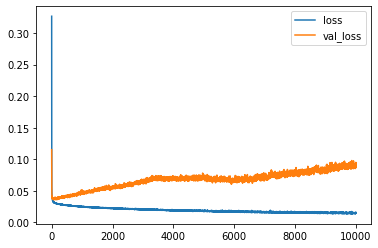

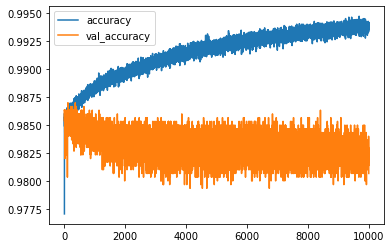

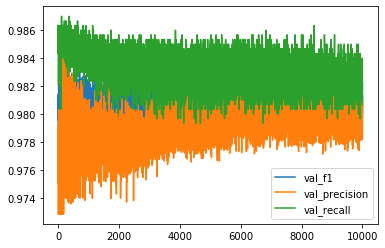

In [156]:
plt.figure()
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()

plt.figure()
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.figure()
plt.plot(history['val_f1'], label='val_f1')
plt.plot(history['val_precision'], label='val_precision')
plt.plot(history['val_recall'], label='val_recall')
plt.legend()

In [169]:
df.describe()

Sn1           Sn2           Sn3           Sn4           Sn5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.000120      0.000085      0.000230      0.000091     -0.000151   
std        0.000095      0.000035      0.000192      0.000033      0.000068   
min       -0.002055     -0.000615     -0.001761     -0.000549     -0.002005   
25%       -0.000172      0.000062      0.000168      0.000066     -0.000187   
50%       -0.000123      0.000085      0.000248      0.000092     -0.000149   
75%       -0.000089      0.000106      0.000358      0.000117     -0.000109   
max        0.000697      0.000309      0.000890      0.000280      0.000037   

                Sn6           Sn7           Sn8           Sn9          Sn10  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.000348      0.000143     -0.000044      0.000167      0.000409   
std        0.000152      0.000077      0.000067      0.000050      0.000109   
min       -0.000797     -0.001183     -0.001795     -0.000461      0.000217   
25%        0.000259      0.000108     -0.000066      0.000124      0.000295   
50%        0.000351      0.000147     -0.000046      0.000166      0.000408   
75%        0.000469      0.000199     -0.000031      0.000212      0.000520   
max        0.001071      0.000306      0.000398      0.000298      0.001048   

                 Tt          dloc            ED  overload_loc  
count  30000.000000  30000.000000  30000.000000   30000.00000  
mean      30.000000     49.500000      4.500000       0.02740  
std        7.071186     28.866551      2.872329       0.24749  
min       20.054781      0.000000      0.000000       0.00000  
25%       22.568552     24.750000      2.000000       0.00000  
50%       30.000000     49.500000      4.500000       0.00000  
75%       37.431448     74.250000      7.000000       0.00000  
max       39.945219     99.000000      9.000000       3.00000